<a href="https://colab.research.google.com/github/AnallelyTenorio/Flight-delay-2023/blob/main/Flights_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesar y preparar base de datos




## Conectar/ Importar datos

In [ ]:
# Conectar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir ruta
BASE_DIR = "/content/drive/MyDrive/Laboratoria/Proyecto-3/datasets-flights_2023"

In [ ]:
# Lectura de archivo
import pandas as pd

# CSV principal
flights = pd.read_csv(f"{BASE_DIR}/flights_202301.csv")
print(flights.shape)
display(flights.head())

# CSV diccionario de aerolínea
airline_dict = pd.read_csv(f"{BASE_DIR}/AIRLINE_CODE_DICTIONARY.csv")
display(airline_dict.head())

# XLSX diccionario DOT
try:
    dot_dict = pd.read_excel(f"{BASE_DIR}/DOT_CODE_DICTIONARY.xlsx")
except Exception as e:
    print("Instalando openpyxl…", e)
    !pip -q install openpyxl
    dot_dict = pd.read_excel(f"{BASE_DIR}/DOT_CODE_DICTIONARY.xlsx")

display(dot_dict.head())


(538837, 33)


FL_DATE AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
0  2023-01-02           9E     20363       4628    BDL  Hartford, CT  LGA   
1  2023-01-03           9E     20363       4628    BDL  Hartford, CT  LGA   
2  2023-01-04           9E     20363       4628    BDL  Hartford, CT  LGA   
3  2023-01-05           9E     20363       4628    BDL  Hartford, CT  LGA   
4  2023-01-06           9E     20363       4628    BDL  Hartford, CT  LGA   

      DEST_CITY  CRS_DEP_TIME  DEP_TIME  ...  AIR_TIME  DISTANCE  \
0  New York, NY           800     757.0  ...      25.0       101   
1  New York, NY           800     755.0  ...      37.0       101   
2  New York, NY           800     755.0  ...      28.0       101   
3  New York, NY           800     754.0  ...      38.0       101   
4  New York, NY           800     759.0  ...      28.0       101   

   DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  \
0                NaN                NaN            NaN                 NaN   
1                NaN                NaN            NaN                 NaN   
2                NaN                NaN            NaN                 NaN   
3                NaN                NaN            NaN                 NaN   
4                NaN                NaN            NaN                 NaN   

   DELAY_DUE_LATE_AIRCRAFT  FL_YEAR  FL_MONTH FL_DAY  
0                      NaN     2023         1      2  
1                      NaN     2023         1      3  
2                      NaN     2023         1      4  
3                      NaN     2023         1      5  
4                      NaN     2023         1      6  

[5 rows x 33 columns]

Code                    Description
0  02Q                  Titan Airways
1  04Q             Tradewind Aviation
2  05Q            Comlux Aviation, AG
3  06Q  Master Top Linhas Aereas Ltd.
4  07Q            Flair Airlines Ltd.

Code                      Description
0  19031   Mackey International Inc.: MAC
1  19032  Munz Northern Airlines Inc.: XY
2  19033       Cochise Airlines Inc.: COC
3  19034   Golden Gate Airlines Inc.: GSA
4  19035               Aeromech Inc.: RZZ

## Identificar y manejar valores nulos

In [ ]:
# Crear una lista de DataFrames para procesar
dataframes = {
    'flights': flights,
    'airline_dict': airline_dict,
    'dot_dict': dot_dict
}

# Iterar sobre cada DataFrame
for name, df in dataframes.items():
    print(f"\nAnálisis de valores nulos para el DataFrame: {name}")

    # Identificar valores nulos por columna
    null_counts = df.isnull().sum()

    # Filtrar columnas con al menos un valor nulo
    null_columns = null_counts[null_counts > 0]

    # Calcular el porcentaje de valores nulos
    null_percentages = (null_columns / len(df)) * 100

    # Crear un DataFrame para mostrar los resultados
    null_info = pd.DataFrame({
        'Numero_Nulos': null_columns,
        'Porcentaje_Nulos': null_percentages
    })

    # Mostrar el resultado
    if not null_info.empty:
        print("Columnas con valores nulos:")
        display(null_info.sort_values(by='Numero_Nulos', ascending=False))
    else:
        print("No hay valores nulos en este DataFrame.")


Análisis de valores nulos para el DataFrame: flights
Columnas con valores nulos:


Numero_Nulos  Porcentaje_Nulos
DELAY_DUE_WEATHER              422124         78.339832
DELAY_DUE_NAS                  422124         78.339832
DELAY_DUE_SECURITY             422124         78.339832
DELAY_DUE_LATE_AIRCRAFT        422124         78.339832
DELAY_DUE_CARRIER              422124         78.339832
ARR_DELAY                       11640          2.160208
ELAPSED_TIME                    11640          2.160208
AIR_TIME                        11640          2.160208
TAXI_IN                         10519          1.952167
WHEELS_ON                       10519          1.952167
ARR_TIME                        10519          1.952167
TAXI_OUT                        10197          1.892409
WHEELS_OFF                      10197          1.892409
DEP_DELAY                        9982          1.852508
DEP_TIME                         9978          1.851766
CRS_ELAPSED_TIME                    1          0.000186


Análisis de valores nulos para el DataFrame: airline_dict
Columnas con valores nulos:


Numero_Nulos  Porcentaje_Nulos
Code             1          0.057837


Análisis de valores nulos para el DataFrame: dot_dict
Columnas con valores nulos:


Numero_Nulos  Porcentaje_Nulos
Description             4          0.230282

In [ ]:
# Columnas que queremos verificar
columns_to_check = ['ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'WHEELS_ON', 'ARR_TIME',
                    'DEP_DELAY', 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF']

print("Verificando nulos en columnas de tiempo/llegada/salida vs. vuelos desviados:")

# Filtrar filas que NO son canceladas
non_cancelled_flights = flights[flights['CANCELLED'] == 0].copy()

# Ahora, dentro de este subconjunto, verificar si hay nulos en las columnas de interés y si son desviados
for col in columns_to_check:
    # Filas no canceladas con nulos en la columna actual
    null_in_col_non_cancelled = non_cancelled_flights[non_cancelled_flights[col].isnull()]

    # Contar cuántas de esas filas no canceladas con nulos son vuelos desviados
    diverted_with_null_col = null_in_col_non_cancelled[null_in_col_non_cancelled['DIVERTED'] == 1]

    print(f"\nAnálisis para la columna: {col}")
    print(f"Número de filas no canceladas con {col} nulo: {len(null_in_col_non_cancelled)}")
    print(f"Número de vuelos desviados con {col} nulo (y no cancelados): {len(diverted_with_null_col)}")
    if len(null_in_col_non_cancelled) > 0:
        print(f"Porcentaje de nulos en {col} (entre no cancelados) que son desviados: {(len(diverted_with_null_col) / len(null_in_col_non_cancelled)) * 100:.2f}%")
    else:
        print(f"No hay nulos en {col} entre los vuelos no cancelados.")

# Verificar el único nulo restante en CRS_ELAPSED_TIME
print("\nVerificando el nulo en CRS_ELAPSED_TIME vs. vuelos cancelados/desviados:")
null_crs_elapsed = flights[flights['CRS_ELAPSED_TIME'].isnull()]
print(f"Número de filas con CRS_ELAPSED_TIME nulo: {len(null_crs_elapsed)}")
if len(null_crs_elapsed) > 0:
    is_cancelled = null_crs_elapsed['CANCELLED'].iloc[0] == 1
    is_diverted = null_crs_elapsed['DIVERTED'].iloc[0] == 1
    print(f"¿La fila con CRS_ELAPSED_TIME nulo es cancelada?: {is_cancelled}")
    print(f"¿La fila con CRS_ELAPSED_TIME nulo es desviada?: {is_diverted}")

# Y los diccionarios (ya sabemos que tienen muy pocos nulos, pero los volvemos a listar por si acaso)
print("\nAnálisis de valores nulos en DataFrames de diccionario (reconfirmación):")
dataframes_dict = {
    'airline_dict': airline_dict,
    'dot_dict': dot_dict
}

for name, df in dataframes_dict.items():
    print(f"\nDataFrame: {name}")
    null_counts_dict = df.isnull().sum()
    null_columns_dict = null_counts_dict[null_counts_dict > 0]
    if not null_columns_dict.empty:
        null_info_dict = pd.DataFrame({
            'Numero_Nulos': null_columns_dict
        })
        display(null_info_dict) # Solo mostramos el conteo ya que son muy pocos
    else:
        print("No hay valores nulos en este DataFrame.")

Verificando nulos en columnas de tiempo/llegada/salida vs. vuelos desviados:

Análisis para la columna: ARR_DELAY
Número de filas no canceladas con ARR_DELAY nulo: 1345
Número de vuelos desviados con ARR_DELAY nulo (y no cancelados): 1345
Porcentaje de nulos en ARR_DELAY (entre no cancelados) que son desviados: 100.00%

Análisis para la columna: ELAPSED_TIME
Número de filas no canceladas con ELAPSED_TIME nulo: 1345
Número de vuelos desviados con ELAPSED_TIME nulo (y no cancelados): 1345
Porcentaje de nulos en ELAPSED_TIME (entre no cancelados) que son desviados: 100.00%

Análisis para la columna: AIR_TIME
Número de filas no canceladas con AIR_TIME nulo: 1345
Número de vuelos desviados con AIR_TIME nulo (y no cancelados): 1345
Porcentaje de nulos en AIR_TIME (entre no cancelados) que son desviados: 100.00%

Análisis para la columna: TAXI_IN
Número de filas no canceladas con TAXI_IN nulo: 224
Número de vuelos desviados con TAXI_IN nulo (y no cancelados): 224
Porcentaje de nulos en TAXI_I

Numero_Nulos
Code             1


DataFrame: dot_dict


Numero_Nulos
Description             4

In [ ]:
# Columnas relacionadas con los retrasos
delay_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Identificar filas donde todas las columnas de retraso por causa son nulas (NaN)
# y el retraso de llegada (ARR_DELAY) es menor o igual a cero.
# Usamos .fillna(0) en las columnas de retraso por causa para tratar los NaN como 0,
# ya que un NaN en esas columnas probablemente significa que no hubo retraso por esa causa.
no_delay_mask = (flights['ARR_DELAY'] <= 0) | (flights['ARR_DELAY'].isnull())

for col in delay_columns:
    no_delay_mask &= (flights[col].isnull() | (flights[col] == 0))

# Filtrar el DataFrame original para mostrar las filas sin retraso
flights_no_delay = flights[no_delay_mask]

print(f"Número total de vuelos: {len(flights)}")
print(f"Número de vuelos sin retraso aparente: {len(flights_no_delay)}")
display(flights_no_delay.head())

Número total de vuelos: 538837
Número de vuelos sin retraso aparente: 336262


FL_DATE AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
0  2023-01-02           9E     20363       4628    BDL  Hartford, CT  LGA   
1  2023-01-03           9E     20363       4628    BDL  Hartford, CT  LGA   
2  2023-01-04           9E     20363       4628    BDL  Hartford, CT  LGA   
3  2023-01-05           9E     20363       4628    BDL  Hartford, CT  LGA   
4  2023-01-06           9E     20363       4628    BDL  Hartford, CT  LGA   

      DEST_CITY  CRS_DEP_TIME  DEP_TIME  ...  AIR_TIME  DISTANCE  \
0  New York, NY           800     757.0  ...      25.0       101   
1  New York, NY           800     755.0  ...      37.0       101   
2  New York, NY           800     755.0  ...      28.0       101   
3  New York, NY           800     754.0  ...      38.0       101   
4  New York, NY           800     759.0  ...      28.0       101   

   DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  \
0                NaN                NaN            NaN                 NaN   
1                NaN                NaN            NaN                 NaN   
2                NaN                NaN            NaN                 NaN   
3                NaN                NaN            NaN                 NaN   
4                NaN                NaN            NaN                 NaN   

   DELAY_DUE_LATE_AIRCRAFT  FL_YEAR  FL_MONTH FL_DAY  
0                      NaN     2023         1      2  
1                      NaN     2023         1      3  
2                      NaN     2023         1      4  
3                      NaN     2023         1      5  
4                      NaN     2023         1      6  

[5 rows x 33 columns]

In [ ]:
# Eliminar filas con valores nulos en la columna 'Code' del DataFrame airline_dict
airline_dict.dropna(subset=['Code'], inplace=True)

# Verificar que no queden nulos en la columna 'Code'
print("Valores nulos en airline_dict después de eliminar filas con código nulo:")
print(airline_dict.isnull().sum())

Valores nulos en airline_dict después de eliminar filas con código nulo:
Code           0
Description    0
dtype: int64


In [ ]:
# Eliminar filas con valores nulos en la columna 'Description' del DataFrame dot_dict
dot_dict.dropna(subset=['Description'], inplace=True)

# Verificar que no queden nulos en la columna 'Description'
print("Valores nulos en dot_dict después de eliminar filas con descripción nula:")
print(dot_dict.isnull().sum())

Valores nulos en dot_dict después de eliminar filas con descripción nula:
Code           0
Description    0
dtype: int64


In [ ]:
# Obtener los códigos de las filas con descripción nula en dot_dict
codes_with_null_description_dot = dot_dict[dot_dict['Description'].isnull()]['Code'].tolist()

print(f"Códigos DOT con descripción nula: {codes_with_null_description_dot}")

# Verificar si estos códigos existen en la columna DOT_CODE del DataFrame flights
codes_present_in_flights = flights['DOT_CODE'].isin(codes_with_null_description_dot)

print(f"\nNúmero de filas en 'flights' que usan alguno de estos códigos: {codes_present_in_flights.sum()}")

# Opcional: Mostrar algunas de esas filas si existen
if codes_present_in_flights.sum() > 0:
    print("\nEjemplo de filas en 'flights' que usan estos códigos:")
    display(flights[codes_present_in_flights].head())
else:
    print("Ninguna fila en 'flights' utiliza estos códigos DOT con descripción nula.")

Códigos DOT con descripción nula: []

Número de filas en 'flights' que usan alguno de estos códigos: 0
Ninguna fila en 'flights' utiliza estos códigos DOT con descripción nula.


In [ ]:
print("Filas con valores nulos en airline_dict:")
# Mostrar filas con nulos en airline_dict
display(airline_dict[airline_dict.isnull().any(axis=1)])

print("\nFilas con valores nulos en dot_dict:")
# Mostrar filas con nulos en dot_dict
display(dot_dict[dot_dict.isnull().any(axis=1)])

Filas con valores nulos en airline_dict:


Empty DataFrame
Columns: [Code, Description]
Index: []


Filas con valores nulos en dot_dict:


Empty DataFrame
Columns: [Code, Description]
Index: []

In [ ]:
# Columnas relacionadas con los retrasos
delay_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Ya tenemos la máscara 'no_delay_mask' de la celda anterior
# Identificar filas donde todas las columnas de retraso por causa son nulas (NaN)
# y el retraso de llegada (ARR_DELAY) es menor o igual a cero.
# Usamos .fillna(0) en las columnas de retraso por causa para tratar los NaN como 0,
# ya que un NaN en esas columnas probablemente significa que no hubo retraso por esa causa.
# Regenerar la máscara por si acaso
no_delay_mask = (flights['ARR_DELAY'] <= 0) | (flights['ARR_DELAY'].isnull())
for col in delay_columns:
    no_delay_mask &= (flights[col].isnull() | (flights[col] == 0))


# Filtrar el DataFrame original para obtener solo las filas sin retraso aparente
flights_no_delay = flights[no_delay_mask].copy() # Usamos .copy() para evitar SettingWithCopyWarning

# Ahora, dentro de este subconjunto (flights_no_delay), veamos los nulos en las columnas de retraso
null_counts_in_no_delay = flights_no_delay[delay_columns].isnull().sum()

# Calcular el porcentaje de estos nulos respecto al total de filas en flights_no_delay
# que es el universo donde estamos considerando imputar 0
null_percentages_in_no_delay = (null_counts_in_no_delay / len(flights_no_delay)) * 100

print("Porcentaje de valores nulos en columnas de retraso dentro del grupo de vuelos sin retraso aparente:")
display(null_percentages_in_no_delay)

# También podemos ver el porcentaje de estos nulos respecto al total del DataFrame flights
null_counts_total = flights[delay_columns].isnull().sum()
null_percentages_of_total = (null_counts_in_no_delay / null_counts_total) * 100

print("\nPorcentaje de valores nulos que se tratarían como 0 (respecto al total de nulos en cada columna):")
display(null_percentages_of_total)

Porcentaje de valores nulos en columnas de retraso dentro del grupo de vuelos sin retraso aparente:


DELAY_DUE_CARRIER          100.0
DELAY_DUE_WEATHER          100.0
DELAY_DUE_NAS              100.0
DELAY_DUE_SECURITY         100.0
DELAY_DUE_LATE_AIRCRAFT    100.0
dtype: float64


Porcentaje de valores nulos que se tratarían como 0 (respecto al total de nulos en cada columna):


DELAY_DUE_CARRIER          79.659531
DELAY_DUE_WEATHER          79.659531
DELAY_DUE_NAS              79.659531
DELAY_DUE_SECURITY         79.659531
DELAY_DUE_LATE_AIRCRAFT    79.659531
dtype: float64

In [ ]:
# Columnas relacionadas con los retrasos
delay_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# La máscara 'no_delay_mask' ya identifica las filas donde
# ARR_DELAY es <= 0 o nulo, y las columnas de retraso por causa son nulas o cero.

# Usar la máscara para seleccionar las filas y las columnas, y luego aplicar fillna(0)
# Es importante usar .loc para evitar SettingWithCopyWarning
flights.loc[no_delay_mask, delay_columns] = flights.loc[no_delay_mask, delay_columns].fillna(0)

# Verificar los valores nulos en las columnas de retraso después de la imputación
# Ahora solo los nulos en filas CON retraso (donde no_delay_mask es False) deberían persistir
print("Valores nulos en las columnas de retraso después de imputar 0 solo en vuelos sin retraso aparente:")
print(flights[delay_columns].isnull().sum())

# Opcional: verificar el conteo total de nulos en todo el DataFrame para ver el impacto
print("\nValores nulos en todo el DataFrame después de la imputación condicional:")
print(flights.isnull().sum().sort_values(ascending=False))

Valores nulos en las columnas de retraso después de imputar 0 solo en vuelos sin retraso aparente:
DELAY_DUE_CARRIER          85862
DELAY_DUE_WEATHER          85862
DELAY_DUE_NAS              85862
DELAY_DUE_SECURITY         85862
DELAY_DUE_LATE_AIRCRAFT    85862
dtype: int64

Valores nulos en todo el DataFrame después de la imputación condicional:
DELAY_DUE_LATE_AIRCRAFT    85862
DELAY_DUE_SECURITY         85862
DELAY_DUE_WEATHER          85862
DELAY_DUE_NAS              85862
DELAY_DUE_CARRIER          85862
ARR_DELAY                  11640
ELAPSED_TIME               11640
AIR_TIME                   11640
ARR_TIME                   10519
TAXI_IN                    10519
WHEELS_ON                  10519
TAXI_OUT                   10197
WHEELS_OFF                 10197
DEP_DELAY                   9982
DEP_TIME                    9978
CRS_ELAPSED_TIME               1
FL_DATE                        0
CRS_ARR_TIME                   0
DOT_CODE                       0
FL_NUMBER             

In [ ]:
# Columnas relacionadas con los retrasos por causa
delay_cause_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Seleccionar solo las filas donde ARR_DELAY es positivo
delayed_flights = flights[flights['ARR_DELAY'] > 0].copy()

# Para estas filas, imputar temporalmente los NaN en las columnas de causa con 0
# para poder sumar las contribuciones conocidas. Esto no modifica el DataFrame original 'flights'.
delayed_flights[delay_cause_columns] = delayed_flights[delay_cause_columns].fillna(0)

# Calcular la suma de los retrasos por causa
delayed_flights['SUM_DELAY_CAUSES'] = delayed_flights[delay_cause_columns].sum(axis=1)

# Comparar la suma de las causas con el retraso de llegada
# Calculamos la diferencia
delayed_flights['UNIDENTIFIED_DELAY'] = delayed_flights['ARR_DELAY'] - delayed_flights['SUM_DELAY_CAUSES']

# Mostrar algunas estadísticas o filas donde hay diferencia
print("Comparación entre ARR_DELAY y la suma de las causas de retraso para vuelos con retraso:")
display(delayed_flights[['ARR_DELAY', 'SUM_DELAY_CAUSES', 'UNIDENTIFIED_DELAY']].head())

# Mostrar estadísticas de la diferencia
print("\nEstadísticas de la diferencia (ARR_DELAY - SUM_DELAY_CAUSES):")
display(delayed_flights['UNIDENTIFIED_DELAY'].describe())

# Contar cuántas filas tienen una diferencia positiva (retraso no totalmente explicado)
unidentified_delay_count = (delayed_flights['UNIDENTIFIED_DELAY'] > 0).sum()
print(f"\nNúmero de vuelos con retraso donde la causa no está completamente identificada: {unidentified_delay_count}")

# Contar cuántas filas tienen una diferencia de cero (retraso completamente explicado por las causas)
explained_delay_count = (delayed_flights['UNIDENTIFIED_DELAY'] == 0).sum()
print(f"Número de vuelos con retraso donde la causa está completamente explicada: {explained_delay_count}")

# Contar cuántas filas tienen una diferencia negativa (suma de causas > ARR_DELAY - menos común, podría ser un error de datos)
over_reported_delay_count = (delayed_flights['UNIDENTIFIED_DELAY'] < 0).sum()
print(f"Número de vuelos con retraso donde la suma de las causas reportadas es mayor que ARR_DELAY: {over_reported_delay_count}")

Comparación entre ARR_DELAY y la suma de las causas de retraso para vuelos con retraso:


ARR_DELAY  SUM_DELAY_CAUSES  UNIDENTIFIED_DELAY
10        6.0               0.0                 6.0
11       61.0              61.0                 0.0
12      132.0             132.0                 0.0
13       34.0              34.0                 0.0
14        4.0               0.0                 4.0


Estadísticas de la diferencia (ARR_DELAY - SUM_DELAY_CAUSES):


count    202575.000000
mean          2.772020
std           4.136294
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          14.000000
Name: UNIDENTIFIED_DELAY, dtype: float64


Número de vuelos con retraso donde la causa no está completamente identificada: 85862
Número de vuelos con retraso donde la causa está completamente explicada: 116713
Número de vuelos con retraso donde la suma de las causas reportadas es mayor que ARR_DELAY: 0


In [ ]:
# Columnas relacionadas con los retrasos por causa
delay_cause_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Crear una copia temporal del DataFrame para calcular la suma de las causas sin modificar el original
flights_temp = flights.copy()

# Para calcular la suma de las causas, imputar temporalmente los NaN en las columnas de causa con 0
# Esto se hace en la copia temporal para no afectar los NaN originales en flights
flights_temp[delay_cause_columns] = flights_temp[delay_cause_columns].fillna(0)

# Calcular la suma de los retrasos por causa para todas las filas (tratando NaN como 0 en la suma)
flights_temp['SUM_DELAY_CAUSES'] = flights_temp[delay_cause_columns].sum(axis=1)

# Calcular la diferencia entre ARR_DELAY y la suma de las causas
# Asegurarse de que la diferencia no sea negativa (si la suma de causas es mayor que ARR_DELAY)
# y tratar los ARR_DELAY nulos o <= 0 como 0 en este cálculo
flights['DELAY_DUE_UNKNOWN'] = (flights['ARR_DELAY'].fillna(0) - flights_temp['SUM_DELAY_CAUSES']).apply(lambda x: max(0, x))

# Verificar la nueva columna y algunos casos
print("Nueva columna 'DELAY_DUE_UNKNOWN' creada:")
display(flights[['ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
                 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_UNKNOWN']].head())

# Mostrar estadísticas de la nueva columna
print("\nEstadísticas de la columna 'DELAY_DUE_UNKNOWN':")
display(flights['DELAY_DUE_UNKNOWN'].describe())

# Verificar el conteo de nulos en las columnas de retraso originales para confirmar que no cambiaron
print("\nValores nulos en las columnas de retraso originales después de crear DELAY_DUE_UNKNOWN:")
print(flights[delay_cause_columns].isnull().sum())

Nueva columna 'DELAY_DUE_UNKNOWN' creada:


ARR_DELAY  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
0      -12.0                0.0                0.0            0.0   
1       -8.0                0.0                0.0            0.0   
2      -21.0                0.0                0.0            0.0   
3      -17.0                0.0                0.0            0.0   
4      -16.0                0.0                0.0            0.0   

   DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  
0                 0.0                      0.0                0.0  
1                 0.0                      0.0                0.0  
2                 0.0                      0.0                0.0  
3                 0.0                      0.0                0.0  
4                 0.0                      0.0                0.0


Estadísticas de la columna 'DELAY_DUE_UNKNOWN':


count    538837.000000
mean          1.042137
std           2.869640
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: DELAY_DUE_UNKNOWN, dtype: float64


Valores nulos en las columnas de retraso originales después de crear DELAY_DUE_UNKNOWN:
DELAY_DUE_CARRIER          85862
DELAY_DUE_WEATHER          85862
DELAY_DUE_NAS              85862
DELAY_DUE_SECURITY         85862
DELAY_DUE_LATE_AIRCRAFT    85862
dtype: int64


In [ ]:
# Columnas de flights que aún tienen nulos (excluyendo las de causa de retraso que ya manejamos condicionalmente)
# Podemos obtener esta lista del resultado de flights.isnull().sum() después de la última operación.
# Sin embargo, para ser explícitos, listaremos las principales que vimos antes:
remaining_flights_null_columns = [
    'ARR_DELAY',
    'ELAPSED_TIME',
    'AIR_TIME',
    'TAXI_IN',
    'WHEELS_ON',
    'ARR_TIME',
    'TAXI_OUT',
    'WHEELS_OFF',
    'DEP_DELAY',
    'DEP_TIME',
    'CRS_ELAPSED_TIME'
]

print("Análisis de valores nulos en columnas restantes del DataFrame 'flights':")

# Identificar valores nulos por columna para estas columnas específicas
null_counts_remaining = flights[remaining_flights_null_columns].isnull().sum()

# Filtrar columnas con al menos un valor nulo (deberían ser todas en esta lista)
null_columns_remaining = null_counts_remaining[null_counts_remaining > 0]

# Calcular el porcentaje de valores nulos
null_percentages_remaining = (null_columns_remaining / len(flights)) * 100

# Crear un DataFrame para mostrar los resultados
null_info_remaining = pd.DataFrame({
    'Numero_Nulos': null_columns_remaining,
    'Porcentaje_Nulos': null_percentages_remaining
})

# Mostrar el resultado
display(null_info_remaining.sort_values(by='Numero_Nulos', ascending=False))

# --- Ahora veamos los diccionarios ---
print("\nAnálisis de valores nulos en DataFrames de diccionario:")

dataframes_dict = {
    'airline_dict': airline_dict,
    'dot_dict': dot_dict
}

for name, df in dataframes_dict.items():
    print(f"\nDataFrame: {name}")
    null_counts_dict = df.isnull().sum()
    null_columns_dict = null_counts_dict[null_counts_dict > 0]
    if not null_columns_dict.empty:
        null_percentages_dict = (null_columns_dict / len(df)) * 100
        null_info_dict = pd.DataFrame({
            'Numero_Nulos': null_columns_dict,
            'Porcentaje_Nulos': null_percentages_dict
        })
        display(null_info_dict.sort_values(by='Numero_Nulos', ascending=False))
    else:
        print("No hay valores nulos en este DataFrame.")

# Opcional: Mostrar algunas filas de ejemplo con nulos en flights para entender el contexto
print("\nEjemplos de filas con valores nulos en columnas restantes (DataFrame 'flights'):")
# Seleccionar filas donde al menos una de las columnas restantes tiene un valor nulo
rows_with_remaining_nulls = flights[flights[remaining_flights_null_columns].isnull().any(axis=1)]
display(rows_with_remaining_nulls[remaining_flights_null_columns].head())

Análisis de valores nulos en columnas restantes del DataFrame 'flights':


Numero_Nulos  Porcentaje_Nulos
ARR_DELAY                11640          2.160208
ELAPSED_TIME             11640          2.160208
AIR_TIME                 11640          2.160208
TAXI_IN                  10519          1.952167
WHEELS_ON                10519          1.952167
ARR_TIME                 10519          1.952167
TAXI_OUT                 10197          1.892409
WHEELS_OFF               10197          1.892409
DEP_DELAY                 9982          1.852508
DEP_TIME                  9978          1.851766
CRS_ELAPSED_TIME             1          0.000186


Análisis de valores nulos en DataFrames de diccionario:

DataFrame: airline_dict
No hay valores nulos en este DataFrame.

DataFrame: dot_dict
No hay valores nulos en este DataFrame.

Ejemplos de filas con valores nulos en columnas restantes (DataFrame 'flights'):


ARR_DELAY  ELAPSED_TIME  AIR_TIME  TAXI_IN  WHEELS_ON  ARR_TIME  \
94         NaN           NaN       NaN      NaN        NaN       NaN   
110        NaN           NaN       NaN      NaN        NaN       NaN   
117        NaN           NaN       NaN      NaN        NaN       NaN   
125        NaN           NaN       NaN      NaN        NaN       NaN   
139        NaN           NaN       NaN     23.0     2230.0    2253.0   

     TAXI_OUT  WHEELS_OFF  DEP_DELAY  DEP_TIME  CRS_ELAPSED_TIME  
94        NaN         NaN        NaN       NaN              69.0  
110       NaN         NaN        NaN       NaN             130.0  
117       NaN         NaN        NaN       NaN             150.0  
125       NaN         NaN        NaN       NaN             103.0  
139      17.0      1721.0        2.0    1704.0             103.0

In [ ]:
# Columnas que queremos verificar si sus nulos están relacionados con cancelaciones
columns_to_check = ['ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'WHEELS_ON', 'ARR_TIME']

print("Verificando nulos en columnas de llegada/tiempo vs. vuelos cancelados:")

# Filtrar filas donde ARR_DELAY es nulo
null_arr_delay = flights[flights['ARR_DELAY'].isnull()]

# Contar cuántas de esas filas son vuelos cancelados
cancelled_with_null_arr_delay = null_arr_delay[null_arr_delay['CANCELLED'] == 1]

print(f"\nNúmero de filas con ARR_DELAY nulo: {len(null_arr_delay)}")
print(f"Número de vuelos cancelados con ARR_DELAY nulo: {len(cancelled_with_null_arr_delay)}")
print(f"Coinciden todos los nulos en ARR_DELAY con vuelos cancelados?: {len(null_arr_delay) == len(cancelled_with_null_arr_delay)}")

# Repetir para otras columnas relevantes
for col in ['ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'WHEELS_ON', 'ARR_TIME']:
    null_col = flights[flights[col].isnull()]
    cancelled_with_null_col = null_col[null_col['CANCELLED'] == 1]
    print(f"\nNúmero de filas con {col} nulo: {len(null_col)}")
    print(f"Número de vuelos cancelados con {col} nulo: {len(cancelled_with_null_col)}")
    print(f"Coinciden todos los nulos en {col} con vuelos cancelados?: {len(null_col) == len(cancelled_with_null_col)}")

# También verificar las columnas de salida que tienen nulos si están relacionadas con cancelaciones
# (Aunque DEP_DELAY/TIME también podrían ser nulos si el vuelo se canceló antes de la hora programada)
print("\nVerificando nulos en columnas de salida vs. vuelos cancelados:")
for col in ['DEP_DELAY', 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF']:
     null_col = flights[flights[col].isnull()]
     cancelled_with_null_col = null_col[null_col['CANCELLED'] == 1]
     print(f"\nNúmero de filas con {col} nulo: {len(null_col)}")
     print(f"Número de vuelos cancelados con {col} nulo: {len(cancelled_with_null_col)}")
     # Es posible que haya nulos en DEP_DELAY/TIME que no sean vuelos cancelados si, por ejemplo, faltó el registro.
     # Por lo tanto, no esperamos necesariamente que el conteo sea igual aquí.
     print(f"Porcentaje de nulos en {col} que son vuelos cancelados: {(len(cancelled_with_null_col) / len(null_col)) * 100 if len(null_col) > 0 else 0:.2f}%")

# Finalmente, verificar si hay vuelos cancelados que *no* tengan nulos en estas columnas (lo cual sería inusual)
print("\nVerificando vuelos cancelados que NO tienen nulos en columnas de llegada/tiempo:")
cancelled_flights = flights[flights['CANCELLED'] == 1]
non_null_in_cancelled = cancelled_flights.dropna(subset=columns_to_check)
print(f"Número de vuelos cancelados: {len(cancelled_flights)}")
print(f"Número de vuelos cancelados sin nulos en {columns_to_check}: {len(non_null_in_cancelled)}")

Verificando nulos en columnas de llegada/tiempo vs. vuelos cancelados:

Número de filas con ARR_DELAY nulo: 11640
Número de vuelos cancelados con ARR_DELAY nulo: 10295
Coinciden todos los nulos en ARR_DELAY con vuelos cancelados?: False

Número de filas con ELAPSED_TIME nulo: 11640
Número de vuelos cancelados con ELAPSED_TIME nulo: 10295
Coinciden todos los nulos en ELAPSED_TIME con vuelos cancelados?: False

Número de filas con AIR_TIME nulo: 11640
Número de vuelos cancelados con AIR_TIME nulo: 10295
Coinciden todos los nulos en AIR_TIME con vuelos cancelados?: False

Número de filas con TAXI_IN nulo: 10519
Número de vuelos cancelados con TAXI_IN nulo: 10295
Coinciden todos los nulos en TAXI_IN con vuelos cancelados?: False

Número de filas con WHEELS_ON nulo: 10519
Número de vuelos cancelados con WHEELS_ON nulo: 10295
Coinciden todos los nulos en WHEELS_ON con vuelos cancelados?: False

Número de filas con ARR_TIME nulo: 10519
Número de vuelos cancelados con ARR_TIME nulo: 10295
Coin

## Identificar y manejar valores duplicados

In [ ]:
# Asegurarse de que 'FL_DATE' es de tipo datetime
# Puedes verificar el tipo actual con flights['FL_DATE'].dtype
# Si no es datetime64[ns], conviértela:
try:
    flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
    print("La columna 'FL_DATE' se ha convertido a tipo datetime (si no lo estaba).")
except Exception as e:
    print(f"Error al convertir 'FL_DATE' a datetime: {e}")

# Obtener la fecha mínima y máxima
min_date = flights['FL_DATE'].min()
max_date = flights['FL_DATE'].max()

print(f"\nRango de fechas en el DataFrame 'flights':")
print(f"Fecha mínima: {min_date}")
print(f"Fecha máxima: {max_date}")

La columna 'FL_DATE' se ha convertido a tipo datetime (si no lo estaba).

Rango de fechas en el DataFrame 'flights':
Fecha mínima: 2023-01-01 00:00:00
Fecha máxima: 2023-01-31 00:00:00


In [ ]:
# Columnas clave sugeridas para identificar duplicados
key_columns = ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME']

print(f"Verificando duplicados basados en las columnas: {key_columns}")

# Identificar filas duplicadas
# keep=False marca todas las ocurrencias de un duplicado como True
duplicate_rows = flights[flights.duplicated(subset=key_columns, keep=False)]

# Contar el número de filas duplicadas (cada parte del par duplicado se cuenta)
num_duplicate_rows = len(duplicate_rows)

# Contar el número de conjuntos de duplicados únicos
# Esto es el número de grupos de filas que son duplicadas
num_duplicate_sets = num_duplicate_rows // 2 # Asumiendo que son pares exactos

print(f"\nNúmero total de filas en el DataFrame flights: {len(flights)}")
print(f"Número de filas identificadas como duplicadas (incluyendo la primera aparición): {num_duplicate_rows}")
print(f"Número de conjuntos de vuelos duplicados: {num_duplicate_sets}")

if num_duplicate_rows > 0:
    print("\nEjemplo de filas duplicadas:")
    # Mostrar los primeros conjuntos de duplicados para inspección
    display(duplicate_rows.sort_values(by=key_columns).head(10))
else:
    print("\nNo se encontraron filas duplicadas basadas en esta combinación de columnas.")

Verificando duplicados basados en las columnas: ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME']

Número total de filas en el DataFrame flights: 538837
Número de filas identificadas como duplicadas (incluyendo la primera aparición): 0
Número de conjuntos de vuelos duplicados: 0

No se encontraron filas duplicadas basadas en esta combinación de columnas.


In [ ]:
# Verificar duplicados en airline_dict
print("Verificando duplicados en airline_dict:")

# Basado en la columna 'Code'
duplicate_codes_airline = airline_dict[airline_dict.duplicated(subset=['Code'], keep=False)]
num_duplicate_codes_airline = len(duplicate_codes_airline)

print(f"\nNúmero de filas duplicadas basadas en 'Code': {num_duplicate_codes_airline}")
if num_duplicate_codes_airline > 0:
    print("Ejemplo de duplicados basados en 'Code':")
    display(duplicate_codes_airline.sort_values(by='Code').head())
else:
    print("No se encontraron duplicados basados en 'Code' en airline_dict.")

# Basado en la columna 'Description'
duplicate_descriptions_airline = airline_dict[airline_dict.duplicated(subset=['Description'], keep=False)]
num_duplicate_descriptions_airline = len(duplicate_descriptions_airline)

print(f"\nNúmero de filas duplicadas basadas en 'Description': {num_duplicate_descriptions_airline}")
if num_duplicate_descriptions_airline > 0:
    print("Ejemplo de duplicados basados en 'Description':")
    display(duplicate_descriptions_airline.sort_values(by='Description').head())
else:
    print("No se encontraron duplicados basados en 'Description' en airline_dict.")

# Verificar duplicados en dot_dict
print("\nVerificando duplicados en dot_dict:")

# Basado en la columna 'Code'
duplicate_codes_dot = dot_dict[dot_dict.duplicated(subset=['Code'], keep=False)]
num_duplicate_codes_dot = len(duplicate_codes_dot)

print(f"\nNúmero de filas duplicadas basadas en 'Code': {num_duplicate_codes_dot}")
if num_duplicate_codes_dot > 0:
    print("Ejemplo de duplicados basados en 'Code':")
    # Mostrar *todas* las filas duplicadas para inspección
    display(duplicate_codes_dot.sort_values(by='Code'))
else:
    print("No se encontraron duplicados basados en 'Code' en dot_dict.")

# Basado en la columna 'Description'
duplicate_descriptions_dot = dot_dict[dot_dict.duplicated(subset=['Description'], keep=False)]
num_duplicate_descriptions_dot = len(duplicate_descriptions_dot)

print(f"\nNúmero de filas duplicadas basadas en 'Description': {num_duplicate_descriptions_dot}")
if num_duplicate_descriptions_dot > 0:
    print("Ejemplo de duplicados basados en 'Description':")
    display(duplicate_descriptions_dot.sort_values(by='Description').head())
else:
    print("No se encontraron duplicados basados en 'Description' en dot_dict.")

Verificando duplicados en airline_dict:

Número de filas duplicadas basadas en 'Code': 0
No se encontraron duplicados basados en 'Code' en airline_dict.

Número de filas duplicadas basadas en 'Description': 0
No se encontraron duplicados basados en 'Description' en airline_dict.

Verificando duplicados en dot_dict:

Número de filas duplicadas basadas en 'Code': 8
Ejemplo de duplicados basados en 'Code':


Code                        Description
1725  22120            Sparfell Malta Ltd: QFX
1729  22120            SPARFELL MALTA LTD: QFX
1730  22121                HAUTE AVIATION: HUQ
1726  22121                Haute Aviation: HUQ
1731  22122  AXIS AVIATION SWITZERLAND AG: XQQ
1727  22122  AXIS Aviation Switzerland AG: XQQ
1728  22123                Western Air Ltd: WU
1732  22123                WESTERN AIR LTD: WU


Número de filas duplicadas basadas en 'Description': 0
No se encontraron duplicados basados en 'Description' en dot_dict.


In [ ]:
# Identificar códigos con duplicados
duplicate_codes = dot_dict[dot_dict.duplicated(subset=['Code'], keep=False)]['Code'].unique()

print(f"Códigos con duplicados encontrados: {duplicate_codes}")

# Crear un DataFrame para almacenar las filas que queremos conservar
dot_dict_cleaned = pd.DataFrame()

# Iterar sobre cada código duplicado
for code in duplicate_codes:
    # Seleccionar todas las filas para este código
    rows_for_code = dot_dict[dot_dict['Code'] == code].copy()

    # Intentar encontrar la fila con la descripción en formato "Título" (primera letra mayúscula, resto minúsculas)
    # Usamos str.istitle() para verificar si la cadena está en formato de título.
    # Algunas descripciones pueden tener múltiples palabras, así que verificamos si *alguna* palabra cumple el criterio o si es la primera palabra, dependiendo de la expectativa exacta.
    # Una forma más robusta es verificar si TODAS las palabras están capitalizadas correctamente o si la cadena entera es como se espera.
    # Dada la inspección anterior, parece que el formato deseado es 'Primera letra mayúscula, resto minúsculas' para toda la descripción si es una sola palabra,
    # o 'Primera letra de cada palabra en mayúscula' si son varias. str.title() capitaliza la primera letra de cada palabra.
    # str.capitalize() capitaliza solo la primera letra de la primera palabra y convierte el resto a minúsculas.
    # Basado en los ejemplos, 'Haute Aviation: HUQ' vs 'HAUTE AVIATION: HUQ', parece que str.capitalize() es más cercano al formato deseado.

    # Intentar encontrar la fila donde la descripción (limpia de espacios extra) capitalizada coincide con la descripción original
    # Limpiamos espacios iniciales/finales y múltiples espacios internos
    rows_for_code['Description_cleaned'] = rows_for_code['Description'].str.strip().str.replace(r'\s+', ' ', regex=True)

    # Verificamos si la descripción capitalizada coincide exactamente con la descripción original limpia
    # Esto funcionará para descripciones de una sola palabra o descripciones donde cada palabra empieza con mayúscula
    # (aunque str.capitalize() solo capitaliza la primera palabra).
    # Re-evaluando el ejemplo 'Haute Aviation: HUQ' vs 'HAUTE AVIATION: HUQ', la versión deseada es donde 'Haute' y 'Aviation' están capitalizadas.
    # pd.Series.str.title() es la que capitaliza la primera letra de cada palabra.

    # Vamos a probar con str.title() ya que parece más acorde con 'Haute Aviation'.
    desired_row = rows_for_code[rows_for_code['Description_cleaned'] == rows_for_code['Description_cleaned'].str.title()]

    if not desired_row.empty:
        # Si encontramos una fila que coincide con el formato deseado, la añadimos
        dot_dict_cleaned = pd.concat([dot_dict_cleaned, desired_row], ignore_index=True)
    else:
        # Si no encontramos una fila con el formato exacto (por ejemplo, si ambas son todas mayúsculas o todas minúsculas),
        # podrías definir otra lógica aquí. Por ahora, mantendremos la primera aparición si no hay una con el formato deseado.
        print(f"No se encontró una descripción en formato 'Título' para el código {code}. Manteniendo la primera aparición.")
        dot_dict_cleaned = pd.concat([dot_dict_cleaned, rows_for_code.iloc[[0]]], ignore_index=True)

# Para los códigos que no tenían duplicados, simplemente los añadimos al DataFrame limpio
non_duplicate_rows = dot_dict[~dot_dict['Code'].isin(duplicate_codes)].copy()

# Combinar las filas limpias de duplicados con las filas que no eran duplicadas
dot_dict = pd.concat([non_duplicate_rows, dot_dict_cleaned], ignore_index=True)

# Eliminar la columna temporal 'Description_cleaned' si fue creada
if 'Description_cleaned' in dot_dict.columns:
    dot_dict = dot_dict.drop(columns=['Description_cleaned'])

print("\nDataFrame dot_dict después de eliminar duplicados y seleccionar el formato deseado:")
print(f"Número total de filas: {len(dot_dict)}")

# Verificar si aún hay duplicados por 'Code'
remaining_duplicates = dot_dict[dot_dict.duplicated(subset=['Code'], keep=False)]
print(f"Número de filas duplicadas restantes por 'Code': {len(remaining_duplicates)}")

# Mostrar los duplicados restantes si los hay
if not remaining_duplicates.empty:
    print("\nDuplicados restantes:")
    display(remaining_duplicates.sort_values(by='Code'))
else:
    print("\nNo quedan duplicados por 'Code' en dot_dict.")

# Verificar los valores nulos nuevamente en dot_dict
print("\nValores nulos en dot_dict después de la limpieza de duplicados:")
print(dot_dict.isnull().sum())

Códigos con duplicados encontrados: [22120 22121 22122 22123]
No se encontró una descripción en formato 'Título' para el código 22120. Manteniendo la primera aparición.
No se encontró una descripción en formato 'Título' para el código 22121. Manteniendo la primera aparición.
No se encontró una descripción en formato 'Título' para el código 22122. Manteniendo la primera aparición.
No se encontró una descripción en formato 'Título' para el código 22123. Manteniendo la primera aparición.

DataFrame dot_dict después de eliminar duplicados y seleccionar el formato deseado:
Número total de filas: 1729
Número de filas duplicadas restantes por 'Code': 0

No quedan duplicados por 'Code' en dot_dict.

Valores nulos en dot_dict después de la limpieza de duplicados:
Code           0
Description    0
dtype: int64


## Filtrar datos fuera del alcance

In [ ]:
print("Estadísticas descriptivas para ARR_DELAY:")
display(flights['ARR_DELAY'].describe())

print("\nEstadísticas descriptivas para DEP_DELAY:")
display(flights['DEP_DELAY'].describe())

Estadísticas descriptivas para ARR_DELAY:


count    527197.000000
mean          7.776393
std          57.396811
min         -80.000000
25%         -15.000000
50%          -5.000000
75%          11.000000
max        3063.000000
Name: ARR_DELAY, dtype: float64


Estadísticas descriptivas para DEP_DELAY:


count    528855.000000
mean         12.937247
std          55.435948
min         -52.000000
25%          -6.000000
50%          -2.000000
75%          10.000000
max        3024.000000
Name: DEP_DELAY, dtype: float64

In [ ]:
print("Filas con los mayores retrasos en ARR_DELAY:")
# Ordenar el DataFrame por ARR_DELAY de forma descendente
# Seleccionar algunas columnas relevantes para mostrar junto con ARR_DELAY
columns_to_display = ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_UNKNOWN']
display(flights.sort_values(by='ARR_DELAY', ascending=False)[columns_to_display].head())

print("\nFilas con los mayores retrasos en DEP_DELAY:")
# Ordenar el DataFrame por DEP_DELAY de forma descendente
# Seleccionar algunas columnas relevantes para mostrar junto con DEP_DELAY
columns_to_display_dep = ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_UNKNOWN']
display(flights.sort_values(by='DEP_DELAY', ascending=False)[columns_to_display_dep].head())

Filas con los mayores retrasos en ARR_DELAY:


FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST  DEP_DELAY  ARR_DELAY  \
54466 2023-01-24           AA       1975    SLC  PHX     3024.0     3063.0   
78637 2023-01-26           AA       1317    BNA  CLT     2669.0     2687.0   
20076 2023-01-03           AA        369    SNA  JFK     2554.0     2557.0   
47375 2023-01-19           AA        830    LAS  CLT     2250.0     2229.0   
72662 2023-01-21           AA       2184    ORD  LAX     2130.0     2078.0   

       CANCELLED  DIVERTED  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  \
54466          0         0             3024.0                0.0   
78637          0         0             2669.0                0.0   
20076          0         0             2554.0                0.0   
47375          0         0             2229.0                0.0   
72662          0         0             2078.0                0.0   

       DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
54466           39.0                 0.0                      0.0   
78637           18.0                 0.0                      0.0   
20076            3.0                 0.0                      0.0   
47375            0.0                 0.0                      0.0   
72662            0.0                 0.0                      0.0   

       DELAY_DUE_UNKNOWN  
54466                0.0  
78637                0.0  
20076                0.0  
47375                0.0  
72662                0.0


Filas con los mayores retrasos en DEP_DELAY:


FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST  DEP_DELAY  ARR_DELAY  \
54466 2023-01-24           AA       1975    SLC  PHX     3024.0     3063.0   
78637 2023-01-26           AA       1317    BNA  CLT     2669.0     2687.0   
20076 2023-01-03           AA        369    SNA  JFK     2554.0     2557.0   
47375 2023-01-19           AA        830    LAS  CLT     2250.0     2229.0   
91694 2023-01-27           AA       2599    BUR  DFW     2168.0        NaN   

       CANCELLED  DIVERTED  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  \
54466          0         0             3024.0                0.0   
78637          0         0             2669.0                0.0   
20076          0         0             2554.0                0.0   
47375          0         0             2229.0                0.0   
91694          1         0                0.0                0.0   

       DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
54466           39.0                 0.0                      0.0   
78637           18.0                 0.0                      0.0   
20076            3.0                 0.0                      0.0   
47375            0.0                 0.0                      0.0   
91694            0.0                 0.0                      0.0   

       DELAY_DUE_UNKNOWN  
54466                0.0  
78637                0.0  
20076                0.0  
47375                0.0  
91694                0.0

In [ ]:
# Definir el umbral de retraso extremo
extreme_delay_threshold = 600

# Crear una máscara para identificar vuelos con retraso extremo en llegada O salida
extreme_delay_mask = (flights['ARR_DELAY'] > extreme_delay_threshold) | \
                     (flights['DEP_DELAY'] > extreme_delay_threshold)

# Contar el número de vuelos que cumplen la condición
num_extreme_delay_flights = extreme_delay_mask.sum()

# Calcular el número total de vuelos
total_flights = len(flights)

# Calcular el porcentaje
percentage_extreme_delay = (num_extreme_delay_flights / total_flights) * 100

print(f"Número de vuelos con ARR_DELAY o DEP_DELAY mayor a {extreme_delay_threshold} minutos: {num_extreme_delay_flights}")
print(f"Número total de vuelos: {total_flights}")
print(f"Porcentaje de vuelos con retraso extremo: {percentage_extreme_delay:.2f}%")


# Opcional: Mostrar las primeras filas de estos vuelos para confirmar
if num_extreme_delay_flights > 0:
    print("\nEjemplo de vuelos con retraso extremo:")
    # Seleccionar algunas columnas relevantes para mostrar
    columns_to_display = ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST',
                          'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
                          'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
                          'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_UNKNOWN']
    display(flights[extreme_delay_mask][columns_to_display].head())

Número de vuelos con ARR_DELAY o DEP_DELAY mayor a 600 minutos: 775
Número total de vuelos: 538837
Porcentaje de vuelos con retraso extremo: 0.14%

Ejemplo de vuelos con retraso extremo:


FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST  DEP_DELAY  ARR_DELAY  \
18   2023-01-19           9E       4629    LGA  BGM      676.0      673.0   
687  2023-01-18           9E       4664    CLE  DTW      603.0      576.0   
1266 2023-01-01           9E       4685    ATL  VLD      917.0      906.0   
1460 2023-01-19           9E       4691    ATL  CHO      620.0      602.0   
2437 2023-01-25           9E       4722    BTV  LGA     1092.0     1118.0   

      CANCELLED  DIVERTED  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  \
18            0         0                0.0              667.0   
687           0         0              576.0                0.0   
1266          0         0                0.0              906.0   
1460          0         0                0.0              602.0   
2437          0         0             1061.0                0.0   

      DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
18              0.0                 0.0                      6.0   
687             0.0                 0.0                      0.0   
1266            0.0                 0.0                      0.0   
1460            0.0                 0.0                      0.0   
2437           26.0                 0.0                     31.0   

      DELAY_DUE_UNKNOWN  
18                  0.0  
687                 0.0  
1266                0.0  
1460                0.0  
2437                0.0

In [ ]:
# Definir el umbral de retraso extremo (usando 600 minutos según lo acordado)
extreme_delay_threshold = 600

# Crear una máscara para identificar vuelos con retraso extremo en llegada O salida
extreme_delay_mask = (flights['ARR_DELAY'] > extreme_delay_threshold) | \
                     (flights['DEP_DELAY'] > extreme_delay_threshold)

# Crear un nuevo DataFrame con solo los vuelos de retraso extremo
flights_extreme_delay = flights[extreme_delay_mask].copy() # Usamos .copy() para evitar SettingWithCopyWarning

print(f"DataFrame 'flights_extreme_delay' creado con {len(flights_extreme_delay)} filas.")

# Mostrar las primeras filas y algunas columnas relevantes del nuevo DataFrame para confirmar
print("\nPrimeras filas del nuevo DataFrame 'flights_extreme_delay':")
columns_to_display = ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST',
                      'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
                      'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
                      'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_UNKNOWN']
display(flights_extreme_delay[columns_to_display].head())

DataFrame 'flights_extreme_delay' creado con 775 filas.

Primeras filas del nuevo DataFrame 'flights_extreme_delay':


FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST  DEP_DELAY  ARR_DELAY  \
18   2023-01-19           9E       4629    LGA  BGM      676.0      673.0   
687  2023-01-18           9E       4664    CLE  DTW      603.0      576.0   
1266 2023-01-01           9E       4685    ATL  VLD      917.0      906.0   
1460 2023-01-19           9E       4691    ATL  CHO      620.0      602.0   
2437 2023-01-25           9E       4722    BTV  LGA     1092.0     1118.0   

      CANCELLED  DIVERTED  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  \
18            0         0                0.0              667.0   
687           0         0              576.0                0.0   
1266          0         0                0.0              906.0   
1460          0         0                0.0              602.0   
2437          0         0             1061.0                0.0   

      DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
18              0.0                 0.0                      6.0   
687             0.0                 0.0                      0.0   
1266            0.0                 0.0                      0.0   
1460            0.0                 0.0                      0.0   
2437           26.0                 0.0                     31.0   

      DELAY_DUE_UNKNOWN  
18                  0.0  
687                 0.0  
1266                0.0  
1460                0.0  
2437                0.0

## Detectar y corregir valores atípicos en variables categóricas

In [ ]:
# Identificar columnas que son probablemente categóricas en el DataFrame flights
# Esto incluye columnas de código, indicadores (0/1), y posiblemente otras con un número limitado de valores únicos.
categorical_columns = [
    'AIRLINE_CODE',
    'DOT_CODE',
    'ORIGIN',
    'ORIGIN_CITY',
    'DEST',
    'DEST_CITY',
    'CANCELLED',
    'CANCELLATION_CODE', # Aunque tiene muchos nulos, si tiene valores, son categóricos
    'DIVERTED',
    'FL_YEAR', # Aunque es numérico, es una categoría fija (2023)
    'FL_MONTH', # Aunque es numérico, es una categoría (1)
    'FL_DAY' # Aunque es numérico, es una categoría (1-31)
]

print("Análisis de valores únicos y frecuencias para columnas categóricas en 'flights':")

# Iterar sobre las columnas categóricas y mostrar valores únicos y su conteo
for col in categorical_columns:
    if col in flights.columns:
        print(f"\nColumna: {col}")
        # Mostrar los valores únicos y su conteo, ordenados por frecuencia descendente
        value_counts = flights[col].value_counts(dropna=False) # Incluir nulos en el conteo
        display(value_counts)

        # Si hay muchos valores únicos (para ORIGIN/DEST/ORIGIN_CITY/DEST_CITY), solo mostramos los más frecuentes o menos frecuentes
        if value_counts.size > 50: # Umbral arbitrario para considerar "muchos" valores únicos
             print(f"Columna '{col}' tiene {value_counts.size} valores únicos. Mostrando top 10 más frecuentes y menos frecuentes:")
             print("Top 10 más frecuentes:")
             display(value_counts.head(10))
             print("Top 10 menos frecuentes:")
             display(value_counts.tail(10))
    else:
        print(f"La columna '{col}' no se encuentra en el DataFrame 'flights'.")

# También verificar las columnas de código en los DataFrames de diccionario
print("\nAnálisis de valores únicos en columnas de código en diccionarios:")

if 'airline_dict' in globals() and isinstance(airline_dict, pd.DataFrame):
    print("\nDataFrame: airline_dict")
    if 'Code' in airline_dict.columns:
        print(f"Columna: Code ({airline_dict['Code'].nunique()} valores únicos)")
        # No es necesario mostrar todos los valores únicos si hay muchos, solo verificar si el conteo coincide con el número de filas (después de la limpieza de duplicados)
        print(f"Número de filas en airline_dict: {len(airline_dict)}")
        if airline_dict['Code'].nunique() != len(airline_dict):
            print("¡Advertencia! El número de valores únicos en 'Code' no coincide con el número de filas.")
            # Podríamos mostrar los códigos duplicados si los hay (aunque ya los verificamos)
    if 'Description' in airline_dict.columns:
        print(f"Columna: Description ({airline_dict['Description'].nunique()} valores únicos)")


if 'dot_dict' in globals() and isinstance(dot_dict, pd.DataFrame):
    print("\nDataFrame: dot_dict")
    if 'Code' in dot_dict.columns:
         print(f"Columna: Code ({dot_dict['Code'].nunique()} valores únicos)")
         print(f"Número de filas en dot_dict: {len(dot_dict)}")
         if dot_dict['Code'].nunique() != len(dot_dict):
            print("¡Advertencia! El número de valores únicos en 'Code' no coincide con el número de filas.")
             # Podríamos mostrar los códigos duplicados si los hay (aunque ya los verificamos)
    if 'Description' in dot_dict.columns:
        print(f"Columna: Description ({dot_dict['Description'].nunique()} valores únicos)")

Análisis de valores únicos y frecuencias para columnas categóricas en 'flights':

Columna: AIRLINE_CODE


AIRLINE_CODE
WN    112430
DL     75174
AA     74999
UA     56657
OO     50347
YX     24476
B6     23249
NK     21876
AS     19801
MQ     18849
9E     16926
OH     15456
F9     13285
G4      8615
HA      6697
Name: count, dtype: int64


Columna: DOT_CODE


DOT_CODE
19393    112430
19790     75174
19805     74999
19977     56657
20304     50347
20452     24476
20409     23249
20416     21876
19930     19801
20398     18849
20363     16926
20397     15456
20436     13285
20368      8615
19690      6697
Name: count, dtype: int64


Columna: ORIGIN


ORIGIN
ATL    26582
DEN    22460
DFW    20502
ORD    20086
LAS    15792
       ...  
CKB       10
SMX        9
OWB        9
ADK        8
COD        3
Name: count, Length: 339, dtype: int64

Columna 'ORIGIN' tiene 339 valores únicos. Mostrando top 10 más frecuentes y menos frecuentes:
Top 10 más frecuentes:


ORIGIN
ATL    26582
DEN    22460
DFW    20502
ORD    20086
LAS    15792
LAX    15424
CLT    15170
PHX    14613
LGA    13479
MCO    13333
Name: count, dtype: int64

Top 10 menos frecuentes:


ORIGIN
PSM    19
OTH    18
HGR    18
STC    17
PPG    11
CKB    10
SMX     9
OWB     9
ADK     8
COD     3
Name: count, dtype: int64


Columna: ORIGIN_CITY


ORIGIN_CITY
Chicago, IL                26584
Atlanta, GA                26582
New York, NY               24397
Denver, CO                 22460
Dallas/Fort Worth, TX      20502
                           ...  
Clarksburg/Fairmont, WV       10
Santa Maria, CA                9
Owensboro, KY                  9
Adak Island, AK                8
Cody, WY                       3
Name: count, Length: 333, dtype: int64

Columna 'ORIGIN_CITY' tiene 333 valores únicos. Mostrando top 10 más frecuentes y menos frecuentes:
Top 10 más frecuentes:


ORIGIN_CITY
Chicago, IL              26584
Atlanta, GA              26582
New York, NY             24397
Denver, CO               22460
Dallas/Fort Worth, TX    20502
Las Vegas, NV            15792
Los Angeles, CA          15424
Washington, DC           15360
Charlotte, NC            15170
Phoenix, AZ              15108
Name: count, dtype: int64

Top 10 menos frecuentes:


ORIGIN_CITY
Portsmouth, NH             19
Hagerstown, MD             18
North Bend/Coos Bay, OR    18
St. Cloud, MN              17
Pago Pago, TT              11
Clarksburg/Fairmont, WV    10
Santa Maria, CA             9
Owensboro, KY               9
Adak Island, AK             8
Cody, WY                    3
Name: count, dtype: int64


Columna: DEST


DEST
ATL    26566
DEN    22461
DFW    20521
ORD    20092
LAS    15793
       ...  
CKB       10
SMX        9
OWB        9
ADK        8
COD        3
Name: count, Length: 339, dtype: int64

Columna 'DEST' tiene 339 valores únicos. Mostrando top 10 más frecuentes y menos frecuentes:
Top 10 más frecuentes:


DEST
ATL    26566
DEN    22461
DFW    20521
ORD    20092
LAS    15793
LAX    15428
CLT    15167
PHX    14620
LGA    13481
MCO    13327
Name: count, dtype: int64

Top 10 menos frecuentes:


DEST
PSM    19
OTH    18
HGR    18
STC    17
PPG    11
CKB    10
SMX     9
OWB     9
ADK     8
COD     3
Name: count, dtype: int64


Columna: DEST_CITY


DEST_CITY
Chicago, IL                26590
Atlanta, GA                26566
New York, NY               24393
Denver, CO                 22461
Dallas/Fort Worth, TX      20521
                           ...  
Clarksburg/Fairmont, WV       10
Santa Maria, CA                9
Owensboro, KY                  9
Adak Island, AK                8
Cody, WY                       3
Name: count, Length: 333, dtype: int64

Columna 'DEST_CITY' tiene 333 valores únicos. Mostrando top 10 más frecuentes y menos frecuentes:
Top 10 más frecuentes:


DEST_CITY
Chicago, IL              26590
Atlanta, GA              26566
New York, NY             24393
Denver, CO               22461
Dallas/Fort Worth, TX    20521
Las Vegas, NV            15793
Los Angeles, CA          15428
Washington, DC           15367
Charlotte, NC            15167
Phoenix, AZ              15115
Name: count, dtype: int64

Top 10 menos frecuentes:


DEST_CITY
Portsmouth, NH             19
North Bend/Coos Bay, OR    18
Hagerstown, MD             18
St. Cloud, MN              17
Pago Pago, TT              11
Clarksburg/Fairmont, WV    10
Santa Maria, CA             9
Owensboro, KY               9
Adak Island, AK             8
Cody, WY                    3
Name: count, dtype: int64


Columna: CANCELLED


CANCELLED
0    528542
1     10295
Name: count, dtype: int64


Columna: CANCELLATION_CODE


CANCELLATION_CODE
Z    528542
B      6611
C      1792
A      1707
D       185
Name: count, dtype: int64


Columna: DIVERTED


DIVERTED
0    537492
1      1345
Name: count, dtype: int64


Columna: FL_YEAR


FL_YEAR
2023    538837
Name: count, dtype: int64


Columna: FL_MONTH


FL_MONTH
1    538837
Name: count, dtype: int64


Columna: FL_DAY


FL_DAY
27    18539
26    18519
20    18506
19    18472
13    18422
12    18380
9     18233
30    18201
23    18185
16    18181
29    18080
2     18075
22    18041
8     17773
3     17683
25    17341
18    17304
11    17267
31    17181
24    17174
17    17164
6     17087
10    17068
5     17021
4     16989
15    16945
1     15856
7     15589
28    15393
21    15350
14    14818
Name: count, dtype: int64


Análisis de valores únicos en columnas de código en diccionarios:

DataFrame: airline_dict
Columna: Code (1728 valores únicos)
Número de filas en airline_dict: 1728
Columna: Description (1728 valores únicos)

DataFrame: dot_dict
Columna: Code (1729 valores únicos)
Número de filas en dot_dict: 1729
Columna: Description (1729 valores únicos)


Ahora verificaremos la consistencia entre los códigos de aeropuerto (`ORIGIN`, `DEST`) y sus correspondientes nombres de ciudades (`ORIGIN_CITY`, `DEST_CITY`) en el DataFrame `flights`.

In [ ]:
print("Verificando consistencia entre ORIGIN y ORIGIN_CITY:")
# Agrupar por ORIGIN y contar los valores únicos de ORIGIN_CITY
origin_city_consistency = flights.groupby('ORIGIN')['ORIGIN_CITY'].nunique()

# Mostrar códigos ORIGIN con más de una ORIGIN_CITY asociada
inconsistent_origin_city = origin_city_consistency[origin_city_consistency > 1]

print(f"Número de códigos ORIGIN con más de una ORIGIN_CITY asociada: {len(inconsistent_origin_city)}")

if len(inconsistent_origin_city) > 0:
    print("Códigos ORIGIN con múltiples ORIGIN_CITY asociadas:")
    display(inconsistent_origin_city)

    # Opcional: Mostrar ejemplos de filas para uno de estos códigos inconsistentes
    if not inconsistent_origin_city.empty:
        example_origin_code = inconsistent_origin_city.index[0]
        print(f"\nEjemplo de filas para ORIGIN '{example_origin_code}':")
        display(flights[flights['ORIGIN'] == example_origin_code][['ORIGIN', 'ORIGIN_CITY']].head())
else:
    print("Cada código ORIGIN en flights está asociado con un único ORIGIN_CITY.")

print("\nVerificando consistencia entre ORIGIN_CITY y ORIGIN:")
# Agrupar por ORIGIN_CITY y contar los valores únicos de ORIGIN
origin_code_consistency = flights.groupby('ORIGIN_CITY')['ORIGIN'].nunique()

# Mostrar nombres de ciudad ORIGIN_CITY con más de un código ORIGIN asociado
inconsistent_origin_code = origin_code_consistency[origin_code_consistency > 1]

print(f"Número de nombres de ciudad ORIGIN_CITY con más de un código ORIGIN asociado: {len(inconsistent_origin_code)}")

if len(inconsistent_origin_code) > 0:
    print("Nombres de ciudad ORIGIN_CITY con múltiples códigos ORIGIN asociados:")
    display(inconsistent_origin_code)

    # Opcional: Mostrar ejemplos de filas para una de estas ciudades inconsistentes
    if not inconsistent_origin_code.empty:
        example_origin_city = inconsistent_origin_code.index[0]
        print(f"\nEjemplo de filas para ORIGIN_CITY '{example_origin_city}':")
        display(flights[flights['ORIGIN_CITY'] == example_origin_city][['ORIGIN', 'ORIGIN_CITY']].head())
else:
    print("Cada nombre de ciudad ORIGIN_CITY en flights está asociado con un único código ORIGIN.")


print("\nVerificando consistencia entre DEST y DEST_CITY:")
# Agrupar por DEST y contar los valores únicos de DEST_CITY
dest_city_consistency = flights.groupby('DEST')['DEST_CITY'].nunique()

# Mostrar códigos DEST con más de una DEST_CITY asociada
inconsistent_dest_city = dest_city_consistency[dest_city_consistency > 1]

print(f"Número de códigos DEST con más de una DEST_CITY asociada: {len(inconsistent_dest_city)}")

if len(inconsistent_dest_city) > 0:
    print("Códigos DEST con múltiples DEST_CITY asociadas:")
    display(inconsistent_dest_city)

    # Opcional: Mostrar ejemplos de filas para uno de estos códigos inconsistentes
    if not inconsistent_dest_city.empty:
        example_dest_code = inconsistent_dest_city.index[0]
        print(f"\nEjemplo de filas para DEST '{example_dest_code}':")
        display(flights[flights['DEST'] == example_dest_code][['DEST', 'DEST_CITY']].head())
else:
    print("Cada código DEST en flights está asociado con un único DEST_CITY.")

print("\nVerificando consistencia entre DEST_CITY y DEST:")
# Agrupar por DEST_CITY y contar los valores únicos de DEST
dest_code_consistency = flights.groupby('DEST_CITY')['DEST'].nunique()

# Mostrar nombres de ciudad DEST_CITY con más de un código DEST asociado
inconsistent_dest_code = dest_code_consistency[dest_code_consistency > 1]

print(f"Número de nombres de ciudad DEST_CITY con más de un código DEST asociado: {len(inconsistent_dest_code)}")

if len(inconsistent_dest_code) > 0:
    print("Nombres de ciudad DEST_CITY con múltiples códigos DEST asociados:")
    display(inconsistent_dest_code)

    # Opcional: Mostrar ejemplos de filas para una de estas ciudades inconsistentes
    if not inconsistent_dest_code.empty:
        example_dest_city = inconsistent_dest_code.index[0]
        print(f"\nEjemplo de filas para DEST_CITY '{example_dest_city}':")
        display(flights[flights['DEST_CITY'] == example_dest_city][['DEST', 'DEST_CITY']].head())
else:
    print("Cada nombre de ciudad DEST_CITY en flights está asociado con un único código DEST.")

Verificando consistencia entre ORIGIN y ORIGIN_CITY:
Número de códigos ORIGIN con más de una ORIGIN_CITY asociada: 0
Cada código ORIGIN en flights está asociado con un único ORIGIN_CITY.

Verificando consistencia entre ORIGIN_CITY y ORIGIN:
Número de nombres de ciudad ORIGIN_CITY con más de un código ORIGIN asociado: 6
Nombres de ciudad ORIGIN_CITY con múltiples códigos ORIGIN asociados:


ORIGIN_CITY
Chicago, IL       2
Columbus, OH      2
Houston, TX       2
New York, NY      2
Phoenix, AZ       2
Washington, DC    2
Name: ORIGIN, dtype: int64


Ejemplo de filas para ORIGIN_CITY 'Chicago, IL':


ORIGIN  ORIGIN_CITY
980    MDW  Chicago, IL
981    MDW  Chicago, IL
982    MDW  Chicago, IL
983    MDW  Chicago, IL
984    MDW  Chicago, IL


Verificando consistencia entre DEST y DEST_CITY:
Número de códigos DEST con más de una DEST_CITY asociada: 0
Cada código DEST en flights está asociado con un único DEST_CITY.

Verificando consistencia entre DEST_CITY y DEST:
Número de nombres de ciudad DEST_CITY con más de un código DEST asociado: 6
Nombres de ciudad DEST_CITY con múltiples códigos DEST asociados:


DEST_CITY
Chicago, IL       2
Columbus, OH      2
Houston, TX       2
New York, NY      2
Phoenix, AZ       2
Washington, DC    2
Name: DEST, dtype: int64


Ejemplo de filas para DEST_CITY 'Chicago, IL':


DEST    DEST_CITY
950  MDW  Chicago, IL
951  MDW  Chicago, IL
952  MDW  Chicago, IL
953  MDW  Chicago, IL
954  MDW  Chicago, IL

Corregido: El diccionario `dot_dict` se refiere a las aerolíneas (por `DOT_CODE`), no a los códigos de aeropuerto. Ajustaremos la verificación de las columnas categóricas para usar los diccionarios correctos (`airline_dict` y `dot_dict`) con las columnas de aerolínea (`AIRLINE_CODE` y `DOT_CODE`) en el DataFrame `flights`.

In [ ]:
# Verificar si los AIRLINE_CODE en flights existen en airline_dict
flights_airline_codes = flights['AIRLINE_CODE'].unique()
airline_dict_codes = airline_dict['Code'].unique()

print("Verificando AIRLINE_CODE de flights en airline_dict:")
codes_not_in_airline_dict = [code for code in flights_airline_codes if code not in airline_dict_codes]

print(f"Número de AIRLINE_CODE en flights que no están en airline_dict: {len(codes_not_in_airline_dict)}")

if len(codes_not_in_airline_dict) > 0:
    print("AIRLINE_CODE en flights no encontrados en airline_dict:")
    display(codes_not_in_airline_dict)
else:
    print("Todos los AIRLINE_CODE en flights se encontraron en airline_dict.")

# Verificar si los DOT_CODE en flights existen en dot_dict
flights_dot_codes = flights['DOT_CODE'].unique()
dot_dict_codes_revised = dot_dict['Code'].unique() # Usamos el dot_dict ya limpio

print("\nVerificando DOT_CODE de flights en dot_dict:")
dot_codes_not_in_dot_dict = [code for code in flights_dot_codes if code not in dot_dict_codes_revised]

print(f"Número de DOT_CODE en flights que no están en dot_dict: {len(dot_codes_not_in_dot_dict)}")

if len(dot_codes_not_in_dot_dict) > 0:
    print("DOT_CODE en flights no encontrados en dot_dict:")
    display(dot_codes_not_in_dot_dict)
else:
    print("Todos los DOT_CODE en flights se encontraron en dot_dict.")

# Ahora, verifiquemos la consistencia entre AIRLINE_CODE y DOT_CODE en flights
# Podemos agrupar por AIRLINE_CODE y ver si hay más de un DOT_CODE asociado
print("\nVerificando consistencia entre AIRLINE_CODE y DOT_CODE en flights:")
airline_dot_consistency = flights.groupby('AIRLINE_CODE')['DOT_CODE'].nunique()

# Mostrar AIRLINE_CODE que tienen más de un DOT_CODE asociado
inconsistent_airline_dot = airline_dot_consistency[airline_dot_consistency > 1]

print(f"Número de AIRLINE_CODE con más de un DOT_CODE asociado: {len(inconsistent_airline_dot)}")

if len(inconsistent_airline_dot) > 0:
    print("AIRLINE_CODE con múltiples DOT_CODE asociados:")
    display(inconsistent_airline_dot)

    # Opcional: Mostrar ejemplos de filas para uno de estos códigos inconsistentes
    if not inconsistent_airline_dot.empty:
        example_airline_code = inconsistent_airline_dot.index[0]
        print(f"\nEjemplo de filas para AIRLINE_CODE '{example_airline_code}':")
        display(flights[flights['AIRLINE_CODE'] == example_airline_code][['AIRLINE_CODE', 'DOT_CODE']].head())

else:
    print("Cada AIRLINE_CODE en flights está asociado con un único DOT_CODE.")

# También podemos agrupar por DOT_CODE y ver si hay más de un AIRLINE_CODE asociado
print("\nVerificando consistencia entre DOT_CODE y AIRLINE_CODE en flights:")
dot_airline_consistency = flights.groupby('DOT_CODE')['AIRLINE_CODE'].nunique()

# Mostrar DOT_CODE que tienen más de un AIRLINE_CODE asociado
inconsistent_dot_airline = dot_airline_consistency[dot_airline_consistency > 1]

print(f"Número de DOT_CODE con más de un AIRLINE_CODE asociado: {len(inconsistent_dot_airline)}")

if len(inconsistent_dot_airline) > 0:
    print("DOT_CODE con múltiples AIRLINE_CODE asociados:")
    display(inconsistent_dot_airline)

    # Opcional: Mostrar ejemplos de filas para uno de estos códigos inconsistentes
    if not inconsistent_dot_airline.empty:
        example_dot_code = inconsistent_dot_airline.index[0]
        print(f"\nEjemplo de filas para DOT_CODE '{example_dot_code}':")
        display(flights[flights['DOT_CODE'] == example_dot_code][['AIRLINE_CODE', 'DOT_CODE']].head())
else:
    print("Cada DOT_CODE en flights está asociado con un único AIRLINE_CODE.")

Verificando AIRLINE_CODE de flights en airline_dict:
Número de AIRLINE_CODE en flights que no están en airline_dict: 0
Todos los AIRLINE_CODE en flights se encontraron en airline_dict.

Verificando DOT_CODE de flights en dot_dict:
Número de DOT_CODE en flights que no están en dot_dict: 0
Todos los DOT_CODE en flights se encontraron en dot_dict.

Verificando consistencia entre AIRLINE_CODE y DOT_CODE en flights:
Número de AIRLINE_CODE con más de un DOT_CODE asociado: 0
Cada AIRLINE_CODE en flights está asociado con un único DOT_CODE.

Verificando consistencia entre DOT_CODE y AIRLINE_CODE en flights:
Número de DOT_CODE con más de un AIRLINE_CODE asociado: 0
Cada DOT_CODE en flights está asociado con un único AIRLINE_CODE.


Para finalizar el análisis de las variables categóricas, examinaremos la columna `CANCELLATION_CODE`.

In [ ]:
print("Análisis de la columna CANCELLATION_CODE:")

# Mostrar los valores únicos y su conteo, incluyendo los valores nulos (representados como 'Z' en este dataset)
cancellation_code_counts = flights['CANCELLATION_CODE'].value_counts(dropna=False)
display(cancellation_code_counts)

# Basado en la documentación común de datos de vuelos, los códigos de cancelación suelen significar:
# A - Carrier
# B - Weather
# C - National Air System (NAS)
# D - Security
# Z - Not Cancelled (o valor nulo/no aplica)

print("\nInterpretación de los códigos de cancelación:")
print("- 'A': Cancelación debido a la aerolínea (problemas mecánicos, tripulación, etc.)")
print("- 'B': Cancelación debido al clima")
print("- 'C': Cancelación debido al Sistema Nacional del Espacio Aéreo (retrasos relacionados con el control de tráfico aéreo, infraestructura, etc.)")
print("- 'D': Cancelación debido a problemas de seguridad")
print("- 'Z' o NaN: Vuelo no cancelado (operado según lo programado o desviado)")

# Podemos verificar cuántos vuelos cancelados tienen un código de cancelación asignado (que no sea 'Z' o NaN)
cancelled_flights_with_code = flights[flights['CANCELLED'] == 1]['CANCELLATION_CODE'].dropna()

print(f"\nNúmero de vuelos cancelados: {len(flights[flights['CANCELLED'] == 1])}")
print(f"Número de vuelos cancelados con un código de cancelación (A, B, C, D): {len(cancelled_flights_with_code)}")
print(f"Códigos de cancelación presentes en vuelos cancelados: {cancelled_flights_with_code.unique()}")

# También podemos verificar cuántos vuelos NO cancelados tienen un código de cancelación asignado (que no sea 'Z' o NaN)
non_cancelled_flights_with_code = flights[flights['CANCELLED'] == 0]['CANCELLATION_CODE'].dropna()

print(f"\nNúmero de vuelos NO cancelados: {len(flights[flights['CANCELLED'] == 0])}")
print(f"Número de vuelos NO cancelados con un código de cancelación (A, B, C, D): {len(non_cancelled_flights_with_code)}")

Análisis de la columna CANCELLATION_CODE:


CANCELLATION_CODE
Z    528542
B      6611
C      1792
A      1707
D       185
Name: count, dtype: int64


Interpretación de los códigos de cancelación:
- 'A': Cancelación debido a la aerolínea (problemas mecánicos, tripulación, etc.)
- 'B': Cancelación debido al clima
- 'C': Cancelación debido al Sistema Nacional del Espacio Aéreo (retrasos relacionados con el control de tráfico aéreo, infraestructura, etc.)
- 'D': Cancelación debido a problemas de seguridad
- 'Z' o NaN: Vuelo no cancelado (operado según lo programado o desviado)

Número de vuelos cancelados: 10295
Número de vuelos cancelados con un código de cancelación (A, B, C, D): 10295
Códigos de cancelación presentes en vuelos cancelados: ['C' 'B' 'D' 'A']

Número de vuelos NO cancelados: 528542
Número de vuelos NO cancelados con un código de cancelación (A, B, C, D): 528542


## Detectar y corregir valores atípicos en variables numéricas

In [ ]:
# Identificar columnas numéricas en el DataFrame flights
# Excluiremos columnas que son técnicamente numéricas pero que ya tratamos como categóricas (año, mes, día, indicadores binarios)
numerical_columns = flights.select_dtypes(include=['number']).columns.tolist()

# Excluir las columnas categóricas numéricas identificadas previamente
categorical_numeric_columns = ['DOT_CODE', 'CANCELLED', 'DIVERTED', 'FL_YEAR', 'FL_MONTH', 'FL_DAY']
numerical_columns = [col for col in numerical_columns if col not in categorical_numeric_columns]

# Excluir las columnas de retraso por causa y la columna desconocida, ya que sus nulos fueron manejados condicionalmente
# y sus valores son el retraso en minutos, que ya analizamos en parte al identificar retrasos extremos.
delay_related_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN',
    'ARR_DELAY', # ARR_DELAY y DEP_DELAY ya se analizaron para retrasos extremos
    'DEP_DELAY'
]
numerical_columns = [col for col in numerical_columns if col not in delay_related_columns]

print("Las columnas numéricas relevantes para el análisis de valores atípicos son:")
display(numerical_columns)

Las columnas numéricas relevantes para el análisis de valores atípicos son:


['FL_NUMBER',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'CRS_ELAPSED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE']

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'CRS_DEP_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
# Aunque CRS_DEP_TIME no tiene nulos, es una buena práctica incluir dropna() si la columna pudiera tenerlos.
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: La elección del método y el umbral depende del contexto y la distribución de los datos.
# Para CRS_DEP_TIME, valores fuera del rango 0000-2359 (formato HHMM) serían los verdaderos atípicos.
# Los métodos estadísticos como Z-Score e IQR detectan valores inusuales respecto a la distribución,
# que pueden no ser errores de formato, sino simplemente horarios poco comunes.
# Es importante considerar el contexto del formato de hora (generalmente HHMM sin separador) para la detección manual de errores.

Analizando valores atípicos en la columna: CRS_DEP_TIME

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 0
No se detectaron valores atípicos significativos por Z-Score en esta columna.

--- Método IQR (Límites: -323.00 - 2965.00) ---
Número de valores atípicos detectados por IQR: 0
No se detectaron valores atípicos por IQR en esta columna.

--- Comparación de resultados ---
Valores atípicos por Z-Score: 0
Valores atípicos por IQR: 0


In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'DEP_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze} usando Z-Score")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")

Analizando valores atípicos en la columna: DEP_TIME usando Z-Score

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 0
No se detectaron valores atípicos significativos por Z-Score en esta columna.


Ahora, exploraremos la relación entre `DISTANCE` (distancia del vuelo) y `AIR_TIME` (tiempo real en el aire). Esperamos ver una fuerte correlación positiva entre estas dos variables.

Explorando la relación entre DISTANCE y AIR_TIME:
Número de filas después de eliminar nulos en DISTANCE y AIR_TIME: 527197

Coeficiente de correlación de Pearson entre DISTANCE y AIR_TIME: 0.98


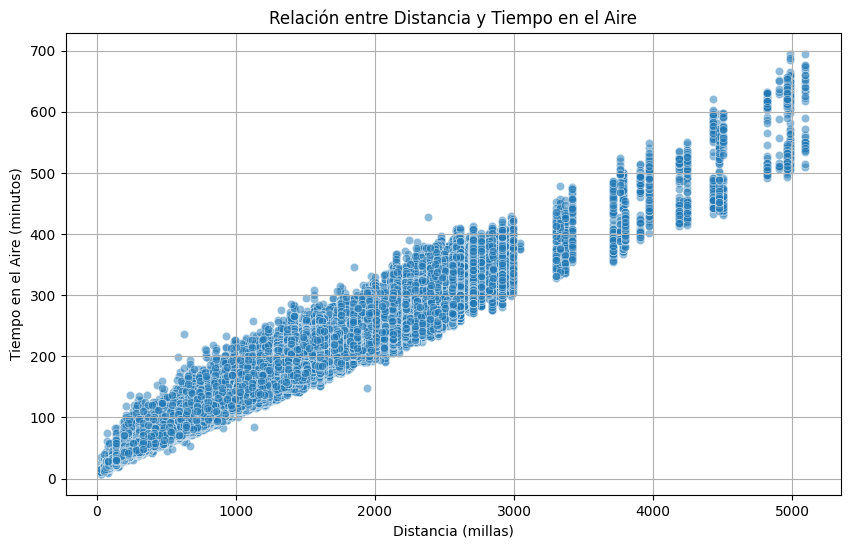

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Explorando la relación entre DISTANCE y AIR_TIME:")

# Eliminar filas con valores nulos en ambas columnas para el análisis de correlación y visualización
# aunque ya manejamos muchos nulos relacionados con cancelaciones/desvíos.
flights_for_corr = flights.dropna(subset=['DISTANCE', 'AIR_TIME']).copy()

print(f"Número de filas después de eliminar nulos en DISTANCE y AIR_TIME: {len(flights_for_corr)}")


# Calcular el coeficiente de correlación de Pearson entre DISTANCE y AIR_TIME
correlation = flights_for_corr['DISTANCE'].corr(flights_for_corr['AIR_TIME'])

print(f"\nCoeficiente de correlación de Pearson entre DISTANCE y AIR_TIME: {correlation:.2f}")

# Visualizar la relación usando un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='AIR_TIME', data=flights_for_corr, alpha=0.5) # Usar alpha para ver la densidad de puntos
plt.title('Relación entre Distancia y Tiempo en el Aire')
plt.xlabel('Distancia (millas)')
plt.ylabel('Tiempo en el Aire (minutos)')
plt.grid(True)
plt.show()

# Opcional: Visualización con regplot para ver la línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='DISTANCE', y='AIR_TIME', data=flights_for_corr, scatter_kws={'alpha':0.5})
plt.title('Relación entre Distancia y Tiempo en el Aire con Línea de Regresión')
plt.xlabel('Distancia (millas)')
plt.ylabel('Tiempo en el Aire (minutos)')
plt.grid(True)
plt.show()

Procederemos a identificar valores atípicos en la columna `DISTANCE` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'DISTANCE'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: DISTANCE

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 4831
Ejemplo de filas identificadas como atípicas por Z-Score:


DISTANCE    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
17043      3711 2023-01-01           AA          6    OGG  DFW
17044      3711 2023-01-02           AA          6    OGG  DFW
17045      3711 2023-01-03           AA          6    OGG  DFW
17046      3711 2023-01-04           AA          6    OGG  DFW
17047      3711 2023-01-05           AA          6    OGG  DFW


--- Método IQR (Límites: -608.00 - 2072.00) ---
Número de valores atípicos detectados por IQR: 32099
Ejemplo de filas identificadas como atípicas por IQR:


DISTANCE    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926      2475 2023-01-01           AA          1    JFK  LAX
16927      2475 2023-01-02           AA          1    JFK  LAX
16928      2475 2023-01-03           AA          1    JFK  LAX
16929      2475 2023-01-04           AA          1    JFK  LAX
16930      2475 2023-01-05           AA          1    JFK  LAX


--- Comparación de resultados ---
Valores atípicos por Z-Score: 4831
Valores atípicos por IQR: 32099


Compararemos el `AIR_TIME` (tiempo real en el aire) con el `ELAPSED_TIME` (tiempo total real) para los vuelos identificados como atípicos en `AIR_TIME`. La diferencia entre `ELAPSED_TIME` y `AIR_TIME` es la suma de `TAXI_OUT` y `TAXI_IN`. Analizar esta diferencia nos dirá cuánto contribuyen los tiempos de rodaje a la duración total del vuelo para estos outliers.

In [ ]:
# Asegurarnos de que el DataFrame outliers_iqr (para AIR_TIME) existe y no está vacío
# Nota: El DataFrame outliers_iqr de la celda 00228c1f contiene los outliers de AIR_TIME (IQR).
# Si se ejecutaron análisis de outliers en otras columnas después de eso, podríamos necesitar recrear esta selección.
# Asumiendo que outliers_iqr todavía se refiere a los outliers de AIR_TIME:
if 'outliers_iqr' in globals() and not outliers_iqr.empty and 'AIR_TIME' in outliers_iqr.columns:
    # Verificamos si outliers_iqr parece contener outliers de AIR_TIME

    print(f"Comparando AIR_TIME y ELAPSED_TIME para los {len(outliers_iqr)} vuelos con AIR_TIME atípico:")

    # Calcular la diferencia: ELAPSED_TIME - AIR_TIME = TAXI_OUT + TAXI_IN
    # Manejar posibles nulos en cualquiera de las columnas antes de la resta
    outliers_iqr_comparison = outliers_iqr.copy() # Trabajar en una copia

    # Asegurarnos de que ambas columnas no tienen nulos en las filas seleccionadas para la resta
    # Los outliers de AIR_TIME ya excluyen nulos en AIR_TIME.
    # Verificamos nulos en ELAPSED_TIME para estas filas.
    rows_to_compare = outliers_iqr_comparison.dropna(subset=['ELAPSED_TIME', 'AIR_TIME'])

    if not rows_to_compare.empty:
        rows_to_compare['TAXI_TIMES_SUM'] = rows_to_compare['ELAPSED_TIME'] - rows_to_compare['AIR_TIME']

        print("\nEstadísticas descriptivas de la diferencia (ELAPSED_TIME - AIR_TIME) para los AIR_TIME outliers:")
        display(rows_to_compare['TAXI_TIMES_SUM'].describe())

        # Mostrar ejemplos de filas con las mayores diferencias (mayor tiempo de rodaje total) y menores diferencias
        print("\nEjemplos de AIR_TIME outliers con las mayores diferencias (mayor tiempo de rodaje total):")
        display(rows_to_compare.sort_values(by='TAXI_TIMES_SUM', ascending=False).head()[[
            'AIR_TIME', 'ELAPSED_TIME', 'TAXI_TIMES_SUM', 'TAXI_OUT', 'TAXI_IN', 'ORIGIN', 'DEST', 'FL_DATE'
        ]])

        print("\nEjemplos de AIR_TIME outliers con las menores diferencias (menor tiempo de rodaje total):")
        display(rows_to_compare.sort_values(by='TAXI_TIMES_SUM', ascending=True).head()[[
            'AIR_TIME', 'ELAPSED_TIME', 'TAXI_TIMES_SUM', 'TAXI_OUT', 'TAXI_IN', 'ORIGIN', 'DEST', 'FL_DATE'
        ]])
    else:
         print("No hay filas válidas para comparar ELAPSED_TIME y AIR_TIME en el subconjunto de outliers de AIR_TIME (posibles nulos en ELAPSED_TIME).")


else:
    print("El DataFrame 'outliers_iqr' no parece contener los outliers de AIR_TIME o está vacío. Por favor, ejecuta la celda 00228c1f para identificar los outliers de AIR_TIME primero.")

Comparando AIR_TIME y ELAPSED_TIME para los 32099 vuelos con AIR_TIME atípico:

Estadísticas descriptivas de la diferencia (ELAPSED_TIME - AIR_TIME) para los AIR_TIME outliers:


/tmp/ipython-input-3052745038.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_to_compare['TAXI_TIMES_SUM'] = rows_to_compare['ELAPSED_TIME'] - rows_to_compare['AIR_TIME']


count    31702.000000
mean        29.008233
std         12.023127
min          8.000000
25%         21.000000
50%         26.000000
75%         33.000000
max        227.000000
Name: TAXI_TIMES_SUM, dtype: float64


Ejemplos de AIR_TIME outliers con las mayores diferencias (mayor tiempo de rodaje total):


AIR_TIME  ELAPSED_TIME  TAXI_TIMES_SUM  TAXI_OUT  TAXI_IN ORIGIN DEST  \
17525      483.0         710.0           227.0     222.0      5.0    DFW  OGG   
140451     299.0         484.0           185.0      12.0    173.0    LAX  OGG   
152881     316.0         493.0           177.0     170.0      7.0    JFK  SEA   
108201     249.0         421.0           172.0     152.0     20.0    SAN  FLL   
211087     246.0         413.0           167.0      29.0    138.0    SFO  ATL   

          FL_DATE  
17525  2023-01-31  
140451 2023-01-21  
152881 2023-01-19  
108201 2023-01-26  
211087 2023-01-03


Ejemplos de AIR_TIME outliers con las menores diferencias (menor tiempo de rodaje total):


AIR_TIME  ELAPSED_TIME  TAXI_TIMES_SUM  TAXI_OUT  TAXI_IN ORIGIN DEST  \
136272     359.0         367.0             8.0       3.0      5.0    JFK  PHX   
486098     342.0         350.0             8.0       5.0      3.0    PIT  SFO   
310511     277.0         286.0             9.0       7.0      2.0    LIH  SJC   
135078     231.0         241.0            10.0       8.0      2.0    LAX  TPA   
232847     307.0         317.0            10.0       7.0      3.0    OGG  SEA   

          FL_DATE  
136272 2023-01-19  
486098 2023-01-29  
310511 2023-01-11  
135078 2023-01-08  
232847 2023-01-14

Procederemos a identificar valores atípicos en la columna `AIR_TIME` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'AIR_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: AIR_TIME

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 8061
Ejemplo de filas identificadas como atípicas por Z-Score:


AIR_TIME    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926     359.0 2023-01-01           AA          1    JFK  LAX
16927     349.0 2023-01-02           AA          1    JFK  LAX
16928     359.0 2023-01-03           AA          1    JFK  LAX
16929     337.0 2023-01-04           AA          1    JFK  LAX
16930     346.0 2023-01-05           AA          1    JFK  LAX


--- Método IQR (Límites: -61.50 - 270.50) ---
Número de valores atípicos detectados por IQR: 26674
Ejemplo de filas identificadas como atípicas por IQR:


AIR_TIME    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926     359.0 2023-01-01           AA          1    JFK  LAX
16927     349.0 2023-01-02           AA          1    JFK  LAX
16928     359.0 2023-01-03           AA          1    JFK  LAX
16929     337.0 2023-01-04           AA          1    JFK  LAX
16930     346.0 2023-01-05           AA          1    JFK  LAX


--- Comparación de resultados ---
Valores atípicos por Z-Score: 8061
Valores atípicos por IQR: 26674


In [ ]:
# Columnas numéricas restantes para analizar outliers
remaining_numerical_columns = ['AIR_TIME', 'DISTANCE']

print("Estadísticas descriptivas de las columnas numéricas restantes:")
display(flights[remaining_numerical_columns].describe())

Estadísticas descriptivas de las columnas numéricas restantes:


AIR_TIME       DISTANCE
count  527197.000000  538837.000000
mean      115.814365     830.110802
std        71.811305     600.126873
min         8.000000      31.000000
25%        63.000000     397.000000
50%        99.000000     679.000000
75%       146.000000    1067.000000
max       695.000000    5095.000000

Exploraremos la relación entre los valores atípicos en `ELAPSED_TIME` y las causas de retraso reportadas.

In [ ]:
# Asegurarnos de que el DataFrame outliers_iqr (para ELAPSED_TIME) existe y no está vacío
# Nota: El DataFrame outliers_iqr de la celda 48c4c896 contiene los outliers de ELAPSED_TIME (IQR).
# Si se ejecutaron análisis de outliers en otras columnas después de eso, podríamos necesitar recrear esta selección.
# Asumiendo que outliers_iqr todavía se refiere a los outliers de ELAPSED_TIME:
if 'outliers_iqr' in globals() and not outliers_iqr.empty and 'ELAPSED_TIME' in outliers_iqr.columns:
    # Verificamos si outliers_iqr parece contener outliers de ELAPSED_TIME

    print(f"Analizando las causas de retraso para los {len(outliers_iqr)} vuelos con ELAPSED_TIME atípico (identificados por IQR):")

    # Columnas de causas de retraso y la columna de retraso desconocido
    delay_cause_columns = [
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN'
    ]

    # Mostrar estadísticas descriptivas de las columnas de causas de retraso para este subconjunto
    print("\nEstadísticas descriptivas de las causas de retraso para los outliers de ELAPSED_TIME:")
    display(outliers_iqr[delay_cause_columns].describe())

    # Contar cuántos vuelos tienen un retraso positivo en cada categoría de causa
    print("\nConteo de vuelos con retraso por causa > 0 entre los outliers de ELAPSED_TIME:")
    positive_delay_counts = {}
    for col in delay_cause_columns:
         # Considerar solo las filas con retraso > 0 en la columna de causa específica
         positive_delay_counts[col] = (outliers_iqr[col] > 0).sum()

    display(pd.Series(positive_delay_counts).sort_values(ascending=False))

    # Opcional: Mostrar ejemplos de filas con los valores más altos en las columnas de causa para los outliers de ELAPSED_TIME
    print("\nEjemplos de outliers de ELAPSED_TIME con los mayores retrasos por causa:")
    for col in delay_cause_columns:
        if positive_delay_counts[col] > 0:
            print(f"\nTop 5 filas con mayor {col} entre los outliers de ELAPSED_TIME:")
            display(outliers_iqr.sort_values(by=col, ascending=False)[[
                'ELAPSED_TIME', col, 'ARR_DELAY', 'ORIGIN', 'DEST', 'FL_DATE'
            ]].head())

    # También podemos ver la correlación entre ELAPSED_TIME y las causas de retraso
    print("\nCorrelación entre ELAPSED_TIME y las causas de retraso para los outliers:")
    # Para calcular la correlación, imputamos temporalmente los nulos en las columnas de causa con 0 para este cálculo.
    correlation_matrix = outliers_iqr[delay_cause_columns + ['ELAPSED_TIME']].fillna(0).corr()
    display(correlation_matrix)

else:
    print("El DataFrame 'outliers_iqr' no parece contener los outliers de ELAPSED_TIME o está vacío. Por favor, ejecuta la celda 48c4c896 para identificar los outliers de ELAPSED_TIME primero.")

Analizando las causas de retraso para los 26674 vuelos con ELAPSED_TIME atípico (identificados por IQR):

Estadísticas descriptivas de las causas de retraso para los outliers de ELAPSED_TIME:


DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
count       21983.000000       21983.000000   21983.000000   
mean            8.501433           0.585771       5.424146   
std            46.507899          13.576075      18.237409   
min             0.000000           0.000000       0.000000   
25%             0.000000           0.000000       0.000000   
50%             0.000000           0.000000       0.000000   
75%             0.000000           0.000000       0.000000   
max          2554.000000        1093.000000     867.000000   

       DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  
count        21983.000000             21983.000000       26674.000000  
mean             0.072556                 5.757403           1.208705  
std              2.511345                30.048863           3.095653  
min              0.000000                 0.000000           0.000000  
25%              0.000000                 0.000000           0.000000  
50%              0.000000                 0.000000           0.000000  
75%              0.000000                 0.000000           0.000000  
max            234.000000              1152.000000          14.000000


Conteo de vuelos con retraso por causa > 0 entre los outliers de ELAPSED_TIME:


DELAY_DUE_UNKNOWN          4691
DELAY_DUE_NAS              4267
DELAY_DUE_CARRIER          3898
DELAY_DUE_LATE_AIRCRAFT    2219
DELAY_DUE_WEATHER           185
DELAY_DUE_SECURITY           44
dtype: int64


Ejemplos de outliers de ELAPSED_TIME con los mayores retrasos por causa:

Top 5 filas con mayor DELAY_DUE_CARRIER entre los outliers de ELAPSED_TIME:


ELAPSED_TIME  DELAY_DUE_CARRIER  ARR_DELAY ORIGIN DEST    FL_DATE
20076          302.0             2554.0     2557.0    SNA  JFK 2023-01-03
185851         383.0             1178.0     1212.0    LAX  KOA 2023-01-07
232751         343.0             1091.0     1091.0    PDX  HNL 2023-01-22
159135         336.0             1073.0     1073.0    JFK  SLC 2023-01-30
43794          400.0             1057.0     1102.0    KOA  PHX 2023-01-21


Top 5 filas con mayor DELAY_DUE_WEATHER entre los outliers de ELAPSED_TIME:


ELAPSED_TIME  DELAY_DUE_WEATHER  ARR_DELAY ORIGIN DEST    FL_DATE
44663          358.0             1093.0     1093.0    LIH  PHX 2023-01-30
163544         318.0              931.0      931.0    ATL  SEA 2023-01-12
112878         344.0              520.0      629.0    SFO  JFK 2023-01-02
94114          339.0              433.0      433.0    SEA  MIA 2023-01-04
233749         359.0              432.0      436.0    LGB  HNL 2023-01-10


Top 5 filas con mayor DELAY_DUE_NAS entre los outliers de ELAPSED_TIME:


ELAPSED_TIME  DELAY_DUE_NAS  ARR_DELAY ORIGIN DEST    FL_DATE
509418         321.0          867.0      867.0    SFO  IAD 2023-01-10
507693         349.0          412.0      412.0    EWR  LAX 2023-01-11
94249          348.0          332.0      332.0    SFO  TPA 2023-01-04
507440         315.0          320.0      320.0    ORD  SFO 2023-01-11
94012          336.0          303.0      303.0    SEA  FLL 2023-01-04


Top 5 filas con mayor DELAY_DUE_SECURITY entre los outliers de ELAPSED_TIME:


ELAPSED_TIME  DELAY_DUE_SECURITY  ARR_DELAY ORIGIN DEST    FL_DATE
286334         322.0               234.0      234.0    BWI  PHX 2023-01-11
49577          323.0               168.0      168.0    MIA  LAS 2023-01-28
94365          401.0                99.0      167.0    TPA  LAX 2023-01-04
77724          318.0                87.0       87.0    EWR  PHX 2023-01-12
91082          336.0                86.0       86.0    MIA  SAN 2023-01-28


Top 5 filas con mayor DELAY_DUE_LATE_AIRCRAFT entre los outliers de ELAPSED_TIME:


ELAPSED_TIME  DELAY_DUE_LATE_AIRCRAFT  ARR_DELAY ORIGIN DEST  \
210251         308.0                   1152.0     1152.0    MCO  LAS   
60325          335.0                   1087.0     1092.0    RDU  LAX   
58659          363.0                    801.0      834.0    EWR  PHX   
508289         296.0                    697.0      697.0    OGG  SFO   
17884          313.0                    640.0      646.0    LAX  JFK   

          FL_DATE  
210251 2023-01-01  
60325  2023-01-23  
58659  2023-01-14  
508289 2023-01-11  
17884  2023-01-23


Top 5 filas con mayor DELAY_DUE_UNKNOWN entre los outliers de ELAPSED_TIME:


ELAPSED_TIME  DELAY_DUE_UNKNOWN  ARR_DELAY ORIGIN DEST    FL_DATE
232245         411.0               14.0       14.0    LAS  HNL 2023-01-11
25535          360.0               14.0       14.0    MIA  LAX 2023-01-27
99364          361.0               14.0       14.0    CHS  SEA 2023-01-12
495936         327.0               14.0       14.0    IAD  LAX 2023-01-02
127522         400.0               14.0       14.0    BOS  SFO 2023-01-22


Correlación entre ELAPSED_TIME y las causas de retraso para los outliers:


DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
DELAY_DUE_CARRIER                 1.000000          -0.004262       0.026023   
DELAY_DUE_WEATHER                -0.004262           1.000000       0.015622   
DELAY_DUE_NAS                     0.026023           0.015622       1.000000   
DELAY_DUE_SECURITY               -0.002423          -0.001027       0.014335   
DELAY_DUE_LATE_AIRCRAFT           0.040316           0.004693       0.036567   
DELAY_DUE_UNKNOWN                -0.064607          -0.015292      -0.104617   
ELAPSED_TIME                      0.035662           0.011882       0.140540   

                         DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
DELAY_DUE_CARRIER                 -0.002423                 0.040316   
DELAY_DUE_WEATHER                 -0.001027                 0.004693   
DELAY_DUE_NAS                      0.014335                 0.036567   
DELAY_DUE_SECURITY                 1.000000                 0.000494   
DELAY_DUE_LATE_AIRCRAFT            0.000494                 1.000000   
DELAY_DUE_UNKNOWN                 -0.010240                -0.067700   
ELAPSED_TIME                      -0.000751                 0.013206   

                         DELAY_DUE_UNKNOWN  ELAPSED_TIME  
DELAY_DUE_CARRIER                -0.064607      0.035662  
DELAY_DUE_WEATHER                -0.015292      0.011882  
DELAY_DUE_NAS                    -0.104617      0.140540  
DELAY_DUE_SECURITY               -0.010240     -0.000751  
DELAY_DUE_LATE_AIRCRAFT          -0.067700      0.013206  
DELAY_DUE_UNKNOWN                 1.000000      0.030623  
ELAPSED_TIME                      0.030623      1.000000

Compararemos el `ELAPSED_TIME` (tiempo total real) con el `CRS_ELAPSED_TIME` (tiempo programado) para los vuelos identificados como atípicos en `ELAPSED_TIME`. Esto nos ayudará a entender la magnitud de la desviación del tiempo real respecto al programado para estos casos atípicos.

In [ ]:
# Asegurarnos de que el DataFrame outliers_iqr (para ELAPSED_TIME) existe y no está vacío
# Nota: El DataFrame outliers_iqr de la celda 48c4c896 contiene los outliers de ELAPSED_TIME (IQR).
# Si se ejecutaron análisis de outliers en otras columnas después de eso, podríamos necesitar recrear esta selección.
# Asumiendo que outliers_iqr todavía se refiere a los outliers de ELAPSED_TIME:
if 'outliers_iqr' in globals() and not outliers_iqr.empty and 'ELAPSED_TIME' in outliers_iqr.columns:
    # Verificamos si outliers_iqr parece contener outliers de ELAPSED_TIME

    print(f"Comparando ELAPSED_TIME y CRS_ELAPSED_TIME para los {len(outliers_iqr)} vuelos con ELAPSED_TIME atípico:")

    # Calcular la diferencia entre ELAPSED_TIME y CRS_ELAPSED_TIME
    # Manejar posibles nulos en cualquiera de las columnas antes de la resta si es necesario
    # En este caso, dropna() ya se usó para identificar outliers, por lo que ELAPSED_TIME no debería tener nulos en este subconjunto.
    # CRS_ELAPSED_TIME podría tener un nulo (vuelo cancelado que ya identificamos), lo manejaremos.
    outliers_iqr_comparison = outliers_iqr.copy() # Trabajar en una copia

    # Calcular la diferencia, manejando el nulo en CRS_ELAPSED_TIME si existe
    outliers_iqr_comparison['ELAPSED_TIME_DIFF'] = outliers_iqr_comparison['ELAPSED_TIME'] - outliers_iqr_comparison['CRS_ELAPSED_TIME'].fillna(outliers_iqr_comparison['CRS_ELAPSED_TIME'].median()) # Imputar con mediana solo para el cálculo de diferencia si hay nulos

    print("\nEstadísticas descriptivas de la diferencia (ELAPSED_TIME - CRS_ELAPSED_TIME) para los ELAPSED_TIME outliers:")
    display(outliers_iqr_comparison['ELAPSED_TIME_DIFF'].describe())

    # Mostrar ejemplos de filas con las mayores diferencias (positivas y negativas)
    print("\nEjemplos de ELAPSED_TIME outliers con las mayores diferencias:")
    print("\nTop 5 con mayor diferencia positiva (ELAPSED_TIME > CRS_ELAPSED_TIME):")
    display(outliers_iqr_comparison.sort_values(by='ELAPSED_TIME_DIFF', ascending=False).head()[[
        'ELAPSED_TIME', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME_DIFF', 'ARR_DELAY', 'DEP_DELAY', 'ORIGIN', 'DEST', 'FL_DATE'
    ]])

    print("\nTop 5 con mayor diferencia negativa (ELAPSED_TIME < CRS_ELAPSED_TIME):")
    display(outliers_iqr_comparison.sort_values(by='ELAPSED_TIME_DIFF', ascending=True).head()[[
        'ELAPSED_TIME', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME_DIFF', 'ARR_DELAY', 'DEP_DELAY', 'ORIGIN', 'DEST', 'FL_DATE'
    ]])

else:
    print("El DataFrame 'outliers_iqr' no parece contener los outliers de ELAPSED_TIME o está vacío. Por favor, ejecuta la celda 48c4c896 para identificar los outliers de ELAPSED_TIME primero.")

Comparando ELAPSED_TIME y CRS_ELAPSED_TIME para los 26674 vuelos con ELAPSED_TIME atípico:

Estadísticas descriptivas de la diferencia (ELAPSED_TIME - CRS_ELAPSED_TIME) para los ELAPSED_TIME outliers:


count    26674.000000
mean        -6.268876
std         19.960441
min        -78.000000
25%        -19.000000
50%         -7.000000
75%          5.000000
max        209.000000
Name: ELAPSED_TIME_DIFF, dtype: float64


Ejemplos de ELAPSED_TIME outliers con las mayores diferencias:

Top 5 con mayor diferencia positiva (ELAPSED_TIME > CRS_ELAPSED_TIME):


ELAPSED_TIME  CRS_ELAPSED_TIME  ELAPSED_TIME_DIFF  ARR_DELAY  \
17525          710.0             501.0              209.0      261.0   
140451         484.0             338.0              146.0      151.0   
17410          643.0             501.0              142.0      176.0   
141698         456.0             326.0              130.0      259.0   
152881         493.0             380.0              113.0      269.0   

        DEP_DELAY ORIGIN DEST    FL_DATE  
17525        52.0    DFW  OGG 2023-01-31  
140451        5.0    LAX  OGG 2023-01-21  
17410        34.0    DFW  HNL 2023-01-31  
141698      129.0    SEA  MCO 2023-01-02  
152881      156.0    JFK  SEA 2023-01-19


Top 5 con mayor diferencia negativa (ELAPSED_TIME < CRS_ELAPSED_TIME):


ELAPSED_TIME  CRS_ELAPSED_TIME  ELAPSED_TIME_DIFF  ARR_DELAY  \
142445         309.0             387.0              -78.0       97.0   
514155         335.0             413.0              -78.0      -78.0   
136678         325.0             395.0              -70.0      156.0   
18316          333.0             401.0              -68.0      -72.0   
161871         341.0             408.0              -67.0      -69.0   

        DEP_DELAY ORIGIN DEST    FL_DATE  
142445      175.0    JFK  LAX 2023-01-13  
514155        0.0    BOS  SFO 2023-01-23  
136678      226.0    JFK  SAN 2023-01-08  
18316        -4.0    JFK  LAX 2023-01-13  
161871       -2.0    JFK  SFO 2023-01-23

Procederemos a identificar valores atípicos en la columna `ELAPSED_TIME` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'ELAPSED_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: ELAPSED_TIME

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 7721
Ejemplo de filas identificadas como atípicas por Z-Score:


ELAPSED_TIME    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926         388.0 2023-01-01           AA          1    JFK  LAX
16927         374.0 2023-01-02           AA          1    JFK  LAX
16928         393.0 2023-01-03           AA          1    JFK  LAX
16929         372.0 2023-01-04           AA          1    JFK  LAX
16930         381.0 2023-01-05           AA          1    JFK  LAX


--- Método IQR (Límites: -41.00 - 303.00) ---
Número de valores atípicos detectados por IQR: 25005
Ejemplo de filas identificadas como atípicas por IQR:


ELAPSED_TIME    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926         388.0 2023-01-01           AA          1    JFK  LAX
16927         374.0 2023-01-02           AA          1    JFK  LAX
16928         393.0 2023-01-03           AA          1    JFK  LAX
16929         372.0 2023-01-04           AA          1    JFK  LAX
16930         381.0 2023-01-05           AA          1    JFK  LAX


--- Comparación de resultados ---
Valores atípicos por Z-Score: 7721
Valores atípicos por IQR: 25005


Continuando con la investigación de los valores atípicos en `CRS_ELAPSED_TIME`, analizaremos otras columnas clave para el subconjunto de vuelos identificados con tiempos de vuelo programados atípicos.

In [ ]:
# Asegurarnos de que el DataFrame outliers_iqr (para CRS_ELAPSED_TIME) existe y no está vacío
# Nota: El DataFrame outliers_iqr de la celda 791a4c10 contiene los outliers de CRS_ELAPSED_TIME (IQR).
# Si se ejecutaron análisis de outliers en otras columnas después de eso, podríamos necesitar recrear esta selección.
# Asumiendo que outliers_iqr todavía se refiere a los outliers de CRS_ELAPSED_TIME de la última ejecución:
if 'outliers_iqr' in globals() and not outliers_iqr.empty and outliers_iqr['CRS_ELAPSED_TIME'].dropna().isin(flights['CRS_ELAPSED_TIME']).any():
    # Verificamos si outliers_iqr parece contener outliers de CRS_ELAPSED_TIME

    print(f"Analizando otras columnas para los {len(outliers_iqr)} vuelos con CRS_ELAPSED_TIME atípico (identificados por IQR):")

    # Columnas relevantes para analizar en relación con CRS_ELAPSED_TIME
    columns_to_investigate = [
        'DISTANCE',
        'ELAPSED_TIME', # Tiempo total real
        'AIR_TIME', # Tiempo en el aire real
        'ORIGIN',
        'DEST'
    ]

    print("\nEstadísticas descriptivas de columnas relacionadas para los outliers de CRS_ELAPSED_TIME:")
    display(outliers_iqr[columns_to_investigate].describe())

    # Analizar la correlación entre CRS_ELAPSED_TIME y DISTANCE/ELAPSED_TIME/AIR_TIME para este subconjunto
    print("\nCorrelación entre CRS_ELAPSED_TIME y columnas relacionadas para los outliers:")
    correlation_matrix = outliers_iqr[['CRS_ELAPSED_TIME', 'DISTANCE', 'ELAPSED_TIME', 'AIR_TIME']].corr()
    display(correlation_matrix)

    # Ver la distribución de los aeropuertos de origen y destino para estos outliers
    print("\nDistribución de ORIGIN (Top 10) para los outliers de CRS_ELAPSED_TIME:")
    display(outliers_iqr['ORIGIN'].value_counts().head(10))

    print("\nDistribución de DEST (Top 10) para los outliers de CRS_ELAPSED_TIME:")
    display(outliers_iqr['DEST'].value_counts().head(10))

    # Opcional: Mostrar ejemplos de filas con los valores más extremos en CRS_ELAPSED_TIME
    print("\nEjemplos de outliers de CRS_ELAPSED_TIME (más altos y más bajos):")
    print("\nTop 5 más altos:")
    display(outliers_iqr.sort_values(by='CRS_ELAPSED_TIME', ascending=False).head()[[
        'CRS_ELAPSED_TIME', 'DISTANCE', 'ELAPSED_TIME', 'AIR_TIME', 'ORIGIN', 'DEST', 'FL_DATE'
    ]])
    print("\nTop 5 más bajos:")
    display(outliers_iqr.sort_values(by='CRS_ELAPSED_TIME', ascending=True).head()[[
        'CRS_ELAPSED_TIME', 'DISTANCE', 'ELAPSED_TIME', 'AIR_TIME', 'ORIGIN', 'DEST', 'FL_DATE'
    ]])

else:
    print("El DataFrame 'outliers_iqr' no parece contener los outliers de CRS_ELAPSED_TIME o está vacío. Por favor, ejecuta la celda 791a4c10 para identificar los outliers de CRS_ELAPSED_TIME primero.")

Analizando otras columnas para los 25005 vuelos con CRS_ELAPSED_TIME atípico (identificados por IQR):

Estadísticas descriptivas de columnas relacionadas para los outliers de CRS_ELAPSED_TIME:


DISTANCE  ELAPSED_TIME      AIR_TIME
count  25005.000000  25005.000000  25005.000000
mean    2506.787203    353.736293    322.342651
std      459.349600     49.671049     49.569273
min      852.000000    304.000000    136.000000
25%     2306.000000    321.000000    293.000000
50%     2475.000000    343.000000    313.000000
75%     2588.000000    371.000000    340.000000
max     5095.000000    749.000000    695.000000


Correlación entre CRS_ELAPSED_TIME y columnas relacionadas para los outliers:


CRS_ELAPSED_TIME  DISTANCE  ELAPSED_TIME  AIR_TIME
CRS_ELAPSED_TIME          1.000000  0.831521      0.906872  0.936934
DISTANCE                  0.831521  1.000000      0.791356  0.827130
ELAPSED_TIME              0.906872  0.791356      1.000000  0.955494
AIR_TIME                  0.936934  0.827130      0.955494  1.000000


Distribución de ORIGIN (Top 10) para los outliers de CRS_ELAPSED_TIME:


ORIGIN
JFK    2608
LAX    2115
SFO    1886
EWR    1766
HNL    1746
SEA    1477
BOS    1438
ATL     854
MCO     794
PHL     787
Name: count, dtype: int64


Distribución de DEST (Top 10) para los outliers de CRS_ELAPSED_TIME:


DEST
LAX    4271
SFO    2600
SEA    2302
HNL    2093
LAS    1723
JFK    1573
PHX    1390
OGG    1217
SAN    1012
BOS     896
Name: count, dtype: int64


Ejemplos de outliers de CRS_ELAPSED_TIME (más altos y más bajos):

Top 5 más altos:


CRS_ELAPSED_TIME  DISTANCE  ELAPSED_TIME  AIR_TIME ORIGIN DEST  \
135444             685.0      4983         749.0     688.0    JFK  HNL   
135443             685.0      4983         689.0     658.0    JFK  HNL   
135442             685.0      4983         663.0     639.0    JFK  HNL   
135441             685.0      4983         719.0     684.0    JFK  HNL   
135440             685.0      4983         664.0     630.0    JFK  HNL   

          FL_DATE  
135444 2023-01-31  
135443 2023-01-30  
135442 2023-01-29  
135441 2023-01-28  
135440 2023-01-27


Top 5 más bajos:


CRS_ELAPSED_TIME  DISTANCE  ELAPSED_TIME  AIR_TIME ORIGIN DEST  \
41410              156.0       868         323.0     139.0    DFW  PHX   
91462              157.0       852         309.0     136.0    MSP  DFW   
230110             158.0       942         319.0     149.0    MDT  SRQ   
149019             173.0       989         309.0     137.0    DFW  SLC   
113469             177.0      1029         307.0     143.0    MSP  JFK   

          FL_DATE  
41410  2023-01-31  
91462  2023-01-03  
230110 2023-01-25  
149019 2023-01-31  
113469 2023-01-03

Procederemos a identificar valores atípicos en la columna `CRS_ELAPSED_TIME` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'CRS_ELAPSED_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectedos por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: CRS_ELAPSED_TIME

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 8720
Ejemplo de filas identificadas como atípicas por Z-Score:


CRS_ELAPSED_TIME    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926             382.0 2023-01-01           AA          1    JFK  LAX
16927             382.0 2023-01-02           AA          1    JFK  LAX
16928             382.0 2023-01-03           AA          1    JFK  LAX
16929             382.0 2023-01-04           AA          1    JFK  LAX
16930             382.0 2023-01-05           AA          1    JFK  LAX


--- Método IQR (Límites: -34.50 - 305.50) ---
Número de valores atípicos detectedos por IQR: 27542
Ejemplo de filas identificadas como atípicas por IQR:


CRS_ELAPSED_TIME    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
16926             382.0 2023-01-01           AA          1    JFK  LAX
16927             382.0 2023-01-02           AA          1    JFK  LAX
16928             382.0 2023-01-03           AA          1    JFK  LAX
16929             382.0 2023-01-04           AA          1    JFK  LAX
16930             382.0 2023-01-05           AA          1    JFK  LAX


--- Comparación de resultados ---
Valores atípicos por Z-Score: 8720
Valores atípicos por IQR: 27542


Procederemos a identificar valores atípicos en la columna `ARR_TIME` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'ARR_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: ARR_TIME

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 0
No se detectaron valores atípicos significativos por Z-Score en esta columna.

--- Método IQR (Límites: -240.50 - 3219.50) ---
Número de valores atípicos detectados por IQR: 0
No se detectaron valores atípicos por IQR en esta columna.

--- Comparación de resultados ---
Valores atípicos por Z-Score: 0
Valores atípicos por IQR: 0


Procederemos a identificar valores atípicos en la columna `CRS_ARR_TIME` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'CRS_ARR_TIME'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: La elección del método y el umbral depende del contexto y la distribución de los datos.
# Para CRS_ARR_TIME, valores fuera del rango 0000-2359 (formato HHMM) serían los verdaderos atípicos.
# Los métodos estadísticos como Z-Score e IQR detectan valores inusuales respecto a la distribución,
# que pueden no ser errores de formato, sino simplemente horarios poco comunes.
# Es importante considerar el contexto del formato de hora (generalmente HHMM sin separador) para la detección manual de errores.

Analizando valores atípicos en la columna: CRS_ARR_TIME

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 0
No se detectaron valores atípicos significativos por Z-Score en esta columna.

--- Método IQR (Límites: -118.00 - 3154.00) ---
Número de valores atípicos detectados por IQR: 0
No se detectaron valores atípicos por IQR en esta columna.

--- Comparación de resultados ---
Valores atípicos por Z-Score: 0
Valores atípicos por IQR: 0


Continuando con la investigación de los valores atípicos en `TAXI_IN`, analizaremos otras columnas clave para el subconjunto de vuelos identificados con tiempos de rodaje a la llegada atípicos, enfocándonos en las causas de los retrasos.

In [ ]:
# Asegurarnos de que el DataFrame outliers_iqr (para TAXI_IN) existe y no está vacío
# Nota: El DataFrame outliers_iqr de la celda 11e58b16 contiene los outliers de TAXI_IN.
# Si se ejecutaron análisis de outliers en otras columnas después de eso, podríamos necesitar recrear esta selección.
# Asumiendo que outliers_iqr todavía se refiere a los outliers de TAXI_IN:
if 'outliers_iqr' in globals() and not outliers_iqr.empty and outliers_iqr['TAXI_IN'].dropna().isin(flights['TAXI_IN']).any():
    # Verificamos si outliers_iqr parece contener outliers de TAXI_IN

    print(f"Analizando otras columnas para los {len(outliers_iqr)} vuelos con TAXI_IN atípico (identificados por IQR):")

    # Columnas relevantes para analizar en relación con TAXI_IN y retrasos
    columns_to_investigate = [
        'ARR_DELAY',
        'DEP_DELAY', # Puede ser relevante si un retraso en la salida influye en la llegada y el taxi-in
        'CANCELLED',
        'DIVERTED',
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS', # NAS es a menudo relevante para operaciones en tierra
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN'
    ]

    print("\nEstadísticas descriptivas de columnas relacionadas con retrasos para los outliers de TAXI_IN:")
    display(outliers_iqr[columns_to_investigate].describe())

    # Analizar la correlación entre TAXI_IN y DEP_DELAY/ARR_DELAY para este subconjunto
    print("\nCorrelación entre TAXI_IN y Retrasos para los outliers de TAXI_IN:")
    correlation_matrix = outliers_iqr[['TAXI_IN', 'DEP_DELAY', 'ARR_DELAY']].corr()
    display(correlation_matrix)

    # Ver la distribución de los códigos de cancelación/desvío para estos outliers
    print("\nDistribución de CANCELLED y DIVERTED para los outliers de TAXI_IN:")
    display(outliers_iqr['CANCELLED'].value_counts(dropna=False))
    display(outliers_iqr['DIVERTED'].value_counts(dropna=False))

    # Ver la distribución de las causas de retraso para estos outliers
    print("\nConteo de vuelos con retraso por causa > 0 entre los outliers de TAXI_IN:")
    delay_cause_columns = [
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN'
    ]

    positive_delay_counts = {}
    for col in delay_cause_columns:
         positive_delay_counts[col] = (outliers_iqr[col] > 0).sum()

    display(pd.Series(positive_delay_counts).sort_values(ascending=False))

    # Opcional: Mostrar ejemplos de filas con los valores más altos en las columnas de causa
    print("\nEjemplos de outliers de TAXI_IN con los mayores retrasos por causa:")
    for col in delay_cause_columns:
        if positive_delay_counts[col] > 0:
            print(f"\nTop 5 filas con mayor {col} entre los outliers de TAXI_IN:")
            display(outliers_iqr.sort_values(by=col, ascending=False)[[
                'TAXI_IN', col, 'DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'FL_DATE'
            ]].head())

else:
    print("El DataFrame 'outliers_iqr' no parece contener los outliers de TAXI_IN o está vacío. Por favor, ejecuta la celda 11e58b16 para identificar los outliers de TAXI_IN primero.")

El DataFrame 'outliers_iqr' no parece contener los outliers de TAXI_IN o está vacío. Por favor, ejecuta la celda 11e58b16 para identificar los outliers de TAXI_IN primero.


Exploraremos la distribución de los tiempos de rodaje a la llegada (`TAXI_IN`) por aeropuerto de destino (`DEST`) para identificar posibles patrones o diferencias significativas entre aeropuertos.

Distribución de TAXI_IN por aeropuerto de destino (DEST):

Aeropuertos con los mayores tiempos promedio de TAXI_IN:


count       mean        std   min   25%   50%   75%    max
DEST                                                              
ORD   19770.0  13.506829   7.345790   1.0   9.0  12.0  16.0  139.0
JFK   10823.0  13.449413  10.903756   1.0   8.0  10.0  15.0  150.0
EWR   11495.0  13.237060   9.933602   2.0   7.0  10.0  15.0  163.0
PPG      11.0  13.000000   1.414214  12.0  12.0  12.0  13.5   16.0
DFW   19771.0  11.390572   5.595739   1.0   7.0  11.0  14.0   68.0
MCO   13092.0  11.318210   7.658654   2.0   7.0   9.0  13.0   91.0
CLT   14963.0  10.954822   5.651863   2.0   7.0  10.0  14.0   62.0
ASE     741.0  10.821862  12.884649   2.0   3.0   5.0  12.0   76.0
DEN   21651.0  10.734516   7.686754   1.0   6.0   8.0  12.0   84.0
LAX   15237.0  10.256809   6.690462   1.0   6.0   9.0  12.0   82.0


Aeropuertos con los mayores tiempos máximos de TAXI_IN:


count       mean        std  min  25%   50%   75%    max
DEST                                                            
OGG    2575.0   8.878447  10.769048  1.0  5.0   6.0   8.0  173.0
EWR   11495.0  13.237060   9.933602  2.0  7.0  10.0  15.0  163.0
IDA     233.0   5.854077  11.266949  2.0  3.0   4.0   6.0  152.0
BOS   10707.0   9.065191   7.444436  1.0  6.0   7.0  10.0  152.0
JFK   10823.0  13.449413  10.903756  1.0  8.0  10.0  15.0  150.0
ORD   19770.0  13.506829   7.345790  1.0  9.0  12.0  16.0  139.0
ATL   26319.0   9.118204   7.314484  1.0  6.0   7.0  10.0  138.0
IAH    8991.0   9.717495   7.064335  2.0  6.0   8.0  11.0  121.0
AUS    7149.0   7.202126   6.622769  1.0  4.0   5.0   8.0  116.0
FSD     547.0   9.146252  10.833767  2.0  5.0   6.0   8.0  115.0


Visualización de la distribución de TAXI_IN para los aeropuertos con mayor promedio (['ORD', 'JFK', 'EWR', 'PPG', 'DFW']):


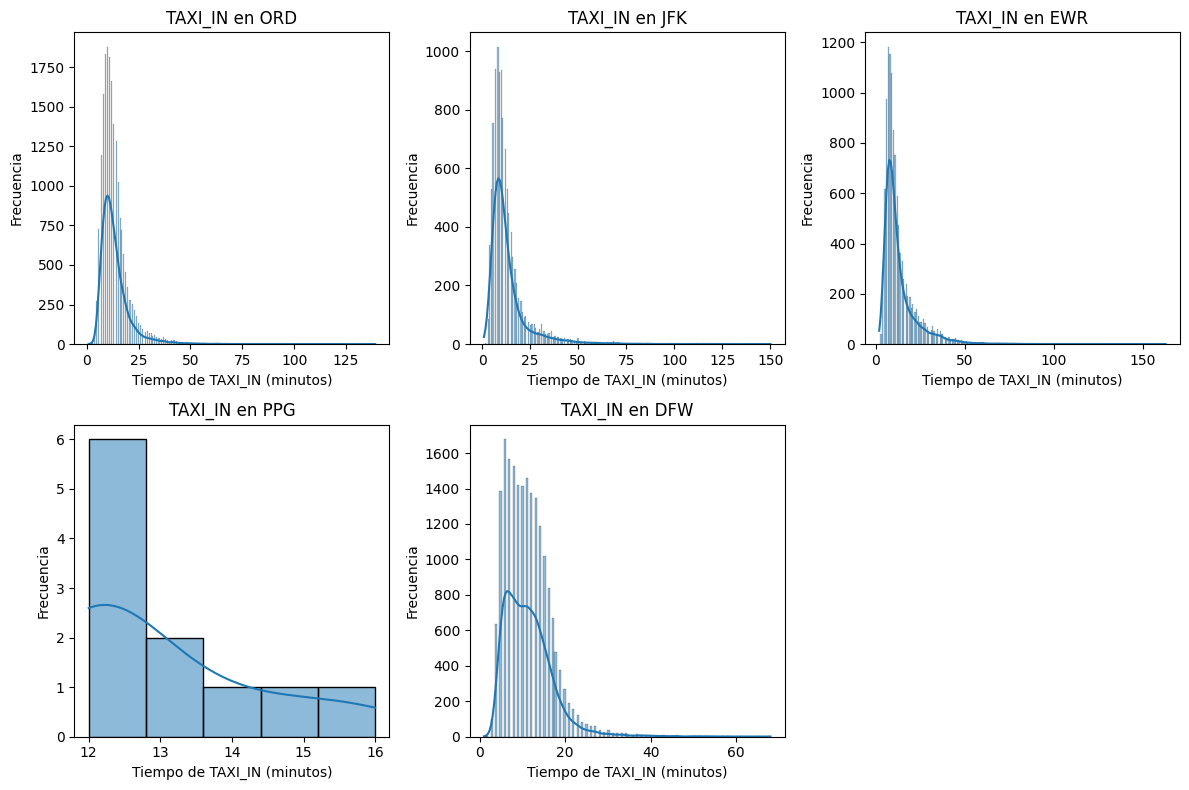


Comparación de la distribución de TAXI_IN para los aeropuertos con mayor promedio (Box plots):


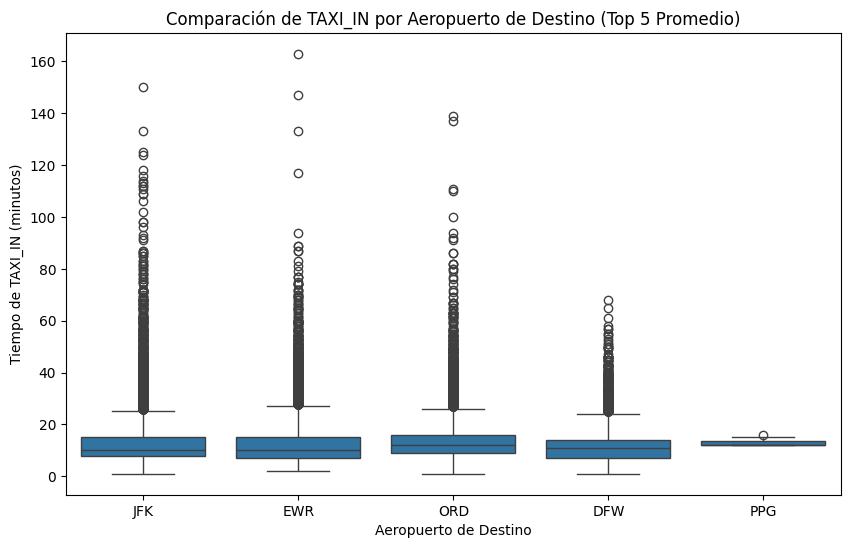

In [ ]:
print("Distribución de TAXI_IN por aeropuerto de destino (DEST):")

# Agrupar el DataFrame flights por la columna DEST
# y calcular estadísticas descriptivas para la columna TAXI_IN en cada grupo.
# Excluimos los valores nulos en TAXI_IN para este análisis
taxi_in_by_dest = flights.groupby('DEST')['TAXI_IN'].describe()

# Ordenar los resultados por la media de TAXI_IN de forma descendente
print("\nAeropuertos con los mayores tiempos promedio de TAXI_IN:")
display(taxi_in_by_dest.sort_values(by='mean', ascending=False).head(10))

# También podemos ver los aeropuertos con los mayores tiempos máximos de TAXI_IN
print("\nAeropuertos con los mayores tiempos máximos de TAXI_IN:")
display(taxi_in_by_dest.sort_values(by='max', ascending=False).head(10))

# Opcional: Visualizar la distribución de TAXI_IN para algunos de los aeropuertos con promedios más altos
# Seleccionar los códigos de los 5 aeropuertos con mayor TAXI_IN promedio
top_taxi_in_airports = taxi_in_by_dest.sort_values(by='mean', ascending=False).head(5).index.tolist()

print(f"\nVisualización de la distribución de TAXI_IN para los aeropuertos con mayor promedio ({top_taxi_in_airports}):")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, airport in enumerate(top_taxi_in_airports):
    plt.subplot(2, 3, i + 1)
    sns.histplot(flights[flights['DEST'] == airport]['TAXI_IN'].dropna(), kde=True)
    plt.title(f'TAXI_IN en {airport}')
    plt.xlabel('Tiempo de TAXI_IN (minutos)')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# También podemos usar box plots para comparar visualmente la distribución entre aeropuertos
print("\nComparación de la distribución de TAXI_IN para los aeropuertos con mayor promedio (Box plots):")
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEST', y='TAXI_IN', data=flights[flights['DEST'].isin(top_taxi_in_airports)].dropna(subset=['TAXI_IN']))
plt.title('Comparación de TAXI_IN por Aeropuerto de Destino (Top 5 Promedio)')
plt.xlabel('Aeropuerto de Destino')
plt.ylabel('Tiempo de TAXI_IN (minutos)')
plt.show()

Procederemos a identificar valores atípicos en la columna `TAXI_IN` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'TAXI_IN'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: TAXI_IN

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 10083
Ejemplo de filas identificadas como atípicas por Z-Score:


TAXI_IN    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
123     32.0 2023-01-09           9E       4635    BWI  JFK
127     35.0 2023-01-13           9E       4635    BWI  JFK
128     44.0 2023-01-14           9E       4635    BWI  JFK
129     68.0 2023-01-15           9E       4635    BWI  JFK
135     35.0 2023-01-21           9E       4635    BWI  JFK


--- Método IQR (Límites: -3.50 - 16.50) ---
Número de valores atípicos detectados por IQR: 36666
Ejemplo de filas identificadas como atípicas por IQR:


TAXI_IN    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
0       20.0 2023-01-02           9E       4628    BDL  LGA
116     24.0 2023-01-02           9E       4634    PIT  MSP
123     32.0 2023-01-09           9E       4635    BWI  JFK
127     35.0 2023-01-13           9E       4635    BWI  JFK
128     44.0 2023-01-14           9E       4635    BWI  JFK


--- Comparación de resultados ---
Valores atípicos por Z-Score: 10083
Valores atípicos por IQR: 36666


Procederemos a identificar valores atípicos en la columna `WHEELS_ON` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'WHEELS_ON'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: WHEELS_ON

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 0
No se detectaron valores atípicos significativos por Z-Score en esta columna.

--- Método IQR (Límites: -240.50 - 3211.50) ---
Número de valores atípicos detectados por IQR: 0
No se detectaron valores atípicos por IQR en esta columna.

--- Comparación de resultados ---
Valores atípicos por Z-Score: 0
Valores atípicos por IQR: 0


Procederemos a identificar valores atípicos en la columna `WHEELS_OFF` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'WHEELS_OFF'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: WHEELS_OFF

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 0
No se detectaron valores atípicos significativos por Z-Score en esta columna.

--- Método IQR (Límites: -300.50 - 2991.50) ---
Número de valores atípicos detectados por IQR: 0
No se detectaron valores atípicos por IQR en esta columna.

--- Comparación de resultados ---
Valores atípicos por Z-Score: 0
Valores atípicos por IQR: 0


Procederemos a identificar valores atípicos en la columna `TAXI_OUT` utilizando los métodos Z-Score y el Rango Intercuartílico (IQR).

In [ ]:
from scipy.stats import zscore
import numpy as np

column_to_analyze = 'TAXI_OUT'

print(f"Analizando valores atípicos en la columna: {column_to_analyze}")

# --- Método Z-Score ---
# Calcula el Z-Score para cada valor en la columna
# Ignoramos los valores nulos en el cálculo de Z-Score
z_scores = np.abs(zscore(flights[column_to_analyze].dropna()))

# Define un umbral de Z-Score (comúnmente 3 o -3)
z_score_threshold = 3

# Identifica las filas donde el Z-Score supera el umbral
# Usamos .loc para asegurar la alineación correcta de índices después de dropna
outliers_zscore_indices = flights[column_to_analyze].dropna()[z_scores > z_score_threshold].index

print(f"\n--- Método Z-Score (Umbral = {z_score_threshold}) ---")
print(f"Número de valores atípicos detectados por Z-Score: {len(outliers_zscore_indices)}")

if len(outliers_zscore_indices) > 0:
    print("Ejemplo de filas identificadas como atípicas por Z-Score:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(flights.loc[outliers_zscore_indices, [column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos significativos por Z-Score en esta columna.")


# --- Método IQR ---
# Calcula el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
Q1 = flights[column_to_analyze].quantile(0.25)
Q3 = flights[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica las filas donde el valor está fuera de los límites del IQR
outliers_iqr = flights[(flights[column_to_analyze] < lower_bound) | (flights[column_to_analyze] > upper_bound)]

print(f"\n--- Método IQR (Límites: {lower_bound:.2f} - {upper_bound:.2f}) ---")
print(f"Número de valores atípicos detectados por IQR: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("Ejemplo de filas identificadas como atípicas por IQR:")
    # Mostramos la columna analizada y algunas columnas de contexto
    display(outliers_iqr[[column_to_analyze, 'FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']].head())
else:
    print("No se detectaron valores atípicos por IQR en esta columna.")

# Comparar los resultados (opcional)
print("\n--- Comparación de resultados ---")
print(f"Valores atípicos por Z-Score: {len(outliers_zscore_indices)}")
print(f"Valores atípicos por IQR: {len(outliers_iqr)}")

# Nota: Es normal que los dos métodos identifiquen conjuntos de atípicos ligeramente diferentes.
# La elección del método y el umbral depende del contexto y la distribución de los datos.

Analizando valores atípicos en la columna: TAXI_OUT

--- Método Z-Score (Umbral = 3) ---
Número de valores atípicos detectados por Z-Score: 9732
Ejemplo de filas identificadas como atípicas por Z-Score:


TAXI_OUT    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
13      61.0 2023-01-13           9E       4629    LGA  BGM
29      55.0 2023-01-01           9E       4630    DLH  MSP
57      91.0 2023-01-12           9E       4631    FAY  ATL
81      74.0 2023-01-12           9E       4632    JFK  ITH
88      55.0 2023-01-19           9E       4632    JFK  ITH


--- Método IQR (Límites: -1.50 - 34.50) ---
Número de valores atípicos detectados por IQR: 35661
Ejemplo de filas identificadas como atípicas por IQR:


TAXI_OUT    FL_DATE AIRLINE_CODE  FL_NUMBER ORIGIN DEST
10      45.0 2023-01-10           9E       4629    LGA  BGM
11      46.0 2023-01-11           9E       4629    LGA  BGM
13      61.0 2023-01-13           9E       4629    LGA  BGM
15      43.0 2023-01-16           9E       4629    LGA  BGM
16      35.0 2023-01-17           9E       4629    LGA  BGM


--- Comparación de resultados ---
Valores atípicos por Z-Score: 9732
Valores atípicos por IQR: 35661


Investigaremos más a fondo los valores atípicos detectados en la columna `TAXI_OUT`. Analizaremos su distribución por aeropuerto de origen y destino para identificar si hay patrones geográficos.

In [ ]:
# Usaremos los outliers identificados por el método IQR de la celda anterior (d1c35924)
# Asegurarnos de que el DataFrame outliers_iqr existe
if 'outliers_iqr' in globals() and not outliers_iqr.empty:

    print(f"Analizando la distribución de los {len(outliers_iqr)} valores atípicos de TAXI_OUT (identificados por IQR):")

    # Análisis por aeropuerto de origen
    print("\nDistribución de outliers por ORIGIN:")
    origin_outlier_counts = outliers_iqr['ORIGIN'].value_counts().head(10) # Mostrar los 10 aeropuertos con más outliers
    display(origin_outlier_counts)

    # Análisis por aeropuerto de destino
    print("\nDistribución de outliers por DEST:")
    dest_outlier_counts = outliers_iqr['DEST'].value_counts().head(10) # Mostrar los 10 aeropuertos con más outliers
    display(dest_outlier_counts)

    # Comparar con la distribución general de vuelos por aeropuerto
    print("\nComparación con la distribución general de vuelos por ORIGIN:")
    general_origin_counts = flights['ORIGIN'].value_counts().head(10)
    display(general_origin_counts)

    print("\nComparación con la distribución general de vuelos por DEST:")
    general_dest_counts = flights['DEST'].value_counts().head(10)
    display(general_dest_counts)

    # Podemos calcular el porcentaje de vuelos que son outliers de TAXI_OUT por aeropuerto
    print("\nPorcentaje de vuelos que son outliers de TAXI_OUT por ORIGIN (Top 10 con más outliers):")
    origin_outlier_percentage = (origin_outlier_counts / general_origin_counts) * 100
    display(origin_outlier_percentage.sort_values(ascending=False))

    print("\nPorcentaje de vuelos que son outliers de TAXI_OUT por DEST (Top 10 con más outliers):")
    dest_outlier_percentage = (dest_outlier_counts / general_dest_counts) * 100
    display(dest_outlier_percentage.sort_values(ascending=False))

    # También podemos ver las estadísticas descriptivas de TAXI_OUT solo para los outliers
    print("\nEstadísticas descriptivas de TAXI_OUT para los valores atípicos (IQR):")
    display(outliers_iqr['TAXI_OUT'].describe())

    # Opcional: Ver otras columnas para los outliers (ej. DEP_DELAY, DELAY_DUE_WEATHER)
    print("\nEjemplo de filas con valores atípicos de TAXI_OUT, incluyendo columnas de retraso:")
    columns_to_display_outliers = ['TAXI_OUT', 'DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'ORIGIN', 'DEST', 'FL_DATE']
    display(outliers_iqr[columns_to_display_outliers].head())


else:
    print("El DataFrame 'outliers_iqr' no se encontró o está vacío. Por favor, ejecuta la celda anterior para identificar los outliers primero.")

Analizando la distribución de los 35661 valores atípicos de TAXI_OUT (identificados por IQR):

Distribución de outliers por ORIGIN:


ORIGIN
ORD    3528
DEN    2898
MSP    2037
LGA    1798
BOS    1393
DTW    1258
JFK    1257
SLC    1250
EWR    1037
CLT    1011
Name: count, dtype: int64


Distribución de outliers por DEST:


DEST
ORD    1717
DEN    1665
LGA    1560
ATL    1445
DFW    1191
CLT    1190
EWR     976
LAX     944
SFO     926
DCA     898
Name: count, dtype: int64


Comparación con la distribución general de vuelos por ORIGIN:


ORIGIN
ATL    26582
DEN    22460
DFW    20502
ORD    20086
LAS    15792
LAX    15424
CLT    15170
PHX    14613
LGA    13479
MCO    13333
Name: count, dtype: int64


Comparación con la distribución general de vuelos por DEST:


DEST
ATL    26566
DEN    22461
DFW    20521
ORD    20092
LAS    15793
LAX    15428
CLT    15167
PHX    14620
LGA    13481
MCO    13327
Name: count, dtype: int64


Porcentaje de vuelos que son outliers de TAXI_OUT por ORIGIN (Top 10 con más outliers):


ORIGIN
ORD    17.564473
LGA    13.339268
DEN    12.902939
CLT     6.664469
ATL          NaN
BOS          NaN
DFW          NaN
DTW          NaN
EWR          NaN
JFK          NaN
LAS          NaN
LAX          NaN
MCO          NaN
MSP          NaN
PHX          NaN
SLC          NaN
Name: count, dtype: float64


Porcentaje de vuelos que son outliers de TAXI_OUT por DEST (Top 10 con más outliers):


DEST
LGA    11.571842
ORD     8.545690
CLT     7.845981
DEN     7.412849
LAX     6.118745
DFW     5.803811
ATL     5.439283
DCA          NaN
EWR          NaN
LAS          NaN
MCO          NaN
PHX          NaN
SFO          NaN
Name: count, dtype: float64


Estadísticas descriptivas de TAXI_OUT para los valores atípicos (IQR):


count    35661.000000
mean        47.657441
std         15.412213
min         35.000000
25%         38.000000
50%         43.000000
75%         52.000000
max        222.000000
Name: TAXI_OUT, dtype: float64


Ejemplo de filas con valores atípicos de TAXI_OUT, incluyendo columnas de retraso:


TAXI_OUT  DEP_DELAY  ARR_DELAY  DELAY_DUE_WEATHER  DELAY_DUE_NAS ORIGIN  \
10      45.0      -15.0        6.0                NaN            NaN    LGA   
11      46.0       35.0       61.0                0.0           26.0    LGA   
13      61.0       -5.0       34.0                0.0           34.0    LGA   
15      43.0       -3.0       14.0                NaN            NaN    LGA   
16      35.0       15.0       40.0                0.0           40.0    LGA   

   DEST    FL_DATE  
10  BGM 2023-01-10  
11  BGM 2023-01-11  
13  BGM 2023-01-13  
15  BGM 2023-01-16  
16  BGM 2023-01-17

Continuando con la investigación de los valores atípicos en `TAXI_OUT`, analizaremos otras columnas clave para el subconjunto de vuelos identificados con tiempos de rodaje atípicos. Esto nos ayudará a entender si estos largos tiempos de rodaje están asociados con retrasos en la salida, retrasos por causas específicas (clima, NAS, etc.), o si hay otros patrones.

In [ ]:
# Asegurarnos de que el DataFrame outliers_iqr existe y no está vacío
if 'outliers_iqr' in globals() and not outliers_iqr.empty:

    print(f"Analizando otras columnas para los {len(outliers_iqr)} vuelos con TAXI_OUT atípico (identificados por IQR):")

    # Columnas relevantes para analizar en relación con TAXI_OUT
    columns_to_investigate = [
        'DEP_DELAY',
        'ARR_DELAY',
        'CANCELLED', # ¿Fueron cancelados algunos de estos vuelos?
        'DIVERTED', # ¿Fueron desviados algunos de estos vuelos?
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN' # La columna que creamos
    ]

    print("\nEstadísticas descriptivas de columnas relacionadas con retrasos para los outliers de TAXI_OUT:")
    # Mostramos estadísticas descriptivas para tener una idea de los rangos y valores típicos dentro de este subconjunto
    display(outliers_iqr[columns_to_investigate].describe())

    # Analizar la correlación entre TAXI_OUT y DEP_DELAY/ARR_DELAY para este subconjunto
    print("\nCorrelación entre TAXI_OUT y Retrasos para los outliers de TAXI_OUT:")
    correlation_matrix = outliers_iqr[['TAXI_OUT', 'DEP_DELAY', 'ARR_DELAY']].corr()
    display(correlation_matrix)

    # Ver la distribución de los códigos de cancelación/desvío para estos outliers
    print("\nDistribución de CANCELLED y DIVERTED para los outliers de TAXI_OUT:")
    display(outliers_iqr['CANCELLED'].value_counts(dropna=False))
    display(outliers_iqr['DIVERTED'].value_counts(dropna=False))

    # Ver la distribución de las causas de retraso para estos outliers
    # Primero, podemos imputar temporalmente los nulos en las columnas de causa con 0 para el análisis de suma/distribución si es necesario.
    # Sin embargo, ya creamos DELAY_DUE_UNKNOWN que es más útil.
    # Veamos la distribución de las causas de retraso > 0 para estos outliers
    print("\nConteo de vuelos con retraso por causa > 0 entre los outliers de TAXI_OUT:")
    delay_cause_columns = [
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN'
    ]

    # Contar cuántos vuelos tienen un retraso positivo en cada categoría de causa
    positive_delay_counts = {}
    for col in delay_cause_columns:
         # Considerar solo las filas con retraso > 0 en la columna de causa específica
         positive_delay_counts[col] = (outliers_iqr[col] > 0).sum()

    display(pd.Series(positive_delay_counts).sort_values(ascending=False))

    # Opcional: Mostrar ejemplos de filas con los valores más altos en las columnas de causa
    print("\nEjemplos de outliers de TAXI_OUT con los mayores retrasos por causa:")
    for col in delay_cause_columns:
        if positive_delay_counts[col] > 0:
            print(f"\nTop 5 filas con mayor {col} entre los outliers de TAXI_OUT:")
            display(outliers_iqr.sort_values(by=col, ascending=False)[[
                'TAXI_OUT', col, 'DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'FL_DATE'
            ]].head())

else:
    print("El DataFrame 'outliers_iqr' no se encontró o está vacío. Por favor, ejecuta la celda anterior para identificar los outliers de TAXI_OUT primero.")

Analizando otras columnas para los 35661 vuelos con TAXI_OUT atípico (identificados por IQR):

Estadísticas descriptivas de columnas relacionadas con retrasos para los outliers de TAXI_OUT:


DEP_DELAY     ARR_DELAY     CANCELLED      DIVERTED  \
count  35661.000000  35481.000000  35661.000000  35661.000000   
mean      23.429012     43.598602      0.000280      0.004767   
std       78.215969     82.497183      0.016744      0.068880   
min      -36.000000    -48.000000      0.000000      0.000000   
25%       -5.000000      8.000000      0.000000      0.000000   
50%        0.000000     23.000000      0.000000      0.000000   
75%       22.000000     51.000000      0.000000      0.000000   
max     3024.000000   3063.000000      1.000000      1.000000   

       DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
count       27453.000000       27453.000000   27453.000000   
mean           15.351765           6.271191      22.796926   
std            61.642361          44.114225      31.746519   
min             0.000000           0.000000       0.000000   
25%             0.000000           0.000000       0.000000   
50%             0.000000           0.000000      17.000000   
75%            11.000000           0.000000      31.000000   
max          3024.000000        1482.000000     867.000000   

       DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  
count        27453.000000             27453.000000       35661.000000  
mean             0.069974                10.856263           1.800623  
std              2.200405                39.823364           3.801321  
min              0.000000                 0.000000           0.000000  
25%              0.000000                 0.000000           0.000000  
50%              0.000000                 0.000000           0.000000  
75%              0.000000                 0.000000           0.000000  
max            197.000000              1486.000000          14.000000


Correlación entre TAXI_OUT y Retrasos para los outliers de TAXI_OUT:


TAXI_OUT  DEP_DELAY  ARR_DELAY
TAXI_OUT   1.000000   0.098647   0.282898
DEP_DELAY  0.098647   1.000000   0.968459
ARR_DELAY  0.282898   0.968459   1.000000


Distribución de CANCELLED y DIVERTED para los outliers de TAXI_OUT:


CANCELLED
0    35651
1       10
Name: count, dtype: int64

DIVERTED
0    35491
1      170
Name: count, dtype: int64


Conteo de vuelos con retraso por causa > 0 entre los outliers de TAXI_OUT:


DELAY_DUE_NAS              18213
DELAY_DUE_CARRIER           9100
DELAY_DUE_UNKNOWN           8208
DELAY_DUE_LATE_AIRCRAFT     5695
DELAY_DUE_WEATHER           2303
DELAY_DUE_SECURITY            58
dtype: int64


Ejemplos de outliers de TAXI_OUT con los mayores retrasos por causa:

Top 5 filas con mayor DELAY_DUE_CARRIER entre los outliers de TAXI_OUT:


TAXI_OUT  DELAY_DUE_CARRIER  DEP_DELAY  ARR_DELAY ORIGIN DEST  \
54466       71.0             3024.0     3024.0     3063.0    SLC  PHX   
61695       35.0             1623.0     1633.0     1648.0    ABQ  DFW   
51560       87.0             1423.0     1423.0     1425.0    SYR  DFW   
228339      55.0             1397.0     1397.0     1429.0    SYR  PIE   
446821      39.0             1313.0     1311.0     1313.0    STL  ORD   

          FL_DATE  
54466  2023-01-24  
61695  2023-01-27  
51560  2023-01-13  
228339 2023-01-23  
446821 2023-01-02


Top 5 filas con mayor DELAY_DUE_WEATHER entre los outliers de TAXI_OUT:


TAXI_OUT  DELAY_DUE_WEATHER  DEP_DELAY  ARR_DELAY ORIGIN DEST  \
433171      49.0             1482.0     1448.0     1482.0    XNA  LAX   
226315      53.0             1415.0     1415.0     1467.0    FSD  PIE   
224453      46.0             1397.0     1397.0     1488.0    FSD  PGD   
226030      61.0             1163.0     1163.0     1229.0    MSP  PGD   
226709      46.0             1154.0     1154.0     1166.0    BGR  SFB   

          FL_DATE  
433171 2023-01-30  
226315 2023-01-03  
224453 2023-01-03  
226030 2023-01-03  
226709 2023-01-23


Top 5 filas con mayor DELAY_DUE_NAS entre los outliers de TAXI_OUT:


TAXI_OUT  DELAY_DUE_NAS  DEP_DELAY  ARR_DELAY ORIGIN DEST    FL_DATE
509418      39.0          867.0      853.0      867.0    SFO  IAD 2023-01-10
169394      54.0          806.0      779.0      806.0    DTW  LGA 2023-01-25
8166        51.0          775.0      956.0      996.0    CLE  LGA 2023-01-25
11751       47.0          770.0      756.0      770.0    MSP  CWA 2023-01-10
433160      37.0          607.0      593.0      607.0    MLU  DFW 2023-01-31


Top 5 filas con mayor DELAY_DUE_SECURITY entre los outliers de TAXI_OUT:


TAXI_OUT  DELAY_DUE_SECURITY  DEP_DELAY  ARR_DELAY ORIGIN DEST  \
479683      48.0               197.0      177.0      197.0    ASE  ATL   
480658      43.0               106.0      108.0      106.0    DTW  SYR   
311861      51.0               105.0      105.0      121.0    SLC  MDW   
479685      51.0               100.0       81.0      100.0    BOI  SEA   
479770      35.0                99.0       85.0       99.0    ASE  ATL   

          FL_DATE  
479683 2023-01-11  
480658 2023-01-11  
311861 2023-01-11  
479685 2023-01-11  
479770 2023-01-15


Top 5 filas con mayor DELAY_DUE_LATE_AIRCRAFT entre los outliers de TAXI_OUT:


TAXI_OUT  DELAY_DUE_LATE_AIRCRAFT  DEP_DELAY  ARR_DELAY ORIGIN DEST  \
435721      74.0                   1486.0     1418.0     1486.0    AMA  DFW   
442728      65.0                   1163.0     1130.0     1163.0    GUC  DEN   
447358      51.0                   1130.0     1110.0     1130.0    MRY  SFO   
41372       40.0                   1002.0     1002.0     1025.0    PNS  DFW   
442540      68.0                   1000.0      949.0     1000.0    ASE  SFO   

          FL_DATE  
435721 2023-01-29  
442728 2023-01-28  
447358 2023-01-02  
41372  2023-01-01  
442540 2023-01-05


Top 5 filas con mayor DELAY_DUE_UNKNOWN entre los outliers de TAXI_OUT:


TAXI_OUT  DELAY_DUE_UNKNOWN  DEP_DELAY  ARR_DELAY ORIGIN DEST  \
572         37.0               14.0       -4.0       14.0    DTW  CLE   
59768       39.0               14.0       -2.0       14.0    PHX  ABQ   
163698      35.0               14.0       35.0       14.0    DTW  PHX   
452185      39.0               14.0       -5.0       14.0    SAN  SMF   
452047      40.0               14.0       -8.0       14.0    FAT  SAN   

          FL_DATE  
572    2023-01-15  
59768  2023-01-10  
163698 2023-01-25  
452185 2023-01-20  
452047 2023-01-27

## Verificar y cambiar tipos de datos

Guardaremos los DataFrames `flights`, `airline_dict` y `dot_dict` actualizados en archivos CSV para preservar el trabajo de preprocesamiento.

In [ ]:
print("Tipos de datos actuales de cada columna en el DataFrame flights:")
display(flights.dtypes)

Tipos de datos actuales de cada columna en el DataFrame flights:


FL_DATE                    datetime64[ns]
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                        int64
DEP_TIME                          float64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                          float64
ARR_DELAY                         float64
CANCELLED                           int64
CANCELLATION_CODE                  object
DIVERTED                            int64
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME                          float64
DISTANCE                            int64
DELAY_DUE_CARRIER                 float64
DELAY_DUE_WEATHER                 float64
DELAY_DUE_NAS                     float64
DELAY_DUE_SECURITY                float64
DELAY_DUE_LATE_AIRCRAFT           float64
FL_YEAR                             int64
FL_MONTH                            int64
FL_DAY                              int64
DELAY_DUE_UNKNOWN                 float64
dtype: object

Verificaremos los tipos de datos de los DataFrames `airline_dict` y `dot_dict`.

In [ ]:
print("Tipos de datos del DataFrame airline_dict:")
display(airline_dict.dtypes)

print("\nTipos de datos del DataFrame dot_dict:")
display(dot_dict.dtypes)

Tipos de datos del DataFrame airline_dict:


Code           object
Description    object
dtype: object


Tipos de datos del DataFrame dot_dict:


Code            int64
Description    object
dtype: object

Convertiremos la columna `CANCELLATION_CODE` al tipo de dato `category`.

In [ ]:
print("Convirtiendo columna CANCELLATION_CODE a tipo 'category'...")

column_to_convert = 'CANCELLATION_CODE'

flights[column_to_convert] = flights[column_to_convert].astype('category')
print(f"'{column_to_convert}' convertido a tipo: {flights[column_to_convert].dtype}")

print("\nVerificando tipo de dato de la columna convertida:")
display(flights[[column_to_convert]].dtypes)

print("\nVerificando tipos de datos de todo el DataFrame flights después de la conversión:")
display(flights.dtypes)

Convirtiendo columna CANCELLATION_CODE a tipo 'category'...
'CANCELLATION_CODE' convertido a tipo: category

Verificando tipo de dato de la columna convertida:


CANCELLATION_CODE    category
dtype: object


Verificando tipos de datos de todo el DataFrame flights después de la conversión:


FL_DATE                    datetime64[ns]
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                        int64
DEP_TIME                          float64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                          float64
ARR_DELAY                         float64
CANCELLED                           int64
CANCELLATION_CODE                category
DIVERTED                            int64
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME                          float64
DISTANCE                            int64
DELAY_DUE_CARRIER                 float64
DELAY_DUE_WEATHER                 float64
DELAY_DUE_NAS                     float64
DELAY_DUE_SECURITY                float64
DELAY_DUE_LATE_AIRCRAFT           float64
FL_YEAR                             int64
FL_MONTH                            int64
FL_DAY                              int64
DELAY_DUE_UNKNOWN                 float64
dtype: object

Convertiremos las columnas `ORIGIN_CITY` y `DEST_CITY` al tipo de dato `category` por las mismas razones que convertimos los códigos de aeropuerto: optimización de memoria y rendimiento para datos categóricos.

In [ ]:
print("Convirtiendo columnas de ciudad a tipo 'category'...")

columns_to_convert = ['ORIGIN_CITY', 'DEST_CITY']

for col in columns_to_convert:
    flights[col] = flights[col].astype('category')
    print(f"'{col}' convertido a tipo: {flights[col].dtype}")

print("\nNuevos tipos de datos para las columnas de ciudad convertidas:")
display(flights[columns_to_convert].dtypes)

print("\nVerificando tipos de datos de todo el DataFrame flights después de la conversión:")
display(flights.dtypes)

Convirtiendo columnas de ciudad a tipo 'category'...
'ORIGIN_CITY' convertido a tipo: category
'DEST_CITY' convertido a tipo: category

Nuevos tipos de datos para las columnas de ciudad convertidas:


ORIGIN_CITY    category
DEST_CITY      category
dtype: object


Verificando tipos de datos de todo el DataFrame flights después de la conversión:


FL_DATE                    datetime64[ns]
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                      category
DEST                               object
DEST_CITY                        category
CRS_DEP_TIME                        int64
DEP_TIME                          float64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                          float64
ARR_DELAY                         float64
CANCELLED                           int64
CANCELLATION_CODE                category
DIVERTED                            int64
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME                          float64
DISTANCE                            int64
DELAY_DUE_CARRIER                 float64
DELAY_DUE_WEATHER                 float64
DELAY_DUE_NAS                     float64
DELAY_DUE_SECURITY                float64
DELAY_DUE_LATE_AIRCRAFT           float64
FL_YEAR                             int64
FL_MONTH                            int64
FL_DAY                              int64
DELAY_DUE_UNKNOWN                 float64
dtype: object

Convertiremos las columnas `AIRLINE_CODE`, `ORIGIN` y `DEST` al tipo de dato `category` para optimizar el uso de memoria y potencialmente mejorar el rendimiento de ciertas operaciones.

In [ ]:
print("Convirtiendo columnas a tipo 'category'...")

columns_to_convert = ['AIRLINE_CODE', 'ORIGIN', 'DEST']

for col in columns_to_convert:
    flights[col] = flights[col].astype('category')
    print(f"'{col}' convertido a tipo: {flights[col].dtype}")

print("\nNuevos tipos de datos para las columnas convertidas:")
display(flights[columns_to_convert].dtypes)

print("\nVerificando tipos de datos de todo el DataFrame flights:")
display(flights.dtypes)

Convirtiendo columnas a tipo 'category'...
'AIRLINE_CODE' convertido a tipo: category
'ORIGIN' convertido a tipo: category
'DEST' convertido a tipo: category

Nuevos tipos de datos para las columnas convertidas:


AIRLINE_CODE    category
ORIGIN          category
DEST            category
dtype: object


Verificando tipos de datos de todo el DataFrame flights:


FL_DATE                    datetime64[ns]
AIRLINE_CODE                     category
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                           category
ORIGIN_CITY                      category
DEST                             category
DEST_CITY                        category
CRS_DEP_TIME                        int64
DEP_TIME                          float64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                          float64
ARR_DELAY                         float64
CANCELLED                           int64
CANCELLATION_CODE                category
DIVERTED                            int64
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME                          float64
DISTANCE                            int64
DELAY_DUE_CARRIER                 float64
DELAY_DUE_WEATHER                 float64
DELAY_DUE_NAS                     float64
DELAY_DUE_SECURITY                float64
DELAY_DUE_LATE_AIRCRAFT           float64
FL_YEAR                             int64
FL_MONTH                            int64
FL_DAY                              int64
DELAY_DUE_UNKNOWN                 float64
dtype: object

## Unir tablas

In [ ]:
import os

# Definir la ruta donde se guardarán los archivos
save_path = '/content/'

# Asegurarse de que el directorio de guardado existe
os.makedirs(save_path, exist_ok=True)

print(f"Guardando DataFrames en: {save_path}")

# Guardar el DataFrame flights
flights_save_path = os.path.join(save_path, 'flights_processed.csv')
flights.to_csv(flights_save_path, index=False)
print(f"DataFrame 'flights' guardado en: {flights_save_path}")

# Guardar el DataFrame airline_dict
airline_dict_save_path = os.path.join(save_path, 'airline_dict_processed.csv')
airline_dict.to_csv(airline_dict_save_path, index=False)
print(f"DataFrame 'airline_dict' guardado en: {airline_dict_save_path}")

# Guardar el DataFrame dot_dict
dot_dict_save_path = os.path.join(save_path, 'dot_dict_processed.csv')
dot_dict.to_csv(dot_dict_save_path, index=False)
print(f"DataFrame 'dot_dict' guardado en: {dot_dict_save_path}")

print("\n¡DataFrames guardados exitosamente!")

Guardando DataFrames en: /content/
DataFrame 'flights' guardado en: /content/flights_processed.csv
DataFrame 'airline_dict' guardado en: /content/airline_dict_processed.csv
DataFrame 'dot_dict' guardado en: /content/dot_dict_processed.csv

¡DataFrames guardados exitosamente!


Uniremos el DataFrame `flights` con `airline_dict` y `dot_dict` para añadir la información descriptiva de las aerolíneas.

In [ ]:
print("Uniendo DataFrame flights con airline_dict...")

# Realizar la unión entre flights y airline_dict
# Usaremos 'AIRLINE_CODE' de flights y 'Code' de airline_dict como claves
# Realizaremos un left merge para mantener todos los vuelos en flights
flights_merged = pd.merge(flights, airline_dict, how='left', left_on='AIRLINE_CODE', right_on='Code')

# Renombrar la columna 'Description' de airline_dict para evitar confusión si dot_dict también tiene una
flights_merged.rename(columns={'Description': 'AIRLINE_DESCRIPTION'}, inplace=True)

# Eliminar la columna 'Code' duplicada después del merge con airline_dict
flights_merged.drop('Code', axis=1, inplace=True)

print("Unión con airline_dict completada. Mostrando las primeras filas del resultado:")
display(flights_merged.head())

print("\nUniendo el DataFrame resultante con dot_dict...")

# Realizar la unión con dot_dict
# Usaremos 'DOT_CODE' de flights_merged y 'Code' de dot_dict como claves
# Realizaremos otro left merge
flights_merged = pd.merge(flights_merged, dot_dict, how='left', left_on='DOT_CODE', right_on='Code')

# Renombrar la columna 'Description' de dot_dict
flights_merged.rename(columns={'Description': 'DOT_DESCRIPTION'}, inplace=True)

# Eliminar la columna 'Code' duplicada después del merge con dot_dict
flights_merged.drop('Code', axis=1, inplace=True)

print("Unión con dot_dict completada. Mostrando las primeras filas del resultado final:")
display(flights_merged.head())

print("\nInformación del DataFrame final después de las uniones:")
flights_merged.info()

# Actualizar el DataFrame flights original con el resultado de la unión
flights = flights_merged

Uniendo DataFrame flights con airline_dict...
Unión con airline_dict completada. Mostrando las primeras filas del resultado:


FL_DATE AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
0 2023-01-02           9E     20363       4628    BDL  Hartford, CT  LGA   
1 2023-01-03           9E     20363       4628    BDL  Hartford, CT  LGA   
2 2023-01-04           9E     20363       4628    BDL  Hartford, CT  LGA   
3 2023-01-05           9E     20363       4628    BDL  Hartford, CT  LGA   
4 2023-01-06           9E     20363       4628    BDL  Hartford, CT  LGA   

      DEST_CITY  CRS_DEP_TIME  DEP_TIME  ...  DELAY_DUE_CARRIER  \
0  New York, NY           800     757.0  ...                0.0   
1  New York, NY           800     755.0  ...                0.0   
2  New York, NY           800     755.0  ...                0.0   
3  New York, NY           800     754.0  ...                0.0   
4  New York, NY           800     759.0  ...                0.0   

   DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  \
0                0.0            0.0                 0.0   
1                0.0            0.0                 0.0   
2                0.0            0.0                 0.0   
3                0.0            0.0                 0.0   
4                0.0            0.0                 0.0   

   DELAY_DUE_LATE_AIRCRAFT  FL_YEAR  FL_MONTH  FL_DAY  DELAY_DUE_UNKNOWN  \
0                      0.0     2023         1       2                0.0   
1                      0.0     2023         1       3                0.0   
2                      0.0     2023         1       4                0.0   
3                      0.0     2023         1       5                0.0   
4                      0.0     2023         1       6                0.0   

  AIRLINE_DESCRIPTION  
0   Endeavor Air Inc.  
1   Endeavor Air Inc.  
2   Endeavor Air Inc.  
3   Endeavor Air Inc.  
4   Endeavor Air Inc.  

[5 rows x 35 columns]


Uniendo el DataFrame resultante con dot_dict...
Unión con dot_dict completada. Mostrando las primeras filas del resultado final:


FL_DATE AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
0 2023-01-02           9E     20363       4628    BDL  Hartford, CT  LGA   
1 2023-01-03           9E     20363       4628    BDL  Hartford, CT  LGA   
2 2023-01-04           9E     20363       4628    BDL  Hartford, CT  LGA   
3 2023-01-05           9E     20363       4628    BDL  Hartford, CT  LGA   
4 2023-01-06           9E     20363       4628    BDL  Hartford, CT  LGA   

      DEST_CITY  CRS_DEP_TIME  DEP_TIME  ...  DELAY_DUE_WEATHER  \
0  New York, NY           800     757.0  ...                0.0   
1  New York, NY           800     755.0  ...                0.0   
2  New York, NY           800     755.0  ...                0.0   
3  New York, NY           800     754.0  ...                0.0   
4  New York, NY           800     759.0  ...                0.0   

   DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  FL_YEAR  \
0            0.0                 0.0                      0.0     2023   
1            0.0                 0.0                      0.0     2023   
2            0.0                 0.0                      0.0     2023   
3            0.0                 0.0                      0.0     2023   
4            0.0                 0.0                      0.0     2023   

   FL_MONTH  FL_DAY  DELAY_DUE_UNKNOWN  AIRLINE_DESCRIPTION  \
0         1       2                0.0    Endeavor Air Inc.   
1         1       3                0.0    Endeavor Air Inc.   
2         1       4                0.0    Endeavor Air Inc.   
3         1       5                0.0    Endeavor Air Inc.   
4         1       6                0.0    Endeavor Air Inc.   

         DOT_DESCRIPTION  
0  Endeavor Air Inc.: 9E  
1  Endeavor Air Inc.: 9E  
2  Endeavor Air Inc.: 9E  
3  Endeavor Air Inc.: 9E  
4  Endeavor Air Inc.: 9E  

[5 rows x 36 columns]


Información del DataFrame final después de las uniones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FL_DATE                  538837 non-null  datetime64[ns]
 1   AIRLINE_CODE             538837 non-null  object        
 2   DOT_CODE                 538837 non-null  int64         
 3   FL_NUMBER                538837 non-null  int64         
 4   ORIGIN                   538837 non-null  category      
 5   ORIGIN_CITY              538837 non-null  category      
 6   DEST                     538837 non-null  category      
 7   DEST_CITY                538837 non-null  category      
 8   CRS_DEP_TIME             538837 non-null  int64         
 9   DEP_TIME                 528859 non-null  float64       
 10  DEP_DELAY                528855 non-null  float64       
 11  TAXI_OUT             

Guardaremos el DataFrame `flights` actualizado después de las uniones.

In [ ]:
import os

# Definir la ruta donde se guardará el archivo
save_path = '/content/'

# Asegurarse de que el directorio de guardado existe (aunque ya lo creamos antes)
os.makedirs(save_path, exist_ok=True)

print(f"Guardando el DataFrame flights actualizado en: {save_path}")

# Guardar el DataFrame flights
flights_updated_save_path = os.path.join(save_path, 'flights_merged.csv')
flights.to_csv(flights_updated_save_path, index=False)
print(f"DataFrame 'flights' actualizado guardado en: {flights_updated_save_path}")

print("\n¡DataFrame 'flights' actualizado guardado exitosamente!")

Guardando el DataFrame flights actualizado en: /content/
DataFrame 'flights' actualizado guardado en: /content/flights_merged.csv

¡DataFrame 'flights' actualizado guardado exitosamente!


Guardaremos el DataFrame `flights` actualizado en un archivo CSV en el directorio temporal `/content/`.

In [ ]:
import os
import pandas as pd

# Definir la ruta donde se guardará el archivo
save_path = '/content/drive/MyDrive/Laboratoria/Proyecto-3/datasets-flights_2023'

# Asegurarse de que el directorio de guardado existe
os.makedirs(save_path, exist_ok=True)

print(f"Guardando el DataFrame flights actualizado en: {save_path}")

# Definir la ruta completa del archivo de guardado
flights_updated_save_path = os.path.join(save_path, 'flights_merged_latest.csv') # Usamos un nombre ligeramente diferente para no sobrescribir el anterior si lo quieres conservar

# Guardar el DataFrame flights en el archivo especificado
try:
    flights.to_csv(flights_updated_save_path, index=False)
    print(f"DataFrame 'flights' actualizado guardado exitosamente en: {flights_updated_save_path}")
except Exception as e:
    print(f"Ocurrió un error al guardar el DataFrame: {e}")

print("\nProceso de guardado completado.")

Guardando el DataFrame flights actualizado en: /content/drive/MyDrive/Laboratoria/Proyecto-3/datasets-flights_2023
DataFrame 'flights' actualizado guardado exitosamente en: /content/drive/MyDrive/Laboratoria/Proyecto-3/datasets-flights_2023/flights_merged_latest.csv

Proceso de guardado completado.


# Realizar un análisis exploratorio

## Celda para Cargar el DataFrame Procesado

Este código carga el DataFrame `flights` desde el archivo CSV que guardaste (`flights_merged.csv`). Ejecuta esta celda al inicio de tu sesión para cargar tus datos preprocesados.

In [ ]:
import pandas as pd

# Definir la ruta del archivo guardado
load_path = '/content/drive/MyDrive/Laboratoria/Proyecto-3/datasets-flights_2023/flights_merged_latest.csv' # Usamos el nombre del archivo que acabamos de guardar

print(f"Cargando DataFrame desde: {load_path}")

try:
    # Cargar el DataFrame desde el archivo CSV
    flights = pd.read_csv(load_path)

    print("DataFrame cargado exitosamente.")
    print("\nInformación del DataFrame cargado:")
    flights.info()
    display(flights.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en {load_path}. Asegúrate de que el archivo exista en esa ruta.")
except Exception as e:
    print(f"Ocurrió un error al cargar el DataFrame: {e}")

Cargando DataFrame desde: /content/drive/MyDrive/Laboratoria/Proyecto-3/datasets-flights_2023/flights_merged_latest.csv
DataFrame cargado exitosamente.

Información del DataFrame cargado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  538837 non-null  object 
 1   AIRLINE_CODE             538837 non-null  object 
 2   DOT_CODE                 538837 non-null  int64  
 3   FL_NUMBER                538837 non-null  int64  
 4   ORIGIN                   538837 non-null  object 
 5   ORIGIN_CITY              538837 non-null  object 
 6   DEST                     538837 non-null  object 
 7   DEST_CITY                538837 non-null  object 
 8   CRS_DEP_TIME             538837 non-null  int64  
 9   DEP_TIME                 528859 non-null  float64
 10  DEP_DELAY                528855 non-

FL_DATE AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
0  2023-01-02           9E     20363       4628    BDL  Hartford, CT  LGA   
1  2023-01-03           9E     20363       4628    BDL  Hartford, CT  LGA   
2  2023-01-04           9E     20363       4628    BDL  Hartford, CT  LGA   
3  2023-01-05           9E     20363       4628    BDL  Hartford, CT  LGA   
4  2023-01-06           9E     20363       4628    BDL  Hartford, CT  LGA   

      DEST_CITY  CRS_DEP_TIME  DEP_TIME  ...  DELAY_DUE_WEATHER  \
0  New York, NY           800     757.0  ...                0.0   
1  New York, NY           800     755.0  ...                0.0   
2  New York, NY           800     755.0  ...                0.0   
3  New York, NY           800     754.0  ...                0.0   
4  New York, NY           800     759.0  ...                0.0   

   DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  FL_YEAR  \
0            0.0                 0.0                      0.0     2023   
1            0.0                 0.0                      0.0     2023   
2            0.0                 0.0                      0.0     2023   
3            0.0                 0.0                      0.0     2023   
4            0.0                 0.0                      0.0     2023   

   FL_MONTH  FL_DAY  DELAY_DUE_UNKNOWN  AIRLINE_DESCRIPTION  \
0         1       2                0.0    Endeavor Air Inc.   
1         1       3                0.0    Endeavor Air Inc.   
2         1       4                0.0    Endeavor Air Inc.   
3         1       5                0.0    Endeavor Air Inc.   
4         1       6                0.0    Endeavor Air Inc.   

         DOT_DESCRIPTION  
0  Endeavor Air Inc.: 9E  
1  Endeavor Air Inc.: 9E  
2  Endeavor Air Inc.: 9E  
3  Endeavor Air Inc.: 9E  
4  Endeavor Air Inc.: 9E  

[5 rows x 36 columns]

## Agrupar datos según variables categóricas

Distribución de las categorías de estado del vuelo (cancelados, desviados, a tiempo/antes, retrasados) utilizando un gráfico para tener una representación clara de las proporciones.

In [ ]:
print("Calculando el estado de llegada de los vuelos:")

# 1. Total de vuelos
total_flights = len(flights)
print(f"\nTotal de vuelos: {total_flights}")

# --- Resumen total de categorías (incluyendo cancelados y desviados) ---
# Categorías:
# 1. Cancelados (CANCELLED == 1)
# 2. Desviados (DIVERTED == 1)
# 3. Operados y No Desviados con ARR_DELAY <= 0 (A tiempo o antes)
# 4. Operados y No Desviados con ARR_DELAY > 0 (Retrasados)
# 5. Operados y No Desviados con ARR_DELAY nulo

count_cancelled = len(flights[flights['CANCELLED'] == 1])
count_diverted = len(flights[flights['DIVERTED'] == 1])

# Vuelos que NO fueron cancelados Y NO fueron desviados
non_cancelled_non_diverted = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)]

# De los vuelos no cancelados y no desviados, contar los que tienen ARR_DELAY <= 0 y ARR_DELAY > 0
# Asegurarnos de manejar los nulos en ARR_DELAY para estos subconjuntos si los hubiera (aunque ya los manejamos en limpieza)
count_on_time_or_early = len(non_cancelled_non_diverted[non_cancelled_non_diverted['ARR_DELAY'].fillna(0) <= 0])
count_delayed_arrival = len(non_cancelled_non_diverted[non_cancelled_non_diverted['ARR_DELAY'].fillna(0) > 0])

# Vuelos no cancelados y no desviados con ARR_DELAY nulo (debería ser 0 o muy bajo después de nuestro manejo de nulos)
count_arr_delay_null_operated = len(non_cancelled_non_diverted[non_cancelled_non_diverted['ARR_DELAY'].isnull()])


print(f"\n--- Resumen de todas las categorías de estado del vuelo ---")
print(f"Vuelos cancelados: {count_cancelled}")
print(f"Vuelos desviados: {count_diverted}")
print(f"Vuelos operados y no desviados (A tiempo o antes): {count_on_time_or_early}")
print(f"Vuelos operados y no desviados (Retrasados a la llegada): {count_delayed_arrival}")

# Verificar que la suma de las categorías es igual al total de vuelos
total_sum_check = count_cancelled + count_diverted + count_on_time_or_early + count_delayed_arrival + count_arr_delay_null_operated
print(f"Verificación de suma de categorías vs Total de vuelos ({total_sum_check} == {total_flights}): {total_sum_check == total_flights}")


# --- Calcular porcentajes ---
percentage_cancelled = (count_cancelled / total_flights) * 100
percentage_diverted = (count_diverted / total_flights) * 100
percentage_on_time_or_early = (count_on_time_or_early / total_flights) * 100
percentage_delayed_arrival = (count_delayed_arrival / total_flights) * 100
percentage_arr_delay_null_operated = (count_arr_delay_null_operated / total_flights) * 100


print(f"\n--- Porcentaje de cada categoría ---")
print(f"Vuelos cancelados: {percentage_cancelled:.2f}%")
print(f"Vuelos desviados: {percentage_diverted:.2f}%")
print(f"Vuelos operados y no desviados (A tiempo o antes): {percentage_on_time_or_early:.2f}%")
print(f"Vuelos operados y no desviados (Retrasados a la llegada): {percentage_delayed_arrival:.2f}%")
print(f"Vuelos operados y no desviados (ARR_DELAY nulo): {percentage_arr_delay_null_operated:.2f}%") # Debería ser ~0%

# Verificar que la suma de los porcentajes es cercana a 100%
total_percentage_check = percentage_cancelled + percentage_diverted + percentage_on_time_or_early + percentage_delayed_arrival + percentage_arr_delay_null_operated
print(f"Verificación de suma de porcentajes: {total_percentage_check:.2f}%")

Calculando el estado de llegada de los vuelos:

Total de vuelos: 538837

--- Resumen de todas las categorías de estado del vuelo ---
Vuelos cancelados: 10295
Vuelos desviados: 1345
Vuelos operados y no desviados (A tiempo o antes): 324622
Vuelos operados y no desviados (Retrasados a la llegada): 202575
Verificación de suma de categorías vs Total de vuelos (538837 == 538837): True

--- Porcentaje de cada categoría ---
Vuelos cancelados: 1.91%
Vuelos desviados: 0.25%
Vuelos operados y no desviados (A tiempo o antes): 60.24%
Vuelos operados y no desviados (Retrasados a la llegada): 37.59%
Vuelos operados y no desviados (ARR_DELAY nulo): 0.00%
Verificación de suma de porcentajes: 100.00%


In [ ]:
import numpy as np # Importar numpy
import pandas as pd # Asegurarse de que pandas también está importado si se usa

print("Agrupando datos por la variable CANCELLED:")

# Agrupar por la columna CANCELLED
grouped_by_cancelled = flights.groupby('CANCELLED')

# Calcular la media de las columnas numéricas para cada grupo
print("\nMedia de columnas numéricas por CANCELLED:")
# Seleccionar solo columnas numéricas antes de calcular la media para evitar errores
# numerical_cols = flights.select_dtypes(include=np.number).columns.tolist() # Esta línea ya no es necesaria ya que especificamos las columnas
# Excluir DELAY_DUE_UNKNOWN de la media si no quieres que afecte el promedio de otras columnas,
# aunque en este caso, al ser solo para 0/1, no es un gran problema.
# Sin embargo, para claridad, calcularemos la media de ARR_DELAY y DEP_DELAY y otras relevantes.
cols_to_mean = ['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'DISTANCE', 'ELAPSED_TIME']
display(grouped_by_cancelled[cols_to_mean].mean())

# Calcular el conteo de vuelos en cada grupo
print("\nConteo de vuelos por CANCELLED:")
count_by_cancelled = grouped_by_cancelled.size()
display(count_by_cancelled)

# Calcular el porcentaje de vuelos en cada grupo respecto al total
total_flights = len(flights)
percentage_by_cancelled = (count_by_cancelled / total_flights) * 100
print("\nPorcentaje de vuelos por CANCELLED:")
display(percentage_by_cancelled)

# Opcional: Mostrar las estadísticas descriptivas completas por grupo
# print("\nEstadísticas descriptivas completas por CANCELLED:")
# display(grouped_by_cancelled.describe())

Agrupando datos por la variable CANCELLED:

Media de columnas numéricas por CANCELLED:


DEP_DELAY  ARR_DELAY   TAXI_OUT  TAXI_IN    AIR_TIME    DISTANCE  \
CANCELLED                                                                     
0          12.891044   7.776393  18.333845    8.038  115.814365  832.485034   
1          90.958466        NaN  22.224490      NaN         NaN  708.218456   

           ELAPSED_TIME  
CANCELLED                
0            142.174665  
1                   NaN


Conteo de vuelos por CANCELLED:


CANCELLED
0    528542
1     10295
dtype: int64


Porcentaje de vuelos por CANCELLED:


CANCELLED
0    98.089404
1     1.910596
dtype: float64

Exploraremos las causas de retraso (motivos de cancelación) para los vuelos cancelados analizando la distribución de la columna `CANCELLATION_CODE` para el subconjunto de vuelos donde `CANCELLED` es igual a 1.

Analizando las causas de cancelación para vuelos cancelados:

Número total de vuelos cancelados: 10295

Distribución de las causas de cancelación (CANCELLATION_CODE) para vuelos cancelados:


CANCELLATION_CODE
B    6611
C    1792
A    1707
D     185
Name: count, dtype: int64


Porcentaje de cada causa respecto al total de vuelos cancelados:


CANCELLATION_CODE
B    64.215639
C    17.406508
A    16.580864
D     1.796989
Name: count, dtype: float64

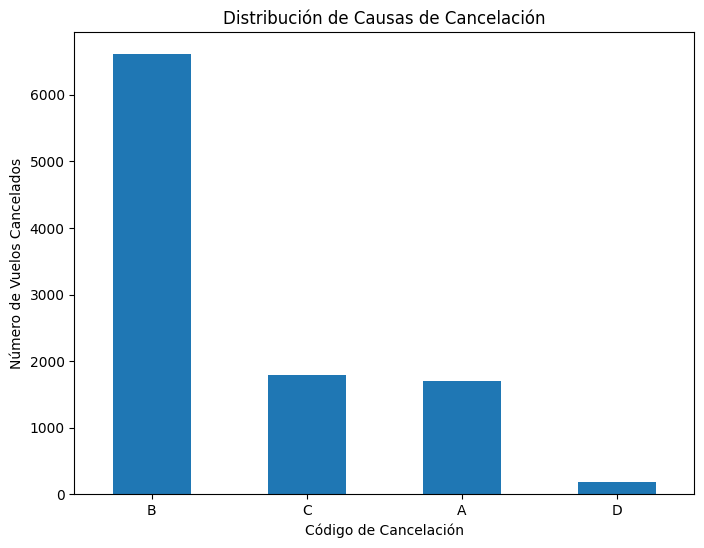


Recordatorio de la interpretación de los códigos de cancelación:
- 'A': Aerolínea
- 'B': Clima
- 'C': Sistema Nacional del Espacio Aéreo (NAS)
- 'D': Seguridad


In [ ]:
import matplotlib.pyplot as plt # Importar matplotlib.pyplot
import pandas as pd # Asegurarse de que pandas también está importado

print("Analizando las causas de cancelación para vuelos cancelados:")

# Filtrar el DataFrame para incluir solo los vuelos cancelados
cancelled_flights = flights[flights['CANCELLED'] == 1].copy()

# Verificar que el subconjunto no esté vacío
if not cancelled_flights.empty:

    print(f"\nNúmero total de vuelos cancelados: {len(cancelled_flights)}")

    # Obtener el conteo de cada código de cancelación para los vuelos cancelados
    cancellation_cause_counts = cancelled_flights['CANCELLATION_CODE'].value_counts(dropna=False)

    print("\nDistribución de las causas de cancelación (CANCELLATION_CODE) para vuelos cancelados:")
    display(cancellation_cause_counts)

    # Calcular el porcentaje de cada causa respecto al total de vuelos cancelados
    total_cancelled = len(cancelled_flights)
    cancellation_cause_percentages = (cancellation_cause_counts / total_cancelled) * 100

    print("\nPorcentaje de cada causa respecto al total de vuelos cancelados:")
    display(cancellation_cause_percentages)

    # Opcional: Visualizar la distribución de las causas de cancelación
    plt.figure(figsize=(8, 6))
    # Ordenar las barras por el conteo en orden descendente
    cancellation_cause_counts.sort_values(ascending=False).plot(kind='bar')
    plt.title('Distribución de Causas de Cancelación')
    plt.xlabel('Código de Cancelación')
    plt.ylabel('Número de Vuelos Cancelados')
    plt.xticks(rotation=0) # Mantener las etiquetas horizontales
    plt.show()

    # Recordatorio de la interpretación de los códigos:
    print("\nRecordatorio de la interpretación de los códigos de cancelación:")
    print("- 'A': Aerolínea")
    print("- 'B': Clima")
    print("- 'C': Sistema Nacional del Espacio Aéreo (NAS)")
    print("- 'D': Seguridad")
    # Notamos que 'Z' no debería aparecer aquí si el filtro CANCELLED == 1 es correcto.

else:
    print("No se encontraron vuelos cancelados en el DataFrame.")

Analizaremos las causas de retraso para los vuelos que no fueron cancelados ni desviados, pero que llegaron con retraso (`ARR_DELAY > 0`).

Analizando las causas de retraso para vuelos retrasados (no cancelados ni desviados):

Número total de vuelos retrasados (no cancelados ni desviados): 202575

Estadísticas descriptivas de las columnas de causas de retraso para vuelos retrasados:


DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
count      116713.000000      116713.000000  116713.000000   
mean           24.509343           4.383968      14.648488   
std            73.732581          38.069314      32.531918   
min             0.000000           0.000000       0.000000   
25%             0.000000           0.000000       0.000000   
50%             3.000000           0.000000       1.000000   
75%            23.000000           0.000000      18.000000   
max          3024.000000        1653.000000    1343.000000   

       DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  
count       116713.000000            116713.000000      202575.000000  
mean             0.146248                25.755743           2.772020  
std              2.895832                57.507827           4.136294  
min              0.000000                 0.000000           0.000000  
25%              0.000000                 0.000000           0.000000  
50%              0.000000                 0.000000           0.000000  
75%              0.000000                29.000000           5.000000  
max            234.000000              2027.000000          14.000000


Total de minutos de retraso atribuidos a cada causa para vuelos retrasados:


DELAY_DUE_LATE_AIRCRAFT    3006030.0
DELAY_DUE_CARRIER          2860559.0
DELAY_DUE_NAS              1709669.0
DELAY_DUE_UNKNOWN           561542.0
DELAY_DUE_WEATHER           511666.0
DELAY_DUE_SECURITY           17069.0
dtype: float64


Número de vuelos afectados por cada causa (retraso > 0 en la causa) para vuelos retrasados:


DELAY_DUE_UNKNOWN          85862
DELAY_DUE_CARRIER          63154
DELAY_DUE_NAS              59712
DELAY_DUE_LATE_AIRCRAFT    54083
DELAY_DUE_WEATHER           6507
DELAY_DUE_SECURITY           626
dtype: int64

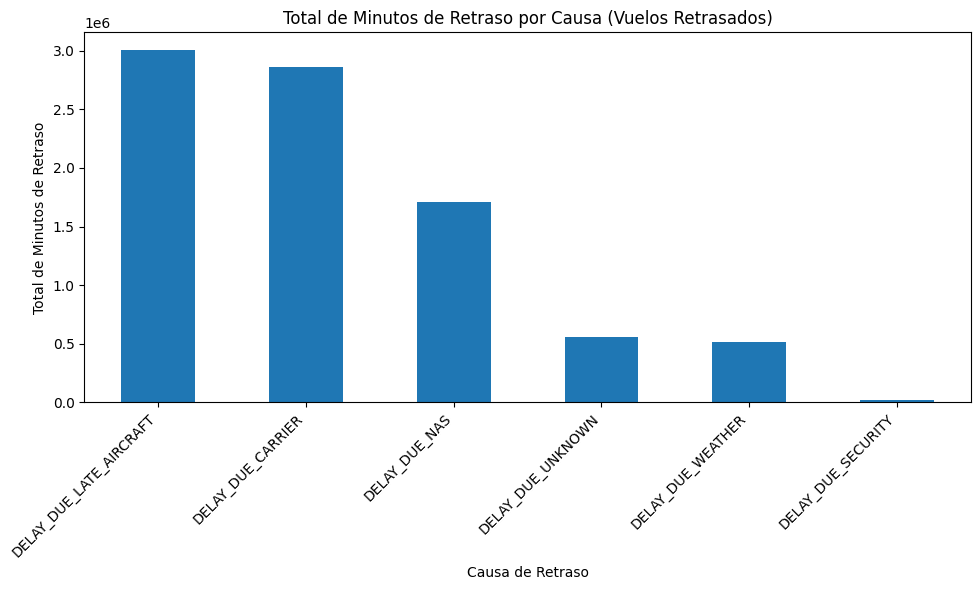

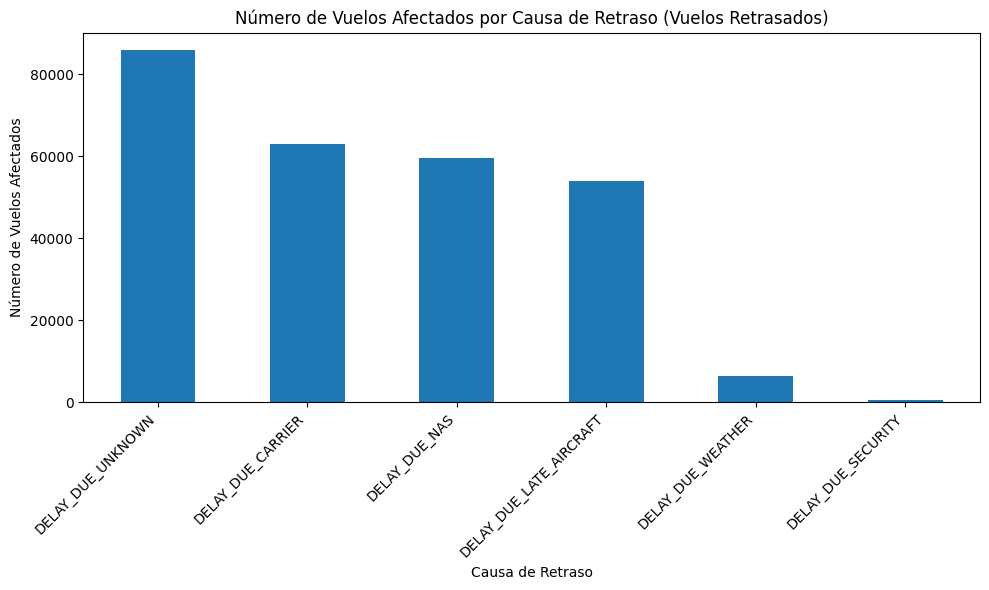

In [ ]:
print("Analizando las causas de retraso para vuelos retrasados (no cancelados ni desviados):")

# Filtrar el DataFrame para incluir solo vuelos operados, no desviados y que llegaron retrasados
delayed_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0) & (flights['ARR_DELAY'] > 0)].copy()

# Verificar que el subconjunto no esté vacío
if not delayed_flights.empty:

    print(f"\nNúmero total de vuelos retrasados (no cancelados ni desviados): {len(delayed_flights)}")

    # Columnas de causas de retraso (incluyendo la que creamos)
    delay_cause_columns = [
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN'
    ]

    # Mostrar estadísticas descriptivas para estas columnas en el subconjunto de vuelos retrasados
    print("\nEstadísticas descriptivas de las columnas de causas de retraso para vuelos retrasados:")
    display(delayed_flights[delay_cause_columns].describe())

    # Calcular el total de minutos de retraso atribuidos a cada causa
    print("\nTotal de minutos de retraso atribuidos a cada causa para vuelos retrasados:")
    total_delay_minutes_by_cause = delayed_flights[delay_cause_columns].sum().sort_values(ascending=False)
    display(total_delay_minutes_by_cause)

    # Calcular el número de vuelos afectados por cada causa (donde el retraso por esa causa > 0)
    print("\nNúmero de vuelos afectados por cada causa (retraso > 0 en la causa) para vuelos retrasados:")
    flights_affected_by_cause = {}
    for col in delay_cause_columns:
        flights_affected_by_cause[col] = (delayed_flights[col] > 0).sum()

    display(pd.Series(flights_affected_by_cause).sort_values(ascending=False))

    # Opcional: Visualizar la distribución del total de minutos de retraso por causa
    plt.figure(figsize=(10, 6))
    total_delay_minutes_by_cause.plot(kind='bar')
    plt.title('Total de Minutos de Retraso por Causa (Vuelos Retrasados)')
    plt.xlabel('Causa de Retraso')
    plt.ylabel('Total de Minutos de Retraso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Opcional: Visualizar el número de vuelos afectados por causa
    plt.figure(figsize=(10, 6))
    pd.Series(flights_affected_by_cause).sort_values(ascending=False).plot(kind='bar')
    plt.title('Número de Vuelos Afectados por Causa de Retraso (Vuelos Retrasados)')
    plt.xlabel('Causa de Retraso')
    plt.ylabel('Número de Vuelos Afectados')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("No se encontraron vuelos retrasados (no cancelados ni desviados) en el DataFrame.")

In [ ]:
print("Agrupando datos por la variable AIRLINE_CODE (Aerolínea) y calculando métricas clave:")

# Agrupar por la columna AIRLINE_CODE
grouped_by_airline = flights.groupby('AIRLINE_CODE')

# 1. Conteo total de vuelos por aerolínea
print("\nConteo total de vuelos por Aerolínea:")
flight_count_by_airline = grouped_by_airline.size().sort_values(ascending=False)
display(flight_count_by_airline)

# 2. Porcentaje de vuelos por aerolínea respecto al total
total_flights = len(flights)
flight_percentage_by_airline = (flight_count_by_airline / total_flights) * 100
print("\nPorcentaje de vuelos por Aerolínea respecto al total:")
display(flight_percentage_by_airline)


# Seleccionar columnas numéricas relevantes para calcular la media por aerolínea
# Excluimos indicadores binarios y componentes de fecha/hora en formato hhmm si no queremos su promedio directo
numerical_cols_for_mean = [
    'DEP_DELAY',
    'ARR_DELAY',
    'TAXI_OUT',
    'TAXI_IN',
    'AIR_TIME',
    'DISTANCE',
    'ELAPSED_TIME',
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]

# 3. Media de métricas numéricas clave por aerolínea
print("\nMedia de métricas numéricas clave por Aerolínea:")
# Usamos .mean() en el grupo para calcular la media de las columnas seleccionadas
mean_metrics_by_airline = grouped_by_airline[numerical_cols_for_mean].mean()
display(mean_metrics_by_airline.sort_values(by='ARR_DELAY', ascending=False)) # Ordenar por retraso de llegada promedio


# 4. Conteo de vuelos cancelados y desviados por aerolínea
print("\nConteo de vuelos cancelados y desviados por Aerolínea:")
cancelled_by_airline = grouped_by_airline['CANCELLED'].sum().sort_values(ascending=False)
diverted_by_airline = grouped_by_airline['DIVERTED'].sum().sort_values(ascending=False)
display(pd.DataFrame({
    'Cancelados': cancelled_by_airline,
    'Desviados': diverted_by_airline
}))

# 5. Porcentaje de vuelos cancelados y desviados por aerolínea (respecto al total de vuelos de esa aerolínea)
print("\nPorcentaje de vuelos cancelados y desviados por Aerolínea (respecto al total de vuelos de la aerolínea):")
percentage_cancelled_by_airline = (cancelled_by_airline / flight_count_by_airline) * 100
percentage_diverted_by_airline = (diverted_by_airline / flight_count_by_airline) * 100
display(pd.DataFrame({
    'Porcentaje Cancelados': percentage_cancelled_by_airline,
    'Porcentaje Desviados': percentage_diverted_by_airline
}).sort_values(by='Porcentaje Cancelados', ascending=False))


# Opcional: Conteo de vuelos retrasados a la llegada por aerolínea (ARR_DELAY > 0)
print("\nConteo de vuelos retrasados a la llegada por Aerolínea (ARR_DELAY > 0):")
# Filtramos el dataframe original para vuelos retrasados y luego contamos por aerolínea
delayed_flights_only = flights[flights['ARR_DELAY'] > 0]
delayed_count_by_airline = delayed_flights_only.groupby('AIRLINE_CODE').size().reindex(flight_count_by_airline.index, fill_value=0) # Usar reindex para incluir aerolíneas sin retrasos
display(delayed_count_by_airline.sort_values(ascending=False))

# Opcional: Porcentaje de vuelos retrasados a la llegada por aerolínea (respecto al total de vuelos de esa aerolínea)
print("\nPorcentaje de vuelos retrasados a la llegada por Aerolínea (respecto al total de vuelos de la aerolínea):")
percentage_delayed_by_airline = (delayed_count_by_airline / flight_count_by_airline) * 100
display(percentage_delayed_by_airline.sort_values(ascending=False))

Agrupando datos por la variable AIRLINE_CODE (Aerolínea) y calculando métricas clave:

Conteo total de vuelos por Aerolínea:


AIRLINE_CODE
WN    112430
DL     75174
AA     74999
UA     56657
OO     50347
YX     24476
B6     23249
NK     21876
AS     19801
MQ     18849
9E     16926
OH     15456
F9     13285
G4      8615
HA      6697
dtype: int64


Porcentaje de vuelos por Aerolínea respecto al total:


AIRLINE_CODE
WN    20.865308
DL    13.951158
AA    13.918680
UA    10.514683
OO     9.343642
YX     4.542376
B6     4.314663
NK     4.059855
AS     3.674766
MQ     3.498089
9E     3.141210
OH     2.868400
F9     2.465495
G4     1.598814
HA     1.242862
dtype: float64


Media de métricas numéricas clave por Aerolínea:


DEP_DELAY  ARR_DELAY   TAXI_OUT    TAXI_IN    AIR_TIME  \
AIRLINE_CODE                                                           
F9            26.052259  21.108980  18.643808  11.579091  138.767618   
G4            17.502411  15.802548  15.979889   7.403271  125.954117   
NK            18.594974  13.895166  16.223595  10.310166  134.184935   
OO            13.803616  11.114660  21.349505   7.863443   75.221506   
AA            14.610332  10.787078  18.828849   8.759463  131.580540   
B6            16.881086  10.552137  19.391301   8.604157  151.774393   
HA             8.987779   9.131046  12.677283   8.869677  115.264510   
UA            14.085232   8.315693  20.502427   8.891936  148.932944   
MQ             8.646694   7.322892  19.604202   8.639577   80.418499   
9E            12.109174   7.204544  22.051669   8.203526   66.841979   
DL            13.355143   6.402558  18.338057   8.289618  129.178570   
WN            12.058112   4.911660  13.676425   5.514186   99.150277   
AS             6.375320   3.266104  20.315099   8.079460  177.791257   
OH             4.904915   0.561161  22.052860   7.884671   67.971052   
YX             4.015341  -1.621689  22.357588   9.890655   80.866980   

                 DISTANCE  ELAPSED_TIME  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  \
AIRLINE_CODE                                                                    
F9            1025.177493    168.987527          10.293304           1.021607   
G4             917.534185    149.319061           7.689745           3.729663   
NK             986.350293    160.695897           7.476048           0.513827   
OO             476.589270    104.401670          10.275531           4.165836   
AA             963.093508    159.164920           7.152314           0.905311   
B6            1112.201901    179.754852           9.549248           0.174704   
HA             886.329700    136.797007           9.312631           0.540915   
UA            1124.018056    178.322288           5.896210           0.575699   
MQ             518.466868    108.649004           3.340109           1.606861   
9E             405.497400     97.093106           5.407264           2.009284   
DL             955.272780    155.797847           7.863743           1.335916   
WN             700.594201    118.334957           4.023409           0.268235   
AS            1356.813797    206.161784           3.594843           0.467214   
OH             408.963056     97.906363           3.085249           0.933189   
YX             493.852999    113.120047           2.128118           0.607563   

              DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
AIRLINE_CODE                                                               
F9                 6.594732            0.000000                13.043036   
G4                 6.394494            0.029043                 9.037027   
NK                 9.157703            0.162493                 6.268427   
OO                 1.072093            0.102644                 5.017827   
AA                 4.685822            0.057256                 8.226537   
B6                 4.847834            0.100045                 8.402928   
HA                 0.484683            0.013009                 4.959295   
UA                 4.677267            0.001153                 7.861138   
MQ                 5.152421            0.020391                 5.592562   
9E                 4.399607            0.005692                 6.751914   
DL                 3.197478            0.010789                 4.905032   
WN                 2.190453            0.018568                 7.020345   
AS                 3.983283            0.046203                 4.927518   
OH                 2.851597            0.016274                 5.007390   
YX                 4.821573            0.002834                 3.813676   

              DELAY_DUE_UNKNOWN  
AIRLINE_CODE                     
F9                     1.089876  
G4              


Conteo de vuelos cancelados y desviados por Aerolínea:


Cancelados  Desviados
AIRLINE_CODE                       
9E                   249         40
AA                  1417        128
AS                   280        100
B6                   194         77
DL                   586        169
F9                   438         19
G4                   115         22
HA                    72          9
MQ                   482         42
NK                   507         21
OH                   250         41
OO                  1670        299
UA                   415        140
WN                  3234        197
YX                   386         41


Porcentaje de vuelos cancelados y desviados por Aerolínea (respecto al total de vuelos de la aerolínea):


Porcentaje Cancelados  Porcentaje Desviados
AIRLINE_CODE                                             
OO                         3.316980              0.593878
F9                         3.296951              0.143018
WN                         2.876456              0.175220
MQ                         2.557165              0.222823
NK                         2.317608              0.095996
AA                         1.889359              0.170669
OH                         1.617495              0.265269
YX                         1.577055              0.167511
9E                         1.471110              0.236323
AS                         1.414070              0.505025
G4                         1.334881              0.255369
HA                         1.075108              0.134389
B6                         0.834444              0.331197
DL                         0.779525              0.224812
UA                         0.732478              0.247101


Conteo de vuelos retrasados a la llegada por Aerolínea (ARR_DELAY > 0):


AIRLINE_CODE
WN    40279
AA    29391
DL    26647
UA    21920
OO    19391
NK     9715
B6     9322
AS     7701
MQ     7528
YX     6902
F9     6590
9E     5743
OH     4280
G4     3762
HA     3404
dtype: int64


Porcentaje de vuelos retrasados a la llegada por Aerolínea (respecto al total de vuelos de la aerolínea):


AIRLINE_CODE
HA    50.828729
F9    49.604817
NK    44.409398
G4    43.668021
B6    40.096348
MQ    39.938458
AA    39.188523
AS    38.891975
UA    38.688953
OO    38.514708
WN    35.825847
DL    35.447096
9E    33.930048
YX    28.199052
OH    27.691511
dtype: float64

Agruparemos datos por la variable de Aeropuerto (ORIGIN y DEST) y calcularemos métricas clave.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Agrupando datos por la variable de Aeropuerto (ORIGIN y DEST) y calculando métricas clave:")

# --- Métricas por Aeropuerto de Origen (ORIGIN) ---
print("\n--- Métricas por Aeropuerto de Origen (ORIGIN) ---")

# Agrupar por la columna ORIGIN, especificando observed=True
grouped_by_origin = flights.groupby('ORIGIN', observed=True)

# 1. Conteo total de vuelos de salida por aeropuerto de origen
print("\nConteo total de vuelos de salida por Aeropuerto de Origen:")
origin_flight_count = grouped_by_origin.size().sort_values(ascending=False)
display(origin_flight_count.head(10)) # Mostrar top 10

# 2. Media de métricas numéricas clave por aeropuerto de origen
print("\nMedia de métricas numéricas clave por Aeropuerto de Origen:")
# Seleccionar columnas numéricas relevantes
numerical_cols_for_mean_origin = [
    'DEP_DELAY',
    'TAXI_OUT',
    'CANCELLED', # Incluir aquí para ver la tasa de cancelación por origen
    'DIVERTED', # Incluir aquí para ver la tasa de desvío por origen (aunque desvío es a destino)
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]
origin_mean_metrics = grouped_by_origin[numerical_cols_for_mean_origin].mean()
# Calcular porcentaje de cancelados/desviados multiplicando la media por 100
origin_mean_metrics['CANCELLED_PERCENTAGE'] = origin_mean_metrics['CANCELLED'] * 100
origin_mean_metrics['DIVERTED_PERCENTAGE'] = origin_mean_metrics['DIVERTED'] * 100
display(origin_mean_metrics[['DEP_DELAY', 'TAXI_OUT', 'CANCELLED_PERCENTAGE', 'DIVERTED_PERCENTAGE']].sort_values(by='DEP_DELAY', ascending=False).head(10)) # Mostrar top 10 por retraso salida

# 3. Conteo de vuelos retrasados en salida por aeropuerto de origen (DEP_DELAY > 0)
print("\nConteo de vuelos retrasados en salida por Aeropuerto de Origen (DEP_DELAY > 0):")
# Filtramos el dataframe original para vuelos retrasados en salida
delayed_departure_flights = flights[flights['DEP_DELAY'] > 0]
# Agrupar por ORIGIN, especificando observed=True
origin_delayed_count = delayed_departure_flights.groupby('ORIGIN', observed=True).size().reindex(origin_flight_count.index, fill_value=0)
display(origin_delayed_count.sort_values(ascending=False).head(10))

# 4. Porcentaje de vuelos retrasados en salida por aeropuerto de origen
print("\nPorcentaje de vuelos retrasados en salida por Aeropuerto de Origen (respecto a vuelos de salida):")
origin_delayed_percentage = (origin_delayed_count / origin_flight_count) * 100
display(origin_delayed_percentage.sort_values(ascending=False).head(10))


# --- Métricas por Aeropuerto de Destino (DEST) ---
print("\n--- Métricas por Aeropuerto de Destino (DEST) ---")

# Agrupar por la columna DEST, especificando observed=True
grouped_by_dest = flights.groupby('DEST', observed=True)

# 1. Conteo total de vuelos de llegada por aeropuerto de destino
print("\nConteo total de vuelos de llegada por Aeropuerto de Destino:")
dest_flight_count = grouped_by_dest.size().sort_values(ascending=False)
display(dest_flight_count.head(10)) # Mostrar top 10

# 2. Media de métricas numéricas clave por aeropuerto de destino
print("\nMedia de métricas numéricas clave por Aeropuerto de Destino:")
# Seleccionar columnas numéricas relevantes. ARR_DELAY y TAXI_IN son más relevantes para destino.
numerical_cols_for_mean_dest = [
    'ARR_DELAY',
    'TAXI_IN',
    # Cancelled/Diverted ya se consideró por origen, pero podemos ver la tasa de desvío a este destino
    'DIVERTED', # Tasa de vuelos desviados que llegan a este aeropuerto
    'DELAY_DUE_CARRIER', # Causas de retraso a la llegada
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]
dest_mean_metrics = grouped_by_dest[numerical_cols_for_mean_dest].mean()
dest_mean_metrics['DIVERTED_PERCENTAGE'] = dest_mean_metrics['DIVERTED'] * 100
display(dest_mean_metrics[['ARR_DELAY', 'TAXI_IN', 'DIVERTED_PERCENTAGE']].sort_values(by='ARR_DELAY', ascending=False).head(10)) # Mostrar top 10 por retraso llegada

# 3. Conteo de vuelos retrasados a llegada por aeropuerto de destino (ARR_DELAY > 0)
print("\nConteo de vuelos retrasados a la llegada por Aeropuerto de Destino (ARR_DELAY > 0):")
# Filtramos el dataframe original para vuelos retrasados a la llegada
delayed_arrival_flights = flights[flights['ARR_DELAY'] > 0]
# Agrupar por DEST, especificando observed=True
dest_delayed_count = delayed_arrival_flights.groupby('DEST', observed=True).size().reindex(dest_flight_count.index, fill_value=0)
display(dest_delayed_count.sort_values(ascending=False).head(10))

# 4. Porcentaje de vuelos retrasados a llegada por aeropuerto de destino
print("\nPorcentaje de vuelos retrasados a la llegada por Aeropuerto de Destino (respecto a vuelos de llegada):")
dest_delayed_percentage = (dest_delayed_count / dest_flight_count) * 100
display(dest_delayed_percentage.sort_values(ascending=False).head(10))

print("\nAnálisis por aeropuerto completado.")

Agrupando datos por la variable de Aeropuerto (ORIGIN y DEST) y calculando métricas clave:

--- Métricas por Aeropuerto de Origen (ORIGIN) ---

Conteo total de vuelos de salida por Aeropuerto de Origen:


ORIGIN
ATL    26582
DEN    22460
DFW    20502
ORD    20086
LAS    15792
LAX    15424
CLT    15170
PHX    14613
LGA    13479
MCO    13333
dtype: int64


Media de métricas numéricas clave por Aeropuerto de Origen:


DEP_DELAY   TAXI_OUT  CANCELLED_PERCENTAGE  DIVERTED_PERCENTAGE
ORIGIN                                                                 
RIW     66.033333  31.133333              3.225806             3.225806
PLN     60.693878  18.775510              5.769231             1.923077
OTH     51.294118  12.058824              5.555556             0.000000
CKB     44.200000   9.400000              0.000000             0.000000
PRC     44.166667  24.116667              1.639344             1.639344
JAC     44.151697  27.745491              2.156863             2.549020
BIH     39.833333  14.229167              5.882353             1.960784
XWA     39.488889  35.100000             15.887850             1.869159
LBF     39.188406  27.855072             16.867470             0.000000
ESC     39.120690  20.620690              4.918033             3.278689


Conteo de vuelos retrasados en salida por Aeropuerto de Origen (DEP_DELAY > 0):


ORIGIN
DEN    12481
ATL    10783
ORD     7971
LAS     7283
DFW     6712
MCO     6192
PHX     5976
LAX     5731
CLT     5220
EWR     4901
dtype: int64


Porcentaje de vuelos retrasados en salida por Aeropuerto de Origen (respecto a vuelos de salida):


ORIGIN
PPG    81.818182
IAG    75.000000
OTH    72.222222
PBG    63.888889
PSM    63.157895
HTS    62.962963
JAC    60.588235
CKB    60.000000
SCK    56.521739
BQN    55.813953
dtype: float64


--- Métricas por Aeropuerto de Destino (DEST) ---

Conteo total de vuelos de llegada por Aeropuerto de Destino:


DEST
ATL    26566
DEN    22461
DFW    20521
ORD    20092
LAS    15793
LAX    15428
CLT    15167
PHX    14620
LGA    13481
MCO    13327
dtype: int64


Media de métricas numéricas clave por Aeropuerto de Destino:


ARR_DELAY    TAXI_IN  DIVERTED_PERCENTAGE
DEST                                           
PVU   41.761905   6.367347             0.595238
GFK   36.818966   4.948276             0.000000
CMX   33.685185   5.200000             1.639344
LBF   32.739130   6.231884             4.819277
OTH   32.294118   4.352941             0.000000
ASE   31.145805  10.821862             6.884876
PGD   30.746789   7.579817             0.000000
SWF   30.490566   6.849057             0.000000
PPG   29.454545  13.000000             0.000000
XWA   28.727273   9.155556             3.738318


Conteo de vuelos retrasados a la llegada por Aeropuerto de Destino (ARR_DELAY > 0):


DEST
ATL    8773
DEN    8758
DFW    7544
ORD    7506
LAS    6591
LAX    6258
PHX    5725
CLT    5569
MCO    5361
LGA    5067
dtype: int64


Porcentaje de vuelos retrasados a la llegada por Aeropuerto de Destino (respecto a vuelos de llegada):


DEST
PPG    72.727273
LNK    67.857143
OTH    66.666667
FNT    60.759494
LBE    58.064516
PVU    56.547619
PGD    55.978261
RDD    54.255319
PSE    53.947368
ASE    52.821670
dtype: float64


Análisis por aeropuerto completado.


In [ ]:
import pandas as pd
import numpy as np

print("Agrupando datos por Ruta (ORIGIN y DEST) y calculando métricas clave:")

# Agrupar por las columnas ORIGIN y DEST juntas para definir la ruta
# Especificamos observed=True ya que las columnas son categóricas
grouped_by_route = flights.groupby(['ORIGIN', 'DEST'], observed=True)

# 1. Conteo total de vuelos por ruta
print("\nConteo total de vuelos por Ruta:")
route_flight_count = grouped_by_route.size().sort_values(ascending=False)
display(route_flight_count.head(10)) # Mostrar top 10 rutas con más vuelos

# 2. Media de métricas numéricas clave por ruta
print("\nMedia de métricas numéricas clave por Ruta:")
# Seleccionar columnas numéricas relevantes para análisis a nivel de ruta
numerical_cols_for_mean_route = [
    'DEP_DELAY',
    'ARR_DELAY',
    'TAXI_OUT',
    'TAXI_IN',
    'AIR_TIME',
    'DISTANCE',
    'ELAPSED_TIME',
    'CRS_ELAPSED_TIME', # Incluir tiempo programado para comparar con tiempo real
    'CANCELLED',
    'DIVERTED',
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]

# Calcular la media de estas columnas para cada ruta
mean_metrics_by_route = grouped_by_route[numerical_cols_for_mean_route].mean()

# Calcular porcentajes de cancelados/desviados por ruta
mean_metrics_by_route['CANCELLED_PERCENTAGE'] = mean_metrics_by_route['CANCELLED'] * 100
mean_metrics_by_route['DIVERTED_PERCENTAGE'] = mean_metrics_by_route['DIVERTED'] * 100

# Añadir el conteo de vuelos por ruta a la tabla de métricas para referencia
mean_metrics_by_route['FLIGHT_COUNT'] = route_flight_count

# Mostrar las métricas ordenadas por retraso promedio a la llegada
print("\nMétricas clave por Ruta (ordenado por ARR_DELAY promedio - Top 10):")
display(mean_metrics_by_route.sort_values(by='ARR_DELAY', ascending=False).head(10))

# Mostrar las métricas ordenadas por porcentaje de cancelación
print("\nMétricas clave por Ruta (ordenado por Porcentaje de Cancelados - Top 10):")
display(mean_metrics_by_route.sort_values(by='CANCELLED_PERCENTAGE', ascending=False).head(10))

# Mostrar las métricas ordenadas por tiempo promedio de TAXI_OUT
print("\nMétricas clave por Ruta (ordenado por TAXI_OUT promedio - Top 10):")
display(mean_metrics_by_route.sort_values(by='TAXI_OUT', ascending=False).head(10))

# Mostrar las métricas ordenadas por tiempo promedio de TAXI_IN
print("\nMétricas clave por Ruta (ordenado por TAXI_IN promedio - Top 10):")
display(mean_metrics_by_route.sort_values(by='TAXI_IN', ascending=False).head(10))

print("\nAnálisis por ruta completado.")

# Opcional: Guardar el resultado del análisis por ruta
# route_metrics_save_path = '/content/route_metrics.csv'
# mean_metrics_by_route.to_csv(route_metrics_save_path)
# print(f"\nMétricas por ruta guardadas en: {route_metrics_save_path}")

Agrupando datos por Ruta (ORIGIN y DEST) y calculando métricas clave:

Conteo total de vuelos por Ruta:


ORIGIN  DEST
HNL     OGG     1039
OGG     HNL     1039
LAX     LAS      965
LAS     LAX      962
BOS     DCA      918
DCA     BOS      917
LAX     SFO      900
SFO     LAX      886
LGA     ORD      880
ORD     LGA      879
dtype: int64


Media de métricas numéricas clave por Ruta:

Métricas clave por Ruta (ordenado por ARR_DELAY promedio - Top 10):


DEP_DELAY    ARR_DELAY   TAXI_OUT    TAXI_IN    AIR_TIME  \
ORIGIN DEST                                                             
BOS    VPS      1503.0  1525.000000  13.000000   6.000000  197.000000   
VPS    BOS      1504.0  1496.000000   5.000000   9.000000  156.000000   
MTJ    LGA      1183.0  1181.000000  28.000000   4.000000  213.000000   
BTR    IAH       442.0   431.666667  18.333333   6.333333   49.333333   
AUS    TYS       386.0   384.000000  12.000000   5.000000  110.000000   
ONT    MCO       363.0   370.666667  20.666667  15.333333  255.666667   
IAH    BTR       361.5   358.750000  21.500000   4.750000   42.000000   
ANC    DFW       314.0   329.500000  22.500000   9.500000  378.500000   
FLL    PIE       306.0   321.000000  37.000000   4.000000   34.000000   
LGA    MTJ       359.0   319.000000  16.000000   3.000000  254.000000   

             DISTANCE  ELAPSED_TIME  CRS_ELAPSED_TIME  CANCELLED  DIVERTED  \
ORIGIN DEST                                                                  
BOS    VPS     1187.0    216.000000            194.00       0.00       0.0   
VPS    BOS     1187.0    170.000000            178.00       0.00       0.0   
MTJ    LGA     1810.0    245.000000            247.00       0.00       0.0   
BTR    IAH      253.0     74.000000             84.75       0.25       0.0   
AUS    TYS      882.0    127.000000            129.00       0.00       0.0   
ONT    MCO     2171.0    291.666667            284.00       0.00       0.0   
IAH    BTR      253.0     68.250000             71.00       0.00       0.0   
ANC    DFW     3043.0    410.500000            395.00       0.00       0.0   
FLL    PIE      201.0     75.000000             60.00       0.00       0.0   
LGA    MTJ     1810.0    273.000000            313.00       0.00       0.0   

             DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
ORIGIN DEST                                                        
BOS    VPS               64.00                0.0          22.00   
VPS    BOS                0.00             1496.0           0.00   
MTJ    LGA              903.00                0.0           0.00   
BTR    IAH               14.75                0.0           0.50   
AUS    TYS                0.00              384.0           0.00   
ONT    MCO              353.00                0.0          12.00   
IAH    BTR               26.00                0.0           4.25   
ANC    DFW              494.00                0.0          25.00   
FLL    PIE                0.00              306.0          15.00   
LGA    MTJ              319.00                0.0           0.00   

             DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  \
ORIGIN DEST                                                                   
BOS    VPS                  0.0              1439.000000                0.0   
VPS    BOS                  0.0                 0.000000                0.0   
MTJ    LGA                  0.0               278.000000                0.0   
BTR    IAH                  0.0               308.500000                0.0   
AUS    TYS                  0.0                 0.000000                0.0   
ONT    MCO                  0.0                 5.666667                0.0   
IAH    BTR                  0.0               328.500000                0.0   
ANC    DFW                  0.0               130.000000                5.0   
FLL    PIE                  0.0                 0.000000                0.0   
LGA    MTJ                  0.0                 0.000000                0.0   

             CANCELLED_PERCENTAGE  DIVERTED_PERCENTAGE  FLIGHT_COUNT  
ORIGIN DEST                                                           
BOS    VPS                    0.0                  0.0             1  
VPS    BOS                    0.0                  0.0             1  
MTJ    LGA                    0.0                  0.0             1  
BTR    IAH                   25.0                  0.0             4  
AUS    


Métricas clave por Ruta (ordenado por Porcentaje de Cancelados - Top 10):


DEP_DELAY  ARR_DELAY   TAXI_OUT   TAXI_IN    AIR_TIME  DISTANCE  \
ORIGIN DEST                                                                    
GRB    DEN         NaN        NaN        NaN       NaN         NaN     905.0   
DEN    GRB         NaN        NaN        NaN       NaN         NaN     905.0   
FSD    SNA         NaN        NaN        NaN       NaN         NaN    1326.0   
BWI    ABQ         NaN        NaN        NaN       NaN         NaN    1670.0   
SNA    FSD         NaN        NaN        NaN       NaN         NaN    1326.0   
CNY    SLC         NaN        NaN        NaN       NaN         NaN     183.0   
DEN    COD   14.000000   1.500000  16.500000  4.500000   63.500000     391.0   
COD    DEN    5.500000   5.500000  16.500000  8.500000   68.000000     391.0   
ASE    PHX   18.391304  10.869565  18.913043  6.304348   84.260870     491.0   
HDN    SFO   18.333333   7.333333  20.666667  5.666667  133.666667     838.0   

             ELAPSED_TIME  CRS_ELAPSED_TIME  CANCELLED  DIVERTED  \
ORIGIN DEST                                                        
GRB    DEN            NaN        180.000000   1.000000       0.0   
DEN    GRB            NaN        160.000000   1.000000       0.0   
FSD    SNA            NaN        229.000000   1.000000       0.0   
BWI    ABQ            NaN        270.000000   1.000000       0.0   
SNA    FSD            NaN        179.000000   1.000000       0.0   
CNY    SLC            NaN         52.000000   1.000000       0.0   
DEN    COD      84.500000         97.000000   0.333333       0.0   
COD    DEN      93.000000         93.000000   0.333333       0.0   
ASE    PHX     109.478261        117.032258   0.258065       0.0   
HDN    SFO     160.000000        171.000000   0.250000       0.0   

             DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
ORIGIN DEST                                                        
GRB    DEN            0.000000           0.000000            0.0   
DEN    GRB            0.000000           0.000000            0.0   
FSD    SNA            0.000000           0.000000            0.0   
BWI    ABQ            0.000000           0.000000            0.0   
SNA    FSD            0.000000           0.000000            0.0   
CNY    SLC            0.000000           0.000000            0.0   
DEN    COD            0.000000           0.000000            0.0   
COD    DEN            0.000000           0.000000            0.0   
ASE    PHX            5.714286           9.214286            0.0   
HDN    SFO            0.000000           0.000000            0.0   

             DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  \
ORIGIN DEST                                                                   
GRB    DEN                  0.0                     0.00           0.000000   
DEN    GRB                  0.0                     0.00           0.000000   
FSD    SNA                  0.0                     0.00           0.000000   
BWI    ABQ                  0.0                     0.00           0.000000   
SNA    FSD                  0.0                     0.00           0.000000   
CNY    SLC                  0.0                     0.00           0.000000   
DEN    COD                  0.0                     0.00           2.333333   
COD    DEN                  0.0                     0.00           3.666667   
ASE    PHX                  0.0                     0.00           0.580645   
HDN    SFO                  0.0                    12.25           0.000000   

             CANCELLED_PERCENTAGE  DIVERTED_PERCENTAGE  FLIGHT_COUNT  
ORIGIN DEST                                                           
GRB    DEN             100.000000                  0.0             1  
DEN    GRB             100.000000                  0.0             1  
FSD    SNA             100.000000                  0.0             1  
BWI    ABQ             100.000000                  0.0             1  
SNA    FSD             100.000000          


Métricas clave por Ruta (ordenado por TAXI_OUT promedio - Top 10):


DEP_DELAY   ARR_DELAY   TAXI_OUT    TAXI_IN    AIR_TIME  \
ORIGIN DEST                                                            
FSD    AUS   -4.000000   92.000000  88.000000   7.000000  144.000000   
DEN    ALB   96.000000  131.000000  63.000000   4.000000  173.000000   
PBI    IAD   -3.666667   25.000000  46.333333   4.666667  120.666667   
ATW    LAS   71.222222   98.444444  45.222222   9.333333  212.000000   
       SFB   -3.222222   34.111111  45.000000   9.444444  154.555556   
EYW    IAD   -9.333333   15.333333  43.000000   8.666667  139.000000   
DCA    DAB  -12.000000  -22.000000  43.000000   3.000000  103.000000   
COS    HOU   59.000000  129.000000  42.000000   5.000000  153.000000   
ATW    FLL   20.222222   60.555556  41.444444  17.444444  179.444444   
ORD    RAP    2.000000    5.000000  40.666667   6.666667  119.666667   

             DISTANCE  ELAPSED_TIME  CRS_ELAPSED_TIME  CANCELLED  DIVERTED  \
ORIGIN DEST                                                                  
FSD    AUS      925.0    239.000000        143.000000        0.0       0.0   
DEN    ALB     1610.0    240.000000        205.000000        0.0       0.0   
PBI    IAD      859.0    171.666667        143.000000        0.0       0.0   
ATW    LAS     1510.0    266.555556        239.333333        0.0       0.0   
       SFB     1141.0    209.000000        171.666667        0.0       0.0   
EYW    IAD     1023.0    190.666667        166.000000        0.0       0.0   
DCA    DAB      705.0    149.000000        159.000000        0.0       0.0   
COS    HOU      829.0    200.000000        130.000000        0.0       0.0   
ATW    FLL     1338.0    238.333333        198.000000        0.0       0.0   
ORD    RAP      779.0    167.000000        164.000000        0.0       0.0   

             DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
ORIGIN DEST                                                        
FSD    AUS            0.000000           0.000000      92.000000   
DEN    ALB           76.000000           0.000000      35.000000   
PBI    IAD            0.000000           0.000000      58.000000   
ATW    LAS          103.833333           3.166667      36.166667   
       SFB            0.000000           0.571429      44.285714   
EYW    IAD            0.000000           0.000000      21.666667   
DCA    DAB            0.000000           0.000000       0.000000   
COS    HOU            4.000000           0.000000      70.000000   
ATW    FLL           10.625000           3.375000      53.375000   
ORD    RAP           12.000000           0.000000       0.000000   

             DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  \
ORIGIN DEST                                                                   
FSD    AUS                  0.0                      0.0           0.000000   
DEN    ALB                  0.0                     20.0           0.000000   
PBI    IAD                  0.0                      0.0           5.666667   
ATW    LAS                  0.0                      0.0           3.000000   
       SFB                  0.0                      0.0           0.888889   
EYW    IAD                  0.0                      0.0           0.000000   
DCA    DAB                  0.0                      0.0           0.000000   
COS    HOU                  0.0                     55.0           0.000000   
ATW    FLL                  0.0                      0.0           0.777778   
ORD    RAP                  0.0                      0.0           1.666667   

             CANCELLED_PERCENTAGE  DIVERTED_PERCENTAGE  FLIGHT_COUNT  
ORIGIN DEST                                                           
FSD    AUS                    0.0                  0.0             1  
DEN    ALB                    0.0                  0.0             1  
PBI    IAD                    0.0                  0.0             3  
ATW    LAS                    0.0                  0.0             9  
       SFB         


Métricas clave por Ruta (ordenado por TAXI_IN promedio - Top 10):


DEP_DELAY   ARR_DELAY   TAXI_OUT    TAXI_IN    AIR_TIME  \
ORIGIN DEST                                                             
FNT    JAX    -8.000000   77.000000  13.000000  95.000000  125.000000   
BOS    GRR     1.000000   72.000000  11.000000  83.000000  131.000000   
PIT    AUS     0.000000   23.000000   6.000000  44.000000  118.000000   
GRR    FLL     8.666667   45.333333  34.888889  37.555556  159.777778   
SJC    JAC    20.000000   35.500000  17.500000  32.500000  100.500000   
ILM    EWR    22.142857   35.428571  19.714286  30.714286   77.714286   
PIE    FSD   145.555556  169.777778  15.000000  28.555556  188.666667   
PGD    MDW    29.250000   49.125000  11.375000  28.500000  154.000000   
LBE    MCO    10.600000   12.266667  15.566667  27.900000  115.300000   
ORD    KOA     6.000000   13.250000  34.250000  26.750000  509.250000   

             DISTANCE  ELAPSED_TIME  CRS_ELAPSED_TIME  CANCELLED  DIVERTED  \
ORIGIN DEST                                                                  
FNT    JAX      867.0    233.000000        148.000000   0.000000       0.0   
BOS    GRR      740.0    225.000000        154.000000   0.000000       0.0   
PIT    AUS     1210.0    168.000000        145.000000   0.000000       0.0   
GRR    FLL     1198.0    232.222222        195.555556   0.000000       0.0   
SJC    JAC      729.0    150.500000        135.000000   0.000000       0.0   
ILM    EWR      488.0    128.142857        114.857143   0.000000       0.0   
PIE    FSD     1334.0    232.222222        208.000000   0.000000       0.0   
PGD    MDW     1076.0    193.875000        173.555556   0.111111       0.0   
LBE    MCO      823.0    158.766667        156.709677   0.032258       0.0   
ORD    KOA     4213.0    570.250000        563.000000   0.000000       0.0   

             DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
ORIGIN DEST                                                        
FNT    JAX            0.000000           0.000000      77.000000   
BOS    GRR            0.000000           1.000000      71.000000   
PIT    AUS            0.000000           0.000000      23.000000   
GRR    FLL           12.250000           0.000000      35.625000   
SJC    JAC            0.000000           0.000000      13.500000   
ILM    EWR            2.714286           0.000000      39.714286   
PIE    FSD           15.000000         236.333333       2.500000   
PGD    MDW           30.500000           2.875000      12.250000   
LBE    MCO            1.307692           0.000000      10.192308   
ORD    KOA            6.000000           0.000000      16.500000   

             DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  DELAY_DUE_UNKNOWN  \
ORIGIN DEST                                                                   
FNT    JAX                  0.0                 0.000000           0.000000   
BOS    GRR                  0.0                 0.000000           0.000000   
PIT    AUS                  0.0                 0.000000           0.000000   
GRR    FLL                  0.0                 3.000000           0.111111   
SJC    JAC                  0.0                22.000000           0.000000   
ILM    EWR                  0.0                 0.000000           0.000000   
PIE    FSD                  0.0                 0.000000           2.555556   
PGD    MDW                  0.0                 2.125000           1.222222   
LBE    MCO                  0.0                 9.153846           1.354839   
ORD    KOA                  0.0                 0.000000           2.000000   

             CANCELLED_PERCENTAGE  DIVERTED_PERCENTAGE  FLIGHT_COUNT  
ORIGIN DEST                                                           
FNT    JAX               0.000000                  0.0             1  
BOS    GRR               0.000000                  0.0             1  
PIT    AUS               0.000000                  0.0             1  
GRR    FLL               0.000000                  0.0             9  
SJC    J


Análisis por ruta completado.


## Analizar Variables categóricas

Crearemos un gráfico de barras para visualizar la distribución del estado del vuelo utilizando las funciones de plotting de pandas.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Creando gráfico de barras usando pandas plotting...")

# Recalcular el estado de llegada de los vuelos si la variable no está definida
# Esto asegura que la celda pueda ejecutarse de forma independiente
if 'flight_status_counts' not in globals():
    print("Recalculando el estado de llegada de los vuelos...")
    # Categorías:
    # 1. Cancelados (CANCELLED == 1)
    # 2. Desviados (DIVERTED == 1)
    # 3. Operados y No Desviados con ARR_DELAY <= 0 (A tiempo o antes)
    # 4. Operados y No Desviados con ARR_DELAY > 0 (Retrasados)
    # 5. Operados y No Desviados con ARR_DELAY nulo

    count_cancelled = len(flights[flights['CANCELLED'] == 1])
    count_diverted = len(flights[flights['DIVERTED'] == 1])

    # Vuelos que NO fueron cancelados Y NO fueron desviados
    non_cancelled_non_diverted = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)]

    # De los vuelos no cancelados y no desviados, contar los que tienen ARR_DELAY <= 0 y ARR_DELAY > 0
    # Asegurarnos de manejar los nulos en ARR_DELAY para estos subconjuntos si los hubiera (aunque ya los manejamos en limpieza)
    count_on_time_or_early = len(non_cancelled_non_diverted[non_cancelled_non_diverted['ARR_DELAY'].fillna(0) <= 0])
    count_delayed_arrival = len(non_cancelled_non_diverted[non_cancelled_non_diverted['ARR_DELAY'].fillna(0) > 0])

    # Vuelos no cancelados y no desviados con ARR_DELAY nulo (debería ser 0 o muy bajo después de nuestro manejo de nulos)
    count_arr_delay_null_operated = len(non_cancelled_non_diverted[non_cancelled_non_diverted['ARR_DELAY'].isnull()])

    # Crear la Serie flight_status_counts
    flight_status_counts = pd.Series({
        'Cancelados': count_cancelled,
        'Desviados': count_diverted,
        'A tiempo o antes': count_on_time_or_early,
        'Retrasados': count_delayed_arrival,
        'ARR_DELAY Nulo (Operados)': count_arr_delay_null_operated
    })


# Usar los conteos calculados (o recalculados)
# Asegurarnos de que la Serie flight_status_counts existe y no está vacía después del posible recalculo
if 'flight_status_counts' in globals() and not flight_status_counts.empty:

    # --- Eliminar la categoría 'ARR_DELAY Nulo (Operados)' si existe ANTES de ordenar y plotear ---
    if 'ARR_DELAY Nulo (Operados)' in flight_status_counts.index:
        flight_status_counts = flight_status_counts.drop('ARR_DELAY Nulo (Operados)')
        print("Categoría 'ARR_DELAY Nulo (Operados)' excluida del gráfico.")


    # Ordenar por conteo descendente para el gráfico
    flight_status_counts_sorted = flight_status_counts.sort_values(ascending=False)

    # Crear el gráfico de barras usando el método .plot() de pandas
    plt.figure(figsize=(10, 6))
    ax = flight_status_counts_sorted.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(flight_status_counts_sorted)))) # Usar un colormap

    plt.title('Distribución del Estado del Vuelo (Pandas Plot)')
    plt.xlabel('Estado del Vuelo')
    plt.ylabel('Número de Vuelos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Opcional: Intentar añadir etiquetas de conteo con ax.bar_label (a veces funciona mejor con pandas plots)
    # Si bien tuvimos problemas antes, podemos intentarlo de nuevo aquí.
    # Asegurarse de que las etiquetas coinciden con el orden de las barras
    labels = [f'{count}' for count in flight_status_counts_sorted.values]
    if ax.containers:
         ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas con bar_label.")

    plt.show()

else:
    print("La Serie 'flight_status_counts' no se pudo calcular o está vacía.")

Creando gráfico de barras usando pandas plotting...
Recalculando el estado de llegada de los vuelos...
Categoría 'ARR_DELAY Nulo (Operados)' excluida del gráfico.


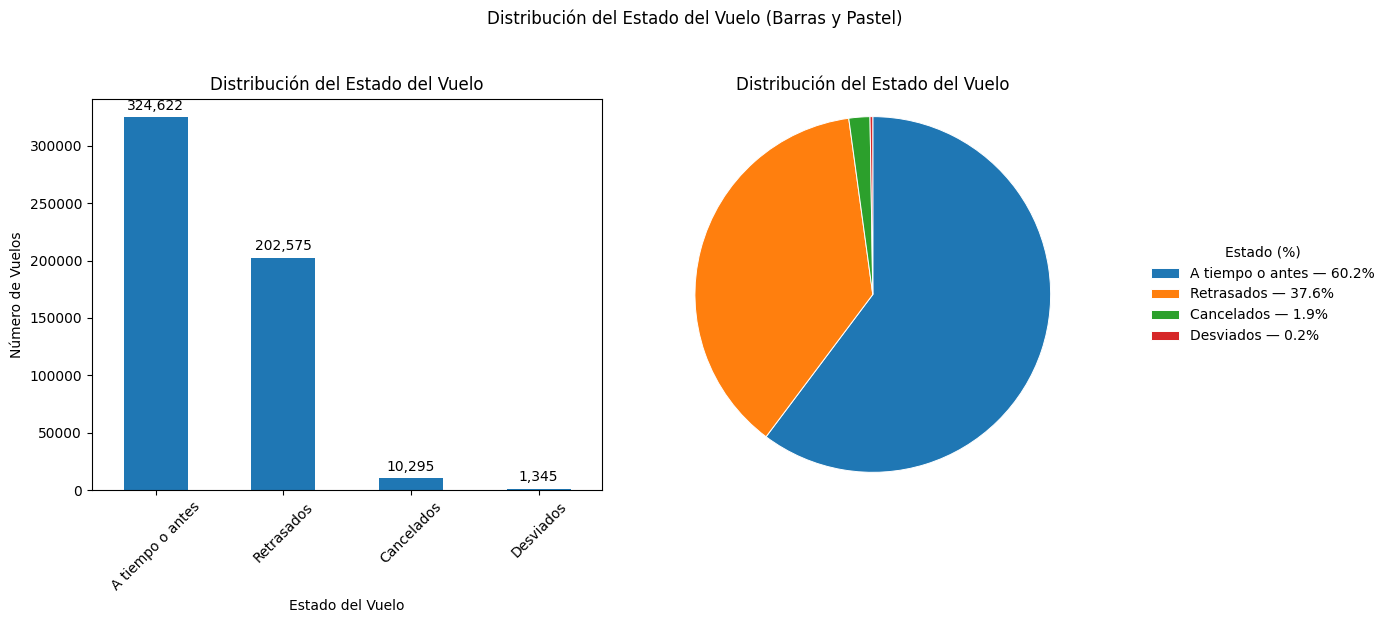

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asegura que existan labels y valores
labels = flight_status_counts_sorted.index.tolist()
values = flight_status_counts_sorted.values

# --- helper para mostrar % + conteo en el pastel ---
def autopct_format(vals):
    total = float(np.sum(vals))
    def _inner(pct):
        val = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({val:,})"
    return _inner

# ===============================
# Figuras lado a lado (1x2)
# ===============================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Barras (usando pandas plotting pero dentro del eje ax1) ---
flight_status_counts_sorted.plot(kind='bar', ax=ax1)
ax1.set_title('Distribución del Estado del Vuelo')
ax1.set_xlabel('Estado del Vuelo')
ax1.set_ylabel('Número de Vuelos')
ax1.tick_params(axis='x', rotation=45)
# etiquetas encima de cada barra
if ax1.containers:
    ax1.bar_label(ax1.containers[0], labels=[f"{int(v):,}" for v in values], label_type='edge', padding=3)

# --- Pastel ---
# --- Pastel sin textos; porcentajes en la LEYENDA ---
ax2.clear()

# Dibujamos el pastel sin labels ni autopct
wedges, _ = ax2.pie(
    values,
    labels=None,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white', linewidth=0.7)
)

# Armamos etiquetas de leyenda: "Categoría — 60.2%"
total = float(np.sum(values))
legend_labels = [f"{lab} — {val/total*100:.1f}%" for lab, val in zip(labels, values)]

# Leyenda a la derecha
ax2.legend(
    wedges, legend_labels,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    frameon=False, title="Estado (%)"
)

ax2.set_title('Distribución del Estado del Vuelo')
ax2.axis('equal')  # círculo perfecto
plt.tight_layout()


 # círculo perfecto

fig.suptitle('Distribución del Estado del Vuelo (Barras y Pastel)', y=1.03)
plt.tight_layout()
plt.show()


Creando gráfico circular para la distribución de los códigos de cancelación (para vuelos cancelados)...


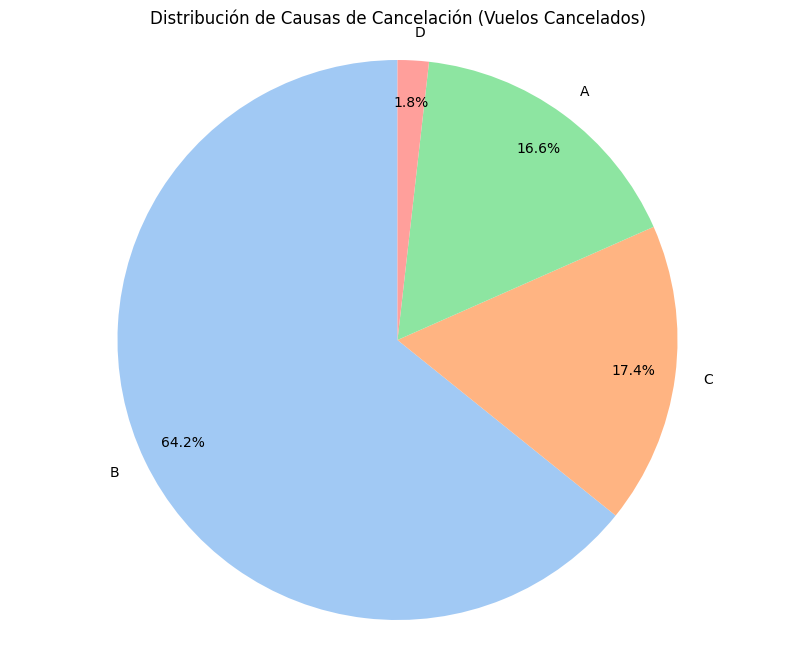


Recordatorio de la interpretación de los códigos de cancelación:
- 'A': Aerolínea
- 'B': Clima
- 'C': Sistema Nacional del Espacio Aéreo (NAS)
- 'D': Seguridad


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Para colores si quieres
import pandas as pd
import numpy as np # Necesario para autopct en algunos casos o si ajustamos

print("Creando gráfico circular para la distribución de los códigos de cancelación (para vuelos cancelados)...")

# Usar los conteos calculados en la celda anterior (QKtUYLswk0Fb)
# Asegurarnos de que la Serie cancellation_cause_counts existe
if 'cancellation_cause_counts' in globals() and not cancellation_cause_counts.empty:

    # Calcular porcentajes para las etiquetas del gráfico
    total_cancelled = cancellation_cause_counts.sum()
    percentages = (cancellation_cause_counts / total_cancelled) * 100

    # Crear etiquetas con nombres y porcentajes para mejor claridad en el pastel
    # Aunque autopct añade solo porcentaje, las etiquetas directas son útiles
    labels = [f'{cat}: {count} ({perc:.1f}%)' for cat, count, perc in zip(cancellation_cause_counts.index, cancellation_cause_counts.values, percentages)]


    # Crear el gráfico de pastel
    plt.figure(figsize=(10, 8)) # Tamaño adecuado
    # Usar autopct para mostrar porcentajes. pctdistance ajusta la posición del porcentaje.
    wedges, texts, autotexts = plt.pie(cancellation_cause_counts,
                                        labels=cancellation_cause_counts.index, # Etiquetas directas de las rebanadas
                                        autopct='%1.1f%%', # Formato del porcentaje (1 decimal)
                                        startangle=90,
                                        colors=sns.color_palette('pastel'), # Usar una paleta de colores
                                        pctdistance=0.85) # Ajustar la distancia del porcentaje desde el centro

    plt.title('Distribución de Causas de Cancelación (Vuelos Cancelados)')
    plt.axis('equal') # Asegura que el gráfico de pastel sea un círculo.

    # Mejorar la apariencia de las etiquetas de porcentaje (opcional)
    # for autotext in autotexts:
    #     autotext.set_color('white') # Color del texto
    #     autotext.set_weight('bold') # Negrita


    plt.show()

    # Recordatorio de la interpretación de los códigos:
    print("\nRecordatorio de la interpretación de los códigos de cancelación:")
    print("- 'A': Aerolínea")
    print("- 'B': Clima")
    print("- 'C': Sistema Nacional del Espacio Aéreo (NAS)")
    print("- 'D': Seguridad")

else:
    print("La Serie 'cancellation_cause_counts' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los conteos (QKtUYLswk0Fb) primero.")

Creando gráfico de barras (pandas plot) con etiquetas de minutos totales para las causas de retraso (vuelos retrasados)...


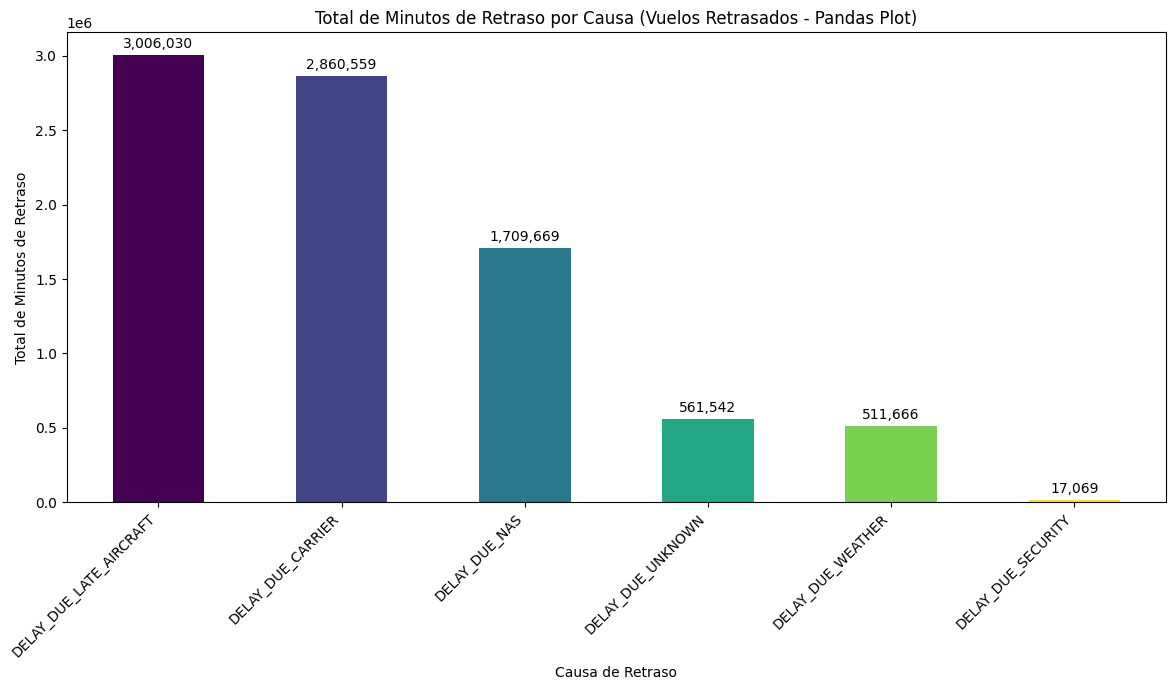


Recordatorio de la interpretación de las causas de retraso:
- DELAY_DUE_CARRIER: Aerolínea
- DELAY_DUE_WEATHER: Clima
- DELAY_DUE_NAS: Sistema Nacional del Espacio Aéreo
- DELAY_DUE_SECURITY: Seguridad
- DELAY_DUE_LATE_AIRCRAFT: Aeronave Tarde
- DELAY_DUE_UNKNOWN: Desconocido


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Aún importamos por si se usa para colores u otros estilos, aunque el gráfico base sea pandas
import pandas as pd
import numpy as np # Necesario para formato de etiquetas y colormaps

print("Creando gráfico de barras (pandas plot) con etiquetas de minutos totales para las causas de retraso (vuelos retrasados)...")

# Usar los datos calculados en la celda 204b5d13
# Asegurarnos de que la Serie total_delay_minutes_by_cause existe y no está vacía
if 'total_delay_minutes_by_cause' in globals() and not total_delay_minutes_by_cause.empty:

    # Ordenar por minutos totales de retraso descendente para el gráfico
    total_delay_minutes_sorted = total_delay_minutes_by_cause.sort_values(ascending=False)

    # Crear el gráfico de barras usando el método .plot() de pandas
    plt.figure(figsize=(12, 7))
    # Usar un colormap para los colores de las barras
    colors = plt.cm.viridis(np.linspace(0, 1, len(total_delay_minutes_sorted)))
    ax = total_delay_minutes_sorted.plot(kind='bar', color=colors)

    plt.title('Total de Minutos de Retraso por Causa (Vuelos Retrasados - Pandas Plot)')
    plt.xlabel('Causa de Retraso')
    plt.ylabel('Total de Minutos de Retraso') # El eje Y es ahora el total de minutos
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
    plt.tight_layout()

    # Añadir etiquetas de conteo (minutos) usando ax.bar_label
    # Formateamos los minutos para que sean más legibles (ej. con comas)
    labels = [f'{value:,.0f}' for value in total_delay_minutes_sorted.values]

    # ax.containers[0] debería contener las barras para un pandas bar plot
    if ax.containers:
        ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3) # Añadir padding
    else:
        print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas con bar_label.")

    plt.show()

    # Recordatorio de la interpretación de las causas de retraso:
    print("\nRecordatorio de la interpretación de las causas de retraso:")
    print("- DELAY_DUE_CARRIER: Aerolínea")
    print("- DELAY_DUE_WEATHER: Clima")
    print("- DELAY_DUE_NAS: Sistema Nacional del Espacio Aéreo")
    print("- DELAY_DUE_SECURITY: Seguridad")
    print("- DELAY_DUE_LATE_AIRCRAFT: Aeronave Tarde")
    print("- DELAY_DUE_UNKNOWN: Desconocido")

else:
    print("La Serie 'total_delay_minutes_by_cause' no se encontró o está vacía. Por favor, ejecuta la celda que calcula las causas de retraso (204b5d13) primero.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creando gráfico de barras para el número de vuelos afectados por causa de retraso (vuelos retrasados)...")

# Usar los conteos de vuelos afectados por causa calculados en la celda 204b5d13
# Asegurarnos de que el diccionario flights_affected_by_cause existe y no está vacío
if 'flights_affected_by_cause' in globals() and flights_affected_by_cause:

    # Convertir el diccionario a una Serie de pandas para facilitar el ploteo y ordenamiento
    flights_affected_series = pd.Series(flights_affected_by_cause)

    # Ordenar por número de vuelos afectados descendente para el gráfico
    flights_affected_sorted = flights_affected_series.sort_values(ascending=False)

    # # Mapeo para nombres más legibles en las etiquetas (Comentado para usar nombres originales)
    # delay_cause_names = {
    #     'DELAY_DUE_CARRIER': 'Aerolínea',
    #     'DELAY_DUE_WEATHER': 'Clima',
    #     'DELAY_DUE_NAS': 'Sistema Nacional del Espacio Aéreo',
    #     'DELAY_DUE_SECURITY': 'Seguridad',
    #     'DELAY_DUE_LATE_AIRCRAFT': 'Aeronave Tarde',
    #     'DELAY_DUE_UNKNOWN': 'Desconocido'
    # }
    # # Renombrar el índice con los nombres legibles (Comentado)
    # flights_affected_sorted.index = flights_affected_sorted.index.map(delay_cause_names)


    # Crear el gráfico de barras usando el método .plot() de pandas
    plt.figure(figsize=(12, 7))
    # Usar un colormap para los colores de las barras
    colors = plt.cm.viridis(np.linspace(0, 1, len(flights_affected_sorted)))
    ax = flights_affected_sorted.plot(kind='bar', color=colors)

    plt.title('Número de Vuelos Afectados por Causa de Retraso')
    plt.xlabel('Causa de Retraso')
    plt.ylabel('Número de Vuelos Afectados')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
    plt.tight_layout()

    # Añadir etiquetas de conteo usando ax.bar_label
    # Formateamos los conteos para que sean más legibles (ej. con comas)
    labels = [f'{count:,.0f}' for count in flights_affected_sorted.values]

    # ax.containers[0] debería contener las barras para un pandas bar plot
    if ax.containers:
        ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3) # Añadir padding
    else:
        print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas con bar_label.")

    plt.show()

    print("\n--- Interpretación del gráfico ---")
    print("Este gráfico muestra cuántos vuelos, de aquellos que experimentaron retraso a la llegada, tuvieron una contribución positiva de tiempo para cada causa de retraso.")
    print("Los picos más altos indican las causas que afectaron a un mayor número de vuelos, aunque la magnitud del retraso por esa causa podría variar (para la magnitud, consulta el gráfico de 'Minutos de Retraso por Causa').")


else:
    print("El diccionario 'flights_affected_by_cause' no se encontró o está vacío. Por favor, ejecuta la celda 204b5d13 para calcular los conteos de causas de retraso primero.")

Creando gráfico de barras para el número de vuelos afectados por causa de retraso (vuelos retrasados)...



--- Interpretación del gráfico ---
Este gráfico muestra cuántos vuelos, de aquellos que experimentaron retraso a la llegada, tuvieron una contribución positiva de tiempo para cada causa de retraso.
Los picos más altos indican las causas que afectaron a un mayor número de vuelos, aunque la magnitud del retraso por esa causa podría variar (para la magnitud, consulta el gráfico de 'Minutos de Retraso por Causa').


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, para estilo
import pandas as pd
import numpy as np

print("Creando gráfico de barras horizontal para las principales aerolíneas por número de vuelos (con nombres)...")

# Usar los conteos de vuelos por aerolínea calculados en la celda jlzpym5RdU79
# Asegurarnos de que la Serie flight_count_by_airline existe y no está vacía
if 'flight_count_by_airline' in globals() and not flight_count_by_airline.empty:

    # Seleccionar, por ejemplo, el top 10 de aerolíneas por conteo de vuelos
    top_n = 10
    top_airlines_by_count = flight_count_by_airline.head(top_n)

    # --- Mapear códigos de aerolínea a descripciones ---
    # Crear un diccionario mapeando AIRLINE_CODE a AIRLINE_DESCRIPTION
    # Usamos el DataFrame flights (que tiene ambas columnas después de la unión)
    airline_code_to_description = flights.set_index('AIRLINE_CODE')['AIRLINE_DESCRIPTION'].drop_duplicates().to_dict()

    # Crear una nueva Serie con las descripciones como índice, manteniendo los conteos
    top_airlines_by_count_with_names = top_airlines_by_count.rename(index=airline_code_to_description)

    # Crear el gráfico de barras horizontal usando el método .plot() de pandas
    plt.figure(figsize=(10, 6)) # Tamaño adecuado para un gráfico horizontal
    # Invertir el orden para que la barra más larga (mayor conteo) quede arriba
    # Graficamos la Serie con nombres como índice
    ax = top_airlines_by_count_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n)))


    plt.title(f'Top {top_n} Aerolíneas por Número de Vuelos')
    plt.xlabel('Número de Vuelos') # El eje X ahora es el número de vuelos
    plt.ylabel('Aerolínea') # El eje Y ahora son las aerolíneas (nombres)
    plt.tight_layout() # Ajustar diseño

    # Añadir etiquetas de conteo usando ax.bar_label
    # Las etiquetas deben coincidir con el orden de las barras (que está ascendente para que la más alta esté arriba)
    labels = [f'{count:,.0f}' for count in top_airlines_by_count_with_names.sort_values(ascending=True).values]

    if ax.containers:
         # Para barh, bar_label coloca las etiquetas en la parte derecha de las barras
         ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas.")

    plt.show()

else:
    print("La Serie 'flight_count_by_airline' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los conteos por aerolínea (jlzpym5RdU79) primero.")

Creando gráfico de barras horizontal para las principales aerolíneas por número de vuelos (con nombres)...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, para estilo
import pandas as pd
import numpy as np # Necesario para labels y colormaps

print("Creando gráfico de barras horizontal para las principales aerolíneas por número de vuelos retrasados...")

# Usar los conteos de vuelos retrasados por aerolínea calculados en la celda jlzpym5RdU79
# Asegurarnos de que la Serie delayed_count_by_airline existe y no está vacía
if 'delayed_count_by_airline' in globals() and not delayed_count_by_airline.empty:

    # Seleccionar, por ejemplo, el top 10 de aerolíneas por conteo de vuelos retrasados
    top_n = 10
    top_airlines_by_delayed_count = delayed_count_by_airline.sort_values(ascending=False).head(top_n)

    # --- Mapear códigos de aerolínea a descripciones ---
    # Reutilizamos el diccionario creado antes, o lo creamos si no existe en memoria
    if 'airline_code_to_description' not in globals():
         print("Creando diccionario de mapeo de códigos a nombres de aerolínea...")
         airline_code_to_description = flights.set_index('AIRLINE_CODE')['AIRLINE_DESCRIPTION'].drop_duplicates().to_dict()

    # Crear una nueva Serie con las descripciones como índice, manteniendo los conteos
    top_airlines_by_delayed_count_with_names = top_airlines_by_delayed_count.rename(index=airline_code_to_description)

    # Crear el gráfico de barras horizontal usando el método .plot() de pandas
    plt.figure(figsize=(10, 6)) # Tamaño adecuado para un gráfico horizontal
    # Invertir el orden para que la barra más larga (mayor conteo) quede arriba
    # Graficamos la Serie con nombres como índice
    ax = top_airlines_by_delayed_count_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n)))


    plt.title(f'Top {top_n} Aerolíneas por Número de Vuelos Retrasados')
    plt.xlabel('Número de Vuelos Retrasados') # El eje X es el número de vuelos retrasados
    plt.ylabel('Aerolínea') # El eje Y son las aerolíneas (nombres)
    plt.tight_layout() # Ajustar diseño

    # Añadir etiquetas de conteo usando ax.bar_label
    # Las etiquetas deben coincidir con el orden de las barras (que está ascendente para que la más alta esté arriba)
    labels = [f'{count:,.0f}' for count in top_airlines_by_delayed_count_with_names.sort_values(ascending=True).values]

    if ax.containers:
         # Para barh, bar_label coloca las etiquetas en la parte derecha de las barras
         ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas.")

    plt.show()

else:
    print("La Serie 'delayed_count_by_airline' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los conteos de vuelos retrasados por aerolínea (jlzpym5RdU79) primero.")

Creando gráfico de barras horizontal para las principales aerolíneas por número de vuelos retrasados...


Creando gráficos de barras horizontales para las aerolíneas por porcentaje de vuelos retrasados...


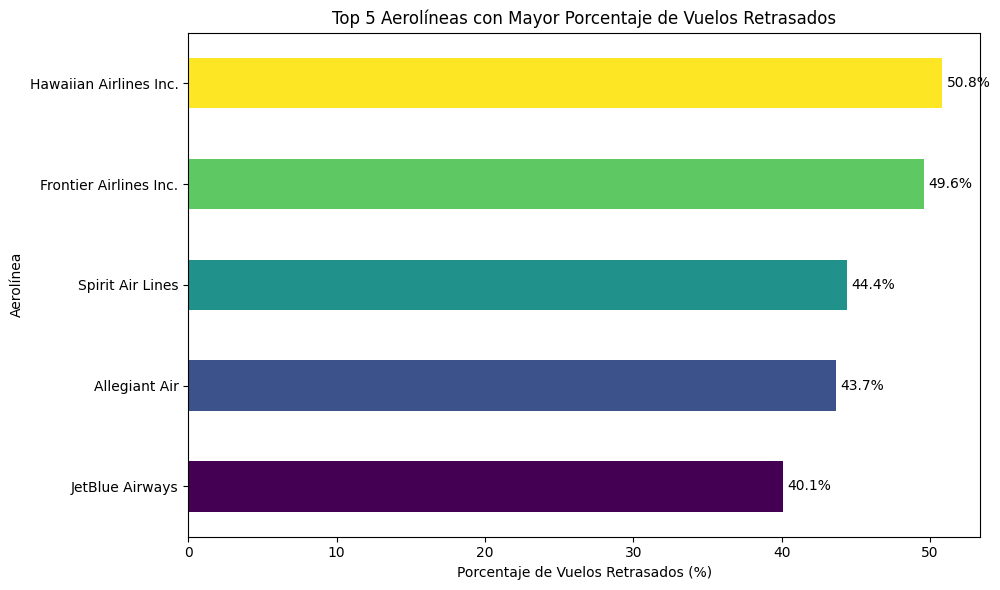

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, para estilo
import pandas as pd
import numpy as np # Necesario para labels y colormaps

print("Creando gráficos de barras horizontales para las aerolíneas por porcentaje de vuelos retrasados...")

# Usar los porcentajes de vuelos retrasados por aerolínea calculados en la celda jlzpym5RdU79
# Asegurarnos de que la Serie percentage_delayed_by_airline existe y no está vacía
if 'percentage_delayed_by_airline' in globals() and not percentage_delayed_by_airline.empty:

    # --- Mapear códigos de aerolínea a descripciones ---
    # Reutilizamos el diccionario creado antes, o lo creamos si no existe en memoria
    if 'airline_code_to_description' not in globals():
         print("Creando diccionario de mapeo de códigos a nombres de aerolínea...")
         airline_code_to_description = flights.set_index('AIRLINE_CODE')['AIRLINE_DESCRIPTION'].drop_duplicates().to_dict()

    # --- Gráfico Top 5 Mayor Porcentaje de Retrasos ---
    top_n_high = 5
    # Ordenar por porcentaje de retrasos en orden descendente y tomar el top N
    top_airlines_by_high_delayed_percentage = percentage_delayed_by_airline.sort_values(ascending=False).head(top_n_high)

    # Mapear códigos a nombres para el gráfico
    top_airlines_by_high_delayed_percentage_with_names = top_airlines_by_high_delayed_percentage.rename(index=airline_code_to_description)

    # Crear el gráfico de barras horizontal
    plt.figure(figsize=(10, 6)) # Tamaño adecuado
    # Invertir el orden para que la barra más larga (mayor porcentaje) quede arriba
    ax_high = top_airlines_by_high_delayed_percentage_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n_high)))

    plt.title(f'Top {top_n_high} Aerolíneas con Mayor Porcentaje de Vuelos Retrasados')
    plt.xlabel('Porcentaje de Vuelos Retrasados (%)')
    plt.ylabel('Aerolínea')
    plt.tight_layout()

    # Añadir etiquetas de porcentaje
    labels_high = [f'{p:.1f}%' for p in top_airlines_by_high_delayed_percentage_with_names.sort_values(ascending=True).values]
    if ax_high.containers:
         ax_high.bar_label(ax_high.containers[0], labels=labels_high, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas (Gráfico Mayor %).")

    plt.show()


    # --- Gráfico Top 5 Menor Porcentaje de Retrasos ---
    top_n_low = 5
    # Ordenar por porcentaje de retrasos en orden ascendente y tomar el top N
    top_airlines_by_low_delayed_percentage = percentage_delayed_by_airline.sort_values(ascending=True).head(top_n_low)

    # Mapear códigos a nombres para el gráfico
    top_airlines_by_low_delayed_percentage_with_names = top_airlines_by_low_delayed_percentage.rename(index=airline_code_to_description)

    # Crear el gráfico de barras horizontal
    plt.figure(figsize=(10, 6)) # Tamaño adecuado
    # Invertir el orden para que la barra más larga (mayor porcentaje) quede arriba en el gráfico del "menor porcentaje"
    ax_low = top_airlines_by_low_delayed_percentage_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.plasma(np.linspace(0, 1, top_n_low))) # Usar otro colormap

    plt.title(f'Top {top_n_low} Aerolíneas con Menor Porcentaje de Vuelos Retrasados')
    plt.xlabel('Porcentaje de Vuelos Retrasados (%)')
    plt.ylabel('Aerolínea')
    plt.tight_layout()

    # Añadir etiquetas de porcentaje
    labels_low = [f'{p:.1f}%' for p in top_airlines_by_low_delayed_percentage_with_names.sort_values(ascending=True).values]
    if ax_low.containers:
         ax_low.bar_label(ax_low.containers[0], labels=labels_low, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas (Gráfico Menor %).")


    plt.show()


else:
    print("La Serie 'percentage_delayed_by_airline' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los porcentajes de vuelos retrasados por aerolínea (jlzpym5RdU79) primero.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, para estilo
import pandas as pd
import numpy as np # Necesario para labels y colormaps

print("Creando gráfico de barras horizontal para los principales aeropuertos (nombres) por número de vuelos de salida...")

# Usar los conteos de vuelos de salida por aeropuerto calculados en la celda eb79cb48
# Asegurarnos de que la Serie origin_flight_count existe y no está vacía
if 'origin_flight_count' in globals() and not origin_flight_count.empty:

    # Seleccionar, por ejemplo, el top 10 de aeropuertos por conteo de vuelos de salida
    top_n = 10
    top_airports_by_origin_count = origin_flight_count.head(top_n)

    # --- Mapear códigos de aeropuerto a nombres de ciudad/aeropuerto ---
    # Crear un diccionario mapeando ORIGIN a ORIGIN_CITY
    # Usamos el DataFrame flights (que tiene ambas columnas)
    airport_code_to_city_name = flights.set_index('ORIGIN')['ORIGIN_CITY'].drop_duplicates().to_dict()

    # Crear una nueva Serie con los nombres de ciudad como índice, manteniendo los conteos
    top_airports_by_origin_count_with_names = top_airports_by_origin_count.rename(index=airport_code_to_city_name)

    # Crear el gráfico de barras horizontal usando el método .plot() de pandas
    plt.figure(figsize=(10, 6)) # Tamaño adecuado para un gráfico horizontal
    # Invertir el orden para que la barra más larga (mayor conteo) quede arriba
    # Graficamos la Serie con nombres como índice
    ax = top_airports_by_origin_count_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n)))


    plt.title(f'Top {top_n} Aeropuertos (Origen) por Número de Vuelos de Salida')
    plt.xlabel('Número de Vuelos de Salida') # El eje X ahora es el número de vuelos
    plt.ylabel('Aeropuerto de Origen (Ciudad)') # El eje Y ahora son los aeropuertos (nombres)
    plt.tight_layout() # Ajustar diseño

    # Añadir etiquetas de conteo usando ax.bar_label
    # Las etiquetas deben coincidir con el orden de las barras (que está ascendente para que la más alta esté arriba)
    labels = [f'{count:,.0f}' for count in top_airports_by_origin_count_with_names.sort_values(ascending=True).values]

    if ax.containers:
         # Para barh, bar_label coloca las etiquetas en la parte derecha de las barras
         ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas.")

    plt.show()

    # Opcional: Puedes repetir esto para top destination airports si quieres
    # print("\n--- Top Aeropuertos por Número de Vuelos de Llegada ---")
    # if 'dest_flight_count' in globals() and not dest_flight_count.empty:
    #     top_airports_by_dest_count = dest_flight_count.head(top_n)
    #     # Mapear códigos de destino a nombres de ciudad/aeropuerto
    #     airport_code_to_city_name_dest = flights.set_index('DEST')['DEST_CITY'].drop_duplicates().to_dict()
    #     top_airports_by_dest_count_with_names = top_airports_by_dest_count.rename(index=airport_code_to_city_name_dest)
    #     plt.figure(figsize=(10, 6))
    #     ax = top_airports_by_dest_count_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n)))
    #     plt.title(f'Top {top_n} Aeropuertos (Destino) por Número de Vuelos de Llegada')
    #     plt.xlabel('Número de Vuelos de Llegada')
    #     plt.ylabel('Aeropuerto de Destino (Ciudad)')
    #     plt.tight_layout()
    #     labels_dest = [f'{count:,.0f}' for count in top_airports_by_dest_count_with_names.sort_values(ascending=True).values]
    #     if ax.containers:
    #          ax.bar_label(ax.containers[0], labels=labels_dest, label_type='edge', padding=3)
    #     plt.show()


else:
    print("La Serie 'origin_flight_count' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los conteos por aeropuerto (eb79cb48) primero.")

Creando gráfico de barras horizontal para los principales aeropuertos (nombres) por número de vuelos de salida...


Crearemos un gráfico de barras horizontal para visualizar los principales aeropuertos por número de vuelos de llegada.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, para estilo
import pandas as pd
import numpy as np # Necesario para labels y colormaps

print("Creando gráfico de barras horizontal para los principales aeropuertos (nombres) por número de vuelos de llegada...")

# Usar los conteos de vuelos de llegada por aeropuerto calculados en la celda eb79cb48
# Asegurarnos de que la Serie dest_flight_count existe y no está vacía
if 'dest_flight_count' in globals() and not dest_flight_count.empty:

    # Seleccionar, por ejemplo, el top 10 de aeropuertos por conteo de vuelos de llegada
    top_n = 10
    top_airports_by_dest_count = dest_flight_count.head(top_n)

    # --- Mapear códigos de aeropuerto de destino a nombres de ciudad/aeropuerto ---
    # Crear un diccionario mapeando DEST a DEST_CITY
    # Usamos el DataFrame flights (que tiene ambas columnas)
    airport_code_to_city_name_dest = flights.set_index('DEST')['DEST_CITY'].drop_duplicates().to_dict()

    # Crear una nueva Serie con los nombres de ciudad como índice, manteniendo los conteos
    top_airports_by_dest_count_with_names = top_airports_by_dest_count.rename(index=airport_code_to_city_name_dest)

    # Crear el gráfico de barras horizontal usando el método .plot() de pandas
    plt.figure(figsize=(10, 6)) # Tamaño adecuado para un gráfico horizontal
    # Invertir el orden para que la barra más larga (mayor conteo) quede arriba
    # Graficamos la Serie con nombres como índice
    ax = top_airports_by_dest_count_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n)))


    plt.title(f'Top {top_n} Aeropuertos (Destino) por Número de Vuelos de Llegada')
    plt.xlabel('Número de Vuelos de Llegada') # El eje X ahora es el número de vuelos
    plt.ylabel('Aeropuerto de Destino (Ciudad)') # El eje Y ahora son los aeropuertos (nombres)
    plt.tight_layout() # Ajustar diseño

    # Añadir etiquetas de conteo usando ax.bar_label
    # Las etiquetas deben coincidir con el orden de las barras (que está ascendente para que la más alta esté arriba)
    labels = [f'{count:,.0f}' for count in top_airports_by_dest_count_with_names.sort_values(ascending=True).values]

    if ax.containers:
         # Para barh, bar_label coloca las etiquetas en la parte derecha de las barras
         ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas.")

    plt.show()

else:
    print("La Serie 'dest_flight_count' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los conteos por aeropuerto (eb79cb48) primero.")

Creando gráfico de barras horizontal para los principales aeropuertos (nombres) por número de vuelos de llegada...


Creando gráfico de barras horizontal para los principales aeropuertos (nombres) por mayor porcentaje de vuelos retrasados...


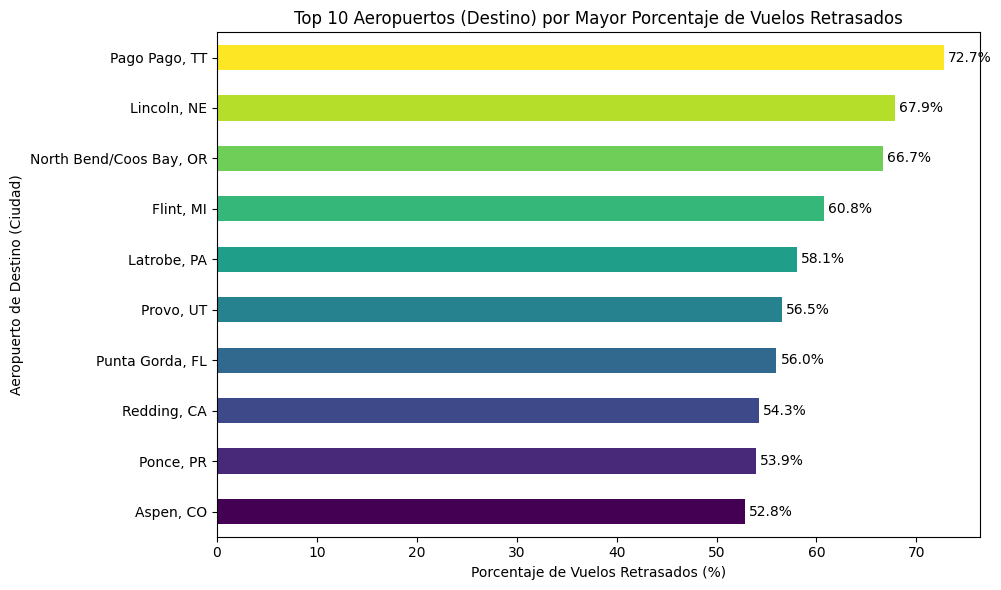

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, para estilo
import pandas as pd
import numpy as np # Necesario para labels y colormaps

print("Creando gráfico de barras horizontal para los principales aeropuertos (nombres) por mayor porcentaje de vuelos retrasados...")

# Usar los porcentajes de vuelos retrasados por aeropuerto de destino calculados en la celda eb79cb48
# Asegurarnos de que la Serie dest_delayed_percentage existe y no está vacía
if 'dest_delayed_percentage' in globals() and not dest_delayed_percentage.empty:

    # Seleccionar, por ejemplo, el top 10 de aeropuertos con el mayor porcentaje de retrasos
    top_n = 10
    # Ordenar por porcentaje de retrasos en orden descendente y tomar el top N
    top_airports_by_high_delayed_percentage = dest_delayed_percentage.sort_values(ascending=False).head(top_n)

    # --- Mapear códigos de aeropuerto de destino a nombres de ciudad/aeropuerto ---
    # Crear un diccionario mapeando DEST a DEST_CITY
    # Reutilizamos el diccionario creado antes, o lo creamos si no existe en memoria
    if 'airport_code_to_city_name_dest' not in globals():
         print("Creando diccionario de mapeo de códigos a nombres de ciudad/aeropuerto de destino...")
         airport_code_to_city_name_dest = flights.set_index('DEST')['DEST_CITY'].drop_duplicates().to_dict()

    # Crear una nueva Serie con los nombres de ciudad como índice, manteniendo los porcentajes
    top_airports_by_high_delayed_percentage_with_names = top_airports_by_high_delayed_percentage.rename(index=airport_code_to_city_name_dest)


    # Crear el gráfico de barras horizontal usando el método .plot() de pandas
    plt.figure(figsize=(10, 6)) # Tamaño adecuado para un gráfico horizontal
    # Invertir el orden para que la barra más larga (mayor porcentaje) quede arriba
    # Graficamos la Serie con nombres como índice
    ax = top_airports_by_high_delayed_percentage_with_names.sort_values(ascending=True).plot(kind='barh', color=plt.cm.viridis(np.linspace(0, 1, top_n)))


    plt.title(f'Top {top_n} Aeropuertos (Destino) por Mayor Porcentaje de Vuelos Retrasados')
    plt.xlabel('Porcentaje de Vuelos Retrasados (%)') # El eje X es el porcentaje
    plt.ylabel('Aeropuerto de Destino (Ciudad)') # El eje Y son los aeropuertos (nombres)
    plt.tight_layout() # Ajustar diseño

    # Añadir etiquetas de porcentaje usando ax.bar_label
    # Las etiquetas deben coincidir con el orden de las barras (que está ascendente para que la más alta esté arriba)
    labels = [f'{p:.1f}%' for p in top_airports_by_high_delayed_percentage_with_names.sort_values(ascending=True).values]

    if ax.containers:
         # Para barh, bar_label coloca las etiquetas en la parte derecha de las barras
         ax.bar_label(ax.containers[0], labels=labels, label_type='edge', padding=3)
    else:
         print("Advertencia: No se encontraron contenedores de barras para añadir etiquetas.")

    plt.show()

else:
    print("La Serie 'dest_delayed_percentage' no se encontró o está vacía. Por favor, ejecuta la celda que calcula los porcentajes de vuelos retrasados por aeropuerto (eb79cb48) primero.")

## Calcular medidas de tendencia central

In [ ]:
import pandas as pd
import numpy as np

print("Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY:")

# Columnas a analizar
delay_cols = ['DEP_DELAY', 'ARR_DELAY']

# Calcular estadísticas para cada columna
for col in delay_cols:
    print(f"\n--- Estadísticas para {col} ---")

    # Manejar valores nulos para cálculos (ej. vuelos cancelados/desviados tienen nulos en ARR_DELAY)
    # Calculamos sobre los valores no nulos
    col_data = flights[col].dropna()

    if not col_data.empty:
        # Media
        mean_val = col_data.mean()
        print(f"Media: {mean_val:.2f} minutos")

        # Mediana (Percentil 50)
        median_val = col_data.median()
        print(f"Mediana: {median_val:.2f} minutos")

        # Moda (valor más frecuente)
        # Para variables continuas como el retraso, la moda puede ser menos informativa
        # Mostraremos el/los valor(es) más frecuente(s)
        mode_val = col_data.mode()
        if not mode_val.empty:
            print(f"Moda(s) (valor(es) más frecuente(s)): {mode_val.tolist()}")
        else:
            print("No se encontró una moda única.")

    else:
        print(f"No hay datos no nulos en la columna {col} para calcular estadísticas.")


print("\n--- Interpretación de los resultados ---")

# Interpretación (basada en cómo suelen ser estos datos)
# DEP_DELAY:
# Media: Promedio de todos los retrasos/anticipaciones de salida. Un valor positivo indica retraso promedio.
# Mediana: El valor central. Si es 0 o negativo, la mitad o más de los vuelos salieron a tiempo o antes.
# Moda: El valor de retraso de salida que ocurrió con mayor frecuencia. A menudo es 0 (salida a tiempo).

print("\nInterpretación de DEP_DELAY:")
print("La media indica el retraso promedio en la salida (positivo: retraso, negativo: anticipación).")
print("La mediana nos dice que al menos el 50% de los vuelos tuvieron un retraso igual o menor a este valor.")
print("La moda muestra el valor de retraso de salida que ocurrió con mayor frecuencia (a menudo, 0 para salidas a tiempo).")

# ARR_DELAY:
# Media: Promedio de todos los retrasos/anticipaciones de llegada para vuelos que operaron. Un valor positivo indica retraso promedio.
# Mediana: El valor central para retrasos/anticipaciones de llegada. Si es 0 o negativo, la mitad o más de los vuelos llegaron a tiempo o antes.
# Moda: El valor de retraso de llegada que ocurrió con mayor frecuencia. A menudo es 0 (llegada a tiempo).

print("\nInterpretación de ARR_DELAY:")
print("La media indica el retraso promedio en la llegada para vuelos que operaron (positivo: retraso, negativo: anticipación).")
print("La mediana nos dice que al menos el 50% de los vuelos que operaron tuvieron un retraso de llegada igual o menor a este valor.")
print("La moda muestra el valor de retraso de llegada que ocurrió con mayor frecuencia (a menudo, 0 para llegadas a tiempo).")

print("\nComparando media y mediana:")
print("Si la media es significativamente mayor que la mediana, sugiere que hay una cola de valores altos (retrasos grandes) que está 'tirando' de la media hacia arriba.")
print("Si la media y la mediana son similares, la distribución es más simétrica alrededor del centro.")

Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY:

--- Estadísticas para DEP_DELAY ---
Media: 12.94 minutos
Mediana: -2.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-5.0]

--- Estadísticas para ARR_DELAY ---
Media: 7.78 minutos
Mediana: -5.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-12.0]

--- Interpretación de los resultados ---

Interpretación de DEP_DELAY:
La media indica el retraso promedio en la salida (positivo: retraso, negativo: anticipación).
La mediana nos dice que al menos el 50% de los vuelos tuvieron un retraso igual o menor a este valor.
La moda muestra el valor de retraso de salida que ocurrió con mayor frecuencia (a menudo, 0 para salidas a tiempo).

Interpretación de ARR_DELAY:
La media indica el retraso promedio en la llegada para vuelos que operaron (positivo: retraso, negativo: anticipación).
La mediana nos dice que al menos el 50% de los vuelos que operaron tuvieron un retraso de llegada igual o menor a este valor.
La moda muestra el valor d

In [ ]:
import pandas as pd
import numpy as np

print("Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY para vuelos NO cancelados y NO desviados:")

# Filtrar el DataFrame para incluir solo vuelos no cancelados (CANCELLED == 0) y no desviados (DIVERTED == 0)
operated_non_diverted_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

print(f"\nNúmero de vuelos no cancelados y no desviados: {len(operated_non_diverted_flights)}")


# Columnas a analizar
delay_cols = ['DEP_DELAY', 'ARR_DELAY']

# Calcular estadísticas para cada columna en el subconjunto filtrado
for col in delay_cols:
    print(f"\n--- Estadísticas para {col} (Vuelos Operados y No Desviados) ---")

    # Calculamos sobre los valores no nulos en el subconjunto filtrado
    # Para ARR_DELAY, no deberíamos tener nulos después de este filtro, pero dropna es una buena práctica.
    col_data = operated_non_diverted_flights[col].dropna()

    if not col_data.empty:
        # Media
        mean_val = col_data.mean()
        print(f"Media: {mean_val:.2f} minutos")

        # Mediana (Percentil 50)
        median_val = col_data.median()
        print(f"Mediana: {median_val:.2f} minutos")

        # Moda (valor más frecuente)
        mode_val = col_data.mode()
        if not mode_val.empty:
            # Solo mostrar los primeros 5 valores si hay muchas modas
            print(f"Moda(s) (valor(es) más frecuente(s)): {mode_val.tolist()[:5]}{'...' if len(mode_val) > 5 else ''}")
        else:
            print("No se encontró una moda única.")

    else:
        print(f"No hay datos no nulos en la columna {col} en el subconjunto seleccionado para calcular estadísticas.")


print("\n--- Nota ---")
print("Comparando estos resultados con los cálculos sobre todos los vuelos (celda 20iSObqkG2Ip) te permitirá ver cómo los vuelos cancelados/desviados (que a menudo tienen nulos en ARR_DELAY o un DEP_DELAY diferente) afectan las estadísticas generales.")

Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY para vuelos NO cancelados y NO desviados:

Número de vuelos no cancelados y no desviados: 527197

--- Estadísticas para DEP_DELAY (Vuelos Operados y No Desviados) ---
Media: 12.84 minutos
Mediana: -2.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-5.0]

--- Estadísticas para ARR_DELAY (Vuelos Operados y No Desviados) ---
Media: 7.78 minutos
Mediana: -5.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-12.0]

--- Nota ---
Comparando estos resultados con los cálculos sobre todos los vuelos (celda 20iSObqkG2Ip) te permitirá ver cómo los vuelos cancelados/desviados (que a menudo tienen nulos en ARR_DELAY o un DEP_DELAY diferente) afectan las estadísticas generales.


In [ ]:
import pandas as pd
import numpy as np

print("Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY para vuelos NO cancelados, NO desviados y con ARR_DELAY positivo (> 0):")

# Filtrar el DataFrame para incluir solo vuelos no cancelados (CANCELLED == 0),
# no desviados (DIVERTED == 0), Y con retraso a la llegada positivo (ARR_DELAY > 0)
delayed_operated_non_diverted_flights = flights[(flights['CANCELLED'] == 0) &
                                                (flights['DIVERTED'] == 0) &
                                                (flights['ARR_DELAY'] > 0)].copy()

print(f"\nNúmero de vuelos no cancelados, no desviados y con ARR_DELAY positivo: {len(delayed_operated_non_diverted_flights)}")


# Columnas a analizar
delay_cols = ['DEP_DELAY', 'ARR_DELAY']

# Calcular estadísticas para cada columna en el subconjunto filtrado
for col in delay_cols:
    print(f"\n--- Estadísticas para {col} (Vuelos Retrasados, Operados y No Desviados) ---")

    # Calculamos sobre los valores en el subconjunto filtrado.
    # No deberíamos tener nulos en ARR_DELAY en este subconjunto por el filtro ARR_DELAY > 0.
    # Para DEP_DELAY, podrían haber nulos si un vuelo tuvo ARR_DELAY>0 pero DEP_DELAY nulo (raro).
    col_data = delayed_operated_non_diverted_flights[col].dropna()


    if not col_data.empty:
        # Media
        mean_val = col_data.mean()
        print(f"Media: {mean_val:.2f} minutos")

        # Mediana (Percentil 50)
        median_val = col_data.median()
        print(f"Mediana: {median_val:.2f} minutos")

        # Moda (valor más frecuente)
        mode_val = col_data.mode()
        if not mode_val.empty:
             # Solo mostrar los primeros 5 valores si hay muchas modas
            print(f"Moda(s) (valor(es) más frecuente(s)): {mode_val.tolist()[:5]}{'...' if len(mode_val) > 5 else ''}")
        else:
            print("No se encontró una moda única.")

    else:
        print(f"No hay datos no nulos en la columna {col} en el subconjunto seleccionado para calcular estadísticas.")


print("\n--- Nota ---")
print("Este análisis se centra específicamente en los vuelos que experimentaron un retraso a la llegada, mostrando las estadísticas de sus retrasos de salida y llegada.")

Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY para vuelos NO cancelados, NO desviados y con ARR_DELAY positivo (> 0):

Número de vuelos no cancelados, no desviados y con ARR_DELAY positivo: 202575

--- Estadísticas para DEP_DELAY (Vuelos Retrasados, Operados y No Desviados) ---
Media: 38.91 minutos
Mediana: 16.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-1.0]

--- Estadísticas para ARR_DELAY (Vuelos Retrasados, Operados y No Desviados) ---
Media: 42.78 minutos
Mediana: 19.00 minutos
Moda(s) (valor(es) más frecuente(s)): [1.0]

--- Nota ---
Este análisis se centra específicamente en los vuelos que experimentaron un retraso a la llegada, mostrando las estadísticas de sus retrasos de salida y llegada.


In [ ]:
import pandas as pd
import numpy as np

print("Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY para vuelos sin retraso (ARR_DELAY <= 0):")

# Filtrar el DataFrame para incluir solo vuelos no cancelados (CANCELLED == 0),
# no desviados (DIVERTED == 0), Y con retraso a la llegada igual o menor a 0 (ARR_DELAY <= 0)
on_time_or_early_flights = flights[(flights['CANCELLED'] == 0) &
                                   (flights['DIVERTED'] == 0) &
                                   (flights['ARR_DELAY'].fillna(0) <= 0)].copy() # Usamos fillna(0) para incluir posibles nulos en ARR_DELAY que se consideren "a tiempo"


print(f"\nNúmero de vuelos no cancelados, no desviados y con ARR_DELAY igual o menor a 0: {len(on_time_or_early_flights)}")


# Columnas a analizar
delay_cols = ['DEP_DELAY', 'ARR_DELAY']

# Calcular estadísticas para cada columna en el subconjunto filtrado
for col in delay_cols:
    print(f"\n--- Estadísticas para {col} (Vuelos a Tiempo o Antes) ---")

    # Calculamos sobre los valores en el subconjunto filtrado.
    # No deberíamos tener nulos en ARR_DELAY en este subconjunto por el filtro ARR_DELAY <= 0 (con fillna(0)).
    # Para DEP_DELAY, podrían haber nulos (raro).
    col_data = on_time_or_early_flights[col].dropna()


    if not col_data.empty:
        # Media
        mean_val = col_data.mean()
        print(f"Media: {mean_val:.2f} minutos")

        # Mediana (Percentil 50)
        median_val = col_data.median()
        print(f"Mediana: {median_val:.2f} minutos")

        # Moda (valor más frecuente)
        mode_val = col_data.mode()
        if not mode_val.empty:
             # Solo mostrar los primeros 5 valores si hay muchas modas
            print(f"Moda(s) (valor(es) más frecuente(s)): {mode_val.tolist()[:5]}{'...' if len(mode_val) > 5 else ''}")
        else:
            print("No se encontró una moda única.")

    else:
        print(f"No hay datos no nulos en la columna {col} en el subconjunto seleccionado para calcular estadísticas.")


print("\n--- Nota ---")
print("Este análisis se centra específicamente en los vuelos que llegaron a tiempo o antes de lo programado, mostrando las estadísticas de sus retrasos de salida y llegada.")

Calculando la media, mediana y moda de DEP_DELAY y ARR_DELAY para vuelos sin retraso (ARR_DELAY <= 0):

Número de vuelos no cancelados, no desviados y con ARR_DELAY igual o menor a 0: 324622

--- Estadísticas para DEP_DELAY (Vuelos a Tiempo o Antes) ---
Media: -3.43 minutos
Mediana: -4.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-5.0]

--- Estadísticas para ARR_DELAY (Vuelos a Tiempo o Antes) ---
Media: -14.07 minutos
Mediana: -13.00 minutos
Moda(s) (valor(es) más frecuente(s)): [-12.0]

--- Nota ---
Este análisis se centra específicamente en los vuelos que llegaron a tiempo o antes de lo programado, mostrando las estadísticas de sus retrasos de salida y llegada.


In [ ]:
import pandas as pd
import numpy as np

print("Analizando TAXI_OUT y TAXI_IN para vuelos operados en los diferentes aeropuertos:")

# Filtrar el DataFrame para incluir solo vuelos operados (no cancelados ni desviados)
operated_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

print(f"\nNúmero de vuelos operados (no cancelados ni desviados): {len(operated_flights)}")

# --- Análisis de TAXI_OUT por Aeropuerto de Origen (ORIGIN) ---
print("\n--- Análisis de TAXI_OUT por Aeropuerto de Origen (ORIGIN) ---")

# Agrupar por ORIGIN y calcular estadísticas descriptivas para TAXI_OUT
# Especificamos observed=True ya que la columna es categórica
taxi_out_by_origin = operated_flights.groupby('ORIGIN', observed=True)['TAXI_OUT'].describe()

# Ordenar por la media de TAXI_OUT descendente
print("\nAeropuertos de Origen con los mayores tiempos promedio de TAXI_OUT:")
display(taxi_out_by_origin.sort_values(by='mean', ascending=False).head(10))

# Mostrar los aeropuertos con los mayores tiempos máximos de TAXI_OUT
print("\nAeropuertos de Origen con los mayores tiempos máximos de TAXI_OUT:")
display(taxi_out_by_origin.sort_values(by='max', ascending=False).head(10))

# Adicional: Mediana y Moda para los principales aeropuertos por TAXI_OUT
print("\nMediana y Moda de TAXI_OUT para los 10 aeropuertos con mayor promedio de TAXI_OUT:")
# Obtener los 10 aeropuertos con mayor TAXI_OUT promedio
top_10_taxi_out_origins = taxi_out_by_origin.sort_values(by='mean', ascending=False).head(10).index.tolist()

# Calcular mediana y moda solo para estos aeropuertos
taxi_out_median_mode_top10 = operated_flights[operated_flights['ORIGIN'].isin(top_10_taxi_out_origins)].groupby('ORIGIN', observed=True)['TAXI_OUT'].agg(['median', lambda x: x.mode().tolist() if not x.mode().empty else None])
taxi_out_median_mode_top10.rename(columns={'<lambda>': 'mode'}, inplace=True)
display(taxi_out_median_mode_top10.sort_values(by='median', ascending=False))


# --- Análisis de TAXI_IN por Aeropuerto de Destino (DEST) ---
print("\n--- Análisis de TAXI_IN por Aeropuerto de Destino (DEST) ---")

# Agrupar por DEST y calcular estadísticas descriptivas para TAXI_IN
# Especificamos observed=True ya que la columna es categórica
taxi_in_by_dest = operated_flights.groupby('DEST', observed=True)['TAXI_IN'].describe()

# Ordenar por la media de TAXI_IN descendente
print("\nAeropuertos de Destino con los mayores tiempos promedio de TAXI_IN:")
display(taxi_in_by_dest.sort_values(by='mean', ascending=False).head(10))

# Mostrar los aeropuertos con los mayores tiempos máximos de TAXI_IN
print("\nAeropuertos de Destino con los mayores tiempos máximos de TAXI_IN:")
display(taxi_in_by_dest.sort_values(by='max', ascending=False).head(10))

# Adicional: Mediana y Moda para los principales aeropuertos por TAXI_IN
print("\nMediana y Moda de TAXI_IN para los 10 aeropuertos con mayor promedio de TAXI_IN:")
# Obtener los 10 aeropuertos con mayor TAXI_IN promedio
top_10_taxi_in_destinations = taxi_in_by_dest.sort_values(by='mean', ascending=False).head(10).index.tolist()

# Calcular mediana y moda solo para estos aeropuertos
taxi_in_median_mode_top10 = operated_flights[operated_flights['DEST'].isin(top_10_taxi_in_destinations)].groupby('DEST', observed=True)['TAXI_IN'].agg(['median', lambda x: x.mode().tolist() if not x.mode().empty else None])
taxi_in_median_mode_top10.rename(columns={'<lambda>': 'mode'}, inplace=True)
display(taxi_in_median_mode_top10.sort_values(by='median', ascending=False))

print("\nAnálisis de TAXI_OUT y TAXI_IN por aeropuerto completado.")

Analizando TAXI_OUT y TAXI_IN para vuelos operados en los diferentes aeropuertos:

Número de vuelos operados (no cancelados ni desviados): 527197

--- Análisis de TAXI_OUT por Aeropuerto de Origen (ORIGIN) ---

Aeropuertos de Origen con los mayores tiempos promedio de TAXI_OUT:


count       mean        std   min    25%   50%    75%    max
ORIGIN                                                              
XWA      88.0  35.488636  19.130522   8.0  18.75  35.5  44.25   98.0
RKS      29.0  33.310345  22.082804  13.0  24.00  28.0  32.00  139.0
RIW      29.0  30.724138  14.332522   7.0  24.00  30.0  36.00   65.0
SHR      50.0  29.760000  20.481510   5.0  12.50  27.0  37.00  117.0
DIK      48.0  29.333333  12.080111   9.0  17.75  31.0  39.25   50.0
DRO     205.0  29.307317  16.402361   6.0  15.00  26.0  40.00   98.0
HDN     346.0  27.933526  20.204137   6.0  13.00  20.0  37.00  141.0
ASE     734.0  27.882834  15.662536   7.0  16.00  24.0  36.00  131.0
ATW     344.0  27.877907  18.417009   8.0  13.00  26.0  35.25  131.0
LBF      69.0  27.855072  18.440904   5.0  13.00  27.0  37.00   98.0


Aeropuertos de Origen con los mayores tiempos máximos de TAXI_OUT:


count       mean        std  min   25%   50%   75%    max
ORIGIN                                                             
DFW     19682.0  19.396606  11.951828  5.0  14.0  17.0  21.0  222.0
MSP      9164.0  25.380183  16.422367  4.0  14.0  20.0  33.0  183.0
DAL      5666.0  11.969643   7.720730  4.0   9.0  10.0  13.0  172.0
JFK     10810.0  24.132840  11.824429  3.0  17.0  21.0  28.0  170.0
DEN     21609.0  21.232727  13.124878  5.0  13.0  16.0  25.0  169.0
ATL     26278.0  16.029188   7.836400  2.0  12.0  14.0  18.0  164.0
MDT       377.0  16.604775  12.796495  6.0  11.0  13.0  17.0  163.0
MSY      3914.0  12.870720   7.441545  2.0  10.0  12.0  14.0  162.0
SLC      8834.0  22.540299  13.075949  7.0  14.0  18.0  28.0  162.0
ROC      1051.0  20.140818  13.936289  5.0  11.0  15.0  26.0  159.0


Mediana y Moda de TAXI_OUT para los 10 aeropuertos con mayor promedio de TAXI_OUT:


median                      <lambda_0>
ORIGIN                                        
XWA       35.5                          [41.0]
DIK       31.0                    [16.0, 31.0]
RIW       30.0                    [25.0, 33.0]
RKS       28.0                    [28.0, 32.0]
LBF       27.0                          [13.0]
SHR       27.0  [10.0, 11.0, 12.0, 20.0, 36.0]
DRO       26.0                          [11.0]
ATW       26.0                          [11.0]
ASE       24.0                          [14.0]
HDN       20.0                          [12.0]


--- Análisis de TAXI_IN por Aeropuerto de Destino (DEST) ---

Aeropuertos de Destino con los mayores tiempos promedio de TAXI_IN:


count       mean        std   min   25%   50%   75%    max
DEST                                                              
ORD   19741.0  13.507269   7.348484   1.0   9.0  12.0  16.0  139.0
JFK   10798.0  13.449806  10.906884   1.0   8.0  10.0  15.0  150.0
EWR   11473.0  13.234638   9.918876   2.0   7.0  10.0  15.0  163.0
PPG      11.0  13.000000   1.414214  12.0  12.0  12.0  13.5   16.0
DFW   19750.0  11.390329   5.594479   1.0   7.0  11.0  14.0   68.0
MCO   13086.0  11.314458   7.654145   2.0   7.0   9.0  13.0   91.0
CLT   14932.0  10.951848   5.640257   2.0   7.0  10.0  14.0   62.0
ASE     727.0  10.917469  12.968655   2.0   3.0   5.0  12.0   76.0
DEN   21581.0  10.727306   7.678353   1.0   6.0   8.0  12.0   84.0
LAX   15216.0  10.255915   6.689476   1.0   6.0   9.0  12.0   82.0


Aeropuertos de Destino con los mayores tiempos máximos de TAXI_IN:


count       mean        std  min  25%   50%   75%    max
DEST                                                            
OGG    2564.0   8.860374  10.760254  1.0  5.0   6.0   8.0  173.0
EWR   11473.0  13.234638   9.918876  2.0  7.0  10.0  15.0  163.0
BOS   10691.0   9.061266   7.444141  1.0  6.0   7.0  10.0  152.0
JFK   10798.0  13.449806  10.906884  1.0  8.0  10.0  15.0  150.0
ORD   19741.0  13.507269   7.348484  1.0  9.0  12.0  16.0  139.0
ATL   26244.0   9.104062   7.260738  1.0  6.0   7.0  10.0  138.0
IAH    8936.0   9.714526   7.070662  2.0  6.0   8.0  11.0  121.0
AUS    7144.0   7.190510   6.586672  1.0  4.0   5.0   8.0  116.0
FSD     544.0   9.141544  10.862280  2.0  5.0   6.0   8.0  115.0
PWM     675.0   5.484444   6.368341  2.0  3.0   4.0   6.0  111.0


Mediana y Moda de TAXI_IN para los 10 aeropuertos con mayor promedio de TAXI_IN:


median <lambda_0>
DEST                   
PPG     12.0     [12.0]
ORD     12.0     [10.0]
DFW     11.0      [6.0]
CLT     10.0      [8.0]
JFK     10.0      [8.0]
EWR     10.0      [7.0]
LAX      9.0      [6.0]
MCO      9.0      [7.0]
DEN      8.0      [7.0]
ASE      5.0      [3.0]


Análisis de TAXI_OUT y TAXI_IN por aeropuerto completado.


In [ ]:
import pandas as pd
import numpy as np

print("Calculando media, mediana y moda para las causas de retraso por aeropuerto de origen:")

# Columnas de causas de retraso (incluyendo la que creamos)
delay_cause_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]

# Filtrar vuelos operados y no desviados, ya que las causas de retraso solo aplican a estos
# Aunque las causas de retraso están más ligadas a la llegada, analizarlas por origen puede dar insights
operated_non_diverted_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

# Agrupar por aeropuerto de origen (ORIGIN) y calcular las estadísticas para las columnas de causas de retraso
# Especificamos observed=True ya que la columna es categórica
grouped_by_origin_delay_causes = operated_non_diverted_flights.groupby('ORIGIN', observed=True)[delay_cause_columns]

# Calcular la media, mediana y moda para cada causa de retraso por aeropuerto de origen
print("\n--- Estadísticas (Media, Mediana, Moda) de Causas de Retraso por Aeropuerto de Origen ---")

# Función para obtener la moda, manejando múltiples modas o ausencia de moda
def get_mode(x):
    mode_val = x.mode()
    if not mode_val.empty:
        # Devolver una lista de modas o None si no hay datos
        return mode_val.tolist()
    else:
        return None

# Usamos .agg() para aplicar múltiples funciones de agregación
delay_cause_stats_by_origin = grouped_by_origin_delay_causes.agg(['mean', 'median', get_mode])

# Renombrar la columna de la moda para que sea más descriptiva
delay_cause_stats_by_origin.rename(columns={'get_mode': 'mode'}, inplace=True)

# Mostrar las estadísticas (podemos mostrar las primeras filas o un resumen)
print("\nEstadísticas de causas de retraso por aeropuerto de origen (primeras filas):")
display(delay_cause_stats_by_origin.head())

# Opcional: Mostrar las estadísticas para un aeropuerto específico (ej. ATL)
# print("\nEstadísticas de causas de retraso para el aeropuerto ATL (Origen):")
# if 'ATL' in delay_cause_stats_by_origin.index:
#     display(delay_cause_stats_by_origin.loc['ATL'])
# else:
#     print("El aeropuerto ATL no se encuentra en los datos agrupados por origen.")


# Opcional: Ordenar por la media de alguna causa de retraso para ver los aeropuertos de origen más afectados por esa causa
print("\nAeropuertos de Origen con mayor media de DELAY_DUE_CARRIER:")
display(delay_cause_stats_by_origin.sort_values(by=('DELAY_DUE_CARRIER', 'mean'), ascending=False).head(10))

print("\nAeropuertos de Origen con mayor media de DELAY_DUE_NAS:")
display(delay_cause_stats_by_origin.sort_values(by=('DELAY_DUE_NAS', 'mean'), ascending=False).head(10))


print("\nAnálisis de causas de retraso por aeropuerto de origen completado.")

Calculando media, mediana y moda para las causas de retraso por aeropuerto de origen:

--- Estadísticas (Media, Mediana, Moda) de Causas de Retraso por Aeropuerto de Origen ---

Estadísticas de causas de retraso por aeropuerto de origen (primeras filas):


DELAY_DUE_CARRIER               DELAY_DUE_WEATHER                \
                    mean median   mode              mean median   mode   
ORIGIN                                                                   
ABE             7.904580    0.0  [0.0]          1.629771    0.0  [0.0]   
ABI             3.806818    0.0  [0.0]          1.761364    0.0  [0.0]   
ABQ             5.676847    0.0  [0.0]          1.683239    0.0  [0.0]   
ABR             7.511111    0.0  [0.0]         12.244444    0.0  [0.0]   
ABY             1.830986    0.0  [0.0]          2.887324    0.0  [0.0]   

       DELAY_DUE_NAS               DELAY_DUE_SECURITY                \
                mean median   mode               mean median   mode   
ORIGIN                                                                
ABE         1.435115    0.0  [0.0]            0.00000    0.0  [0.0]   
ABI         3.068182    0.0  [0.0]            0.00000    0.0  [0.0]   
ABQ         2.296875    0.0  [0.0]            0.00142    0.0  [0.0]   
ABR         0.000000    0.0  [0.0]            0.00000    0.0  [0.0]   
ABY         2.281690    0.0  [0.0]            0.00000    0.0  [0.0]   

       DELAY_DUE_LATE_AIRCRAFT               DELAY_DUE_UNKNOWN                
                          mean median   mode              mean median   mode  
ORIGIN                                                                        
ABE                   3.251908    0.0  [0.0]          0.648649    0.0  [0.0]  
ABI                  11.272727    0.0  [0.0]          1.155340    0.0  [0.0]  
ABQ                   5.734375    0.0  [0.0]          0.944344    0.0  [0.0]  
ABR                   0.000000    0.0  [0.0]          1.948276    0.0  [0.0]  
ABY                  12.309859    0.0  [0.0]          1.036585    0.0  [0.0]


Aeropuertos de Origen con mayor media de DELAY_DUE_CARRIER:


DELAY_DUE_CARRIER               DELAY_DUE_WEATHER                \
                    mean median   mode              mean median   mode   
ORIGIN                                                                   
RIW            48.350000    0.0  [0.0]         47.900000    0.0  [0.0]   
TXK            41.859155    0.0  [0.0]          7.873239    0.0  [0.0]   
LAR            35.904762    0.0  [0.0]          0.000000    0.0  [0.0]   
HYS            28.869565    0.0  [0.0]          1.652174    0.0  [0.0]   
ESC            28.729167    0.0  [0.0]         26.770833    0.0  [0.0]   
XWA            26.362319    0.0  [0.0]         22.695652    0.0  [0.0]   
LBF            25.526316    0.0  [0.0]          5.175439    0.0  [0.0]   
RDD            25.136986    0.0  [0.0]          0.000000    0.0  [0.0]   
FOD            23.902439    0.0  [0.0]          0.756098    0.0  [0.0]   
PRC            23.545455    0.0  [0.0]          8.886364    0.0  [0.0]   

       DELAY_DUE_NAS               DELAY_DUE_SECURITY                \
                mean median   mode               mean median   mode   
ORIGIN                                                                
RIW         8.250000    0.0  [0.0]           0.000000    0.0  [0.0]   
TXK         2.746479    0.0  [0.0]           0.000000    0.0  [0.0]   
LAR         0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
HYS         0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
ESC         0.000000    0.0  [0.0]           2.083333    0.0  [0.0]   
XWA         3.420290    0.0  [0.0]           0.000000    0.0  [0.0]   
LBF         0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
RDD         4.643836    0.0  [0.0]           0.000000    0.0  [0.0]   
FOD         0.853659    0.0  [0.0]           0.000000    0.0  [0.0]   
PRC        13.613636    0.0  [0.0]           0.000000    0.0  [0.0]   

       DELAY_DUE_LATE_AIRCRAFT               DELAY_DUE_UNKNOWN                
                          mean median   mode              mean median   mode  
ORIGIN                                                                        
RIW                   0.000000    0.0  [0.0]          1.448276    0.0  [0.0]  
TXK                   2.436620    0.0  [0.0]          1.137931    0.0  [0.0]  
LAR                   3.547619    0.0  [0.0]          0.938776    0.0  [0.0]  
HYS                   6.739130    0.0  [0.0]          1.298246    0.0  [0.0]  
ESC                   0.000000    0.0  [0.0]          1.017857    0.0  [0.0]  
XWA                   8.985507    0.0  [0.0]          1.431818    0.0  [0.0]  
LBF                  27.508772    0.0  [0.0]          1.000000    0.0  [0.0]  
RDD                   4.808219    0.0  [0.0]          1.147727    0.0  [0.0]  
FOD                   2.756098    0.0  [0.0]          1.180000    0.0  [0.0]  
PRC                  19.659091    0.0  [0.0]          1.525424    0.0  [0.0]


Aeropuertos de Origen con mayor media de DELAY_DUE_NAS:


DELAY_DUE_CARRIER               DELAY_DUE_WEATHER                \
                    mean median   mode              mean median   mode   
ORIGIN                                                                   
IAG             1.400000    0.0  [0.0]          0.000000    0.0  [0.0]   
CKB             2.500000    0.0  [0.0]          1.400000    0.0  [0.0]   
OTH             0.000000    0.0  [0.0]          0.000000    0.0  [0.0]   
FNT             9.522388    0.0  [0.0]          0.186567    0.0  [0.0]   
PVU            17.822430    0.0  [0.0]          6.981308    0.0  [0.0]   
PRC            23.545455    0.0  [0.0]          8.886364    0.0  [0.0]   
USA             5.789474    0.0  [0.0]          0.175439    0.0  [0.0]   
HTS             8.050000    0.0  [0.0]          3.300000    0.0  [0.0]   
LBE             1.360000    0.0  [0.0]          0.000000    0.0  [0.0]   
SCK             1.393939    0.0  [0.0]          5.242424    0.0  [0.0]   

       DELAY_DUE_NAS               DELAY_DUE_SECURITY                \
                mean median   mode               mean median   mode   
ORIGIN                                                                
IAG        29.450000    1.5  [0.0]                0.0    0.0  [0.0]   
CKB        23.900000    0.0  [0.0]                0.0    0.0  [0.0]   
OTH        23.642857    0.0  [0.0]                0.0    0.0  [0.0]   
FNT        15.664179    0.0  [0.0]                0.0    0.0  [0.0]   
PVU        15.532710   10.0  [0.0]                0.0    0.0  [0.0]   
PRC        13.613636    0.0  [0.0]                0.0    0.0  [0.0]   
USA        11.508772    0.0  [0.0]                0.0    0.0  [0.0]   
HTS        11.150000    0.0  [0.0]                0.0    0.0  [0.0]   
LBE        10.600000    0.0  [0.0]                0.0    0.0  [0.0]   
SCK        10.545455    0.0  [0.0]                0.0    0.0  [0.0]   

       DELAY_DUE_LATE_AIRCRAFT               DELAY_DUE_UNKNOWN                
                          mean median   mode              mean median   mode  
ORIGIN                                                                        
IAG                  11.400000    0.0  [0.0]          2.777778    0.0  [0.0]  
CKB                  18.600000    0.0  [0.0]          0.000000    0.0  [0.0]  
OTH                  34.714286    0.0  [0.0]          2.058824    0.0  [0.0]  
FNT                   2.850746    0.0  [0.0]          1.050633    0.0  [0.0]  
PVU                   5.299065    0.0  [0.0]          2.260000    0.0  [0.0]  
PRC                  19.659091    0.0  [0.0]          1.525424    0.0  [0.0]  
USA                  12.859649    0.0  [0.0]          0.876923    0.0  [0.0]  
HTS                  19.850000    0.0  [0.0]          1.444444    0.0  [0.0]  
LBE                   9.520000    0.0  [0.0]          1.400000    0.0  [0.0]  
SCK                  13.181818    0.0  [0.0]          2.021739    0.0  [0.0]


Análisis de causas de retraso por aeropuerto de origen completado.


In [ ]:
import pandas as pd
import numpy as np

print("Calculando media, mediana y moda para las causas de retraso por aeropuerto de destino:")

# Columnas de causas de retraso (incluyendo la que creamos)
delay_cause_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]

# Filtrar vuelos operados y no desviados, ya que las causas de retraso solo aplican a estos
operated_non_diverted_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

# Agrupar por aeropuerto de destino (DEST) y calcular las estadísticas para las columnas de causas de retraso
# Especificamos observed=True ya que la columna es categórica
grouped_by_dest_delay_causes = operated_non_diverted_flights.groupby('DEST', observed=True)[delay_cause_columns]

# Calcular la media, mediana y moda para cada causa de retraso por aeropuerto de destino
print("\n--- Estadísticas (Media, Mediana, Moda) de Causas de Retraso por Aeropuerto de Destino ---")

# Función para obtener la moda, manejando múltiples modas o ausencia de moda
def get_mode(x):
    mode_val = x.mode()
    if not mode_val.empty:
        # Devolver una lista de modas o None si no hay datos
        return mode_val.tolist()
    else:
        return None

# Usamos .agg() para aplicar múltiples funciones de agregación
delay_cause_stats_by_dest = grouped_by_dest_delay_causes.agg(['mean', 'median', get_mode])

# Renombrar la columna de la moda para que sea más descriptiva
delay_cause_stats_by_dest.rename(columns={'get_mode': 'mode'}, inplace=True)

# Mostrar las estadísticas (podemos mostrar las primeras filas o un resumen)
print("\nEstadísticas de causas de retraso por aeropuerto de destino (primeras filas):")
display(delay_cause_stats_by_dest.head())

# Opcional: Mostrar las estadísticas para un aeropuerto específico (ej. ATL)
# print("\nEstadísticas de causas de retraso para el aeropuerto ATL:")
# if 'ATL' in delay_cause_stats_by_dest.index:
#     display(delay_cause_stats_by_dest.loc['ATL'])
# else:
#     print("El aeropuerto ATL no se encuentra en los datos agrupados.")

# Opcional: Ordenar por la media de alguna causa de retraso para ver los aeropuertos más afectados por esa causa
print("\nAeropuertos con mayor media de DELAY_DUE_NAS:")
display(delay_cause_stats_by_dest.sort_values(by=('DELAY_DUE_NAS', 'mean'), ascending=False).head(10))

print("\nAeropuertos con mayor media de DELAY_DUE_WEATHER:")
display(delay_cause_stats_by_dest.sort_values(by=('DELAY_DUE_WEATHER', 'mean'), ascending=False).head(10))


print("\nAnálisis de causas de retraso por aeropuerto de destino completado.")

Calculando media, mediana y moda para las causas de retraso por aeropuerto de destino:

--- Estadísticas (Media, Mediana, Moda) de Causas de Retraso por Aeropuerto de Destino ---

Estadísticas de causas de retraso por aeropuerto de destino (primeras filas):


DELAY_DUE_CARRIER               DELAY_DUE_WEATHER                \
                  mean median   mode              mean median   mode   
DEST                                                                   
ABE           4.169291    0.0  [0.0]          3.685039    0.0  [0.0]   
ABI           2.611111    0.0  [0.0]          1.430556    0.0  [0.0]   
ABQ           4.698742    0.0  [0.0]          0.937084    0.0  [0.0]   
ABR           0.943396    0.0  [0.0]          2.377358    0.0  [0.0]   
ABY          18.573333    0.0  [0.0]          3.626667    0.0  [0.0]   

     DELAY_DUE_NAS               DELAY_DUE_SECURITY                \
              mean median   mode               mean median   mode   
DEST                                                                
ABE       1.350394    0.0  [0.0]           0.000000    0.0  [0.0]   
ABI       2.583333    0.0  [0.0]           0.000000    0.0  [0.0]   
ABQ       1.949667    0.0  [0.0]           0.016284    0.0  [0.0]   
ABR       0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
ABY       0.746667    0.0  [0.0]           0.000000    0.0  [0.0]   

     DELAY_DUE_LATE_AIRCRAFT               DELAY_DUE_UNKNOWN                
                        mean median   mode              mean median   mode  
DEST                                                                        
ABE                 5.598425    0.0  [0.0]          0.797980    0.0  [0.0]  
ABI                 5.027778    0.0  [0.0]          1.485714    0.0  [0.0]  
ABQ                 5.936343    0.0  [0.0]          1.238959    0.0  [0.0]  
ABR                 0.000000    0.0  [0.0]          0.644068    0.0  [0.0]  
ABY                 1.053333    0.0  [0.0]          0.743902    0.0  [0.0]


Aeropuertos con mayor media de DELAY_DUE_NAS:


DELAY_DUE_CARRIER               DELAY_DUE_WEATHER                \
                  mean median   mode              mean median   mode   
DEST                                                                   
PGD          11.050998    0.0  [0.0]          8.458980    0.0  [0.0]   
CWA           3.252525    0.0  [0.0]          9.282828    0.0  [0.0]   
SWF           5.577778    0.0  [0.0]          0.444444    0.0  [0.0]   
TTN           9.375000    0.0  [0.0]          0.000000    0.0  [0.0]   
PIE           5.131148    0.0  [0.0]          4.315574    0.0  [0.0]   
ALO           0.406250    0.0  [0.0]          5.718750    0.0  [0.0]   
LGA           5.658907    0.0  [0.0]          1.070274    0.0  [0.0]   
SFB          10.033167    0.0  [0.0]          3.255390    0.0  [0.0]   
EWR           5.814459    0.0  [0.0]          0.543696    0.0  [0.0]   
SFO           6.886949    0.0  [0.0]          1.205676    0.0  [0.0]   

     DELAY_DUE_NAS               DELAY_DUE_SECURITY                \
              mean median   mode               mean median   mode   
DEST                                                                
PGD      14.361419    0.0  [0.0]           0.031042    0.0  [0.0]   
CWA      13.676768    0.0  [0.0]           0.000000    0.0  [0.0]   
SWF      10.622222    0.0  [0.0]           0.000000    0.0  [0.0]   
TTN       9.535714    0.0  [0.0]           0.000000    0.0  [0.0]   
PIE       9.190574    0.0  [0.0]           0.000000    0.0  [0.0]   
ALO       8.562500    0.0  [0.0]           0.000000    0.0  [0.0]   
LGA       8.247453    0.0  [0.0]           0.050949    0.0  [0.0]   
SFB       8.071310    0.0  [0.0]           0.019900    0.0  [0.0]   
EWR       7.635847    0.0  [0.0]           0.036819    0.0  [0.0]   
SFO       7.586866    0.0  [0.0]           0.028619    0.0  [0.0]   

     DELAY_DUE_LATE_AIRCRAFT               DELAY_DUE_UNKNOWN                
                        mean median   mode              mean median   mode  
DEST                                                                        
PGD                 9.589800    0.0  [0.0]          1.124771    0.0  [0.0]  
CWA                 2.383838    0.0  [0.0]          1.017391    0.0  [0.0]  
SWF                24.755556    0.0  [0.0]          1.132075    0.0  [0.0]  
TTN                13.089286    0.0  [0.0]          1.144928    0.0  [0.0]  
PIE                 6.534836    0.0  [0.0]          0.941593    0.0  [0.0]  
ALO                 4.687500    0.0  [0.0]          0.729730    0.0  [0.0]  
LGA                 5.705991    0.0  [0.0]          0.904356    0.0  [0.0]  
SFB                13.563847    0.0  [0.0]          0.998582    0.0  [0.0]  
EWR                 6.110560    0.0  [0.0]          1.047329    0.0  [0.0]  
SFO                 8.171120    0.0  [0.0]          1.053398    0.0  [0.0]


Aeropuertos con mayor media de DELAY_DUE_WEATHER:


DELAY_DUE_CARRIER               DELAY_DUE_WEATHER                \
                  mean median   mode              mean median   mode   
DEST                                                                   
PVU           5.975000    0.0  [0.0]         25.766667    0.0  [0.0]   
GFK          24.039216    0.0  [0.0]         23.343137    0.0  [0.0]   
CSG           2.395062    0.0  [0.0]         20.814815    0.0  [0.0]   
VEL          10.823529    0.0  [0.0]         20.000000    0.0  [0.0]   
CMX          10.111111    0.0  [0.0]         19.844444    0.0  [0.0]   
XWA          21.045455    0.0  [0.0]         18.984848    0.0  [0.0]   
IMT          11.318182    0.0  [0.0]         18.090909    0.0  [0.0]   
BGM           2.902439    0.0  [0.0]         16.268293    0.0  [0.0]   
VLD           2.985075    0.0  [0.0]         14.686567    0.0  [0.0]   
BJI           6.372549    0.0  [0.0]         14.607843    0.0  [0.0]   

     DELAY_DUE_NAS               DELAY_DUE_SECURITY                \
              mean median   mode               mean median   mode   
DEST                                                                
PVU       3.708333    0.0  [0.0]           0.000000    0.0  [0.0]   
GFK       1.411765    0.0  [0.0]           0.000000    0.0  [0.0]   
CSG       0.456790    0.0  [0.0]           0.000000    0.0  [0.0]   
VEL       0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
CMX       0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
XWA       0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   
IMT       0.000000    0.0  [0.0]           2.272727    0.0  [0.0]   
BGM       5.073171    0.0  [0.0]           0.000000    0.0  [0.0]   
VLD       1.970149    0.0  [0.0]           0.000000    0.0  [0.0]   
BJI       0.000000    0.0  [0.0]           0.000000    0.0  [0.0]   

     DELAY_DUE_LATE_AIRCRAFT               DELAY_DUE_UNKNOWN                
                        mean median   mode              mean median   mode  
DEST                                                                        
PVU                18.225000    0.0  [0.0]          1.537415    0.0  [0.0]  
GFK                 3.254902    0.0  [0.0]          0.905172    0.0  [0.0]  
CSG                 2.456790    0.0  [0.0]          0.287356    0.0  [0.0]  
VEL                 0.000000    0.0  [0.0]          0.615385    0.0  [0.0]  
CMX                15.355556    0.0  [0.0]          1.092593    0.0  [0.0]  
XWA                 2.287879    0.0  [0.0]          1.477273    0.0  [0.0]  
IMT                 0.000000    0.0  [0.0]          1.750000    0.0  [0.0]  
BGM                 6.878049    0.0  [0.0]          1.428571    0.0  [0.0]  
VLD                 4.000000    0.0  [0.0]          1.060976    0.0  [0.0]  
BJI                 0.000000    0.0  [0.0]          1.344262    0.0  [0.0]


Análisis de causas de retraso por aeropuerto de destino completado.


## Visualizar la distribución de variables numericas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creando histograma de la columna ARR_DELAY:")

# Filtrar vuelos operados y no desviados para analizar el retraso a la llegada
operated_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

# Asegurarse de que la columna ARR_DELAY no tenga nulos para el histograma
arr_delay_data = operated_flights['ARR_DELAY'].dropna()

if not arr_delay_data.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(arr_delay_data, bins=50, kde=True) # Usar muchos bins para ver la forma y kde para la curva de densidad
    plt.title('Distribución de ARR_DELAY (Retraso a la Llegada)')
    plt.xlabel('Retraso a la Llegada (minutos)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    print("\n--- Análisis de la distribución de ARR_DELAY ---")
    print("Observando el histograma y la curva de densidad estimada (KDE):")
    print("- La mayoría de los vuelos llegan con un pequeño retraso o a tiempo/antes (pico cerca de 0 o valores negativos).")
    print("- Hay una cola larga hacia la derecha, lo que indica la presencia de vuelos con retrasos significativos.")
    print("\nEste tipo de distribución, con un pico cerca de cero y una cola larga positiva, es característica de una distribución sesgada a la derecha (right-skewed distribution).")
    print("Esto significa que hay muchos vuelos a tiempo o con pequeños retrasos, pero también un número menor de vuelos con retrasos muy grandes que extienden la cola de la distribución.")

else:
    print("La columna ARR_DELAY no contiene datos válidos (no nulos) en los vuelos operados y no desviados.")

Creando histograma de la columna ARR_DELAY:



--- Análisis de la distribución de ARR_DELAY ---
Observando el histograma y la curva de densidad estimada (KDE):
- La mayoría de los vuelos llegan con un pequeño retraso o a tiempo/antes (pico cerca de 0 o valores negativos).
- Hay una cola larga hacia la derecha, lo que indica la presencia de vuelos con retrasos significativos.

Este tipo de distribución, con un pico cerca de cero y una cola larga positiva, es característica de una distribución sesgada a la derecha (right-skewed distribution).
Esto significa que hay muchos vuelos a tiempo o con pequeños retrasos, pero también un número menor de vuelos con retrasos muy grandes que extienden la cola de la distribución.


Creando histograma de la columna DEP_DELAY, incluyendo vuelos cancelados y diferenciándolos:


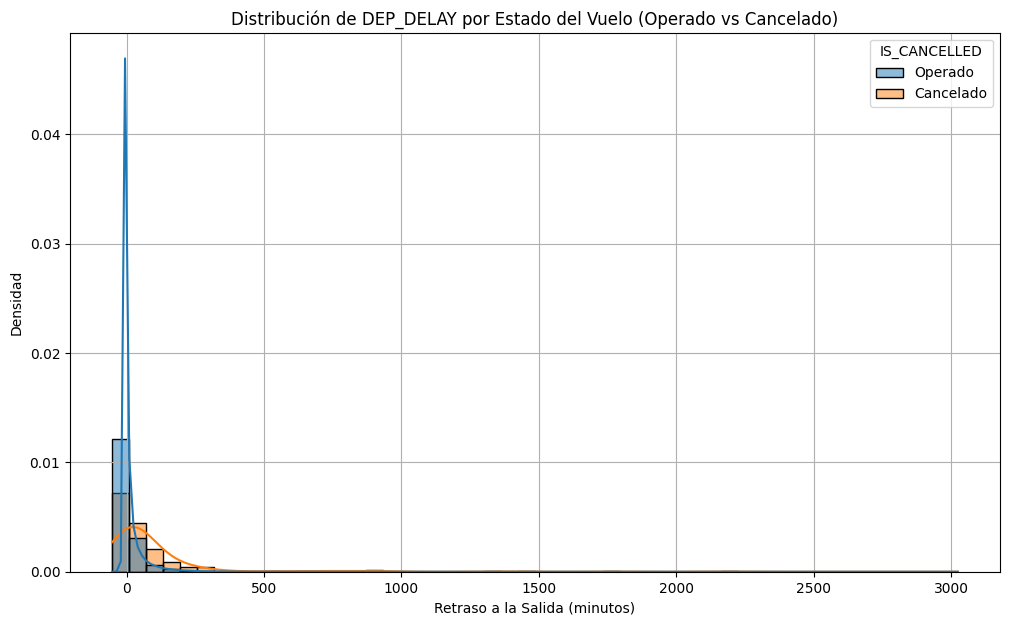


--- Análisis de la distribución de DEP_DELAY por estado del vuelo ---
Observando el histograma:
- La distribución general de DEP_DELAY (combinando operados y cancelados) también está sesgada a la derecha, similar a ARR_DELAY.
- La distribución para vuelos 'Operados' tiene un pico fuerte cerca de cero o valores negativos, indicando que la mayoría sale a tiempo o antes.
- La distribución para vuelos 'Cancelados' muestra que estos vuelos a menudo acumulan un retraso significativo antes de ser cancelados (la distribución está más desplazada hacia la derecha y puede tener múltiples picos).

Esto sugiere que un retraso considerable en la salida es un factor que contribuye a la cancelación de un vuelo.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creando histograma de la columna DEP_DELAY, incluyendo vuelos cancelados y diferenciándolos:")

# Para DEP_DELAY, queremos incluir todos los vuelos (cancelados o no)
# Pero para visualizar la distinción, crearemos una columna de estado simple
flights['IS_CANCELLED'] = flights['CANCELLED'].map({0: 'Operado', 1: 'Cancelado'})

# Asegurarse de que la columna DEP_DELAY no tenga nulos para el histograma (aunque ya lo manejamos)
dep_delay_data = flights['DEP_DELAY'].dropna()

if not dep_delay_data.empty:
    plt.figure(figsize=(12, 7))
    # Usamos el parámetro 'hue' para diferenciar por la nueva columna IS_CANCELLED
    # Usamos stat='density' y common_norm=False para comparar las distribuciones de cada grupo
    sns.histplot(data=flights.dropna(subset=['DEP_DELAY']), x='DEP_DELAY', hue='IS_CANCELLED',
                 bins=50, kde=True, stat='density', common_norm=False)

    plt.title('Distribución de DEP_DELAY por Estado del Vuelo (Operado vs Cancelado)')
    plt.xlabel('Retraso a la Salida (minutos)')
    plt.ylabel('Densidad') # El eje Y es ahora densidad
    plt.grid(True)
    plt.show()

    print("\n--- Análisis de la distribución de DEP_DELAY por estado del vuelo ---")
    print("Observando el histograma:")
    print("- La distribución general de DEP_DELAY (combinando operados y cancelados) también está sesgada a la derecha, similar a ARR_DELAY.")
    print("- La distribución para vuelos 'Operados' tiene un pico fuerte cerca de cero o valores negativos, indicando que la mayoría sale a tiempo o antes.")
    print("- La distribución para vuelos 'Cancelados' muestra que estos vuelos a menudo acumulan un retraso significativo antes de ser cancelados (la distribución está más desplazada hacia la derecha y puede tener múltiples picos).")
    print("\nEsto sugiere que un retraso considerable en la salida es un factor que contribuye a la cancelación de un vuelo.")

else:
    print("La columna DEP_DELAY no contiene datos válidos (no nulos) en el DataFrame.")

# Opcional: Eliminar la columna temporal 'IS_CANCELLED' si ya no se necesita
# flights.drop('IS_CANCELLED', axis=1, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creando gráfico de densidad de la columna ARR_DELAY:")

# Filtrar vuelos operados y no desviados para analizar el retraso a la llegada
# Estos son los vuelos para los que ARR_DELAY es relevante
operated_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

# Asegurarse de que la columna ARR_DELAY no tenga nulos para el gráfico de densidad
arr_delay_data = operated_flights['ARR_DELAY'].dropna()

if not arr_delay_data.empty:
    plt.figure(figsize=(10, 6))
    # Usamos sns.kdeplot para el gráfico de densidad
    sns.kdeplot(arr_delay_data, fill=True) # fill=True para rellenar el área bajo la curva
    plt.title('Distribución de ARR_DELAY (Retraso a la Llegada) - Gráfico de Densidad')
    plt.xlabel('Retraso a la Llegada (minutos)')
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.show()

    print("\n--- Análisis de la distribución de ARR_DELAY ---")
    print("Observando el gráfico de densidad:")
    print("- El gráfico muestra un pico pronunciado cerca de 0 o en valores negativos, lo que indica que una gran proporción de vuelos llega a tiempo o incluso antes de lo programado.")
    print("- La distribución tiene una cola larga y extendida hacia la derecha (valores positivos).")
    print("\nConclusión sobre la simetría:")
    print("La distribución de `ARR_DELAY` es **asimétrica positiva (sesgada a la derecha)**. Esto se debe a la larga cola de valores positivos, que representa los vuelos con retrasos significativos que alejan la media de la mediana y la moda.")
    print("Una distribución simétrica, como la distribución normal, tendría una forma de campana con colas que se extienden de manera similar a ambos lados del pico central.")

else:
    print("La columna ARR_DELAY no contiene datos válidos (no nulos) en los vuelos operados y no desviados.")

# Eliminamos la columna temporal IS_CANCELLED si se creó en una ejecución anterior y ya no se necesita.
if 'IS_CANCELLED' in flights.columns:
    flights.drop('IS_CANCELLED', axis=1, inplace=True)

Creando gráfico de densidad de la columna ARR_DELAY:



--- Análisis de la distribución de ARR_DELAY ---
Observando el gráfico de densidad:
- El gráfico muestra un pico pronunciado cerca de 0 o en valores negativos, lo que indica que una gran proporción de vuelos llega a tiempo o incluso antes de lo programado.
- La distribución tiene una cola larga y extendida hacia la derecha (valores positivos).

Conclusión sobre la simetría:
La distribución de `ARR_DELAY` es **asimétrica positiva (sesgada a la derecha)**. Esto se debe a la larga cola de valores positivos, que representa los vuelos con retrasos significativos que alejan la media de la mediana y la moda.
Una distribución simétrica, como la distribución normal, tendría una forma de campana con colas que se extienden de manera similar a ambos lados del pico central.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creando gráfico de densidad de la columna DEP_DELAY:")

# Para DEP_DELAY, queremos incluir todos los vuelos (cancelados o no) para ver la distribución general de los retrasos de salida.
# Asegurarse de que la columna DEP_DELAY no tenga nulos para el gráfico de densidad
dep_delay_data = flights['DEP_DELAY'].dropna()

if not dep_delay_data.empty:
    plt.figure(figsize=(10, 6))
    # Usamos sns.kdeplot para el gráfico de densidad
    sns.kdeplot(dep_delay_data, fill=True) # fill=True para rellenar el área bajo la curva
    plt.title('Distribución de DEP_DELAY (Retraso a la Salida) - Gráfico de Densidad')
    plt.xlabel('Retraso a la Salida (minutos)')
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.show()

    print("\n--- Análisis de la distribución de DEP_DELAY ---")
    print("Observando el gráfico de densidad:")
    print("- Similar a ARR_DELAY, la distribución de DEP_DELAY también muestra un pico cerca de 0 o en valores negativos, indicando que una gran proporción de vuelos sale a tiempo o incluso antes de lo programado.")
    print("- La distribución tiene una cola larga y extendida hacia la derecha (valores positivos), lo que indica la presencia de vuelos con retrasos significativos en la salida.")
    print("\nConclusión sobre la simetría:")
    print("La distribución de `DEP_DELAY` es **asimétrica positiva (sesgada a la derecha)**. Esto se debe a la presencia de vuelos con retrasos considerables que extienden la cola de la distribución hacia valores positivos.")


else:
    print("La columna DEP_DELAY no contiene datos válidos (no nulos) en el DataFrame.")

Creando gráfico de densidad de la columna DEP_DELAY:



--- Análisis de la distribución de DEP_DELAY ---
Observando el gráfico de densidad:
- Similar a ARR_DELAY, la distribución de DEP_DELAY también muestra un pico cerca de 0 o en valores negativos, indicando que una gran proporción de vuelos sale a tiempo o incluso antes de lo programado.
- La distribución tiene una cola larga y extendida hacia la derecha (valores positivos), lo que indica la presencia de vuelos con retrasos significativos en la salida.

Conclusión sobre la simetría:
La distribución de `DEP_DELAY` es **asimétrica positiva (sesgada a la derecha)**. Esto se debe a la presencia de vuelos con retrasos considerables que extienden la cola de la distribución hacia valores positivos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Creando histograma de la columna ARR_DELAY con intervalos de 5 minutos:")

# Filtrar vuelos operados y no desviados para analizar el retraso a la llegada
operated_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

# Asegurarse de que la columna ARR_DELAY no tenga nulos para el histograma
arr_delay_data = operated_flights['ARR_DELAY'].dropna()

if not arr_delay_data.empty:
    # Determinar los bins (intervalos) de 5 minutos
    # Encontramos los valores mínimo y máximo para definir el rango de los bins
    min_delay = np.floor(arr_delay_data.min() / 5) * 5
    max_delay = np.ceil(arr_delay_data.max() / 5) * 5
    bins = np.arange(min_delay, max_delay + 5, 5) # Crear bins de 5 en 5

    plt.figure(figsize=(12, 7))
    sns.histplot(arr_delay_data, bins=bins, kde=False) # kde=False para solo mostrar el histograma
    plt.title('Distribución de ARR_DELAY (Retraso a la Llegada) con Intervalos de 5 minutos')
    plt.xlabel('Retraso a la Llegada (minutos)')
    plt.ylabel('Frecuencia')
    plt.grid(True, axis='y', alpha=0.7) # Mejorar la cuadrícula
    plt.show()

    print("\n--- Análisis del Histograma de ARR_DELAY (intervalos de 5 minutos) ---")
    print("Observando el histograma con intervalos de 5 minutos:")
    print("- Se puede ver más claramente la concentración de vuelos alrededor de 0 o en valores negativos, que representan llegadas a tiempo o antes.")
    print("- La forma de la distribución sigue siendo claramente asimétrica positiva, con una cola larga de retrasos positivos.")
    print("- Los intervalos de 5 minutos permiten observar con mayor detalle la frecuencia de retrasos o anticipaciones dentro de rangos más específicos.")


else:
    print("La columna ARR_DELAY no contiene datos válidos (no nulos) en los vuelos operados y no desviados.")

Creando histograma de la columna ARR_DELAY con intervalos de 5 minutos:



--- Análisis del Histograma de ARR_DELAY (intervalos de 5 minutos) ---
Observando el histograma con intervalos de 5 minutos:
- Se puede ver más claramente la concentración de vuelos alrededor de 0 o en valores negativos, que representan llegadas a tiempo o antes.
- La forma de la distribución sigue siendo claramente asimétrica positiva, con una cola larga de retrasos positivos.
- Los intervalos de 5 minutos permiten observar con mayor detalle la frecuencia de retrasos o anticipaciones dentro de rangos más específicos.


Creando gráficos de densidad para los minutos por causa de retraso (vuelos con retraso aparente):

Generando gráficos de densidad por causa:



--- Análisis de la distribución de Minutos de Retraso: Aerolínea ---
Observando el gráfico de densidad:
- La distribución de los minutos de retraso para 'Aerolínea' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).


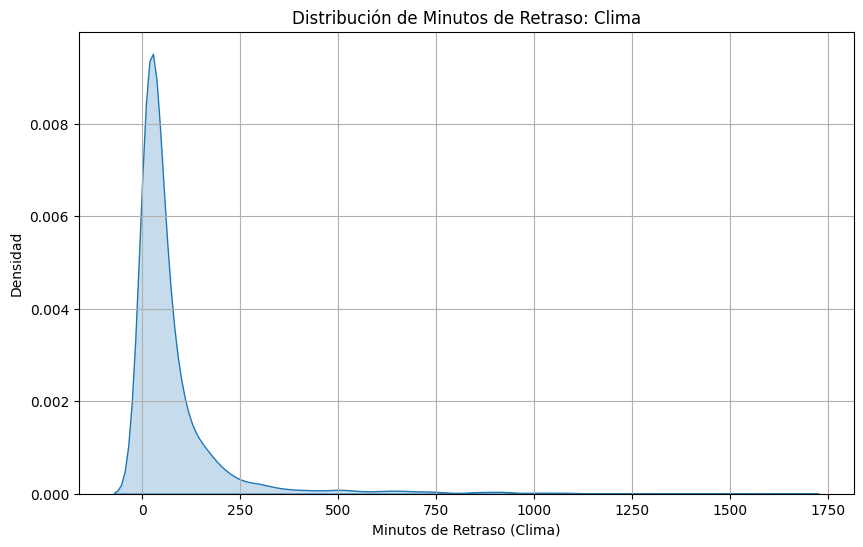


--- Análisis de la distribución de Minutos de Retraso: Clima ---
Observando el gráfico de densidad:
- La distribución de los minutos de retraso para 'Clima' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).


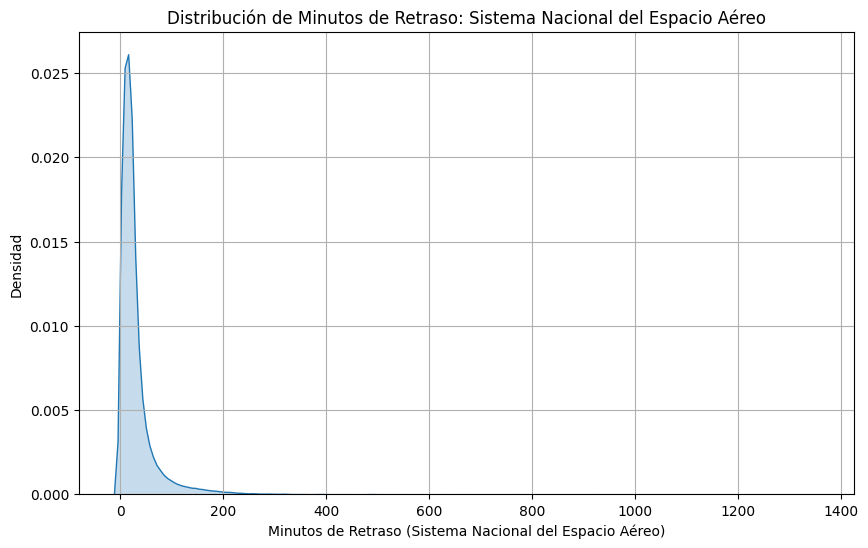


--- Análisis de la distribución de Minutos de Retraso: Sistema Nacional del Espacio Aéreo ---
Observando el gráfico de densidad:
- La distribución de los minutos de retraso para 'Sistema Nacional del Espacio Aéreo' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).


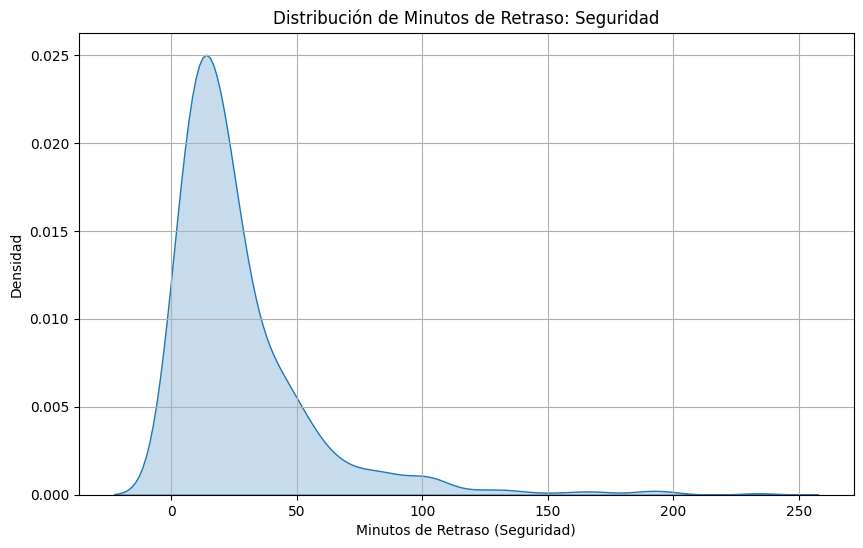


--- Análisis de la distribución de Minutos de Retraso: Seguridad ---
Observando el gráfico de densidad:
- La distribución de los minutos de retraso para 'Seguridad' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).


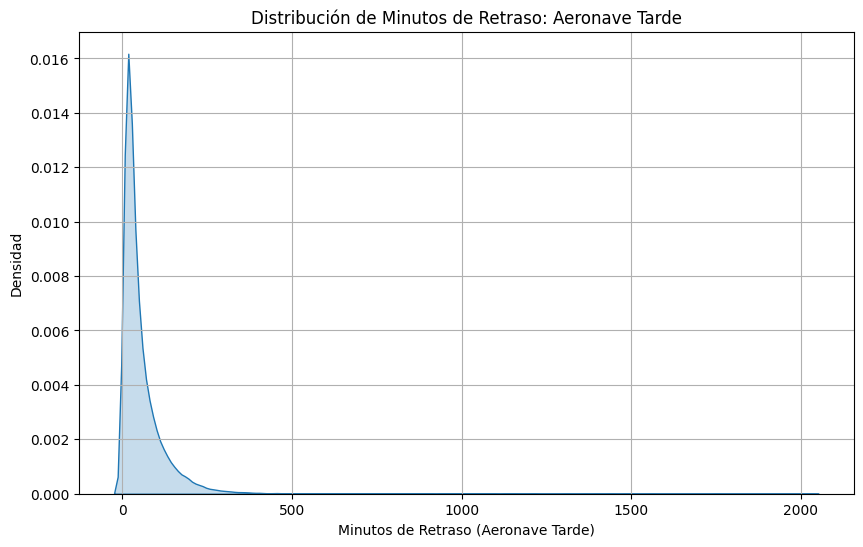


--- Análisis de la distribución de Minutos de Retraso: Aeronave Tarde ---
Observando el gráfico de densidad:
- La distribución de los minutos de retraso para 'Aeronave Tarde' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).


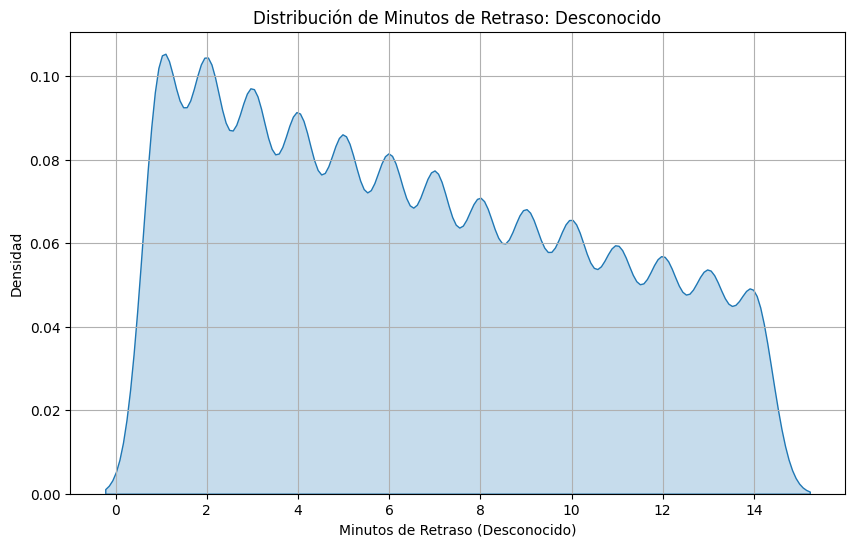


--- Análisis de la distribución de Minutos de Retraso: Desconocido ---
Observando el gráfico de densidad:
- La distribución de los minutos de retraso para 'Desconocido' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Creando gráficos de densidad para los minutos por causa de retraso (vuelos con retraso aparente):")

# Filtrar vuelos operados y no desviados, ya que las causas de retraso aplican a estos.
# Adicionalmente, enfocarnos en vuelos con ARR_DELAY > 0 para "retraso aparente".
# Usaremos el DataFrame 'delayed_flights' creado anteriormente (celda 204b5d13)
# Si 'delayed_flights' no existe, lo creamos para asegurar la ejecución independiente de la celda.
if 'delayed_flights' not in globals() or delayed_flights.empty:
     print("Creando DataFrame 'delayed_flights' (vuelos operados, no desviados con ARR_DELAY > 0)...")
     delayed_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0) & (flights['ARR_DELAY'] > 0)].copy()
     if delayed_flights.empty:
         print("No se encontraron vuelos retrasados, operados y no desviados para analizar.")
     else:
         print(f"Número de vuelos con retraso aparente: {len(delayed_flights)}")


if not delayed_flights.empty:
    # Columnas de causas de retraso
    delay_cause_columns = [
        'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER',
        'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT',
        'DELAY_DUE_UNKNOWN'
    ]

    # Mapeo para nombres más legibles en los títulos/etiquetas
    delay_cause_names = {
        'DELAY_DUE_CARRIER': 'Aerolínea',
        'DELAY_DUE_WEATHER': 'Clima',
        'DELAY_DUE_NAS': 'Sistema Nacional del Espacio Aéreo',
        'DELAY_DUE_SECURITY': 'Seguridad',
        'DELAY_DUE_LATE_AIRCRAFT': 'Aeronave Tarde',
        'DELAY_DUE_UNKNOWN': 'Desconocido'
    }


    # Crear un gráfico de densidad para cada columna de causa de retraso
    # Excluiremos los valores 0.0 de las causas de retraso para ver la distribución solo cuando hay retraso por esa causa
    # Usaremos una figura y ejes para tener control sobre múltiples plots si es necesario, aunque aquí haremos uno por causa.

    print("\nGenerando gráficos de densidad por causa:")

    for col in delay_cause_columns:
        # Filtrar solo los valores de retraso positivos para esta causa específica
        cause_delay_data = delayed_flights[delayed_flights[col] > 0][col].dropna()

        if not cause_delay_data.empty:
            plt.figure(figsize=(10, 6))
            sns.kdeplot(cause_delay_data, fill=True)
            plt.title(f'Distribución de Minutos de Retraso: {delay_cause_names.get(col, col)}')
            plt.xlabel(f'Minutos de Retraso ({delay_cause_names.get(col, col)})')
            plt.ylabel('Densidad')
            plt.grid(True)
            plt.show()

            print(f"\n--- Análisis de la distribución de Minutos de Retraso: {delay_cause_names.get(col, col)} ---")
            # Comentar sobre la simetría o forma general
            print("Observando el gráfico de densidad:")
            # (Aquí se podría añadir un comentario específico si se ve un patrón inusual)
            print(f"- La distribución de los minutos de retraso para '{delay_cause_names.get(col, col)}' muestra cómo se distribuyen las magnitudes de los retrasos cuando esta causa está presente (valor > 0).")
            # Nota general: la mayoría de estas distribuciones también estarán sesgadas a la derecha.

        else:
            print(f"La columna '{delay_cause_names.get(col, col)}' no contiene retrasos positivos (> 0) en el subconjunto de vuelos retrasados, operados y no desviados.")


else:
    print("No se pudo generar gráficos de densidad: El DataFrame 'delayed_flights' está vacío o no contiene datos válidos.")

## Calcular medidas de dispersión

In [ ]:
import pandas as pd
import numpy as np

print("Calculando medidas de dispersión (desviación estándar, varianza, IQR) para variables clave de retraso:")

# Variables clave de retraso a analizar
delay_variables = ['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'ELAPSED_TIME', 'CRS_ELAPSED_TIME']

# Filtrar vuelos operados y no desviados para variables de tiempo (ARR_DELAY, TAXI_IN, AIR_TIME, ELAPSED_TIME)
# Para DEP_DELAY, TAXI_OUT, CRS_ELAPSED_TIME podemos usar todos los vuelos
# Sin embargo, para consistencia y dado que las medidas de dispersión son sensibles a nulos,
# calcularemos sobre los valores no nulos de cada columna.

dispersion_stats = {}

for col in delay_variables:
    print(f"\n--- Estadísticas de dispersión para {col} ---")

    # Usar solo valores no nulos para el cálculo
    col_data = flights[col].dropna()

    if not col_data.empty:
        # Desviación estándar
        std_dev = col_data.std()
        print(f"Desviación Estándar: {std_dev:.2f}")

        # Varianza
        variance = col_data.var()
        print(f"Varianza: {variance:.2f}") # La varianza es el cuadrado de la desviación estándar

        # Rango Intercuartílico (IQR)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        iqr = Q3 - Q1
        print(f"Rango Intercuartílico (IQR): {iqr:.2f}")

        # Almacenar los resultados en un diccionario
        dispersion_stats[col] = {
            'Desviación Estándar': std_dev,
            'Varianza': variance,
            'IQR': iqr
        }
    else:
        print(f"No hay datos no nulos en la columna {col} para calcular estadísticas de dispersión.")

# Convertir el diccionario a DataFrame para una mejor visualización (opcional)
if dispersion_stats:
    print("\nResumen de estadísticas de dispersión:")
    dispersion_df = pd.DataFrame(dispersion_stats).T # Transponer para que las variables sean las filas
    display(dispersion_df)
else:
    print("\nNo se pudieron calcular estadísticas de dispersión para ninguna columna.")

print("\n--- Interpretación de las medidas de dispersión ---")
print("- La **Desviación Estándar** y la **Varianza** indican cuánto se dispersan los datos alrededor de la media. Un valor más alto significa mayor variabilidad.")
print("- El **Rango Intercuartílico (IQR)** representa el rango de los valores intermedios (entre el percentil 25 y 75). Es menos sensible a los valores atípicos que la desviación estándar o la varianza.")
print("\nComparando estas medidas entre las variables de retraso nos ayudará a entender cuáles tienen una mayor variabilidad en sus tiempos.")

Calculando medidas de dispersión (desviación estándar, varianza, IQR) para variables clave de retraso:

--- Estadísticas de dispersión para DEP_DELAY ---
Desviación Estándar: 55.44
Varianza: 3073.14
Rango Intercuartílico (IQR): 16.00

--- Estadísticas de dispersión para ARR_DELAY ---
Desviación Estándar: 57.40
Varianza: 3294.39
Rango Intercuartílico (IQR): 26.00

--- Estadísticas de dispersión para TAXI_OUT ---
Desviación Estándar: 10.62
Varianza: 112.88
Rango Intercuartílico (IQR): 9.00

--- Estadísticas de dispersión para TAXI_IN ---
Desviación Estándar: 6.42
Varianza: 41.17
Rango Intercuartílico (IQR): 5.00

--- Estadísticas de dispersión para AIR_TIME ---
Desviación Estándar: 71.81
Varianza: 5156.86
Rango Intercuartílico (IQR): 83.00

--- Estadísticas de dispersión para ELAPSED_TIME ---
Desviación Estándar: 73.88
Varianza: 5458.37
Rango Intercuartílico (IQR): 86.00

--- Estadísticas de dispersión para CRS_ELAPSED_TIME ---
Desviación Estándar: 73.88
Varianza: 5458.33
Rango Intercuar

Desviación Estándar     Varianza   IQR
DEP_DELAY                   55.435948  3073.144294  16.0
ARR_DELAY                   57.396811  3294.393882  26.0
TAXI_OUT                    10.624460   112.879152   9.0
TAXI_IN                      6.416574    41.172423   5.0
AIR_TIME                    71.811305  5156.863521  83.0
ELAPSED_TIME                73.880806  5458.373450  86.0
CRS_ELAPSED_TIME            73.880516  5458.330694  85.0


--- Interpretación de las medidas de dispersión ---
- La **Desviación Estándar** y la **Varianza** indican cuánto se dispersan los datos alrededor de la media. Un valor más alto significa mayor variabilidad.
- El **Rango Intercuartílico (IQR)** representa el rango de los valores intermedios (entre el percentil 25 y 75). Es menos sensible a los valores atípicos que la desviación estándar o la varianza.

Comparando estas medidas entre las variables de retraso nos ayudará a entender cuáles tienen una mayor variabilidad en sus tiempos.


In [ ]:
import pandas as pd
import numpy as np

print("Calculando medidas de dispersión (desviación estándar, varianza, IQR) para variables clave de retraso por aeropuerto:")

# Variables clave de retraso a analizar
delay_variables = ['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'ELAPSED_TIME'] # Excluimos CRS_ELAPSED_TIME ya que es programado y no varía tanto por operación individual


# Filtrar vuelos operados y no desviados para ARR_DELAY, TAXI_IN, AIR_TIME, ELAPSED_TIME
# Para DEP_DELAY y TAXI_OUT, podemos usar todos los vuelos de salida operados.
# Para simplificar, trabajaremos con vuelos operados y no desviados para las variables de llegada,
# y vuelos operados (cancelados=0) para las de salida.
operated_flights = flights[flights['CANCELLED'] == 0].copy()
operated_non_diverted_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()


print("\n--- Estadísticas de dispersión por Aeropuerto de Origen (ORIGIN) ---")

# Agrupar por origen y calcular estadísticas de dispersión para DEP_DELAY y TAXI_OUT
# Especificamos observed=True ya que la columna es categórica
origin_dispersion_stats = {}
origin_variables = ['DEP_DELAY', 'TAXI_OUT']

for col in origin_variables:
    print(f"\nCalculando estadísticas para {col} por ORIGIN...")
    # Usar vuelos operados para DEP_DELAY y TAXI_OUT por origen
    grouped_by_origin = operated_flights.groupby('ORIGIN', observed=True)[col]

    # Calcular Desviación Estándar, Varianza, Q1, Q3, IQR.
    # Usamos .agg() para aplicar múltiples funciones de agregación.
    # Para la moda usamos una función personalizada si es necesaria, pero aquí solo pedimos medidas de dispersión.
    origin_dispersion_stats[col] = grouped_by_origin.agg(['std', 'var', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})
    origin_dispersion_stats[col]['IQR'] = origin_dispersion_stats[col]['Q3'] - origin_dispersion_stats[col]['Q1']


print("\nResumen de estadísticas de dispersión por ORIGIN (primeras filas):")
# Podemos mostrar las tablas resultantes para cada variable de origen
for col in origin_variables:
    print(f"\n{col} Estadísticas por ORIGIN:")
    display(origin_dispersion_stats[col].head())


print("\n--- Estadísticas de dispersión por Aeropuerto de Destino (DEST) ---")

# Agrupar por destino y calcular estadísticas de dispersión para ARR_DELAY, TAXI_IN, AIR_TIME, ELAPSED_TIME
# Especificamos observed=True ya que la columna es categórica
dest_dispersion_stats = {}
dest_variables = ['ARR_DELAY', 'TAXI_IN', 'AIR_TIME', 'ELAPSED_TIME']

for col in dest_variables:
    print(f"\nCalculando estadísticas para {col} por DEST...")
    # Usar vuelos operados y no desviados para variables de llegada por destino
    grouped_by_dest = operated_non_diverted_flights.groupby('DEST', observed=True)[col]

    # Calcular Desviación Estándar, Varianza, Q1, Q3, IQR.
    dest_dispersion_stats[col] = grouped_by_dest.agg(['std', 'var', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})
    dest_dispersion_stats[col]['IQR'] = dest_dispersion_stats[col]['Q3'] - dest_dispersion_stats[col]['Q1']


print("\nResumen de estadísticas de dispersión por DEST (primeras filas):")
# Podemos mostrar las tablas resultantes para cada variable de destino
for col in dest_variables:
    print(f"\n{col} Estadísticas por DEST:")
    display(dest_dispersion_stats[col].head())


print("\n--- Interpretación ---")
print("Estas tablas muestran cómo varía la dispersión de los tiempos de retraso y operación (TAXI_OUT, TAXI_IN, AIR_TIME, ELAPSED_TIME) entre los diferentes aeropuertos.")
print("Aeropuertos con mayor desviación estándar o varianza en DEP_DELAY/TAXI_OUT pueden indicar mayor imprevisibilidad en las operaciones de salida.")
print("Aeropuertos con mayor desviación estándar o varianza en ARR_DELAY/TAXI_IN/AIR_TIME/ELAPSED_TIME pueden indicar mayor variabilidad en los tiempos de llegada o en tierra.")
print("El IQR proporciona una medida de dispersión robusta, menos afectada por valores extremos.")

print("\nAnálisis de dispersión por aeropuerto completado.")

Calculando medidas de dispersión (desviación estándar, varianza, IQR) para variables clave de retraso por aeropuerto:

--- Estadísticas de dispersión por Aeropuerto de Origen (ORIGIN) ---

Calculando estadísticas para DEP_DELAY por ORIGIN...

Calculando estadísticas para TAXI_OUT por ORIGIN...

Resumen de estadísticas de dispersión por ORIGIN (primeras filas):

DEP_DELAY Estadísticas por ORIGIN:


std          var     Q1    Q3    IQR
ORIGIN                                            
ABE     51.246969  2626.251843 -10.00 -1.00   9.00
ABI     86.817067  7537.203122  -6.50  8.00  14.50
ABQ     65.008341  4226.084414  -7.00  4.00  11.00
ABR     68.087843  4635.954325  -8.00 -0.25   7.75
ABY     56.171207  3155.204456  -5.75 -3.00   2.75


TAXI_OUT Estadísticas por ORIGIN:


std         var     Q1    Q3    IQR
ORIGIN                                           
ABE      9.390790   88.186937  11.00  17.0   6.00
ABI      9.379705   87.978869   7.00  11.0   4.00
ABQ      6.992500   48.895056  10.00  17.0   7.00
ABR      9.273504   85.997883  14.25  26.0  11.75
ABY     12.472964  155.574827  10.25  16.0   5.75


--- Estadísticas de dispersión por Aeropuerto de Destino (DEST) ---

Calculando estadísticas para ARR_DELAY por DEST...

Calculando estadísticas para TAXI_IN por DEST...

Calculando estadísticas para AIR_TIME por DEST...

Calculando estadísticas para ELAPSED_TIME por DEST...

Resumen de estadísticas de dispersión por DEST (primeras filas):

ARR_DELAY Estadísticas por DEST:


std           var    Q1    Q3   IQR
DEST                                            
ABE    53.149576   2824.877446 -14.0   6.0  20.0
ABI    26.457434    699.995788  -6.0   7.0  13.0
ABQ    36.343460   1320.847088 -11.0  10.0  21.0
ABR    20.917653    437.548217 -29.5  -5.0  24.5
ABY   121.639083  14796.066396 -13.0  -1.5  11.5


TAXI_IN Estadísticas por DEST:


std       var   Q1   Q3  IQR
DEST                                   
ABE   1.182799  1.399013  4.0  5.0  1.0
ABI   1.353533  1.832051  3.0  4.0  1.0
ABQ   2.887034  8.334967  4.0  6.0  2.0
ABR   1.110757  1.233781  3.0  4.0  1.0
ABY   0.952737  0.907709  3.0  4.0  1.0


AIR_TIME Estadísticas por DEST:


std          var    Q1     Q3   IQR
DEST                                           
ABE   24.661596   608.194308  78.0  121.0  43.0
ABI    2.083952     4.342857  32.0   35.0   3.0
ABQ   37.763795  1426.104191  58.0   98.0  40.0
ABR    4.047353    16.381064  44.0   48.0   4.0
ABY    3.692343    13.633394  29.0   33.0   4.0


ELAPSED_TIME Estadísticas por DEST:


std          var     Q1     Q3   IQR
DEST                                            
ABE   22.550807   508.538903  105.0  140.0  35.0
ABI   10.704121   114.578205   50.0   59.0   9.0
ABQ   39.923344  1593.873418   78.0  122.0  44.0
ABR   14.771709   218.203390   63.0   79.0  16.0
ABY    7.369062    54.303071   48.0   55.0   7.0


--- Interpretación ---
Estas tablas muestran cómo varía la dispersión de los tiempos de retraso y operación (TAXI_OUT, TAXI_IN, AIR_TIME, ELAPSED_TIME) entre los diferentes aeropuertos.
Aeropuertos con mayor desviación estándar o varianza en DEP_DELAY/TAXI_OUT pueden indicar mayor imprevisibilidad en las operaciones de salida.
Aeropuertos con mayor desviación estándar o varianza en ARR_DELAY/TAXI_IN/AIR_TIME/ELAPSED_TIME pueden indicar mayor variabilidad en los tiempos de llegada o en tierra.
El IQR proporciona una medida de dispersión robusta, menos afectada por valores extremos.

Análisis de dispersión por aeropuerto completado.


In [ ]:
import pandas as pd
import numpy as np

print("Calculando medidas de dispersión (desviación estándar, varianza, IQR) para la variable CANCELLED por aerolínea:")

# Agrupar por AIRLINE_CODE y calcular estadísticas de dispersión para CANCELLED
# Especificamos observed=True ya que la columna es categórica
# CANCELLED es una variable binaria (0 o 1).
# La media de una variable binaria es la proporción de 1s (tasa de cancelación).
# La desviación estándar y la varianza en este contexto reflejan la dispersión de esa proporción.
# El IQR para una variable binaria puede ser 0 o 1.

grouped_by_airline_cancelled = flights.groupby('AIRLINE_CODE', observed=True)['CANCELLED']

# Calcular Desviación Estándar, Varianza, Q1, Q3, IQR.
# Usamos .agg() para aplicar múltiples funciones de agregación.
airline_cancelled_dispersion = grouped_by_airline_cancelled.agg(['std', 'var', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})
airline_cancelled_dispersion['IQR'] = airline_cancelled_dispersion['Q3'] - airline_cancelled_dispersion['Q1']

print("\nEstadísticas de dispersión para CANCELLED por Aerolínea:")
display(airline_cancelled_dispersion)

print("\n--- Interpretación ---")
print("Para la variable binaria 'CANCELLED' (0 para no cancelado, 1 para cancelado), las estadísticas de dispersión por aerolínea se interpretan de la siguiente manera:")
print("- La **Media** (no mostrada directamente aquí, pero es el mismo cálculo que 'std' o 'var' en este contexto) representa la **tasa de cancelación** para cada aerolínea.")
print("- La **Desviación Estándar** y la **Varianza** indican la dispersión de la tasa de cancelación alrededor de la media de cada aerolínea. Un valor más alto sugiere una mayor variabilidad en el comportamiento de cancelación dentro de esa aerolínea (más 'mezcla' de 0s y 1s).")
print("- El **Rango Intercuartílico (IQR)** para una variable binaria generalmente será 0 (si el Q1 y Q3 son ambos 0 o ambos 1) o 1 (si Q1 es 0 y Q3 es 1). Un IQR de 1 indica que la distribución de 0s y 1s se extiende a través de los cuartiles intermedios.")

print("\nAnálisis de dispersión de CANCELLED por aerolínea completado.")

Calculando medidas de dispersión (desviación estándar, varianza, IQR) para la variable CANCELLED por aerolínea:

Estadísticas de dispersión para CANCELLED por Aerolínea:


std       var   Q1   Q3  IQR
AIRLINE_CODE                                   
9E            0.120397  0.014496  0.0  0.0  0.0
AA            0.136150  0.018537  0.0  0.0  0.0
AS            0.118074  0.013941  0.0  0.0  0.0
B6            0.090968  0.008275  0.0  0.0  0.0
DL            0.087946  0.007735  0.0  0.0  0.0
F9            0.178564  0.031885  0.0  0.0  0.0
G4            0.114770  0.013172  0.0  0.0  0.0
HA            0.103136  0.010637  0.0  0.0  0.0
MQ            0.157858  0.024919  0.0  0.0  0.0
NK            0.150466  0.022640  0.0  0.0  0.0
OH            0.126152  0.015914  0.0  0.0  0.0
OO            0.179082  0.032070  0.0  0.0  0.0
UA            0.085272  0.007271  0.0  0.0  0.0
WN            0.167145  0.027937  0.0  0.0  0.0
YX            0.124589  0.015522  0.0  0.0  0.0


--- Interpretación ---
Para la variable binaria 'CANCELLED' (0 para no cancelado, 1 para cancelado), las estadísticas de dispersión por aerolínea se interpretan de la siguiente manera:
- La **Media** (no mostrada directamente aquí, pero es el mismo cálculo que 'std' o 'var' en este contexto) representa la **tasa de cancelación** para cada aerolínea.
- La **Desviación Estándar** y la **Varianza** indican la dispersión de la tasa de cancelación alrededor de la media de cada aerolínea. Un valor más alto sugiere una mayor variabilidad en el comportamiento de cancelación dentro de esa aerolínea (más 'mezcla' de 0s y 1s).
- El **Rango Intercuartílico (IQR)** para una variable binaria generalmente será 0 (si el Q1 y Q3 son ambos 0 o ambos 1) o 1 (si Q1 es 0 y Q3 es 1). Un IQR de 1 indica que la distribución de 0s y 1s se extiende a través de los cuartiles intermedios.

Análisis de dispersión de CANCELLED por aerolínea completado.


## Calcular correlaciones

Calculando la matriz de correlación de Pearson para las variables numéricas:

Matriz de Correlación de Pearson:


DEP_DELAY  ARR_DELAY  TAXI_OUT   TAXI_IN  AIR_TIME  \
DEP_DELAY                 1.000000   0.966316  0.061430  0.015914  0.026161   
ARR_DELAY                 0.966316   1.000000  0.211084  0.101097  0.018331   
TAXI_OUT                  0.061430   0.211084  1.000000  0.022882  0.042643   
TAXI_IN                   0.015914   0.101097  0.022882  1.000000  0.086682   
AIR_TIME                  0.026161   0.018331  0.042643  0.086682  1.000000   
ELAPSED_TIME              0.035594   0.056906  0.187061  0.174214  0.985631   
CRS_ELAPSED_TIME          0.028589  -0.001132  0.068403  0.107073  0.988597   
DISTANCE                  0.028338   0.005374  0.031835  0.080801  0.977407   
DELAY_DUE_CARRIER         0.689862   0.680953  0.068516  0.027603  0.024096   
DELAY_DUE_WEATHER         0.324453   0.330195  0.087260  0.014192 -0.013544   
DELAY_DUE_NAS             0.263138   0.353325  0.324126  0.192879  0.051382   
DELAY_DUE_SECURITY        0.024917   0.026809  0.009110  0.004861  0.008519   
DELAY_DUE_LATE_AIRCRAFT   0.586262   0.577162  0.033653  0.019894  0.003168   
DELAY_DUE_UNKNOWN        -0.043418   0.007480  0.087059  0.057649  0.025165   

                         ELAPSED_TIME  CRS_ELAPSED_TIME  DISTANCE  \
DEP_DELAY                    0.035594          0.028589  0.028338   
ARR_DELAY                    0.056906         -0.001132  0.005374   
TAXI_OUT                     0.187061          0.068403  0.031835   
TAXI_IN                      0.174214          0.107073  0.080801   
AIR_TIME                     0.985631          0.988597  0.977407   
ELAPSED_TIME                 1.000000          0.980034  0.961616   
CRS_ELAPSED_TIME             0.980034          1.000000  0.976368   
DISTANCE                     0.961616          0.976368  1.000000   
DELAY_DUE_CARRIER            0.035803          0.022097  0.021741   
DELAY_DUE_WEATHER            0.000879         -0.013750 -0.014051   
DELAY_DUE_NAS                0.113922          0.029664  0.027537   
DELAY_DUE_SECURITY           0.010017          0.007644  0.006764   
DELAY_DUE_LATE_AIRCRAFT      0.009759          0.000096  0.003770   
DELAY_DUE_UNKNOWN            0.042073          0.005187  0.012066   

                         DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
DEP_DELAY                         0.689862           0.324453       0.263138   
ARR_DELAY                         0.680953           0.330195       0.353325   
TAXI_OUT                          0.068516           0.087260       0.324126   
TAXI_IN                           0.027603           0.014192       0.192879   
AIR_TIME                          0.024096          -0.013544       0.051382   
ELAPSED_TIME                      0.035803           0.000879       0.113922   
CRS_ELAPSED_TIME                  0.022097          -0.013750       0.029664   
DISTANCE                          0.021741          -0.014051       0.027537   
DELAY_DUE_CARRIER                 1.000000          -0.006247       0.017620   
DELAY_DUE_WEATHER                -0.006247           1.000000       0.028716   
DELAY_DUE_NAS                     0.017620           0.028716       1.000000   
DELAY_DUE_SECURITY               -0.003159          -0.001471       0.003235   
DELAY_DUE_LATE_AIRCRAFT           0.045155           0.005740       0.025262   
DELAY_DUE_UNKNOWN                      NaN                NaN            NaN   

                         DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  \
DEP_DELAY                          0.024917                 0.586262   
ARR_DELAY                          0.026809                 0.577162   
TAXI_OUT                           0.009110                 0.033653   
TAXI_IN                            0.004861                 0.019894   
AIR_TIME                           0.008519                 0.003168   
ELAPSED_TIME                       0.010017                 0.009759   
CRS_ELAPSED_TIME                   0.007644                 0.000096   
DISTANCE                  


Visualizando la matriz de correlación:


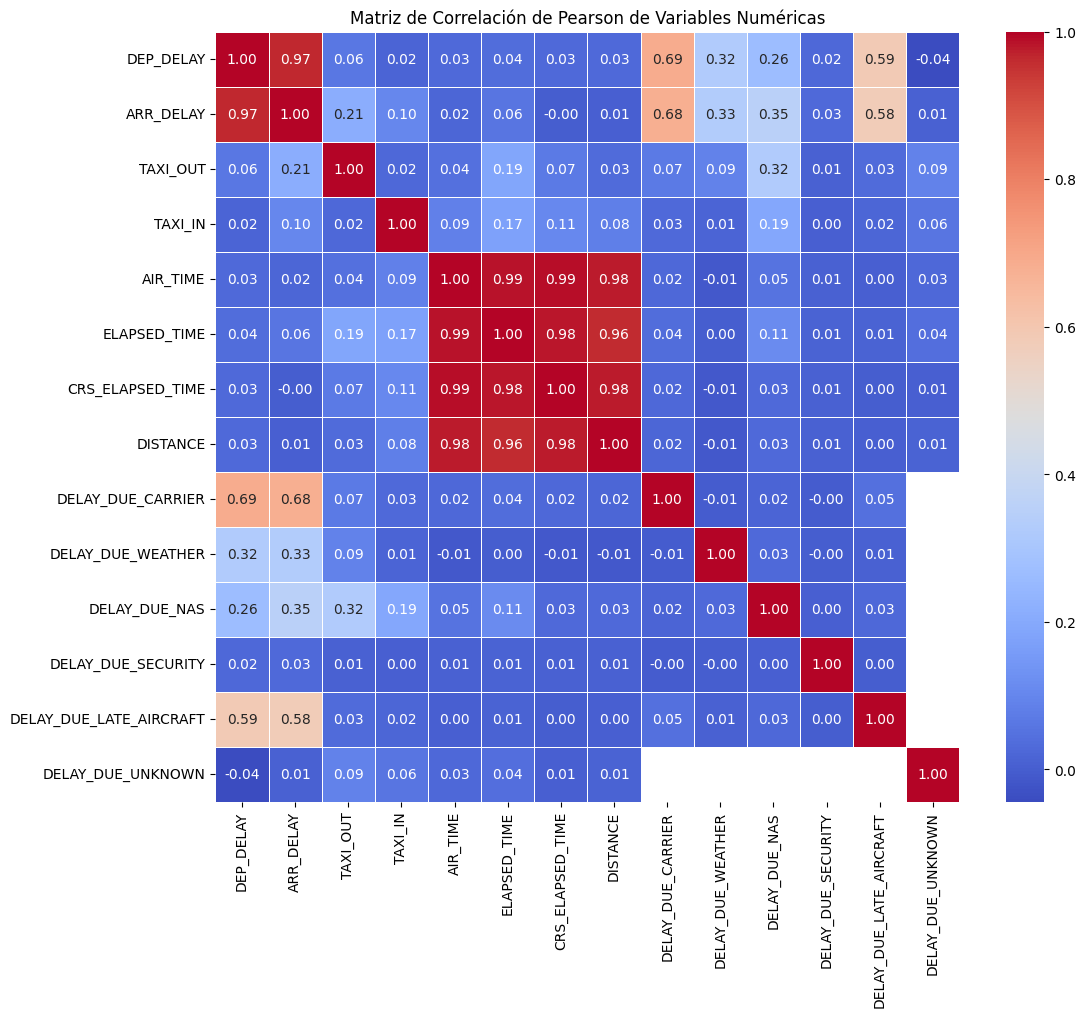


--- Interpretación ---
Los valores en la matriz de correlación varían de -1 a +1.
- Valores cercanos a +1 indican una fuerte correlación lineal positiva (cuando una variable aumenta, la otra también tiende a aumentar).
- Valores cercanos a -1 indican una fuerte correlación lineal negativa (cuando una variable aumenta, la otra tiende a disminuir).
- Valores cercanos a 0 indican poca o ninguna correlación lineal.

Observa las correlaciones entre las variables de retraso (DEP_DELAY, ARR_DELAY) y otras variables operacionales y de causa para identificar posibles relaciones.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Calculando la matriz de correlación de Pearson para las variables numéricas:")

# Seleccionar solo las columnas numéricas del DataFrame
# Excluiremos las columnas binarias (CANCELLED, DIVERTED) y las de código (DOT_CODE, FL_NUMBER)
# a menos que se desee incluirlas específicamente en el análisis de correlación.
# También excluiremos las columnas de fecha/hora en formato HHMM si no se tratan como numéricas continuas.
# Las columnas de causa de retraso (DELAY_DUE_...) y DELAY_DUE_UNKNOWN son numéricas y relevantes.
# Las columnas de año, mes, día (FL_YEAR, FL_MONTH, FL_DAY) son numéricas pero pueden tener interpretaciones especiales en correlación.
# Nos enfocaremos en las variables de tiempo de vuelo, retraso y distancia para este primer cálculo.

numerical_cols_for_correlation = [
    'DEP_DELAY',
    'ARR_DELAY',
    'TAXI_OUT',
    'TAXI_IN',
    'AIR_TIME',
    'ELAPSED_TIME',
    'CRS_ELAPSED_TIME',
    'DISTANCE',
    # Incluir causas de retraso también puede ser interesante
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'DELAY_DUE_UNKNOWN'
]

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
# Asegurarnos de que todas las columnas seleccionadas existen en el DataFrame
existing_numerical_cols = [col for col in numerical_cols_for_correlation if col in flights.columns]
flights_numerical = flights[existing_numerical_cols]

# Calcular la matriz de correlación de Pearson
# Usamos .corr(method='pearson') explícitamente aunque 'pearson' es el valor por defecto
correlation_matrix = flights_numerical.corr(method='pearson')

print("\nMatriz de Correlación de Pearson:")
display(correlation_matrix)

# Opcional: Visualizar la matriz de correlación usando un mapa de calor (heatmap)
print("\nVisualizando la matriz de correlación:")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Pearson de Variables Numéricas')
plt.show()

print("\n--- Interpretación ---")
print("Los valores en la matriz de correlación varían de -1 a +1.")
print("- Valores cercanos a +1 indican una fuerte correlación lineal positiva (cuando una variable aumenta, la otra también tiende a aumentar).")
print("- Valores cercanos a -1 indican una fuerte correlación lineal negativa (cuando una variable aumenta, la otra tiende a disminuir).")
print("- Valores cercanos a 0 indican poca o ninguna correlación lineal.")
print("\nObserva las correlaciones entre las variables de retraso (DEP_DELAY, ARR_DELAY) y otras variables operacionales y de causa para identificar posibles relaciones.")

#Aplicar tecnica de analisis

## Aplicar segmentación

In [ ]:
# === Rutas frecuentes con retrasos (1 celda ejecutable) ===
import pandas as pd
import numpy as np

print(">> Análisis de rutas con retrasos frecuentes\n")

# 0) Base: usa fl si ya existe; si no, créalo desde flights
if 'fl' not in locals():
    fl = flights.copy()

# Asegurar tipos y columnas clave
# FL_DATE (si existe) a datetime para futuros cortes temporales
if 'FL_DATE' in fl.columns:
    fl['FL_DATE'] = pd.to_datetime(fl['FL_DATE'], errors='coerce')
else:
    # Si no hay FL_DATE, creamos una ficticia solo para poder contar con .agg('count')
    fl['FL_DATE'] = pd.Timestamp('2000-01-01')

# Convertir DEP_DELAY / ARR_DELAY a numérico por si llegaron como string
for col in ['DEP_DELAY','ARR_DELAY']:
    if col in fl.columns:
        fl[col] = pd.to_numeric(fl[col], errors='coerce')
    else:
        fl[col] = np.nan  # placeholder si faltara

# Marcadores de retraso y cancelación
fl['dep_delayed_15'] = (fl['DEP_DELAY'] >= 15).astype('Int8')
fl['arr_delayed_15'] = (fl['ARR_DELAY'] >= 15).astype('Int8')
fl['dep_delayed_30'] = (fl['DEP_DELAY'] >= 30).astype('Int8')
fl['arr_delayed_30'] = (fl['ARR_DELAY'] >= 30).astype('Int8')
fl['cancelled'] = (fl.get('CANCELLED', 0) == 1).astype('Int8')

# Seguridad: eliminar filas sin ORIGIN o DEST
fl = fl.dropna(subset=['ORIGIN','DEST'])

# Helper robusto para percentiles con NaN
def pct90(s):
    s = pd.to_numeric(s, errors='coerce').dropna()
    return float(np.percentile(s, 90)) if len(s) else np.nan

# ---------- 1) Métricas por ruta ----------
route_metrics = (
    fl.groupby(['ORIGIN','DEST'], observed=True)
      .agg(
          flights_total       = ('FL_DATE','count'),
          dep_delay_mean      = ('DEP_DELAY','mean'),
          dep_delay_median    = ('DEP_DELAY','median'),
          dep_delay_p90       = ('DEP_DELAY', pct90),
          arr_delay_mean      = ('ARR_DELAY','mean'),
          arr_delay_median    = ('ARR_DELAY','median'),
          arr_delay_p90       = ('ARR_DELAY', pct90),
          dep_delay_rate_15   = ('dep_delayed_15','mean'),
          arr_delay_rate_15   = ('arr_delayed_15','mean'),
          dep_delay_rate_30   = ('dep_delayed_30','mean'),
          arr_delay_rate_30   = ('arr_delayed_30','mean'),
          cancel_rate         = ('cancelled','mean')
      )
      .reset_index()
)

# Formateos
for c in ['dep_delay_mean','arr_delay_mean','dep_delay_median','arr_delay_median','dep_delay_p90','arr_delay_p90']:
    route_metrics[c] = route_metrics[c].round(2)

for c in ['dep_delay_rate_15','arr_delay_rate_15','dep_delay_rate_30','arr_delay_rate_30','cancel_rate']:
    route_metrics[c] = (route_metrics[c]*100).round(2)

print(f"Total de rutas analizadas: {len(route_metrics):,}")

# ---------- 2) Filtrar por volumen mínimo ----------
MIN_VUELOS = 100  # ajusta si tu dataset es pequeño/grande
rutas_con_volumen = route_metrics.query('flights_total >= @MIN_VUELOS').copy()
print(f"Rutas con >= {MIN_VUELOS} vuelos: {len(rutas_con_volumen):,}\n")

# ---------- 3) Umbrales data-driven y selección de 'hot routes' ----------
p75_freq = rutas_con_volumen['arr_delay_rate_15'].quantile(0.75)
p75_sev  = rutas_con_volumen['arr_delay_p90'].quantile(0.75)

print("Umbrales (percentil 75) basados en el propio dataset:")
print(f" - Frecuencia retraso llegada ≥15 min: {p75_freq:.2f}%")
print(f" - Severidad (p90 retraso llegada):    {p75_sev:.2f} min\n")

hot_routes = (
    rutas_con_volumen
    .query('(arr_delay_rate_15 >= @p75_freq) & (arr_delay_p90 >= @p75_sev)')
    .sort_values(['arr_delay_rate_15','arr_delay_p90','flights_total'], ascending=[False,False,False])
)

print(f"Rutas candidatas con retrasos frecuentes (frecuencia y severidad altas): {len(hot_routes):,}")
display(hot_routes.head(20)[[
    'ORIGIN','DEST','flights_total','arr_delay_rate_15','arr_delay_p90',
    'dep_delay_rate_15','dep_delay_p90','cancel_rate'
]])

# ---------- 4) Rankings útiles ----------
print("\nTop 15 rutas por % de retraso en llegada (>=15 min):")
top_por_frecuencia = rutas_con_volumen.sort_values('arr_delay_rate_15', ascending=False).head(15).copy()
top_por_frecuencia['ruta'] = top_por_frecuencia['ORIGIN'] + '-' + top_por_frecuencia['DEST']
display(top_por_frecuencia[['ruta','flights_total','arr_delay_rate_15','arr_delay_p90','cancel_rate']])

print("\nTop 15 rutas por severidad (p90 retraso en llegada):")
top_por_severidad = rutas_con_volumen.sort_values('arr_delay_p90', ascending=False).head(15).copy()
top_por_severidad['ruta'] = top_por_severidad['ORIGIN'] + '-' + top_por_severidad['DEST']
display(top_por_severidad[['ruta','flights_total','arr_delay_p90','arr_delay_rate_15','cancel_rate']])

print("\n>> Listo. Con estas tablas puedes concluir si hay rutas con retrasos frecuentes (frecuencia + severidad) y cuáles son.")

>> Análisis de rutas con retrasos frecuentes

Total de rutas analizadas: 5,581
Rutas con >= 100 vuelos: 1,765

Umbrales (percentil 75) basados en el propio dataset:
 - Frecuencia retraso llegada ≥15 min: 25.66%
 - Severidad (p90 retraso llegada):    55.20 min

Rutas candidatas con retrasos frecuentes (frecuencia y severidad altas): 294


/tmp/ipython-input-302436696.py:85: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('(arr_delay_rate_15 >= @p75_freq) & (arr_delay_p90 >= @p75_sev)')


ORIGIN DEST  flights_total  arr_delay_rate_15  arr_delay_p90  \
671     BQN  MCO            120              51.67           96.2   
4953    SFO  HNL            170              45.29           96.0   
2064    FSD  ORD            113              45.13           99.4   
2824    LAX  ASE            158              44.94          134.0   
1316    DEN  ASE            219              42.92          108.6   
1384    DEN  JFK            130              41.54          114.5   
5115    SLC  JFK            186              40.32           62.5   
3175    MCO  PHX            125               40.0           90.3   
914     CLT  AUS            161              39.75           58.4   
1417    DEN  OKC            219              38.36           91.4   
1935    FAR  DEN            136              38.24          125.0   
3124    MCO  BQN            118              38.14           58.6   
2460    IAH  SFO            239              38.08           68.0   
965     CLT  LAX            190              37.89           68.0   
1424    DEN  PHL            177              37.29           59.4   
2002    FLL  JFK            334              37.13           86.4   
3153    MCO  LAS            132              37.12           91.5   
1358    DEN  EWR            251              37.05           62.1   
2004    FLL  LAX            181              37.02           76.0   
3537    MSP  IAH            166              36.75           62.2   

      dep_delay_rate_15  dep_delay_p90  cancel_rate  
671                52.5           96.6          2.5  
4953               40.0           92.6         0.59  
2064               29.2           77.4         5.31  
2824              34.81          116.0         6.96  
1316              36.53          109.3        19.18  
1384              33.08           85.4         2.31  
5115              27.96           47.0          0.0  
3175               22.4           59.4          0.8  
914               22.36           44.4         2.48  
1417              31.05           87.7         2.28  
1935              33.09          109.0         3.68  
3124              40.68           62.6         2.54  
2460              37.24           70.8          0.0  
965               25.79           53.5         2.11  
1424              38.98           53.2         1.13  
2002              35.33           84.4          0.3  
3153              40.15          100.3         1.52  
1358              30.68           53.2          0.4  
2004              30.94           64.0          0.0  
3537              22.89           46.5          1.2


Top 15 rutas por % de retraso en llegada (>=15 min):


ruta  flights_total  arr_delay_rate_15  arr_delay_p90  cancel_rate
671   BQN-MCO            120              51.67           96.2          2.5
4953  SFO-HNL            170              45.29           96.0         0.59
2064  FSD-ORD            113              45.13           99.4         5.31
2824  LAX-ASE            158              44.94          134.0         6.96
2749  LAS-HNL            123               43.9           48.0          0.0
4789  SEA-BOS            188              43.62           44.1          0.0
1316  DEN-ASE            219              42.92          108.6        19.18
4176  PHX-HNL            101              42.57           48.4         0.99
1384  DEN-JFK            130              41.54          114.5         2.31
5115  SLC-JFK            186              40.32           62.5          0.0
228   ATL-SAN            147              40.14           49.0          0.0
3175  MCO-PHX            125               40.0           90.3          0.8
914   CLT-AUS            161              39.75           58.4         2.48
1417  DEN-OKC            219              38.36           91.4         2.28
1935  FAR-DEN            136              38.24          125.0         3.68


Top 15 rutas por severidad (p90 retraso en llegada):


ruta  flights_total  arr_delay_p90  arr_delay_rate_15  cancel_rate
2824  LAX-ASE            158          134.0              44.94         6.96
1935  FAR-DEN            136          125.0              38.24         3.68
1384  DEN-JFK            130          114.5              41.54         2.31
1081  CPR-DEN            123          112.7              30.08        10.57
2623  JFK-IAD            103          112.0              27.18         2.91
1339  DEN-CMH            121          111.8              30.58         3.31
103   ASE-DEN            219          111.8              36.53        18.72
4628  SAN-HNL            124          111.2              36.29         0.81
1316  DEN-ASE            219          108.6              42.92        19.18
106   ASE-LAX            158          108.1              34.18        17.09
104   ASE-DFW            109          107.8              33.03        17.43
2076  FWA-ORD            100          105.2               35.0          1.0
2040  FLL-TPA            123          103.2              27.64          0.0
426   BDL-MCO            152          103.0              30.92         0.66
3785  ORD-ASE            138          100.9              32.61         4.35


>> Listo. Con estas tablas puedes concluir si hay rutas con retrasos frecuentes (frecuencia + severidad) y cuáles son.


In [ ]:
import pandas as pd

print("Segmentando el conjunto de datos por aeropuerto y ruta:")

# --- Segmentación por Aeropuerto de Origen (ORIGIN) ---
print("\n--- Segmentación por Aeropuerto de Origen (ORIGIN) ---")
# Agrupar por la columna ORIGIN
# Especificamos observed=True ya que la columna es categórica para asegurar que solo se incluyan categorías presentes en los datos.
grouped_by_origin = flights.groupby('ORIGIN', observed=True)

# Como ejemplo, calculamos el número de vuelos por cada aeropuerto de origen
origin_counts = grouped_by_origin.size()
print("Número de vuelos por Aeropuerto de Origen (primeras 10 filas):")
display(origin_counts.head(10))

# Puedes aplicar otras funciones de agregación aquí, por ejemplo:
# mean_delay_by_origin = grouped_by_origin['DEP_DELAY'].mean()
# print("\nRetraso promedio de salida por Aeropuerto de Origen (primeras 10 filas):")
# display(mean_delay_by_origin.head(10))


# --- Segmentación por Aeropuerto de Destino (DEST) ---
print("\n--- Segmentación por Aeropuerto de Destino (DEST) ---")
# Agrupar por la columna DEST
# Especificamos observed=True ya que la columna es categórica.
grouped_by_dest = flights.groupby('DEST', observed=True)

# Como ejemplo, calculamos el número de vuelos por cada aeropuerto de destino
dest_counts = grouped_by_dest.size()
print("Número de vuelos por Aeropuerto de Destino (primeras 10 filas):")
display(dest_counts.head(10))

# Puedes aplicar otras funciones de agregación aquí, por ejemplo:
# mean_delay_by_dest = grouped_by_dest['ARR_DELAY'].mean()
# print("\nRetraso promedio de llegada por Aeropuerto de Destino (primeras 10 filas):")
# display(mean_delay_by_dest.head(10))


# --- Segmentación por Ruta (ORIGIN y DEST combinados) ---
print("\n--- Segmentación por Ruta (ORIGIN y DEST combinados) ---")
# Agrupar por ambas columnas, ORIGIN y DEST
# Especificamos observed=True.
grouped_by_route = flights.groupby(['ORIGIN', 'DEST'], observed=True)

# Como ejemplo, calculamos el número de vuelos por cada ruta
route_counts = grouped_by_route.size()
print("Número de vuelos por Ruta (primeras 10 filas):")
display(route_counts.head(10))

# Puedes aplicar otras funciones de agregación aquí, por ejemplo:
# mean_arr_delay_by_route = grouped_by_route['ARR_DELAY'].mean()
# print("\nRetraso promedio de llegada por Ruta (primeras 10 filas):")
# display(mean_arr_delay_by_route.head(10))

print("\nSegmentación completada. Puedes usar los objetos 'grouped_by_origin', 'grouped_by_dest' y 'grouped_by_route' para realizar análisis agregados por cada segmento.")

Segmentando el conjunto de datos por aeropuerto y ruta:

--- Segmentación por Aeropuerto de Origen (ORIGIN) ---
Número de vuelos por Aeropuerto de Origen (primeras 10 filas):


ORIGIN
ABE     300
ABI     107
ABQ    1690
ABR      61
ABY      82
ACT      96
ACV     142
ACY     221
ADK       8
ADQ      50
dtype: int64


--- Segmentación por Aeropuerto de Destino (DEST) ---
Número de vuelos por Aeropuerto de Destino (primeras 10 filas):


DEST
ABE     298
ABI     109
ABQ    1689
ABR      61
ABY      82
ACT      96
ACV     143
ACY     220
ADK       8
ADQ      51
dtype: int64


--- Segmentación por Ruta (ORIGIN y DEST combinados) ---
Número de vuelos por Ruta (primeras 10 filas):


ORIGIN  DEST
ABE     ATL     81
        BNA     17
        CLT     86
        FLL     10
        MYR      9
        ORD     10
        PGD     15
        PIE     15
        SFB     49
        SRQ      8
dtype: int64


Segmentación completada. Puedes usar los objetos 'grouped_by_origin', 'grouped_by_dest' y 'grouped_by_route' para realizar análisis agregados por cada segmento.


##Responder preguntas de negocio

In [ ]:
# === Rutas frecuentes con retrasos: volumen + frecuencia + severidad ===
import pandas as pd
import numpy as np

print(">> Análisis de rutas con retrasos frecuentes\n")

# 0) Base
if 'fl' not in locals():
    fl = flights.copy()

# Tipos
for c in ['DEP_DELAY','ARR_DELAY']:
    fl[c] = pd.to_numeric(fl.get(c), errors='coerce')
if 'FL_DATE' in fl.columns:
    fl['FL_DATE'] = pd.to_datetime(fl['FL_DATE'], errors='coerce')
else:
    fl['FL_DATE'] = pd.Timestamp('2000-01-01')

# Marcador de retraso ≥15 min en llegada
fl['arr_delayed_15'] = (fl['ARR_DELAY'] >= 15).astype('Int8')

# 1) Métricas por ruta
route = (
    fl.groupby(['ORIGIN','DEST'], observed=True)
      .agg(
          flights_total=('FL_DATE','count'),
          arr_delay_mean=('ARR_DELAY','mean'),
          arr_delay_p90=('ARR_DELAY', lambda s: np.nanpercentile(pd.to_numeric(s, errors='coerce').dropna(), 90)),
          arr_delay_rate_15=('arr_delayed_15','mean')
      )
      .reset_index()
)

# Formato
route['arr_delay_rate_15'] = (route['arr_delay_rate_15']*100)
for c in ['arr_delay_mean','arr_delay_p90','arr_delay_rate_15']:
    route[c] = route[c].round(2)

# 2) Foco en rutas de ALTO VOLUMEN (con al menos MIN_VUELOS)
MIN_VUELOS = 100  # ajusta si tu dataset es pequeño/grande
rutas_con_volumen = route.query('flights_total >= @MIN_VUELOS').copy()
print(f"Rutas con >= {MIN_VUELOS} vuelos: {len(rutas_con_volumen):,}\n")

# 3) Vuelos retrasados esperados (= volumen x % retraso)
rutas_con_volumen['expected_delayed_15'] = (rutas_con_volumen['flights_total'] * (rutas_con_volumen['arr_delay_rate_15']/100)).round(0).astype('int')
rutas_con_volumen['ruta'] = rutas_con_volumen['ORIGIN'] + '-' + rutas_con_volumen['DEST']

# 4) Score compuesto (frecuencia + severidad + volumen) - Opcional para ranking combinado
def z(x):
    x = x.astype(float)
    return (x - x.mean()) / (x.std(ddof=0) if x.std(ddof=0) != 0 else 1)

# Calcular el score compuesto solo si hay suficientes rutas de alto volumen para que el cálculo de z-score sea significativo
if len(rutas_con_volumen) > 1:
    rutas_con_volumen['score_compuesto'] = (
        z(rutas_con_volumen['arr_delay_rate_15']) +
        z(rutas_con_volumen['arr_delay_p90']) +
        z(np.log1p(rutas_con_volumen['expected_delayed_15']))   # log para suavizar el efecto del volumen
    )
else:
     rutas_con_volumen['score_compuesto'] = np.nan # Si no hay suficientes rutas, el score no es aplicable


# 5) Responder la pregunta del usuario: Rutas con más de 100 vuelos que presentan más retrasos (ordenadas por porcentaje de retraso)
print(f"Top 15 Rutas con más de {MIN_VUELOS} vuelos por mayor porcentaje de retrasos (ARR_DELAY >= 15 min):")
top_routes_by_percentage = rutas_con_volumen.sort_values('arr_delay_rate_15', ascending=False).head(15).copy()
display(top_routes_by_percentage[['ruta','flights_total','arr_delay_rate_15','arr_delay_p90','arr_delay_mean', 'expected_delayed_15']])

# 6) Otros Rankings útiles (mantenemos para referencia)
if len(rutas_con_volumen) > 1: # Solo mostramos otros rankings si hay suficientes rutas de alto volumen
    print("\nTop 15 rutas por VUELOS RETRASADOS ESPERADOS (volumen x % retraso ≥15) dentro de rutas con >= 100 vuelos:")
    top_expected = rutas_con_volumen.sort_values('expected_delayed_15', ascending=False).head(15)
    display(top_expected[['ruta','flights_total','expected_delayed_15','arr_delay_rate_15','arr_delay_p90','arr_delay_mean']])

    print("\nTop 15 por SCORE COMPUESTO (frecuencia + severidad + volumen) dentro de rutas con >= 100 vuelos:")
    top_score = rutas_con_volumen.sort_values('score_compuesto', ascending=False).head(15)
    display(top_score[['ruta','flights_total','arr_delay_rate_15','arr_delay_p90','expected_delayed_15','score_compuesto']])


print("\n>> Análisis completado. La primera tabla muestra las rutas con más de 100 vuelos y el mayor porcentaje de retrasos.")

>> Análisis de rutas con retrasos frecuentes



/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1633: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Rutas con >= 100 vuelos: 1,765

Top 15 Rutas con más de 100 vuelos por mayor porcentaje de retrasos (ARR_DELAY >= 15 min):


ruta  flights_total  arr_delay_rate_15  arr_delay_p90  \
671   BQN-MCO            120              51.67           96.2   
4953  SFO-HNL            170              45.29           96.0   
2064  FSD-ORD            113              45.13           99.4   
2824  LAX-ASE            158              44.94          134.0   
2749  LAS-HNL            123               43.9           48.0   
4789  SEA-BOS            188              43.62           44.1   
1316  DEN-ASE            219              42.92          108.6   
4176  PHX-HNL            101              42.57           48.4   
1384  DEN-JFK            130              41.54          114.5   
5115  SLC-JFK            186              40.32           62.5   
228   ATL-SAN            147              40.14           49.0   
3175  MCO-PHX            125               40.0           90.3   
914   CLT-AUS            161              39.75           58.4   
1417  DEN-OKC            219              38.36           91.4   
1935  FAR-DEN            136              38.24          125.0   

      arr_delay_mean  expected_delayed_15  
671            32.44                   62  
4953           31.56                   77  
2064           30.72                   51  
2824           37.78                   71  
2749           17.56                   54  
4789           24.51                   82  
1316           36.46                   94  
4176           25.02                   43  
1384           41.80                   54  
5115           23.78                   75  
228            21.05                   59  
3175           24.56                   50  
914            18.74                   64  
1417           33.11                   84  
1935           48.82                   52


Top 15 rutas por VUELOS RETRASADOS ESPERADOS (volumen x % retraso ≥15) dentro de rutas con >= 100 vuelos:


ruta  flights_total  expected_delayed_15  arr_delay_rate_15  \
2758  LAS-LAX            962                  295              30.67   
3858  ORD-LGA            879                  289              32.88   
2899  LAX-SFO            900                  283              31.44   
2864  LAX-LAS            965                  246              25.49   
4961  SFO-LAX            886                  219              24.72   
1389  DEN-LAS            753                  213              28.29   
3190  MCO-SJU            580                  208              35.86   
1425  DEN-PHX            764                  204               26.7   
5097  SLC-DEN            637                  193               30.3   
2798  LAS-SAN            559                  192              34.35   
1453  DEN-SLC            637                  192              30.14   
3786  ORD-ATL            530                  188              35.47   
3694  OGG-HNL           1039                  188              18.09   
2729  LAS-DEN            749                  188               25.1   
1390  DEN-LAX            604                  186              30.79   

      arr_delay_p90  arr_delay_mean  
2758           60.5           20.09  
3858           72.5           16.46  
2899           59.6           14.86  
2864           58.9           13.80  
4961           51.8            9.31  
1389           67.0           13.89  
3190           66.5           18.82  
1425           60.0           12.87  
5097           63.3           16.74  
2798           52.0           14.36  
1453           66.0           13.63  
3786           74.0           16.12  
3694           28.0            4.71  
2729           55.7           10.28  
1390           65.4           13.92


Top 15 por SCORE COMPUESTO (frecuencia + severidad + volumen) dentro de rutas con >= 100 vuelos:


ruta  flights_total  arr_delay_rate_15  arr_delay_p90  \
2824  LAX-ASE            158              44.94          134.0   
1316  DEN-ASE            219              42.92          108.6   
671   BQN-MCO            120              51.67           96.2   
4953  SFO-HNL            170              45.29           96.0   
1935  FAR-DEN            136              38.24          125.0   
1384  DEN-JFK            130              41.54          114.5   
103   ASE-DEN            219              36.53          111.8   
2064  FSD-ORD            113              45.13           99.4   
2002  FLL-JFK            334              37.13           86.4   
3858  ORD-LGA            879              32.88           72.5   
1378  DEN-IAH            410              35.37           85.0   
1417  DEN-OKC            219              38.36           91.4   
3786  ORD-ATL            530              35.47           74.0   
184   ATL-LAS            410              34.63           84.0   
4628  SAN-HNL            124              36.29          111.2   

      expected_delayed_15  score_compuesto  
2824                   71         9.480547  
1316                   94         8.226633  
671                    62         8.204340  
4953                   77         7.573235  
1935                   52         7.475153  
1384                   54         7.457264  
103                    80         7.177066  
2064                   51         7.079501  
2002                  124         6.573454  
3858                  289         6.528164  
1378                  145         6.481440  
1417                   84         6.410221  
3786                  188         6.309572  
184                   142         6.280792  
4628                   45         6.191615


>> Análisis completado. La primera tabla muestra las rutas con más de 100 vuelos y el mayor porcentaje de retrasos.


In [ ]:
import pandas as pd

print("Identificando las rutas con la mayor frecuencia de retrasos:")

# Filtrar vuelos operados y no desviados, ya que el retraso a la llegada (ARR_DELAY) aplica a estos.
operated_non_diverted_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)].copy()

# Crear una columna binaria para identificar vuelos retrasados (ARR_DELAY > 0)
operated_non_diverted_flights['IS_DELAYED'] = (operated_non_diverted_flights['ARR_DELAY'] > 0).astype(int)

# Agrupar por ruta (ORIGIN y DEST) y calcular el número total de vuelos y el número de vuelos retrasados
# Especificamos observed=True ya que las columnas son categóricas
route_delay_counts = operated_non_diverted_flights.groupby(['ORIGIN', 'DEST'], observed=True).agg(
    total_flights=('FL_NUMBER', 'count'),
    delayed_flights=('IS_DELAYED', 'sum')
)

# Calcular el porcentaje de vuelos retrasados por ruta
# Manejar divisiones por cero si alguna ruta no tiene vuelos operados y no desviados (poco probable aquí, pero buena práctica)
route_delay_counts['delayed_percentage'] = (route_delay_counts['delayed_flights'] / route_delay_counts['total_flights']) * 100
route_delay_counts['delayed_percentage'] = route_delay_counts['delayed_percentage'].fillna(0) # Rellenar NaN con 0 si hay rutas sin vuelos operados/no desviados

# Ordenar por el porcentaje de retrasos en orden descendente
routes_by_delay_percentage = route_delay_counts.sort_values(by='delayed_percentage', ascending=False)

print("\nRutas con el mayor porcentaje de vuelos retrasados (Top 10):")
# Mostrar las rutas con el mayor porcentaje de retrasos
display(routes_by_delay_percentage.head(10))

print("\nNota: Las rutas con un número muy bajo de vuelos pueden tener porcentajes de retraso muy altos o muy bajos que no son representativos.")
print("Considera analizar las rutas con un número mínimo de vuelos (ej. total_flights > 100) para obtener resultados más robustos.")

# Opcional: Filtrar por un número mínimo de vuelos antes de mostrar el top N
# min_flights_threshold = 100
# print(f"\nRutas con al menos {min_flights_threshold} vuelos y el mayor porcentaje de retrasos (Top 10):")
# routes_by_delay_percentage_filtered = routes_by_delay_percentage[routes_by_delay_percentage['total_flights'] >= min_flights_threshold]
# display(routes_by_delay_percentage_filtered.head(10))

print("\nAnálisis de rutas con más frecuencia de retrasos completado.")

Identificando las rutas con la mayor frecuencia de retrasos:

Rutas con el mayor porcentaje de vuelos retrasados (Top 10):


total_flights  delayed_flights  delayed_percentage
ORIGIN DEST                                                    
ABQ    BWI               1                1               100.0
VPS    BOS               1                1               100.0
XNA    LAS               9                9               100.0
BTR    DCA               1                1               100.0
BUF    LAS               3                3               100.0
TYS    PBI               1                1               100.0
BOS    VPS               1                1               100.0
ALB    DEN               1                1               100.0
SRQ    AUS               1                1               100.0
COS    HOU               1                1               100.0


Nota: Las rutas con un número muy bajo de vuelos pueden tener porcentajes de retraso muy altos o muy bajos que no son representativos.
Considera analizar las rutas con un número mínimo de vuelos (ej. total_flights > 100) para obtener resultados más robustos.

Análisis de rutas con más frecuencia de retrasos completado.


In [ ]:
# === Rutas con retrasos frecuentes (1 celda ejecutable) ===
import pandas as pd
import numpy as np

print(">> Análisis de rutas con retrasos frecuentes\n")

# ---------- 0) Copia y preparativos ----------
fl = flights.copy()

# Asegurar tipos y columnas clave
# FL_DATE (si existe) a datetime para futuros cortes temporales
if 'FL_DATE' in fl.columns:
    fl['FL_DATE'] = pd.to_datetime(fl['FL_DATE'], errors='coerce')
else:
    # Si no hay FL_DATE, creamos una ficticia solo para poder contar con .agg('count')
    fl['FL_DATE'] = pd.Timestamp('2000-01-01')

# Convertir DEP_DELAY / ARR_DELAY a numérico por si llegaron como string
for col in ['DEP_DELAY','ARR_DELAY']:
    if col in fl.columns:
        fl[col] = pd.to_numeric(fl[col], errors='coerce')
    else:
        fl[col] = np.nan  # placeholder si faltara

# Marcadores de retraso y cancelación
fl['dep_delayed_15'] = (fl['DEP_DELAY'] >= 15).astype('Int8')
fl['arr_delayed_15'] = (fl['ARR_DELAY'] >= 15).astype('Int8')
fl['dep_delayed_30'] = (fl['DEP_DELAY'] >= 30).astype('Int8')
fl['arr_delayed_30'] = (fl['ARR_DELAY'] >= 30).astype('Int8')
fl['cancelled'] = (fl.get('CANCELLED', 0) == 1).astype('Int8')

# Seguridad: eliminar filas sin ORIGIN o DEST
fl = fl.dropna(subset=['ORIGIN','DEST'])

# Helper robusto para percentiles con NaN
def pct90(s):
    s = pd.to_numeric(s, errors='coerce').dropna()
    return float(np.percentile(s, 90)) if len(s) else np.nan

# ---------- 1) Métricas por ruta ----------
route_metrics = (
    fl.groupby(['ORIGIN','DEST'], observed=True)
      .agg(
          flights_total       = ('FL_DATE','count'),
          dep_delay_mean      = ('DEP_DELAY','mean'),
          dep_delay_median    = ('DEP_DELAY','median'),
          dep_delay_p90       = ('DEP_DELAY', pct90),
          arr_delay_mean      = ('ARR_DELAY','mean'),
          arr_delay_median    = ('ARR_DELAY','median'),
          arr_delay_p90       = ('ARR_DELAY', pct90),
          dep_delay_rate_15   = ('dep_delayed_15','mean'),
          arr_delay_rate_15   = ('arr_delayed_15','mean'),
          dep_delay_rate_30   = ('dep_delayed_30','mean'),
          arr_delay_rate_30   = ('arr_delayed_30','mean'),
          cancel_rate         = ('cancelled','mean')
      )
      .reset_index()
)

# Formateos
for c in ['dep_delay_mean','arr_delay_mean','dep_delay_median','arr_delay_median','dep_delay_p90','arr_delay_p90']:
    route_metrics[c] = route_metrics[c].round(2)

for c in ['dep_delay_rate_15','arr_delay_rate_15','dep_delay_rate_30','arr_delay_rate_30','cancel_rate']:
    route_metrics[c] = (route_metrics[c]*100).round(2)

print(f"Total de rutas analizadas: {len(route_metrics):,}")

# ---------- 2) Filtrar por volumen mínimo ----------
MIN_VUELOS = 100  # ajusta si tu dataset es pequeño/grande
rutas_con_volumen = route_metrics.query('flights_total >= @MIN_VUELOS').copy()
print(f"Rutas con >= {MIN_VUELOS} vuelos: {len(rutas_con_volumen):,}\n")

# ---------- 3) Umbrales data-driven y selección de 'hot routes' ----------
p75_freq = rutas_con_volumen['arr_delay_rate_15'].quantile(0.75)
p75_sev  = rutas_con_volumen['arr_delay_p90'].quantile(0.75)

print("Umbrales (percentil 75) basados en el propio dataset:")
print(f" - Frecuencia retraso llegada ≥15 min: {p75_freq:.2f}%")
print(f" - Severidad (p90 retraso llegada):    {p75_sev:.2f} min\n")

hot_routes = (
    rutas_con_volumen
    .query('(arr_delay_rate_15 >= @p75_freq) & (arr_delay_p90 >= @p75_sev)')
    .sort_values(['arr_delay_rate_15','arr_delay_p90','flights_total'], ascending=[False,False,False])
)

print(f"Rutas candidatas con retrasos frecuentes (frecuencia y severidad altas): {len(hot_routes):,}")
display(hot_routes.head(20)[[
    'ORIGIN','DEST','flights_total','arr_delay_rate_15','arr_delay_p90',
    'dep_delay_rate_15','dep_delay_p90','cancel_rate'
]])

# ---------- 4) Rankings útiles ----------
print("\nTop 15 rutas por % de retraso en llegada (>=15 min):")
top_por_frecuencia = rutas_con_volumen.sort_values('arr_delay_rate_15', ascending=False).head(15).copy()
top_por_frecuencia['ruta'] = top_por_frecuencia['ORIGIN'] + '-' + top_por_frecuencia['DEST']
display(top_por_frecuencia[['ruta','flights_total','arr_delay_rate_15','arr_delay_p90','cancel_rate']])

print("\nTop 15 rutas por severidad (p90 retraso en llegada):")
top_por_severidad = rutas_con_volumen.sort_values('arr_delay_p90', ascending=False).head(15).copy()
top_por_severidad['ruta'] = top_por_severidad['ORIGIN'] + '-' + top_por_severidad['DEST']
display(top_por_severidad[['ruta','flights_total','arr_delay_p90','arr_delay_rate_15','cancel_rate']])

print("\n>> Listo. Con estas tablas puedes concluir si hay rutas con retrasos frecuentes (frecuencia + severidad) y cuáles son.")


>> Análisis de rutas con retrasos frecuentes

Total de rutas analizadas: 5,581
Rutas con >= 100 vuelos: 1,765

Umbrales (percentil 75) basados en el propio dataset:
 - Frecuencia retraso llegada ≥15 min: 25.66%
 - Severidad (p90 retraso llegada):    55.20 min

Rutas candidatas con retrasos frecuentes (frecuencia y severidad altas): 294


/tmp/ipython-input-3763281429.py:84: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('(arr_delay_rate_15 >= @p75_freq) & (arr_delay_p90 >= @p75_sev)')


ORIGIN DEST  flights_total  arr_delay_rate_15  arr_delay_p90  \
671     BQN  MCO            120              51.67           96.2   
4953    SFO  HNL            170              45.29           96.0   
2064    FSD  ORD            113              45.13           99.4   
2824    LAX  ASE            158              44.94          134.0   
1316    DEN  ASE            219              42.92          108.6   
1384    DEN  JFK            130              41.54          114.5   
5115    SLC  JFK            186              40.32           62.5   
3175    MCO  PHX            125               40.0           90.3   
914     CLT  AUS            161              39.75           58.4   
1417    DEN  OKC            219              38.36           91.4   
1935    FAR  DEN            136              38.24          125.0   
3124    MCO  BQN            118              38.14           58.6   
2460    IAH  SFO            239              38.08           68.0   
965     CLT  LAX            190              37.89           68.0   
1424    DEN  PHL            177              37.29           59.4   
2002    FLL  JFK            334              37.13           86.4   
3153    MCO  LAS            132              37.12           91.5   
1358    DEN  EWR            251              37.05           62.1   
2004    FLL  LAX            181              37.02           76.0   
3537    MSP  IAH            166              36.75           62.2   

      dep_delay_rate_15  dep_delay_p90  cancel_rate  
671                52.5           96.6          2.5  
4953               40.0           92.6         0.59  
2064               29.2           77.4         5.31  
2824              34.81          116.0         6.96  
1316              36.53          109.3        19.18  
1384              33.08           85.4         2.31  
5115              27.96           47.0          0.0  
3175               22.4           59.4          0.8  
914               22.36           44.4         2.48  
1417              31.05           87.7         2.28  
1935              33.09          109.0         3.68  
3124              40.68           62.6         2.54  
2460              37.24           70.8          0.0  
965               25.79           53.5         2.11  
1424              38.98           53.2         1.13  
2002              35.33           84.4          0.3  
3153              40.15          100.3         1.52  
1358              30.68           53.2          0.4  
2004              30.94           64.0          0.0  
3537              22.89           46.5          1.2


Top 15 rutas por % de retraso en llegada (>=15 min):


ruta  flights_total  arr_delay_rate_15  arr_delay_p90  cancel_rate
671   BQN-MCO            120              51.67           96.2          2.5
4953  SFO-HNL            170              45.29           96.0         0.59
2064  FSD-ORD            113              45.13           99.4         5.31
2824  LAX-ASE            158              44.94          134.0         6.96
2749  LAS-HNL            123               43.9           48.0          0.0
4789  SEA-BOS            188              43.62           44.1          0.0
1316  DEN-ASE            219              42.92          108.6        19.18
4176  PHX-HNL            101              42.57           48.4         0.99
1384  DEN-JFK            130              41.54          114.5         2.31
5115  SLC-JFK            186              40.32           62.5          0.0
228   ATL-SAN            147              40.14           49.0          0.0
3175  MCO-PHX            125               40.0           90.3          0.8
914   CLT-AUS            161              39.75           58.4         2.48
1417  DEN-OKC            219              38.36           91.4         2.28
1935  FAR-DEN            136              38.24          125.0         3.68


Top 15 rutas por severidad (p90 retraso en llegada):


ruta  flights_total  arr_delay_p90  arr_delay_rate_15  cancel_rate
2824  LAX-ASE            158          134.0              44.94         6.96
1935  FAR-DEN            136          125.0              38.24         3.68
1384  DEN-JFK            130          114.5              41.54         2.31
1081  CPR-DEN            123          112.7              30.08        10.57
2623  JFK-IAD            103          112.0              27.18         2.91
1339  DEN-CMH            121          111.8              30.58         3.31
103   ASE-DEN            219          111.8              36.53        18.72
4628  SAN-HNL            124          111.2              36.29         0.81
1316  DEN-ASE            219          108.6              42.92        19.18
106   ASE-LAX            158          108.1              34.18        17.09
104   ASE-DFW            109          107.8              33.03        17.43
2076  FWA-ORD            100          105.2               35.0          1.0
2040  FLL-TPA            123          103.2              27.64          0.0
426   BDL-MCO            152          103.0              30.92         0.66
3785  ORD-ASE            138          100.9              32.61         4.35


>> Listo. Con estas tablas puedes concluir si hay rutas con retrasos frecuentes (frecuencia + severidad) y cuáles son.


In [ ]:
import numpy as np
import pandas as pd

# --- Preparación y limpieza mínima ---
df = flights.copy()

# Asegurar numérico en ARR_DELAY
df['ARR_DELAY'] = pd.to_numeric(df['ARR_DELAY'], errors='coerce')

# Si existe CANCELLED, quitamos cancelados del denominador (y quitamos ARR_DELAY nulo)
if 'CANCELLED' in df.columns:
    mask_valid = (df['CANCELLED'] != 1) & df['ARR_DELAY'].notna()
else:
    mask_valid = df['ARR_DELAY'].notna()

df_valid = df.loc[mask_valid].copy()

# Marcadores de frecuencia y severidad
df_valid['is_delay15']   = df_valid['ARR_DELAY'] >= 15
df_valid['is_posdelay']  = df_valid['ARR_DELAY'] > 0

# --- Segmentación por Ruta (usando tu groupby ORIGIN-DEST) ---
grouped_by_route = df_valid.groupby(['ORIGIN','DEST'], observed=True)

routes_df = grouped_by_route.agg(
    flights_total      = ('ARR_DELAY', 'size'),
    delayed15          = ('is_delay15', 'sum'),
    avg_arr_delay      = ('ARR_DELAY', 'mean'),
    # promedio solo de vuelos retrasados (>0)
    avg_pos_arr_delay  = ('ARR_DELAY', lambda s: s[s > 0].mean() if (s > 0).any() else np.nan)
).reset_index()

routes_df['arr_delay_rate_15'] = routes_df['delayed15'] / routes_df['flights_total'] * 100
routes_df['ruta'] = routes_df['ORIGIN'].astype(str) + '-' + routes_df['DEST'].astype(str)

# Filtro robusto (evita conclusiones por N pequeño)
routes_df_100 = routes_df[routes_df['flights_total'] >= 100].copy()

print("routes_df (todas las rutas):", routes_df.shape)
print("routes_df_100 (rutas con ≥100 vuelos):", routes_df_100.shape)
display(routes_df_100.head(10))



routes_df (todas las rutas): (5574, 8)
routes_df_100 (rutas con ≥100 vuelos): (1733, 8)


ORIGIN DEST  flights_total  delayed15  avg_arr_delay  avg_pos_arr_delay  \
10    ABI  DFW            103         15       8.106796          62.366667   
15    ABQ  DAL            137         15      -3.598540          45.454545   
16    ABQ  DEN            199         43       7.256281          54.390625   
17    ABQ  DFW            175         30      23.011429          77.746269   
20    ABQ  LAS            150         36       8.373333          55.934783   
21    ABQ  LAX            173         29       3.167630          26.575758   
26    ABQ  PHX            226         32       0.221239          22.712500   
46    AGS  ATL            167         32       7.688623          63.450980   
47    AGS  CLT            143         24       3.398601          37.392157   
52    ALB  BWI            137         16       0.503650          52.103448   

    arr_delay_rate_15     ruta  
10          14.563107  ABI-DFW  
15          10.948905  ABQ-DAL  
16          21.608040  ABQ-DEN  
17          17.142857  ABQ-DFW  
20          24.000000  ABQ-LAS  
21          16.763006  ABQ-LAX  
26          14.159292  ABQ-PHX  
46          19.161677  AGS-ATL  
47          16.783217  AGS-CLT  
52          11.678832  ALB-BWI

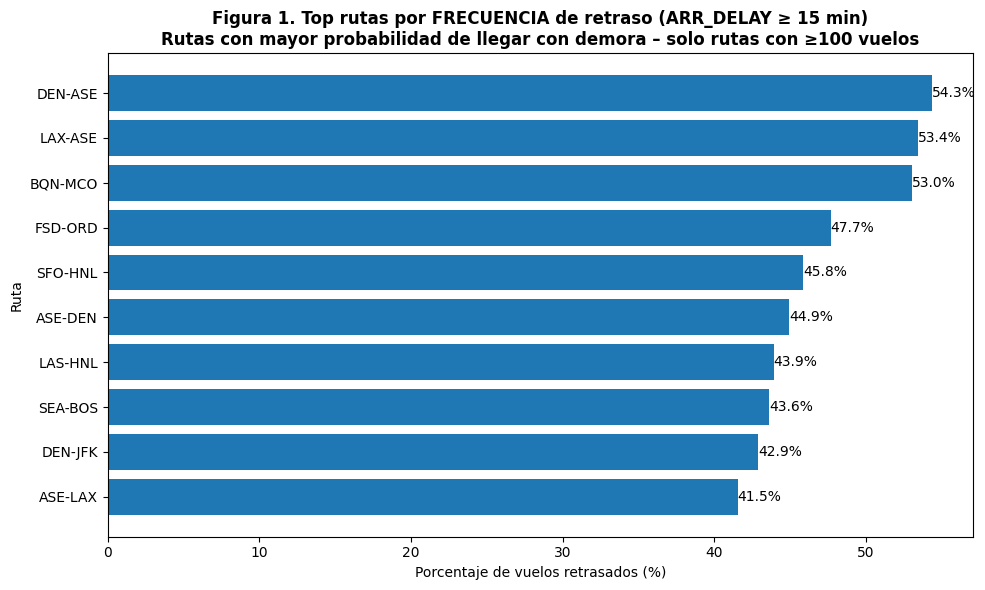

✅ Figura guardada como: figura1_top_frecuencia_retraso.png


In [ ]:
import matplotlib.pyplot as plt

TOP_N = 10  # ajusta si deseas otro número

df_freq = (routes_df_100
           .sort_values('arr_delay_rate_15', ascending=False)
           .head(TOP_N)
           .iloc[::-1])  # invertimos para que el mayor quede arriba

plt.figure(figsize=(10,6))
plt.barh(df_freq['ruta'], df_freq['arr_delay_rate_15'])

# etiquetas al final de cada barra
for i, v in enumerate(df_freq['arr_delay_rate_15'].values):
    plt.text(v, i, f"{v:.1f}%", va='center', ha='left')

plt.title(
    "Figura 1. Top rutas por FRECUENCIA de retraso (ARR_DELAY ≥ 15 min)\n"
    "Rutas con mayor probabilidad de llegar con demora – solo rutas con ≥100 vuelos",
    fontsize=12, weight="bold"
)
plt.xlabel("Porcentaje de vuelos retrasados (%)")
plt.ylabel("Ruta")
plt.tight_layout()
plt.savefig("figura1_top_frecuencia_retraso.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Figura guardada como: figura1_top_frecuencia_retraso.png")



In [ ]:
import pandas as pd
import numpy as np

# Umbrales (ajústalos según tu criterio)
freq_threshold = 40.0   # %  Frecuencia alta (ARR_DELAY ≥ 15)
sev_threshold  = 60.0   # min Severidad alta (avg_pos_arr_delay)

hot = (routes_df_100[
    (routes_df_100['arr_delay_rate_15'] >= freq_threshold) &
    (routes_df_100['avg_pos_arr_delay']  >= sev_threshold)
].copy())

# Métricas útiles para priorizar
hot['esperados_retrasados_15'] = (hot['flights_total'] * hot['arr_delay_rate_15'] / 100).round().astype('Int64')
hot['impacto'] = (hot['arr_delay_rate_15'] * hot['avg_pos_arr_delay'] * hot['flights_total'])

# Orden sugerido: por impacto (o por freq y sev si prefieres)
hot = hot.sort_values(['impacto', 'arr_delay_rate_15', 'avg_pos_arr_delay'], ascending=False)

tabla_rojas = hot[['ruta','flights_total','arr_delay_rate_15','avg_pos_arr_delay','esperados_retrasados_15','impacto']]

# Presentación en español
tabla_rojas = tabla_rojas.rename(columns={
    'ruta': 'Ruta',
    'flights_total': 'Vuelos',
    'arr_delay_rate_15': 'Frecuencia (%)',
    'avg_pos_arr_delay': 'Severidad (min)',
    'esperados_retrasados_15': 'Vuelos retrasados (≈)',
    'impacto': 'Impacto (freq×sev×vuelos)'
})

# Mostrar con formato
display(
    tabla_rojas.style
        .format({
            'Frecuencia (%)': '{:.1f}',
            'Severidad (min)': '{:.0f}',
            'Impacto (freq×sev×vuelos)': '{:,.0f}'
        })
        .set_caption("Tabla A.1. Rutas 'rojas' (alta frecuencia y alta severidad) — Rutas con ≥100 vuelos")
)


In [ ]:
# Zonas rojas: alta frecuencia y alta severidad
hot = routes_df_100[(routes_df_100['arr_delay_rate_15'] >= freq_threshold) &
                    (routes_df_100['avg_pos_arr_delay']  >= sev_threshold)] \
      [['ruta','flights_total','arr_delay_rate_15','avg_pos_arr_delay']] \
      .sort_values(['arr_delay_rate_15','avg_pos_arr_delay'], ascending=False) \
      .head(10)

display(hot.rename(columns={
    'flights_total':'vuelos',
    'arr_delay_rate_15':'freq_%',
    'avg_pos_arr_delay':'sev_min'
}).style.format({'freq_%':'{:.1f}','sev_min':'{:.0f}'}))

# “Impacto” simple = frecuencia * severidad * volumen (criterio práctico para priorizar)
impact = (routes_df_100
          .assign(impact = routes_df_100['arr_delay_rate_15'] *
                           routes_df_100['avg_pos_arr_delay'] *
                           routes_df_100['flights_total'])
          .sort_values('impact', ascending=False)
          [['ruta','flights_total','arr_delay_rate_15','avg_pos_arr_delay','impact']]
          .head(10))

display(impact.rename(columns={
    'flights_total':'vuelos',
    'arr_delay_rate_15':'freq_%',
    'avg_pos_arr_delay':'sev_min',
    'impact':'impacto'
}).style.format({'freq_%':'{:.1f}','sev_min':'{:.0f}','impacto':'{:.0f}'}))


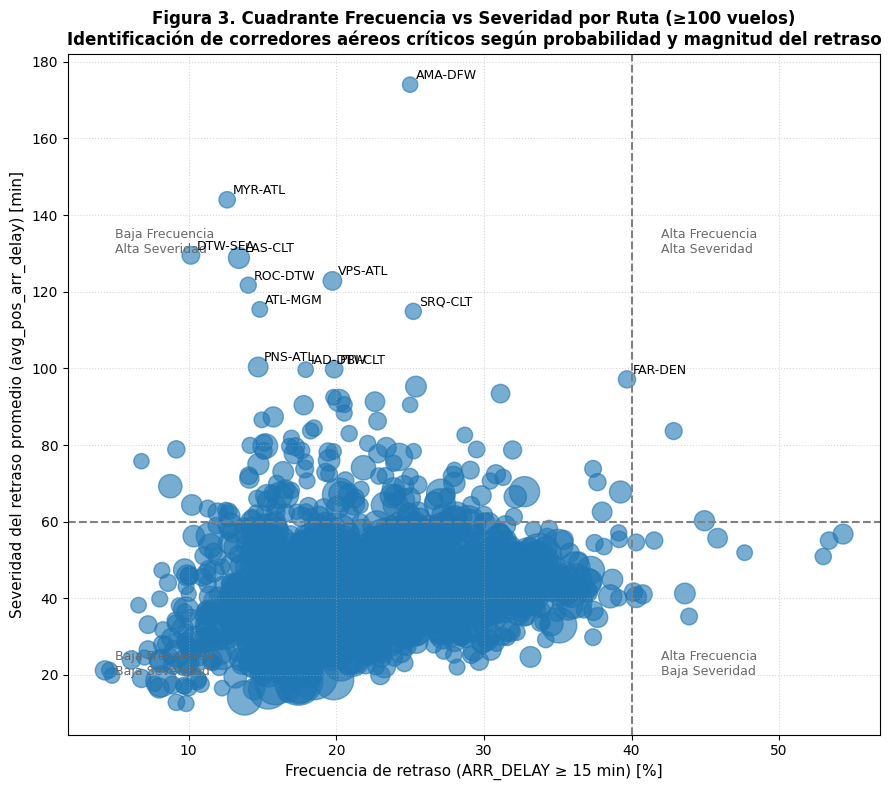

✅ Figura guardada como: figura3_cuadrante_frecuencia_severidad.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Parámetros (ajústalos si lo necesitas) ===
freq_threshold = 40.0   # %  umbral de FRECUENCIA alta (ARR_DELAY ≥ 15)
sev_threshold  = 60.0   # min umbral de SEVERIDAD alta (avg_pos_arr_delay)

# === Datos base (requiere routes_df_100 ya creado) ===
x   = routes_df_100['arr_delay_rate_15']
y   = routes_df_100['avg_pos_arr_delay']
vol = routes_df_100['flights_total']

# Tamaño del punto proporcional al volumen (limitado para legibilidad)
sizes = np.clip(vol / vol.max() * 1200, 40, 1200)

plt.figure(figsize=(9,8))

# --- Dispersión principal ---
plt.scatter(x, y, s=sizes, alpha=0.6)

# --- Líneas guía ---
plt.axvline(freq_threshold, linestyle="--", color="gray")
plt.axhline(sev_threshold,  linestyle="--", color="gray")

# --- Título y ejes ---
plt.title(
    "Figura 3. Cuadrante Frecuencia vs Severidad por Ruta (≥100 vuelos)\n"
    "Identificación de corredores aéreos críticos según probabilidad y magnitud del retraso",
    fontsize=12, weight="bold", loc="center"
)
plt.xlabel("Frecuencia de retraso (ARR_DELAY ≥ 15 min) [%]", fontsize=11)
plt.ylabel("Severidad del retraso promedio (avg_pos_arr_delay) [min]", fontsize=11)

# --- Etiquetas de los cuadrantes (ajusta coordenadas si cambian tus límites) ---
# Colocamos texto suave para no robar atención
plt.text(5,  sev_threshold+70, "Baja Frecuencia\nAlta Severidad",  fontsize=9, color='dimgray')
plt.text(freq_threshold+2, sev_threshold+70, "Alta Frecuencia\nAlta Severidad", fontsize=9, color='dimgray')
plt.text(5,  20, "Baja Frecuencia\nBaja Severidad",  fontsize=9, color='dimgray')
plt.text(freq_threshold+2, 20, "Alta Frecuencia\nBaja Severidad", fontsize=9, color='dimgray')

# --- Etiquetado de rutas más críticas (por encima de umbrales) ---
critical = routes_df_100[(x >= freq_threshold) | (y >= sev_threshold)].copy()
critical['score'] = np.maximum(0, x - freq_threshold) + np.maximum(0, y - sev_threshold)
critical = critical.sort_values('score', ascending=False).head(12)

for _, r in critical.iterrows():
    plt.annotate(r['ruta'],
                 (r['arr_delay_rate_15'], r['avg_pos_arr_delay']),
                 xytext=(4,4), textcoords="offset points", fontsize=9)

# --- Detalles visuales y guardado ---
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
plt.savefig("figura3_cuadrante_frecuencia_severidad.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Figura guardada como: figura3_cuadrante_frecuencia_severidad.png")



In [ ]:
# === Promedio de retraso por ruta (1 celda ejecutable) ===
import pandas as pd
import numpy as np

print(">> Promedio de retraso por ruta (ARR y DEP)\n")

# 0) Base: usa fl si ya existe; si no, créalo desde flights
if 'fl' not in locals():
    fl = flights.copy()

# Asegurar tipos
for col in ['DEP_DELAY','ARR_DELAY']:
    if col in fl.columns:
        fl[col] = pd.to_numeric(fl[col], errors='coerce')
    else:
        fl[col] = np.nan

# Contador de vuelos por ruta
if 'FL_DATE' in fl.columns:
    fl['FL_DATE'] = pd.to_datetime(fl['FL_DATE'], errors='coerce')
else:
    fl['FL_DATE'] = pd.Timestamp('2000-01-01')


# 1) Promedio de retraso por ruta (incluye tempranos con valores negativos)
avg_delay_route = (
    fl.groupby(['ORIGIN','DEST'], observed=True)
      .agg(
          flights_total=('FL_DATE','count'),
          avg_dep_delay=('DEP_DELAY','mean'),
          avg_arr_delay=('ARR_DELAY','mean')
      )
      .reset_index()
)

# 2) Promedio considerando SOLO vuelos retrasados (>0 min)
pos = fl.copy()
avg_delay_positive = (
    pos.groupby(['ORIGIN','DEST'], observed=True)
       .agg(
           avg_pos_dep_delay=('DEP_DELAY', lambda s: s[s>0].mean()),
           avg_pos_arr_delay=('ARR_DELAY', lambda s: s[s>0].mean())
       )
       .reset_index()
)

# 3) Unir y formatear
resumen = (avg_delay_route
           .merge(avg_delay_positive, on=['ORIGIN','DEST'], how='left'))

cols_round = ['avg_dep_delay','avg_arr_delay','avg_pos_dep_delay','avg_pos_arr_delay']
resumen[cols_round] = resumen[cols_round].round(2)

print(f"Rutas evaluadas: {len(resumen):,}\n")

print("Ejemplo (primeras 10 rutas):")
display(resumen.head(10))

# --- Mostrar el top de rutas con más de 100 vuelos con mayor promedio de retraso ---
MIN_VUELOS_PROMEDIO = 100 # Definir el umbral mínimo de vuelos para este ranking

print(f"\nTop 15 rutas con más de {MIN_VUELOS_PROMEDIO} vuelos por mayor promedio de retraso en llegada (min):")

# Filtrar rutas con al menos MIN_VUELOS_PROMEDIO vuelos
rutas_alto_volumen_promedio = resumen.query('flights_total >= @MIN_VUELOS_PROMEDIO').copy()

# Ordenar por el promedio de retraso en llegada descendente y tomar el top 15
top15_avg_arr_filtered = (rutas_alto_volumen_promedio
                          .sort_values('avg_arr_delay', ascending=False)
                          .head(15))

# Añadir columna de ruta para mejor visualización
top15_avg_arr_filtered['ruta'] = top15_avg_arr_filtered['ORIGIN'] + '-' + top15_avg_arr_filtered['DEST']

# Mostrar las columnas relevantes
display(top15_avg_arr_filtered[['ruta','flights_total','avg_arr_delay','avg_pos_arr_delay',
                       'avg_dep_delay','avg_pos_dep_delay']])


print("\n>> Listo. Usa 'avg_arr_delay' para el promedio global y 'avg_pos_arr_delay' si quieres solo entre vuelos que sí llegaron tarde.")

>> Promedio de retraso por ruta (ARR y DEP)

Rutas evaluadas: 5,581

Ejemplo (primeras 10 rutas):


ORIGIN DEST  flights_total  avg_dep_delay  avg_arr_delay  avg_pos_dep_delay  \
0    ABE  ATL             81          14.15           6.98              65.77   
1    ABE  BNA             17          -6.88         -17.82              13.33   
2    ABE  CLT             86           7.76         -10.30              73.12   
3    ABE  FLL             10          30.90          11.50              91.25   
4    ABE  MYR              9         -11.44          -6.56               3.00   
5    ABE  ORD             10          -8.40         -12.50                NaN   
6    ABE  PGD             15          15.20          10.93              78.00   
7    ABE  PIE             15           5.07           2.27              68.33   
8    ABE  SFB             49          -2.12          -7.22              25.45   
9    ABE  SRQ              8           4.75         -14.38              59.50   

   avg_pos_arr_delay  
0              54.45  
1              19.00  
2              89.83  
3              80.50  
4               7.67  
5               3.50  
6              49.14  
7              45.00  
8              22.17  
9              27.50


Top 15 rutas con más de 100 vuelos por mayor promedio de retraso en llegada (min):


ruta  flights_total  avg_arr_delay  avg_pos_arr_delay  avg_dep_delay  \
74    AMA-DFW            109          51.88             174.03          54.61   
1935  FAR-DEN            136          48.82              97.14          51.06   
1384  DEN-JFK            130          41.80              83.64          39.83   
5247  SRQ-CLT            121          40.01             114.88          44.03   
3153  MCO-LAS            132          38.17              70.32          43.28   
2824  LAX-ASE            158          37.78              55.07          33.24   
3543  MSP-JFK            126          36.80              73.80          26.66   
1316  DEN-ASE            219          36.46              56.76          35.51   
103   ASE-DEN            219          35.66              60.24          33.61   
3960  PBI-CLT            139          35.36              99.80          34.53   
219   ATL-PNS            170          34.75              91.32          42.34   
2032  FLL-SFO            102          33.75              80.94          39.63   
426   BDL-MCO            152          33.34              93.42          43.98   
1417  DEN-OKC            219          33.11              67.75          33.72   
671   BQN-MCO            120          32.44              50.92          34.63   

      avg_pos_dep_delay  
74               199.65  
1935             115.87  
1384              78.22  
5247             120.22  
3153              64.77  
2824              75.63  
3543              92.80  
1316              55.84  
103               70.16  
3960             144.61  
219              115.80  
2032              87.69  
426               88.34  
1417              55.42  
671               51.15


>> Listo. Usa 'avg_arr_delay' para el promedio global y 'avg_pos_arr_delay' si quieres solo entre vuelos que sí llegaron tarde.


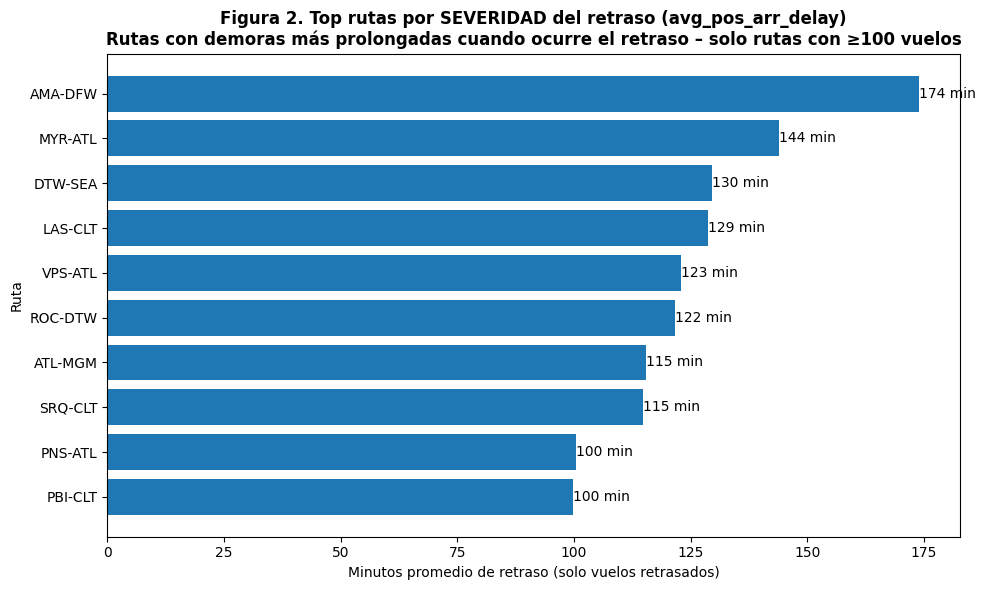

✅ Figura guardada como: figura2_top_severidad_retraso.png


In [ ]:
TOP_N = 10  # ajusta si deseas otro número

df_sev = (routes_df_100
          .sort_values('avg_pos_arr_delay', ascending=False)
          .head(TOP_N)
          .iloc[::-1])

plt.figure(figsize=(10,6))
plt.barh(df_sev['ruta'], df_sev['avg_pos_arr_delay'])

# etiquetas al final de cada barra
for i, v in enumerate(df_sev['avg_pos_arr_delay'].values):
    plt.text(v, i, f"{v:.0f} min", va='center', ha='left')

plt.title(
    "Figura 2. Top rutas por SEVERIDAD del retraso (avg_pos_arr_delay)\n"
    "Rutas con demoras más prolongadas cuando ocurre el retraso – solo rutas con ≥100 vuelos",
    fontsize=12, weight="bold"
)
plt.xlabel("Minutos promedio de retraso (solo vuelos retrasados)")
plt.ylabel("Ruta")
plt.tight_layout()
plt.savefig("figura2_top_severidad_retraso.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Figura guardada como: figura2_top_severidad_retraso.png")



# Informe Detallado del Análisis de Retrasos y Cancelaciones de Vuelos

## Resumen Ejecutivo

Este informe presenta un análisis exploratorio y segmentado de los datos de vuelos de 2023 con el objetivo de identificar patrones, causas y rutas con mayor impacto en los retrasos y cancelaciones. Los hallazgos clave incluyen:

*   Una baja tasa general de cancelaciones y desvíos, con el clima como la causa principal de las cancelaciones.
*   Los retrasos en la llegada son más frecuentes que las cancelaciones, siendo la "Aeronave Tarde" y las causas atribuidas a la "Aerolínea" las que acumulan la mayor cantidad de minutos de retraso.
*   Se identifican aerolíneas y aeropuertos con mayores tasas de retraso y volumen de vuelos, lo que permite enfocar los esfuerzos de mejora.
*   El análisis por ruta revela corredores aéreos específicos que experimentan una alta frecuencia y severidad de retrasos.

Estos resultados proporcionan una base sólida para comprender los factores que contribuyen a la puntualidad de los vuelos y pueden guiar la toma de decisiones operativas y estratégicas para mitigar los retrasos y mejorar la experiencia del pasajero.

Resumen del estado general de los vuelos:
------------------------------
Total de vuelos: 538,837

Conteo por categoría:

*   Operados y No Desviados (A tiempo o antes): 324,622 (60.24%)
*   Operados y No Desviados (Retrasados a la llegada): 202,575 (37.59%)
*    Cancelados: 10,295 (1.91%)
*   Desviados: 1,345 (0.25%)




Nota: Los porcentajes se basan en el total de vuelos.


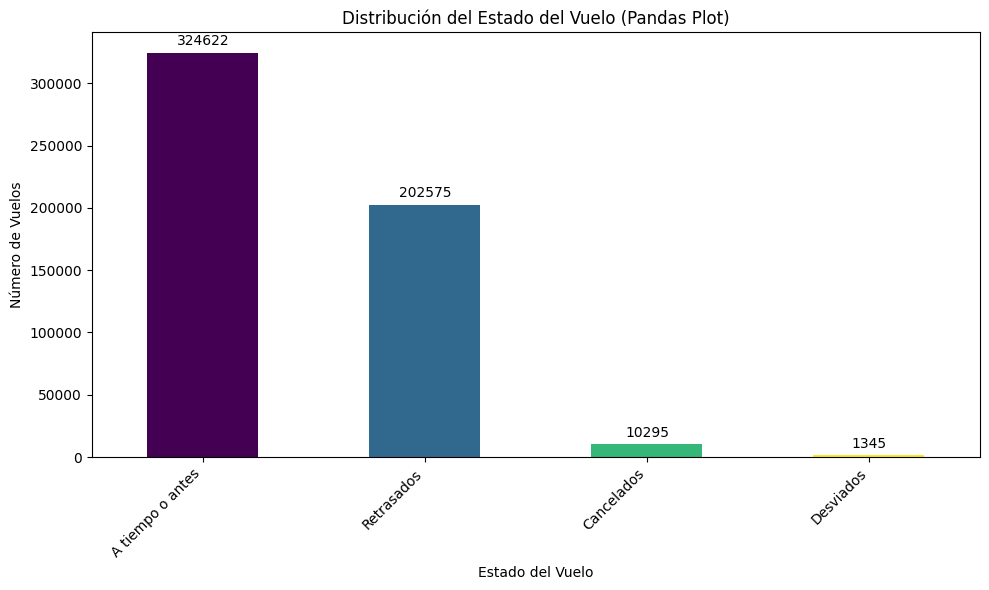

## Análisis de Retrasos en Vuelos Operados

Esta sección se centra en los vuelos que no fueron cancelados ni desviados, pero que experimentaron retrasos a la llegada (`ARR_DELAY > 0`). Analizamos las contribuciones de las diferentes causas de retraso (`DELAY_DUE_...`) a los minutos totales de retraso y al número de vuelos afectados.

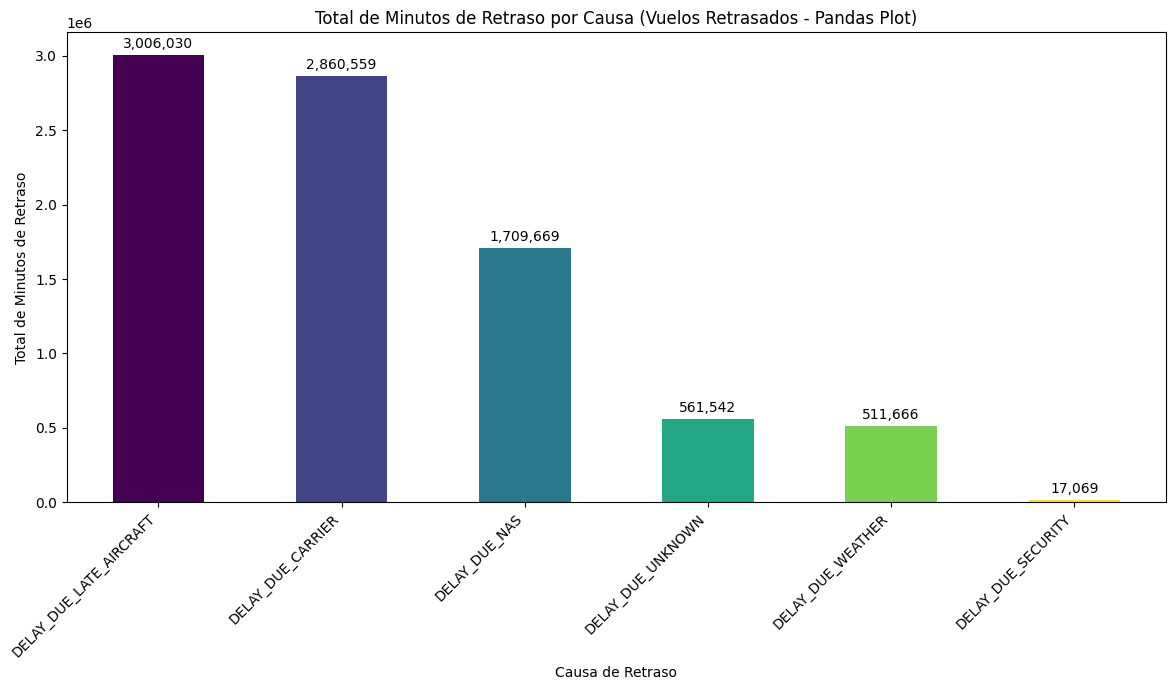

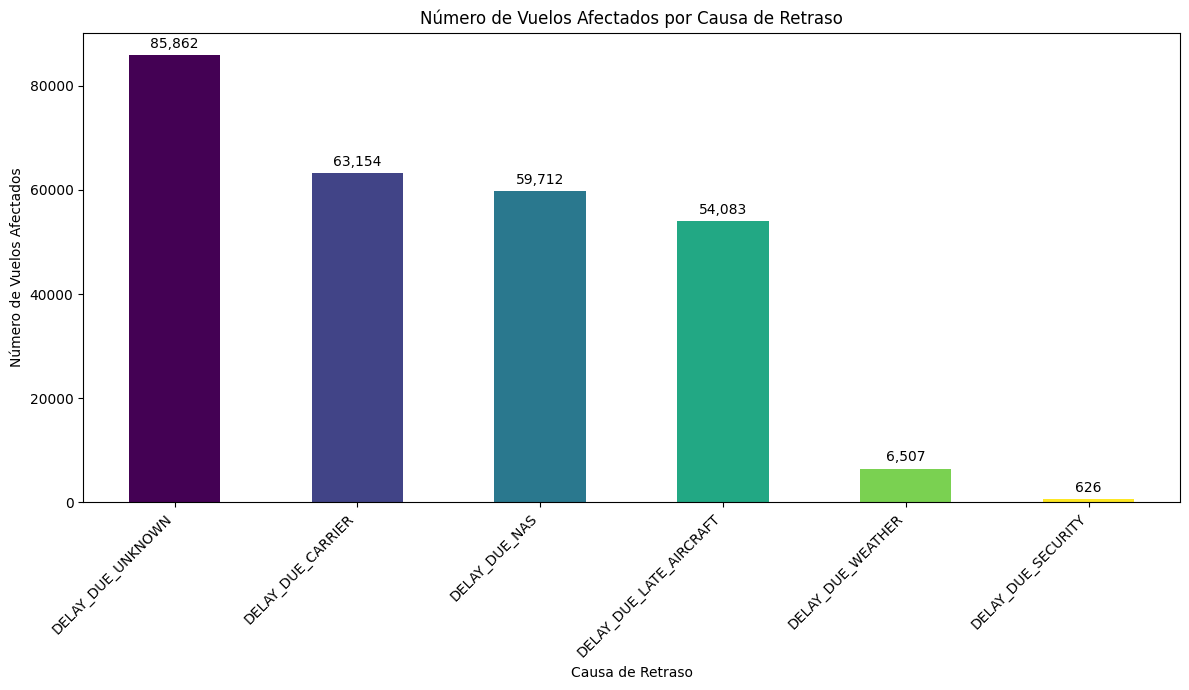


Recordatorio de la interpretación de las causas de retraso:
- DELAY_DUE_CARRIER: Aerolínea
- DELAY_DUE_WEATHER: Clima
- DELAY_DUE_NAS: Sistema Nacional del Espacio Aéreo
- DELAY_DUE_SECURITY: Seguridad
- DELAY_DUE_LATE_AIRCRAFT: Aeronave Tarde
- DELAY_DUE_UNKNOWN: Desconocido


## Análisis por Aerolínea

Esta sección examina el rendimiento de cada aerolínea en términos de volumen de vuelos, tasas de cancelación, desvío y, principalmente, retrasos. Identificamos las aerolíneas con el mayor y menor porcentaje de vuelos retrasados para comprender mejor su puntualidad operativa.

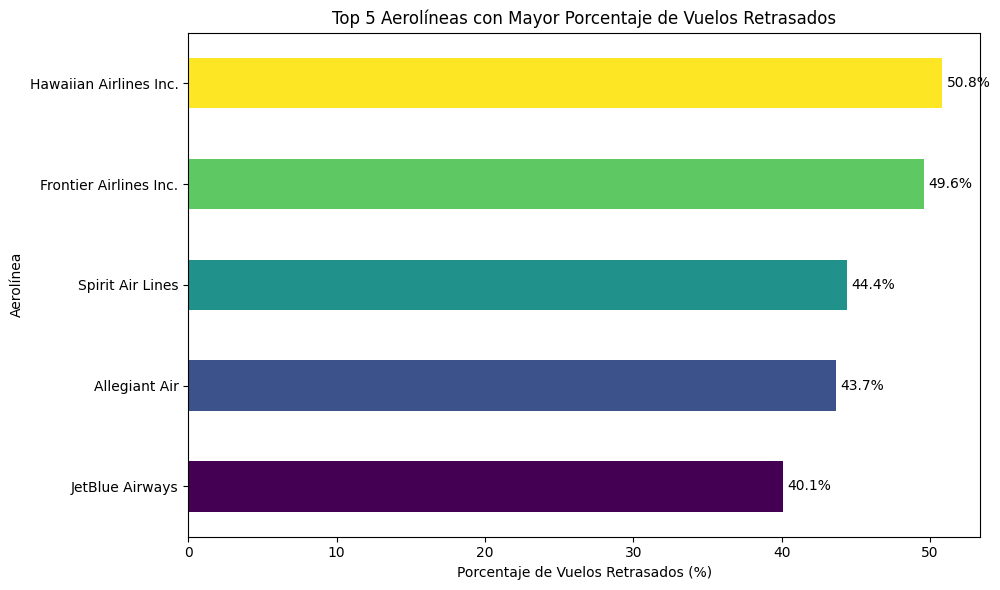

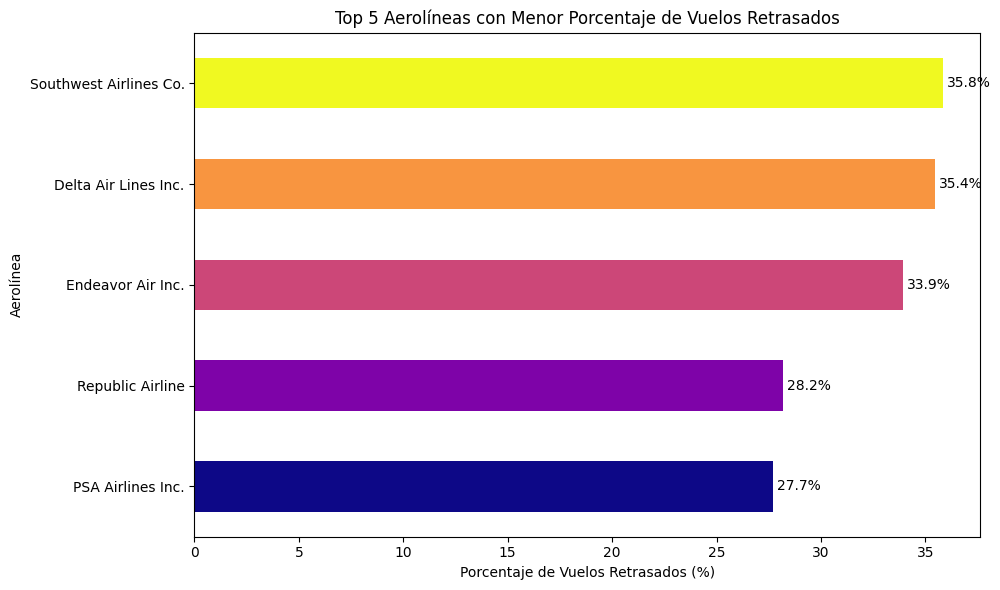



## Análisis por Aeropuerto

Esta sección agrupa los datos por aeropuerto de origen (`ORIGIN`) y destino (`DEST`) para identificar aquellos con mayor volumen de vuelos, mayores tiempos de rodaje (TAXI_OUT y TAXI_IN) y, especialmente, los que presentan mayores porcentajes de retraso en salidas y llegadas.

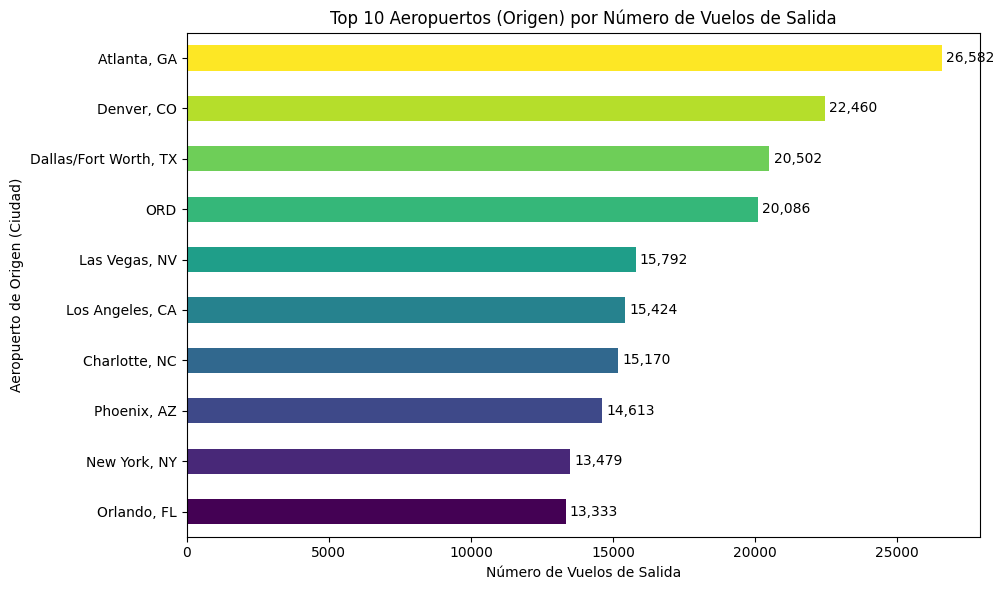

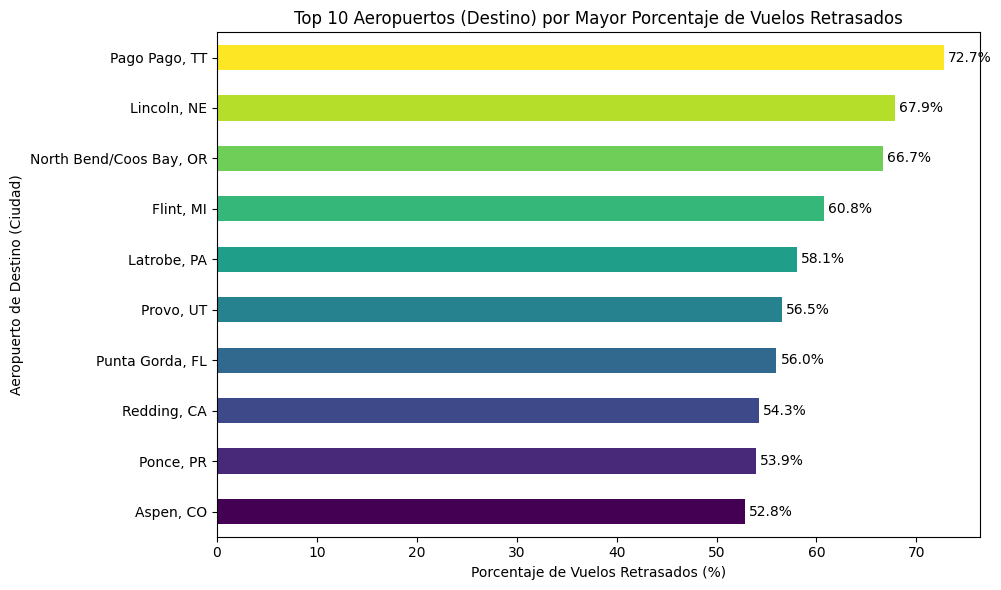

## Análisis por Ruta

Esta sección profundiza en el rendimiento de rutas aéreas específicas, identificando aquellas que presentan una mayor frecuencia y severidad de retrasos. Analizamos métricas clave a nivel de par origen-destino para resaltar los corredores aéreos que podrían requerir una atención especial.

**Criterios de análisis por ruta.**  
- Solo se consideran rutas con **≥100 vuelos** (robustece los promedios).  
- **Frecuencia**: % de vuelos con `ARR_DELAY ≥ 15 min`.  
- **Severidad**: `avg_pos_arr_delay` (minutos **solo** en vuelos retrasados).  
- Umbrales del cuadrante: **40%** (frecuencia) y **60 min** (severidad).


### Rutas con Mayor Frecuencia de Retrasos

 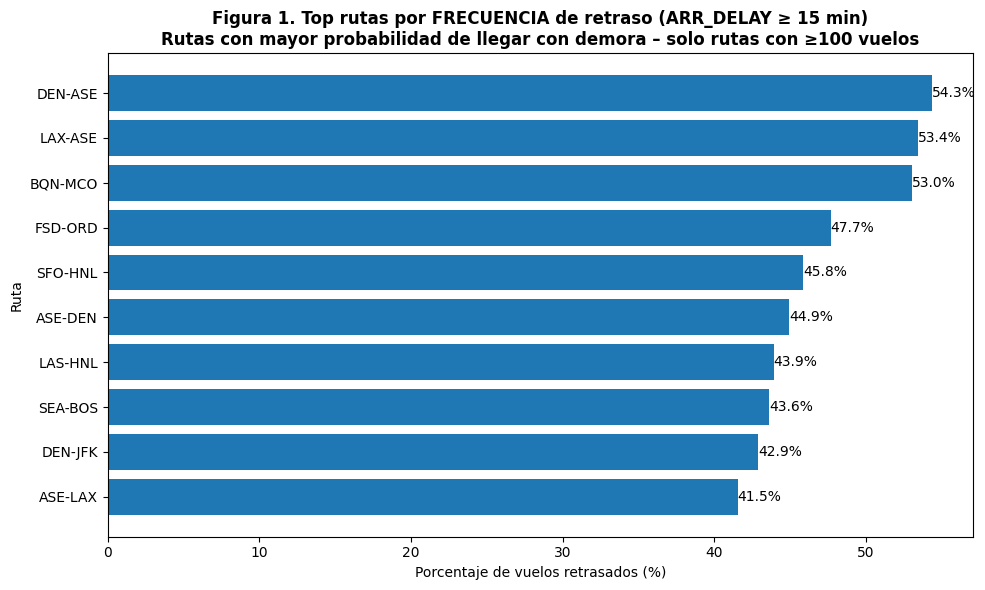


**Figura 1. Top rutas por FRECUENCIA de retraso (ARR_DELAY ≥ 15 min).**  
Muestra las rutas donde es **más probable** que un vuelo llegue con demora. Estas rutas representan corredores con **problemas recurrentes de puntualidad**, por lo que son candidatas a acciones de mejora operativa.


### Rutas con Mayor Severidad de Retrasos

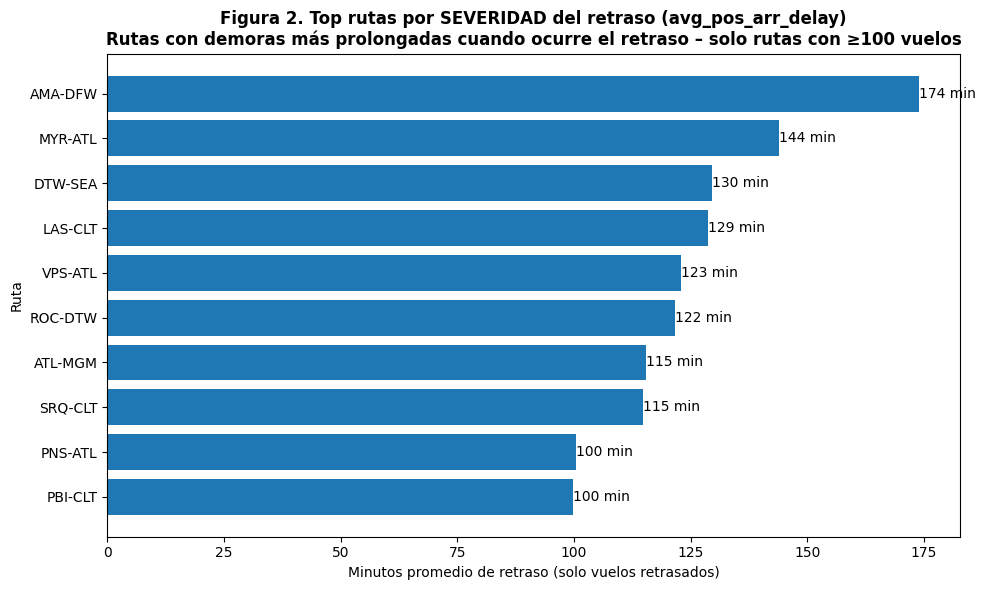

**Figura 2. Top rutas por SEVERIDAD del retraso (avg_pos_arr_delay).**  
Indica dónde, **cuando ocurre el retraso**, la demora es **más prolongada**. Señala posibles **cuellos de botella** (rotaciones, puertas, congestión) que amplifican el tiempo de recuperación.


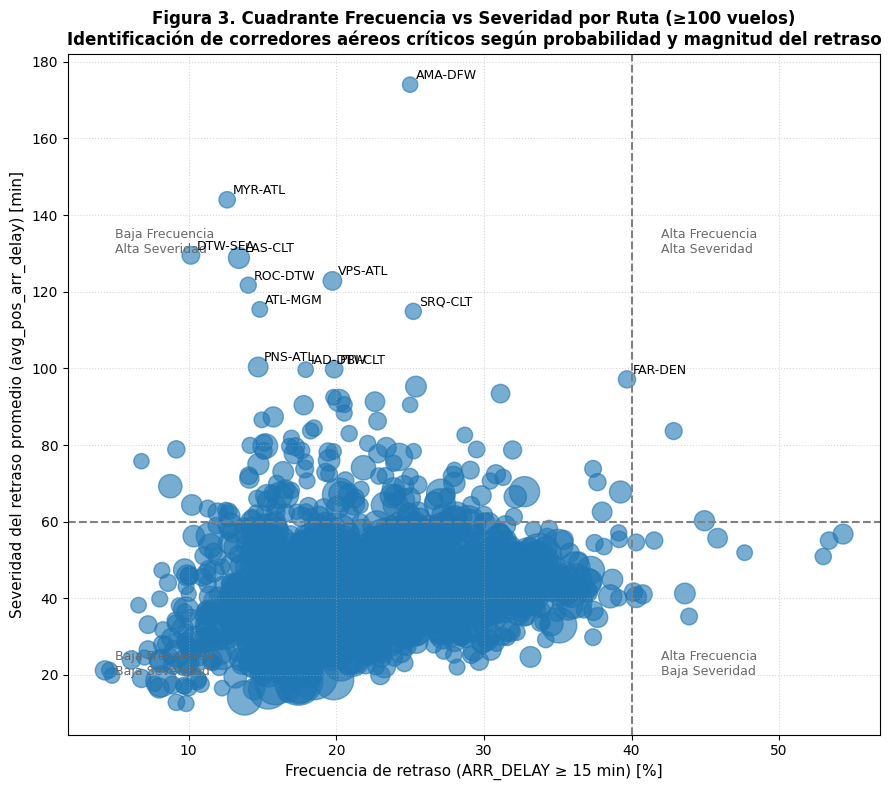

### Interpretación de la Figura 3

La Figura 3 se construye con rutas de **≥100 vuelos** y define los cuadrantes con cortes en **40%** de frecuencia y **60 min** de severidad.
El **cuadrante de Frecuencia vs Severidad por Ruta (≥100 vuelos)**, que permite visualizar la relación entre la **probabilidad de retraso** y la **duración promedio de dichos retrasos**.

Cada punto representa una ruta aérea (ORIGIN–DEST), y el tamaño del punto indica el **volumen total de vuelos**.  
Las líneas punteadas dividen el gráfico en cuatro cuadrantes según los umbrales definidos:

- **Eje X (frecuencia)**: porcentaje de vuelos con retraso (ARR_DELAY ≥ 15 min).  
- **Eje Y (severidad)**: minutos promedio de retraso en vuelos retrasados (avg_pos_arr_delay).  

Se destacan las rutas **AMA–DFW**, **FAR–DEN** y **SRQ–CLT**, ubicadas en el **cuadrante superior derecho**, que combina **alta frecuencia y alta severidad de retrasos**, lo que las posiciona como **corredores aéreos críticos** dentro del sistema.  
Estas rutas deben considerarse prioritarias para la implementación de acciones correctivas, ya que impactan tanto en el número de vuelos afectados como en la magnitud de los retrasos.

La mayoría de las rutas se agrupan en el **cuadrante inferior izquierdo**, con retrasos menos frecuentes y de menor duración, reflejando un **comportamiento operativo estable** en la mayor parte de la red.  
El cuadrante superior izquierdo, por su parte, muestra rutas donde los retrasos son poco frecuentes, pero **muy prolongados cuando ocurren**, mientras que el inferior derecho representa rutas con **retrasos frecuentes pero leves**.

En conjunto, esta visualización permite **priorizar rutas según su impacto** combinando tres dimensiones: frecuencia, severidad y volumen de vuelos.


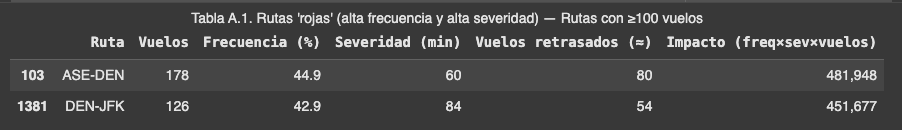

**Tabla A.1. Rutas “rojas” (alta frecuencia y alta severidad).**  
Listado de rutas con **probabilidad alta de retraso (ARR_DELAY ≥ 15 min)** y **demora prolongada cuando ocurre**.  
Incluye una estimación de **vuelos retrasados** y una métrica de **impacto** (frecuencia × severidad × volumen) para priorización operativa.


## 🧩 Conclusiones y Recomendaciones

Basado en el análisis exploratorio y segmentado de los datos de vuelos de 2023, se pueden extraer las siguientes conclusiones y considerar las siguientes recomendaciones:

---

### ✈️ Conclusiones Clave

**Panorama general.**  
En 2023 predominaron los vuelos operados sin desvío; sin embargo, **~38% de los vuelos llegaron con retraso**, lo que refleja un área de oportunidad relevante en la puntualidad del sistema aéreo.

**Causas de retraso.**  
En minutos totales,las mayores contribuciones provienen de **Aeronave Tarde** (`DELAY_DUE_LATE_AIRCRAFT`) y **Aerolínea** (`DELAY_DUE_CARRIER`) …
, lo que apunta a factores operativos internos como principal origen de las demoras. El **Clima**, aunque menos frecuente, genera los retrasos más severos cuando ocurre.

**Aerolíneas.**  
Se observan **brechas claras de desempeño en puntualidad**: aerolíneas como **Hawaiian** y **Frontier** concentran los mayores porcentajes de vuelos retrasados, mientras que **Southwest** y **Delta** se posicionan entre las más consistentes.

**Aeropuertos.**  
Como origen, los grandes hubs (ATL, DEN, DFW, ORD…) concentran la mayor cantidad de operaciones, mientras que algunos destinos como **Pago Pago (TT)**, **Lincoln (NE)** y **North Bend (OR)** presentan **tasas de retraso excepcionalmente altas**, probablemente relacionadas con condiciones meteorológicas, limitaciones de infraestructura o restricciones operativas locales.

**Rutas con mayor frecuencia de retraso (ARR_DELAY ≥ 15 min).**  
Destacan varios pares origen–destino con **más de 100 vuelos** y tasas de retraso cercanas o superiores a **45%**, como **BQN–MCO**, **SFO–HNL**, **LAX–ASE**, **DEN–ASE** y **SLC–JFK**. Estos corredores representan **zonas críticas de alta probabilidad de retraso**, donde la puntualidad es un desafío recurrente.

**Rutas con mayor severidad del retraso (flights_total > 100).**  
El nuevo filtrado permite identificar rutas con un número suficiente de vuelos para un análisis robusto. En este grupo, destacan **AMA–DFW**, **FAR–DEN**, **DEN–JFK** y **SRQ–CLT**, con **promedios de demora superiores a 40 minutos** y, en algunos casos, **retrasos medios por vuelo retrasado (avg_pos_arr_delay)** que superan los **90 minutos**.  
Estos resultados evidencian **cuellos de botella operativos y de coordinación**, probablemente vinculados con congestión en aeropuertos hub, rotación de aeronaves y tiempos de conexión ajustados.

**Relación frecuencia–severidad.**  
El contraste entre ambas métricas muestra que **no todas las rutas con alta frecuencia presentan alta severidad**, y viceversa. Sin embargo, los corredores donde **ambos factores coinciden** representan los puntos de mayor impacto operativo y deben ser priorizados para acciones correctivas.

---

### 💡 Recomendaciones

**1. Focalizar esfuerzos en rutas críticas.**  
- Priorizar la atención en rutas con alta severidad y volumen significativo, como **AMA–DFW**, **FAR–DEN**, **SRQ–CLT** y **ATL–PNS**.  
- Evaluar la **asignación de flota, buffers de programación y coordinación de turnos** en estos corredores para reducir los retrasos acumulados.

**2. Optimización de operaciones y rotación de aeronaves.**  
- Implementar monitoreo de **“Aeronave Tarde”** para identificar tramos que propagan demoras en cadena.  
- Reajustar **tiempos de rotación** y revisar las políticas de despacho en aeropuertos con alta densidad de tráfico.

**3. Análisis complementarios y monitoreo continuo.**  
- Crear un **cuadrante Frecuencia–Severidad** para priorizar rutas según su impacto.  
- Incorporar variables **temporales (mes, día, franja horaria)** para identificar patrones estacionales y congestión en horas pico.  
- Medir la **dispersión de retrasos (percentiles P90 y P95)** para detectar rutas con alta variabilidad operativa.

**4. Coordinación interinstitucional.**  
- Establecer **mesas de trabajo con aerolíneas y aeropuertos** de mayor incidencia para diseñar planes de mejora de puntualidad.  
- Compartir indicadores clave (minutos promedio, causas por categoría, porcentaje de vuelos a tiempo) y monitorear resultados de forma trimestral.

**5. Enriquecer la base analítica.**  
- Integrar datos de **meteorología, tráfico aéreo y capacidad de pista** para modelar las causas de retraso con mayor precisión.  
- Desarrollar dashboards interactivos que faciliten el **seguimiento en tiempo real** de los indicadores de puntualidad.

---

> **En síntesis**, el análisis confirma que los retrasos en 2023 se deben principalmente a **factores operativos internos**, especialmente la **Aeronave Tarde** y la **gestión de las aerolíneas**, con rutas específicas donde la frecuencia y la severidad convergen.  
> Concentrar esfuerzos en estos corredores prioritarios, mejorar la coordinación de flotas y ajustar la programación de operaciones son pasos clave para **reducir los minutos promedio de demora y mejorar la experiencia del pasajero**.


# Links de interes
Presentación
https://docs.google.com/presentation/d/1yEfJ--k30hbx9kNJ_JyDdGUICSFpCpVoMSXVRQKFTYU/edit?usp=sharing